# Introduction



Olist, a leading Brazilian e-commerce marketplace, has provided a comprehensive dataset containing approximately 100,000 customer transactions recorded between 2016 and 2018. A key challenge identified within this dataset is the platform’s low average repurchase rate of around 5%, highlighting a significant issue with customer retention and churn.

To address this concern, the primary objective of this project is to develop a predictive machine learning model that can identify customers at risk of churning. For the purpose of this analysis, churn is defined as customers who do not make a repeat purchase within 180 days of their last transaction, up to the end of the observation period.

This task is formulated as a binary classification problem, where the target variable indicates whether a customer has churned (1) or remained active (0). By accurately predicting churn, Olist can proactively engage at-risk customers through strategies such as personalized discounts, targeted email and SMS campaigns, loyalty programs, and improved customer support.

Implementing such strategies based on predictive insights will enable Olist to:

- Increase customer lifetime value (CLV)

- Reduce customer acquisition costs (CAC)

- Improve long-term profitability and platform growth




# 1. Set up

In [ ]:

import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')

# Plot settings
sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
colours = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F',
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) # set custom color scheme

%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['figure.dpi'] = 80
%config InlineBackend.figure_format = 'retina'


In [ ]:
order_df=pd.read_csv('olist_orders_dataset.csv')
customer_df=pd.read_csv('olist_customers_dataset.csv')
review_df=pd.read_csv('olist_order_reviews_dataset.csv')
payment_df=pd.read_csv('olist_order_payments_dataset.csv')
geo_df=pd.read_csv('olist_geolocation_dataset.csv')
item_df=pd.read_csv('olist_order_items_dataset.csv')
product_df=pd.read_csv('olist_products_dataset.csv')

# 2. Data preprocessing & EDA

## 2.1 Order Data

In [ ]:
order_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [ ]:
order_df.shape

(99441, 8)

In [ ]:
order_df.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [ ]:
cols_date = [
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in cols_date:
    order_df[col] = pd.to_datetime(order_df[col], errors='coerce')
    order_df[col] = order_df[col].dt.date

cols_ts = [
    'order_purchase_timestamp',
    'order_approved_at'
]

for col in cols_ts:
    order_df[col] = pd.to_datetime(order_df[col], errors='coerce')


order_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0                   2017-10-04                    2017-10-10   
1                   2018-07-26                    2018-08-07   
2                   2018-08-08                    2018-08-17   
3                   2017-11-22                    2017-12-02   
4                   2018-02-14                    2018-02-16   

  order_estimated_delivery_date  
0                    2017-10-18  
1                    2018-08-13  
2                    2018-09-04  
3                    2017-12-15  
4                    2018-02-26

In [ ]:

invalid_rows = order_df[
    (order_df['order_purchase_timestamp'] > order_df['order_approved_at']) |
    (order_df['order_approved_at'] > order_df['order_delivered_carrier_date']) |
    (order_df['order_delivered_carrier_date'] > order_df['order_delivered_customer_date'])
]

invalid_rows


order_id                       customer_id  \
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
15     dcb36b511fcac050b97cd5c05de84dc3  3b6828a50ffe546942b7a473d70ac0fc   
19     83018ec114eee8641c97e08f7b4e926f  7f8c8b9c2ae27bf3300f670c3d478be8   
21     f848643eec1d69395095eb3840d2051e  4fa1cd166fa598be6de80fa84eaade43   
...                                 ...                               ...   
99411  4a69678ecf74bfd34260031c04329b68  eb19f77ffd29917f353d12152b0c0de1   
99420  f9e3402be5a5ea63344347582ca9f45f  6f2cf56878f7f82151b0ad02590192c0   
99426  7cc85185736ea7f2d8bc09af7a47cab7  9e870ea67399650e8c3545a25d13e4d0   
99432  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
1        delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
15       delivered      2018-06-07 19:03:12 2018-06-12 23:31:02   
19       delivered      2017-10-26 15:54:26 2017-10-26 16:08:14   
21       delivered      2018-03-15 08:52:40 2018-03-15 09:09:31   
...            ...                      ...                 ...   
99411    delivered      2018-07-22 16:58:38 2018-07-23 12:32:05   
99420    delivered      2017-06-07 11:02:37 2017-06-08 02:45:24   
99426    delivered      2017-05-15 09:46:26 2017-05-15 10:02:45   
99432    delivered      2017-12-20 09:52:41 2017-12-20 10:09:52   
99440    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
1                       2018-07-26                    2018-08-07   
2                       2018-08-08                    2018-08-17   
15                      2018-06-11                    2018-06-21   
19                      2017-10-26                    2017-11-08   
21                      2018-03-15                    2018-03-19   
...                            ...                           ...   
99411                   2018-07-23                    2018-07-24   
99420                   2017-06-08                    2017-06-19   
99426                   2017-05-15                    2017-05-22   
99432                   2017-12-20                    2018-01-26   
99440                   2018-03-09                    2018-03-16   

      order_estimated_delivery_date  
1                        2018-08-13  
2                        2018-09-04  
15                       2018-07-04  
19                       2017-11-23  
21                       2018-03-29  
...                             ...  
99411                    2018-07-31  
99420                    2017-07-05  
99426                    2017-06-07  
99432                    2018-01-18  
99440                    2018-04-03  

[15887 rows x 8 columns]

In [ ]:

order_df = order_df.drop(invalid_rows.index)
order_df.shape


(83554, 8)

- order_purchase_timestamp represents the time the order was placed by the customer.

- order_approved_at represents the time the payment was confirmed and the order was approved.

- order_delivered_carrier_date represents the date the seller handed the package over to the carrier (shipping started).

- order_delivered_customer_date represents the date the customer actually received the package.

These events must happen in the correct chronological order:
purchase → approval → carrier pickup → customer delivery.

If the dates are not in this logical sequence, the record does not make sense (e.g., an order cannot be approved before it was purchased, or delivered before being handed to the carrier).

Therefore, to ensure the quality and consistency of the dataset, we drop all rows where the timestamps are not in the correct order.

In [ ]:
order_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2815
order_estimated_delivery_date       0
dtype: int64

In [ ]:
order_df[order_df['order_approved_at'].isna()].head()

order_id                       customer_id  \
1130  00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
1801  ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
1868  df8282afe61008dc26c6c31011474d02  aa797b187b5466bc6925aaaa4bb3bed1   
2029  8d4c637f1accf7a88a4555f02741e606  b1dd715db389a2077f43174e7a675d07   
2161  7a9d4c7f9b068337875b95465330f2fc  7f71ae48074c0cfec9195f88fcbfac55   

     order_status order_purchase_timestamp order_approved_at  \
1130     canceled      2018-08-28 15:26:39               NaT   
1801     canceled      2018-09-20 13:54:16               NaT   
1868     canceled      2017-03-04 12:14:30               NaT   
2029     canceled      2018-08-29 16:27:49               NaT   
2161     canceled      2017-05-01 16:12:39               NaT   

     order_delivered_carrier_date order_delivered_customer_date  \
1130                          NaT                           NaT   
1801                          NaT                           NaT   
1868                          NaT                           NaT   
2029                          NaT                           NaT   
2161                          NaT                           NaT   

     order_estimated_delivery_date  
1130                    2018-09-12  
1801                    2018-10-17  
1868                    2017-04-10  
2029                    2018-09-13  
2161                    2017-05-30

In [ ]:
order_df[order_df['order_delivered_carrier_date'].isna()].head()

order_id                       customer_id  \
6    136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
103  0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128  15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
266  8e24261a7e58791d10cb1bf9da94df5c  64a254d30eed42cd0e6c36dddb88adf0   
324  d3c8851a6651eeff2f73b0e011ac45d0  957f8e082185574de25992dc659ebbc0   

    order_status order_purchase_timestamp   order_approved_at  \
6       invoiced      2017-04-11 12:22:08 2017-04-13 13:25:17   
103     invoiced      2018-08-03 17:44:42 2018-08-07 06:15:14   
128   processing      2017-09-03 14:22:03 2017-09-03 14:30:09   
266  unavailable      2017-11-16 15:09:28 2017-11-16 15:26:57   
324   processing      2016-10-05 22:44:13 2016-10-06 15:51:05   

    order_delivered_carrier_date order_delivered_customer_date  \
6                            NaT                           NaT   
103                          NaT                           NaT   
128                          NaT                           NaT   
266                          NaT                           NaT   
324                          NaT                           NaT   

    order_estimated_delivery_date  
6                      2017-05-09  
103                    2018-08-21  
128                    2017-10-03  
266                    2017-12-05  
324                    2016-12-09

In [ ]:
order_df[order_df['order_delivered_customer_date'].isna()].head()

order_id                       customer_id  \
6    136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
103  0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128  15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
231  4d630f57194f5aba1a3d12ce23e71cd9  6d491c9fe2f04f6e2af6ec033cd8907c   
266  8e24261a7e58791d10cb1bf9da94df5c  64a254d30eed42cd0e6c36dddb88adf0   

    order_status order_purchase_timestamp   order_approved_at  \
6       invoiced      2017-04-11 12:22:08 2017-04-13 13:25:17   
103     invoiced      2018-08-03 17:44:42 2018-08-07 06:15:14   
128   processing      2017-09-03 14:22:03 2017-09-03 14:30:09   
231      shipped      2017-11-17 19:53:21 2017-11-18 19:50:31   
266  unavailable      2017-11-16 15:09:28 2017-11-16 15:26:57   

    order_delivered_carrier_date order_delivered_customer_date  \
6                            NaT                           NaT   
103                          NaT                           NaT   
128                          NaT                           NaT   
231                   2017-11-22                           NaT   
266                          NaT                           NaT   

    order_estimated_delivery_date  
6                      2017-05-09  
103                    2018-08-21  
128                    2017-10-03  
231                    2017-12-13  
266                    2017-12-05

In [ ]:
order_df.groupby('order_status').apply(
    lambda df: df.isna().any(axis=1).sum()
).sort_values(ascending=False)

order_status
shipped        960
canceled       616
unavailable    609
invoiced       314
processing     301
delivered       23
created          5
approved         2
dtype: int64

If an order has a status such as "canceled", "unavailable", "processing", or similar, it is expected that fields like the approval timestamp, carrier delivery date, and customer delivery date may be missing since the order was never fully completed.

As our analysis focuses on completed orders, we will filter the dataset to include only orders with an order_status of "delivered".

In [ ]:
order_df=order_df[order_df['order_status']=='delivered']
order_df[order_df.isna().any(axis=1)].head()

order_id                       customer_id  \
3002   2d1e2d5bf4dc7227b3bfebb81328c15f  ec05a6d8558c6455f0cbbd8a420ad34f   
5323   e04abd8149ef81b95221e88f6ed9ab6a  2127dc6603ac33544953ef05ec155771   
16567  8a9adc69528e1001fc68dd0aaebbb54a  4c1ccc74e00993733742a3c786dc3c1f   
19031  7013bcfc1c97fe719a7b5e05e61c12db  2941af76d38100e0f8740a374f1a5dc3   
20618  f5dd62b788049ad9fc0526e3ad11a097  5e89028e024b381dc84a13a3570decb4   

      order_status order_purchase_timestamp   order_approved_at  \
3002     delivered      2017-11-28 17:44:07 2017-11-28 17:56:40   
5323     delivered      2017-02-18 14:40:00                 NaT   
16567    delivered      2017-02-18 12:45:31                 NaT   
19031    delivered      2017-02-18 13:29:47                 NaT   
20618    delivered      2018-06-20 06:58:43 2018-06-20 07:19:05   

      order_delivered_carrier_date order_delivered_customer_date  \
3002                    2017-11-30                           NaT   
5323                    2017-02-23                    2017-03-01   
16567                   2017-02-23                    2017-03-02   
19031                   2017-02-22                    2017-03-01   
20618                   2018-06-25                           NaT   

      order_estimated_delivery_date  
3002                     2017-12-18  
5323                     2017-03-17  
16567                    2017-03-21  
19031                    2017-03-17  
20618                    2018-07-16

In [ ]:

for col in ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']:
    order_df[col] = pd.to_datetime(order_df[col], errors='coerce')

# Calculate time differences
approval_delays = (order_df['order_approved_at'] - order_df['order_purchase_timestamp']).dt.total_seconds()
carrier_delays  = (order_df['order_delivered_carrier_date'] - order_df['order_approved_at']).dt.days
delivery_delays = (order_df['order_delivered_customer_date'] - order_df['order_delivered_carrier_date']).dt.days

# Compute average delays
avg_approval_delay = approval_delays.mean()
avg_carrier_delay  = carrier_delays.mean()
avg_delivery_delay = delivery_delays.mean()

print(f"On average, order approval takes {avg_approval_delay:.2f} seconds after purchase.")
print(f"On average, the carrier picks up the order {avg_carrier_delay:.2f} days after approval.")
print(f"On average, customer delivery occurs {avg_delivery_delay:.2f} days after carrier pickup.")


On average, order approval takes 29261.79 seconds after purchase.
On average, the carrier picks up the order 2.24 days after approval.
On average, customer delivery occurs 9.37 days after carrier pickup.


In [ ]:


# Impute missing order_approved_at based on purchase timestamp
order_df['order_approved_at'] = order_df['order_approved_at'].fillna(
    order_df['order_purchase_timestamp'] + pd.to_timedelta(avg_approval_delay, unit='s')
)

# Impute missing order_delivered_carrier_date based on approved timestamp
order_df['order_delivered_carrier_date'] = order_df['order_delivered_carrier_date'].fillna(
    order_df['order_approved_at'] + pd.to_timedelta(avg_carrier_delay, unit='days')
)

# Impute missing order_delivered_customer_date based on carrier timestamp
order_df['order_delivered_customer_date'] = order_df['order_delivered_customer_date'].fillna(
    order_df['order_delivered_carrier_date'] + pd.to_timedelta(avg_delivery_delay, unit='days')
)
order_df.isna().sum()


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Missing dates are imputed by adding the respective average number of days between each stage of the order process.

In [ ]:
for col in ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']:
    order_df[col] = pd.to_datetime(order_df[col], errors='coerce')

# 1. Approvel seconds: Order approval timestamp - Order purchase timestamp
order_df['approval_seconds'] = (order_df['order_approved_at'] - order_df['order_purchase_timestamp']).dt.total_seconds()

# 2. Delivery Days: Customer delivery date - Purchase date
order_df['delivery_days'] = (order_df['order_delivered_customer_date'] - order_df['order_purchase_timestamp']).dt.days

# 3. Delivery Performance: Delivered date - Estimated delivery date
order_df['delivery_performance'] = (order_df['order_delivered_customer_date'] - order_df['order_estimated_delivery_date']).dt.days
order_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
5  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
7  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
5    delivered      2017-07-09 21:57:05 2017-07-09 22:10:13   
7    delivered      2017-05-16 13:10:30 2017-05-16 13:22:11   

  order_delivered_carrier_date order_delivered_customer_date  \
0                   2017-10-04                    2017-10-10   
3                   2017-11-22                    2017-12-02   
4                   2018-02-14                    2018-02-16   
5                   2017-07-11                    2017-07-26   
7                   2017-05-22                    2017-05-26   

  order_estimated_delivery_date  approval_seconds  delivery_days  \
0                    2017-10-18             642.0              7   
3                    2017-12-15            1073.0             13   
4                    2018-02-26            3710.0              2   
5                    2017-08-01             788.0             16   
7                    2017-06-07             701.0              9   

   delivery_performance  
0                    -8  
3                   -13  
4                   -10  
5                    -6  
7                   -12

We created 3 extra columns for our anlaysis.

- approval_seconds: how many seconds it takes for an order to get approved

- delivery_days: how many days it actually takes for an order to arrive after purchasing.

- delivery_performance: difference between estimated delivery date and actual delivery date.

If equals 0 → delivered exactly on estimated day

If less than 0 → delivered earlier than estimated

If greater than 0 → delivered later than estimated

In [ ]:
order_df[['approval_seconds', 'delivery_days', 'delivery_performance']].describe()

approval_seconds  delivery_days  delivery_performance
count      8.074100e+04   80741.000000          80741.000000
mean       2.926179e+04      12.014652            -11.567295
std        6.442846e+04       9.737867             10.369082
min        0.000000e+00       0.000000           -147.000000
25%        7.540000e+02       6.000000            -17.000000
50%        1.117000e+03      10.000000            -12.000000
75%        1.703400e+04      15.000000             -7.000000
max        2.669197e+06     209.000000            188.000000

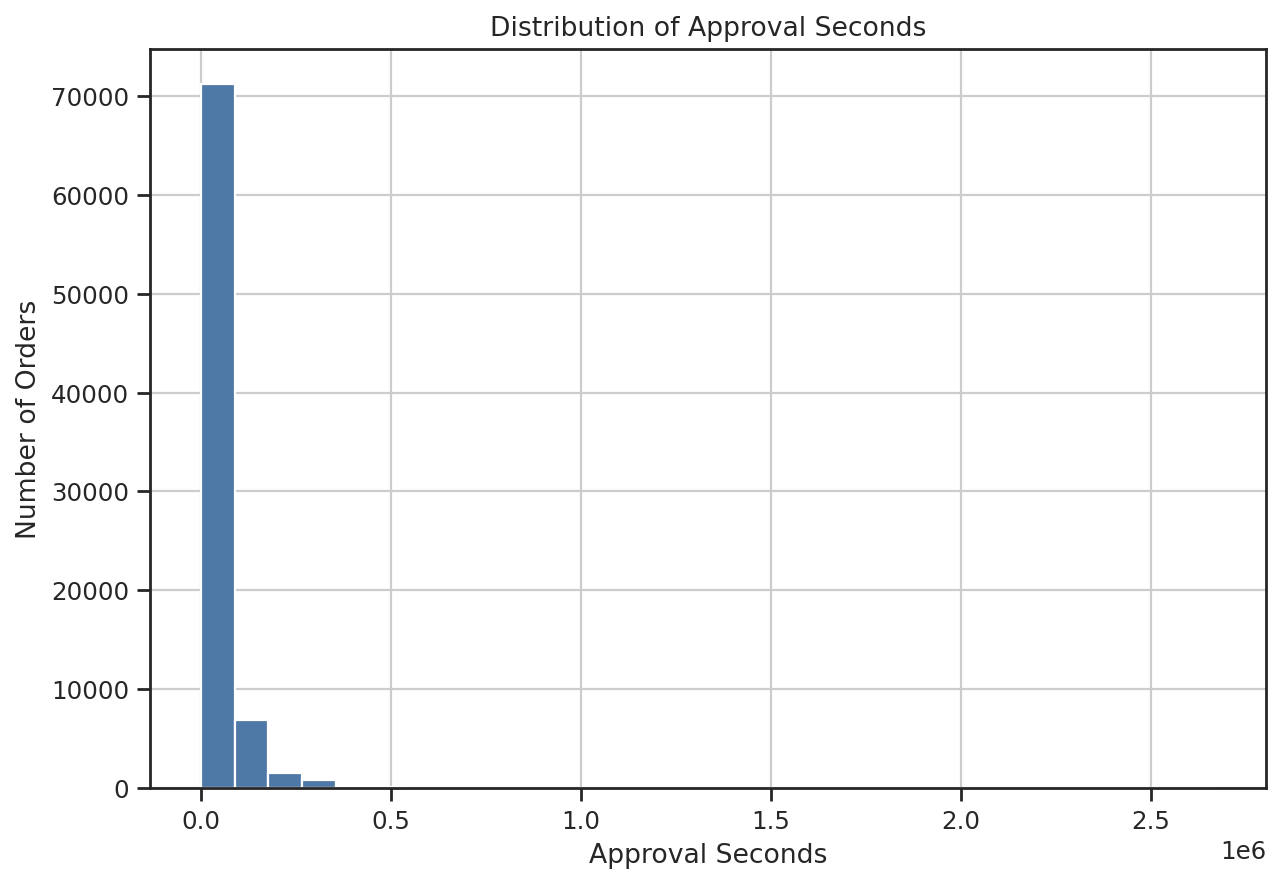

In [ ]:
order_df['approval_seconds'].hist(bins=30)
plt.title('Distribution of Approval Seconds')
plt.xlabel('Approval Seconds')
plt.ylabel('Number of Orders')
plt.savefig('Distribution of Approval Seconds.jpg',
            bbox_inches='tight')
plt.show()




This histogram shows the distribution of `approval_seconds`, which represents the time taken between order placement and approval, measured in seconds. 

The data is highly **right-skewed**, with the majority of orders approved within a very short timeframe—most. A small number of extreme outliers take significantly longer to be approved, leading to the long tail on the right.

This distribution suggests that while most transactions are processed quickly, a subset of orders may face significant delays, which could negatively impact the customer experience. Further investigation into these outliers may reveal process inefficiencies or exceptions worth addressing.


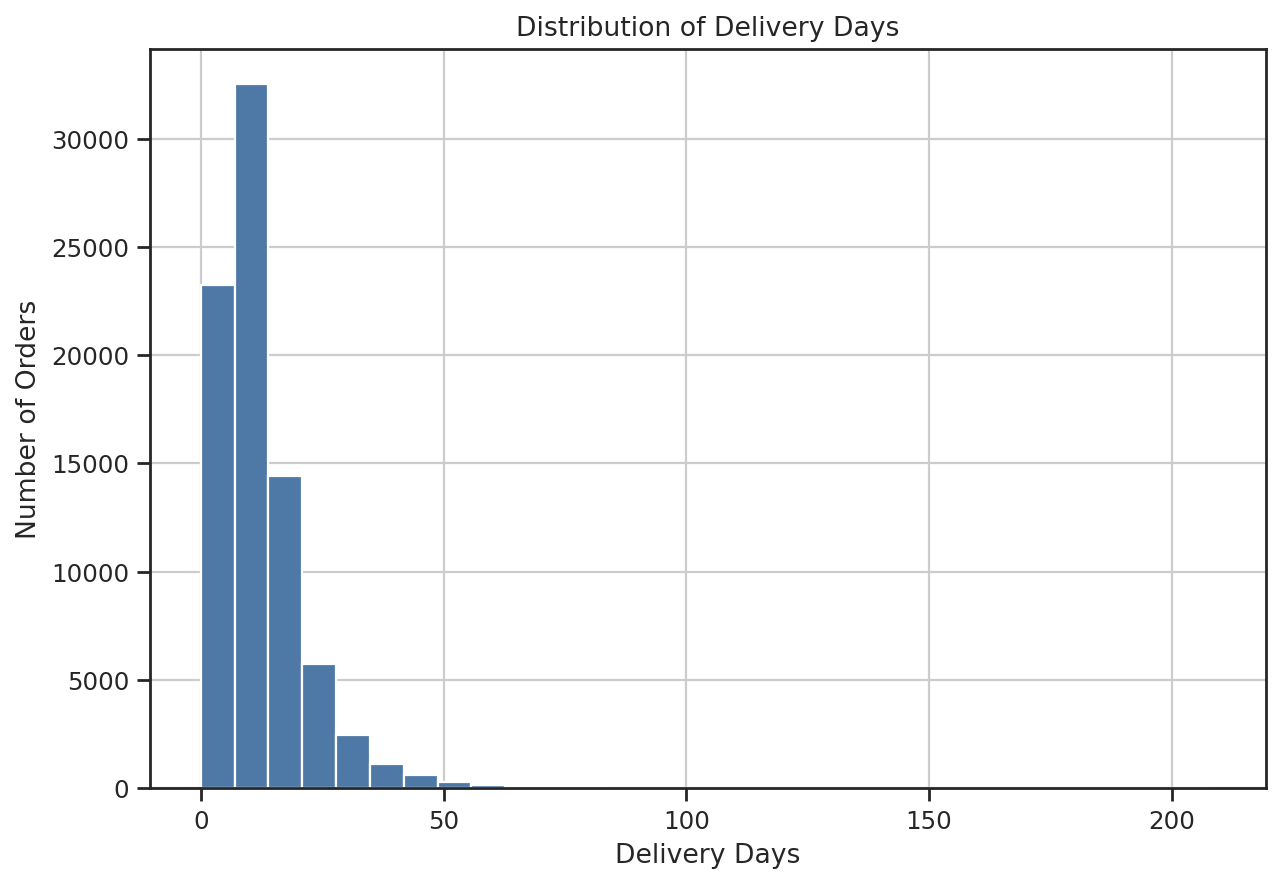

In [ ]:
order_df['delivery_days'].hist(bins=30)
plt.title('Distribution of Delivery Days')
plt.xlabel('Delivery Days')
plt.ylabel('Number of Orders')
plt.show()


This histogram visualizes the distribution of `delivery_days`.

The distribution is **right-skewed**, with most deliveries completed within the first 10–20 days. A large number of orders are delivered within a week, but there is a gradual decline as delivery times increase, with a few extreme cases taking over 100 days.


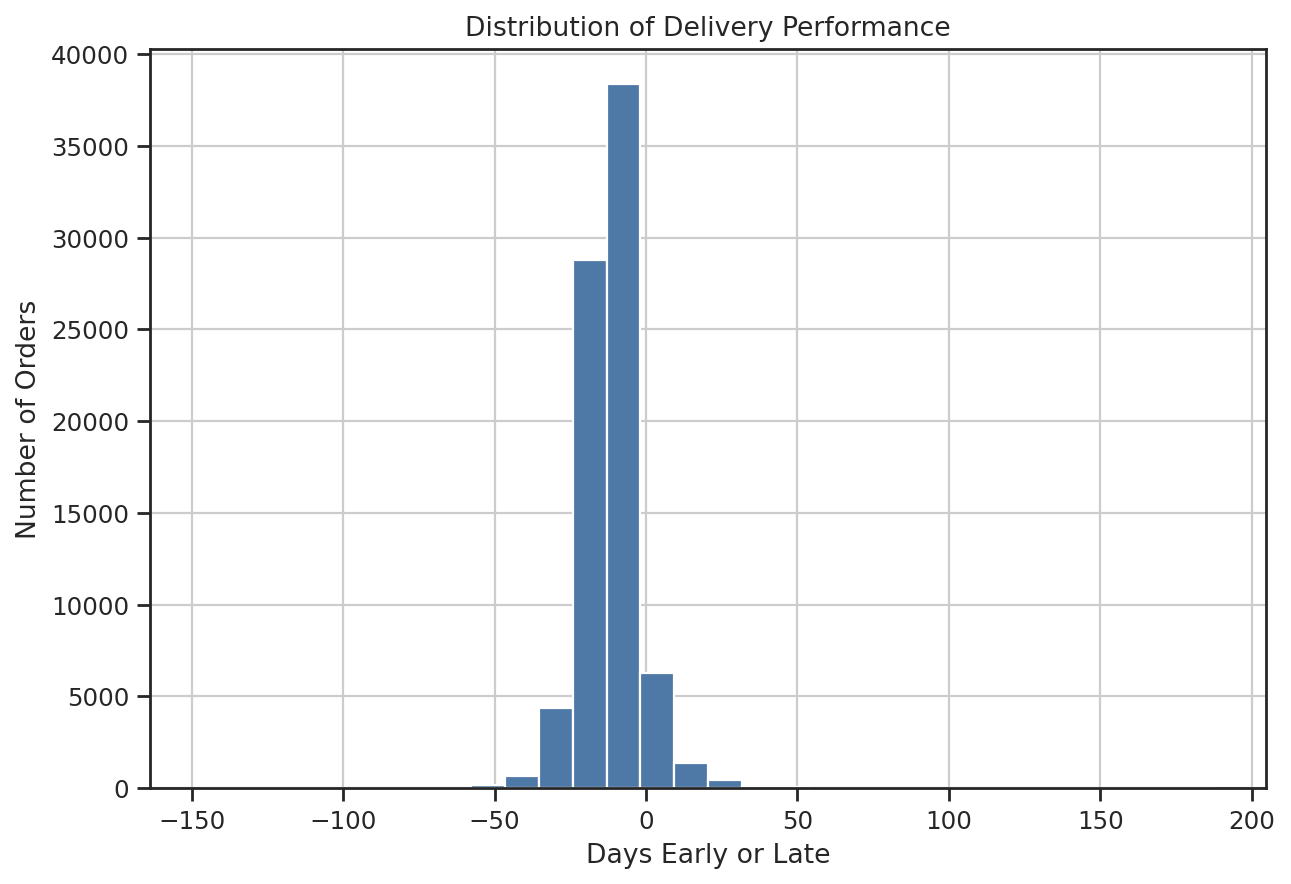

In [ ]:
order_df['delivery_performance'].hist(bins=30)
plt.title('Distribution of Delivery Performance')
plt.xlabel('Days Early or Late')
plt.ylabel('Number of Orders')
plt.show()


This histogram visualizes the **difference between actual delivery date and estimated delivery date**, measured in days:

- **0** indicates the order was delivered **exactly on time**.
- **Negative values** indicate **early deliveries**.
- **Positive values** indicate **late deliveries**.

The distribution is sharply centered around 0, suggesting that most deliveries were made close to the estimated date. However, a noticeable portion of orders were delivered a few days late, while a smaller number arrived significantly early or late.

In [ ]:
order_df['order_purchase_timestamp'].dt.to_period('M').value_counts().sort_index()


order_purchase_timestamp
2016-09       1
2016-10     261
2016-12       1
2017-01     621
2017-02    1421
2017-03    2251
2017-04    1983
2017-05    2958
2017-06    2653
2017-07    3289
2017-08    3518
2017-09    3512
2017-10    3828
2017-11    6479
2017-12    4744
2018-01    6150
2018-02    5808
2018-03    6113
2018-04    5277
2018-05    5402
2018-06    4840
2018-07    4564
2018-08    5067
Freq: M, Name: count, dtype: int64

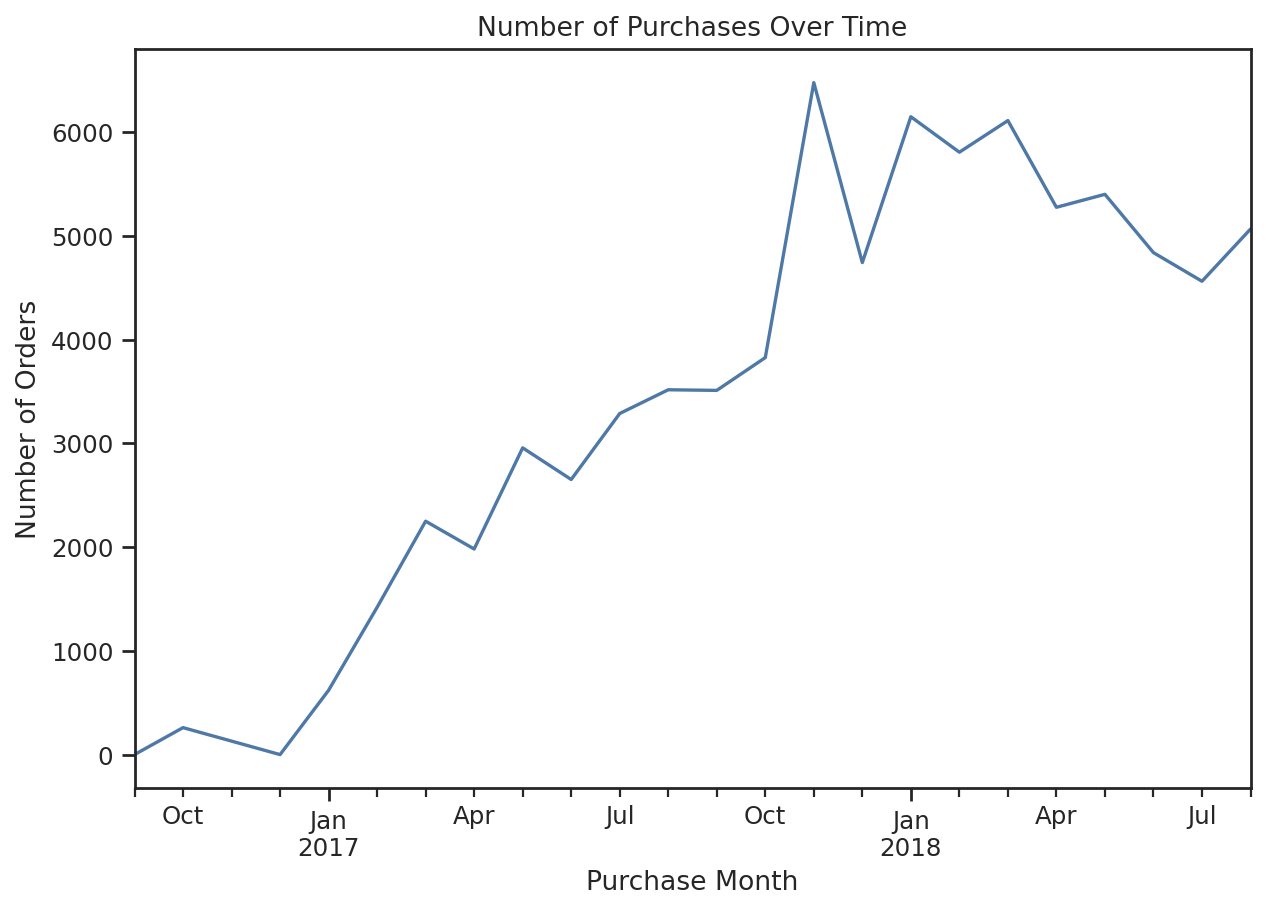

In [ ]:
order_df['order_purchase_timestamp'].groupby(order_df['order_purchase_timestamp'].dt.to_period('M')).count().plot()
plt.title('Number of Purchases Over Time')
plt.ylabel('Number of Orders')
plt.xlabel('Purchase Month')
plt.show()

This line chart illustrates the trend in total order volume over time, aggregated by purchase month from late 2016 to mid-2018.

We observe a **steady upward trend** in the number of purchases throughout 2017, followed by a **sharp spike in late 2017**, peaking in early 2018. After this peak, the purchase volume **stabilizes at a higher baseline**, with minor fluctuations throughout 2018.

## 2.2 Customer Data

In [ ]:
customer_df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [ ]:
customer_df.shape

(99441, 5)

In [ ]:
customer_df.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [ ]:
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
state_counts=customer_df.groupby('customer_state')['customer_id'].nunique().sort_values(ascending=False)
city_counts=customer_df.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)

top_5_cities = city_counts.head(5)

top_5_states = state_counts.head(5)


In [ ]:
state_counts

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [ ]:
top_5_states

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: customer_id, dtype: int64

In [ ]:
top_5_cities

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: customer_id, dtype: int64

Text(0, 0.5, 'Number of Customers')

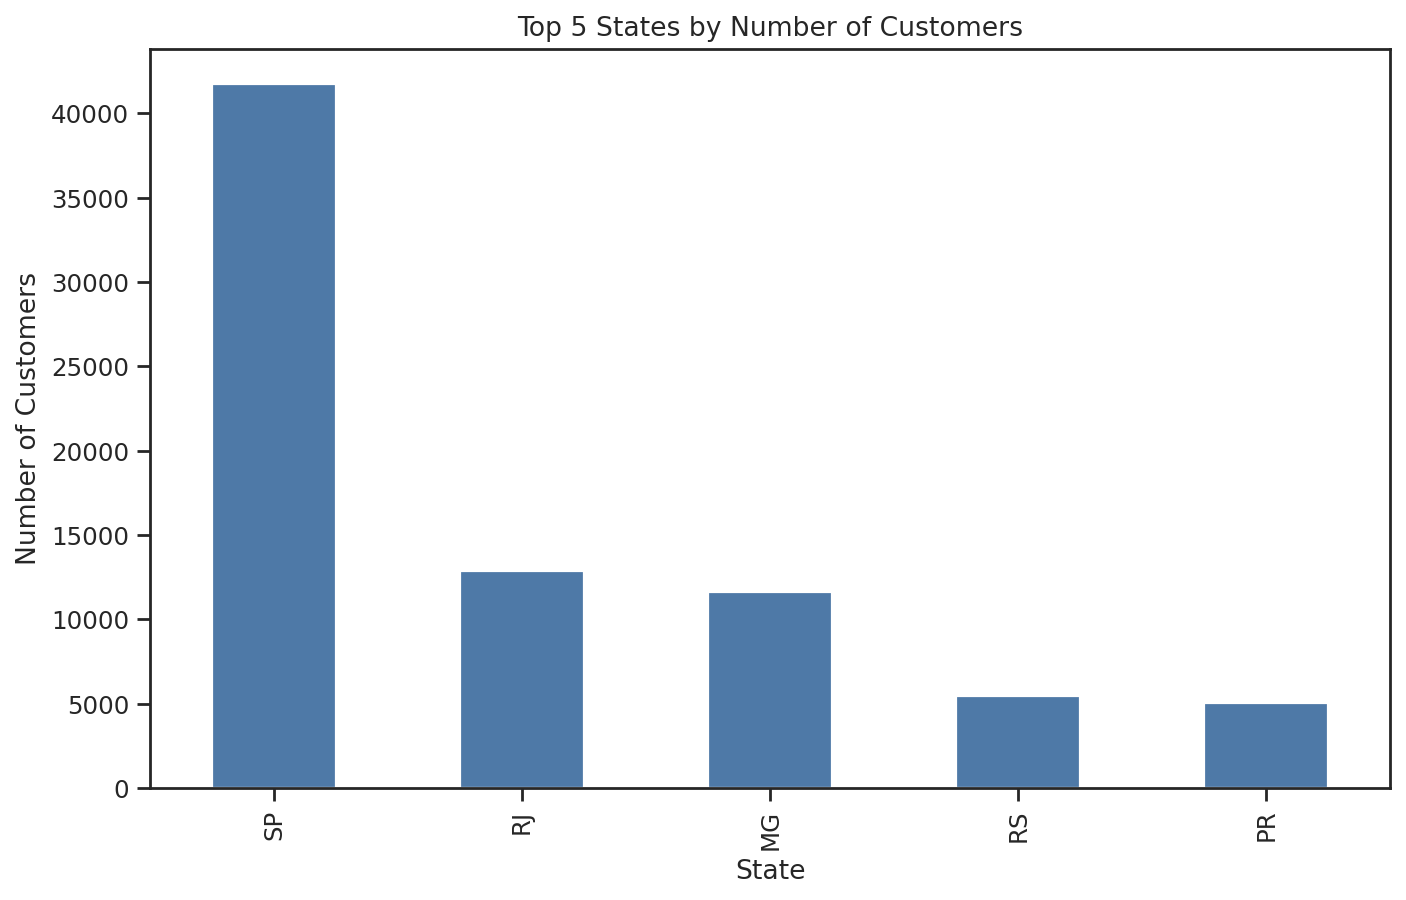

In [ ]:



top_5_states.plot(kind='bar', figsize=(10,6))
plt.title('Top 5 States by Number of Customers')
plt.xlabel('State')
plt.ylabel('Number of Customers')





This bar chart shows the top 5 Brazilian states with the highest number of Olist customers.

- **São Paulo (SP)** dominates with over 40,000 customers, far exceeding other states.
- **Rio de Janeiro (RJ)** and **Minas Gerais (MG)** follow with roughly similar customer counts.
- **Rio Grande do Sul (RS)** and **Paraná (PR)** round out the top 5.


Text(0, 0.5, 'Number of Customers')

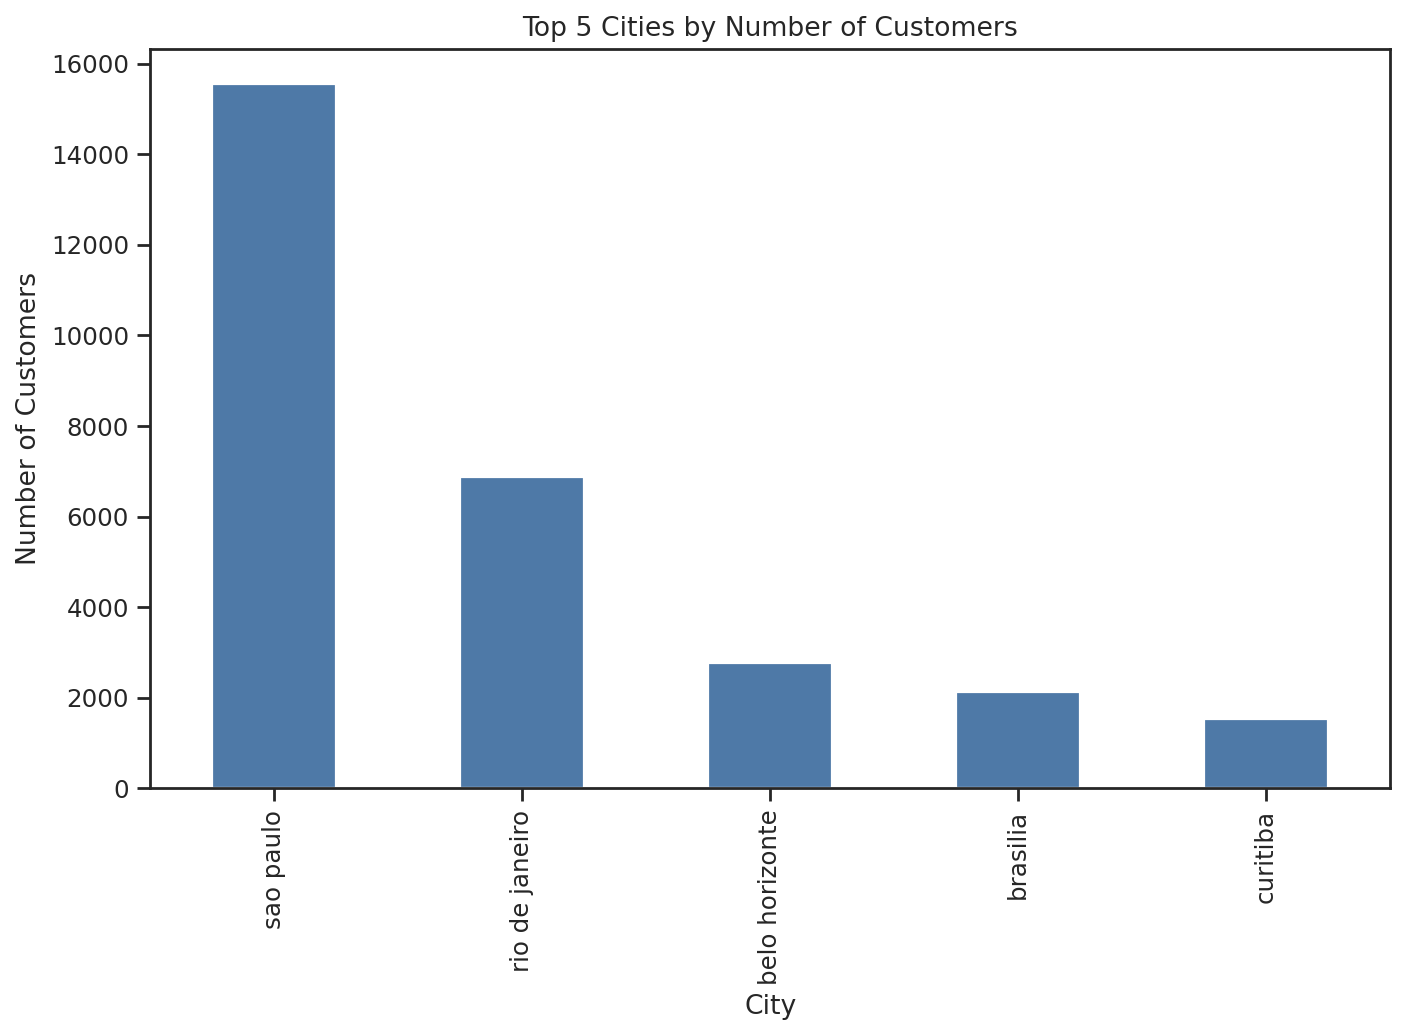

In [ ]:

top_5_cities.plot(kind='bar', figsize=(10,6))
plt.title('Top 5 Cities by Number of Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers')



This bar chart displays the top 5 cities with the most Olist customers:

- **São Paulo** leads by a large margin with over 15,000 customers.
- **Rio de Janeiro** follows, with less than half the number of São Paulo.
- Other major cities include **Belo Horizonte**, **Brasília**, and **Curitiba**.


## 2.3 Payment Data

In [ ]:
payment_df.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [ ]:
payment_df.shape

(103886, 5)

In [ ]:
payment_df.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [ ]:
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Text(0, 0.5, 'Number of Payments')

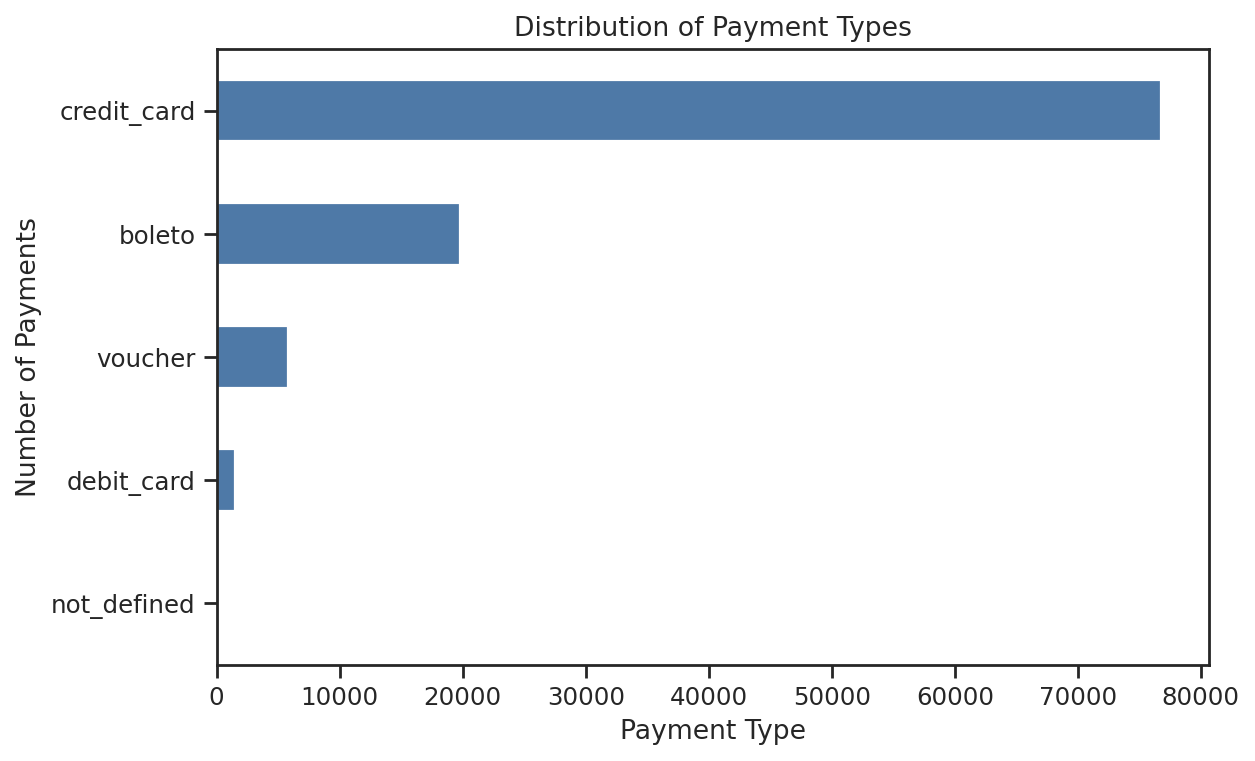

In [ ]:

payment_type_counts = payment_df['payment_type'].value_counts().sort_values(ascending=True)

payment_type_counts.plot(kind='barh', figsize=(8,5))
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Payments')


This horizontal bar chart shows the distribution of different payment methods used by customers on the Olist platform.

- **Credit cards** are by far the most common payment method, accounting for the majority of transactions.
- **Boleto**, a popular Brazilian bank slip payment method, is the second most used.
- **Vouchers** and **debit cards** represent a smaller share of transactions.
- A negligible number of payments fall under **not_defined**, possibly due to missing or malformed data.



Text(0, 0.5, 'Number of Payments')

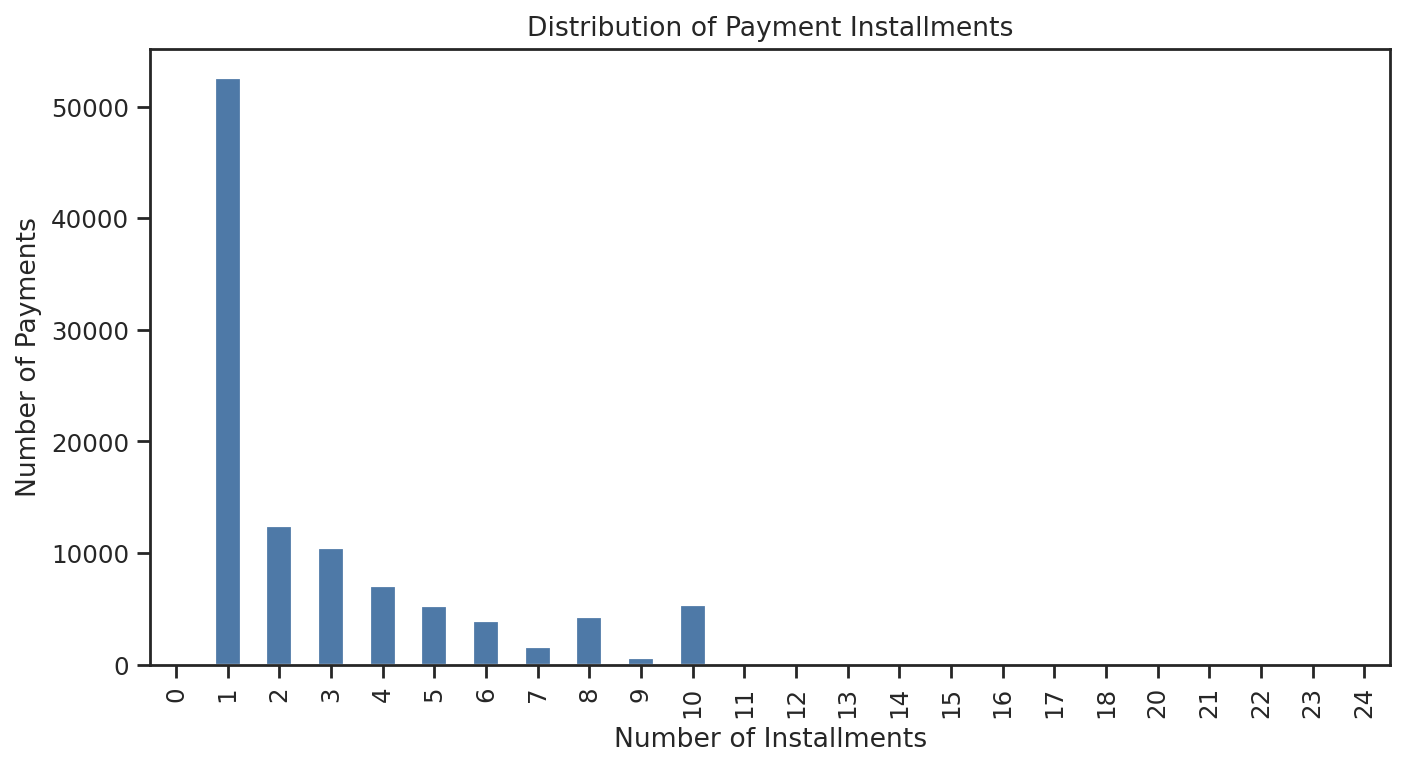

In [ ]:
installment_counts = payment_df['payment_installments'].value_counts().sort_index()

installment_counts.plot(kind='bar', figsize=(10,5))
plt.title('Distribution of Payment Installments')
plt.xlabel('Number of Installments')
plt.ylabel('Number of Payments')





This bar chart illustrates how many installments customers choose when paying for their orders on Olist.

- **Single-payment transactions (1 installment)** dominate, accounting for the majority of purchases.
- There is a noticeable drop after 1 installment, but a significant portion of customers still opt for **2–10 installments**, with a gradual decline as the number increases.
- Installment plans beyond 10 are extremely rare.

This trend suggests that while many customers prefer to pay in full, **installment-based payments are still widely used**, likely due to the flexibility they offer for higher-value purchases. 

In [ ]:
payment_df['payment_value'].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

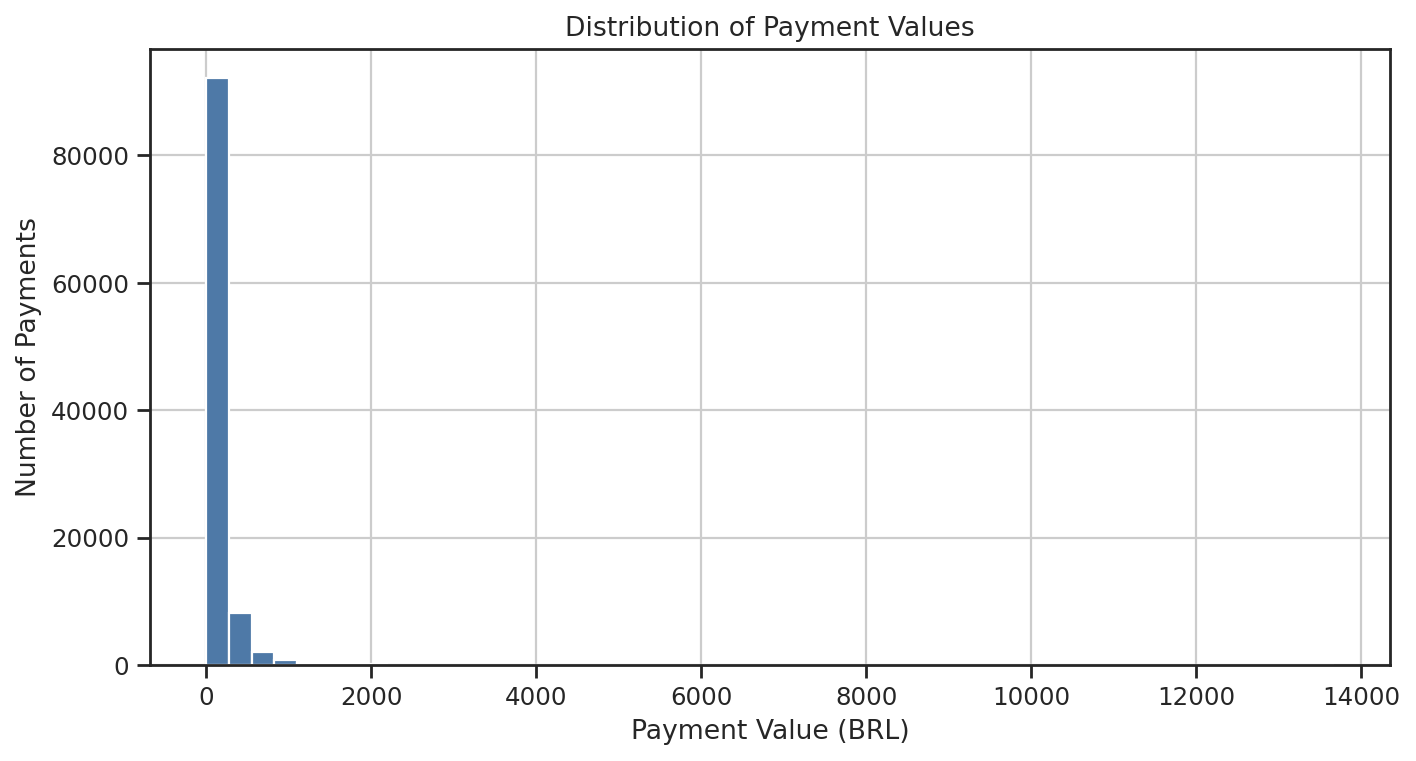

In [ ]:
payment_df['payment_value'].hist(bins=50, figsize=(10,5))
plt.title('Distribution of Payment Values')
plt.xlabel('Payment Value (BRL)')
plt.ylabel('Number of Payments')
plt.show()

This histogram displays the distribution of `payment_value` in Brazilian Reais (BRL), representing the total amount paid per order.

The majority of transactions falling below BRL 500. A small number of orders have much higher payment values, creating a long tail that extends beyond BRL 10,000.

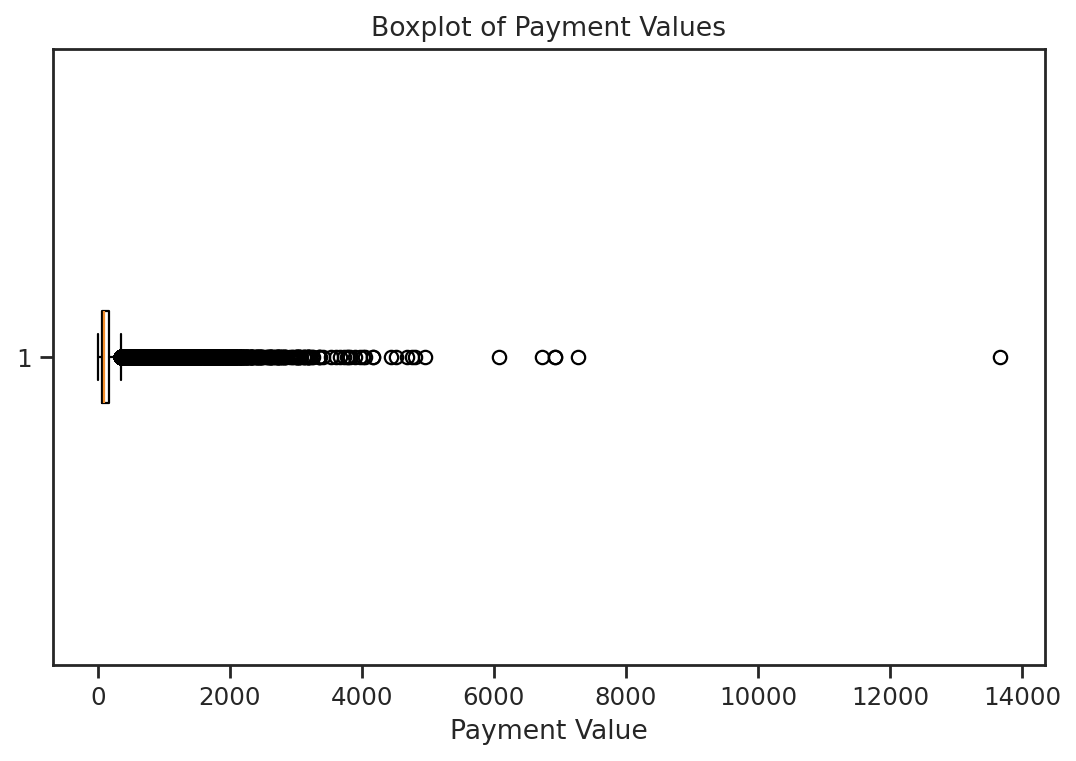

In [ ]:
plt.figure(figsize=(8,5))
plt.boxplot(payment_df['payment_value'], vert=False)
plt.title('Boxplot of Payment Values')
plt.xlabel('Payment Value')
plt.show()

Potential outliners exist.

## 2.4 Review Data

In [ ]:
review_df.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [ ]:
review_df.shape

(99224, 7)

In [ ]:
review_df.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [ ]:
review_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Most review doesn't have a title and message, therefore, we will only look at the review scores.

Text(0, 0.5, 'Counts')

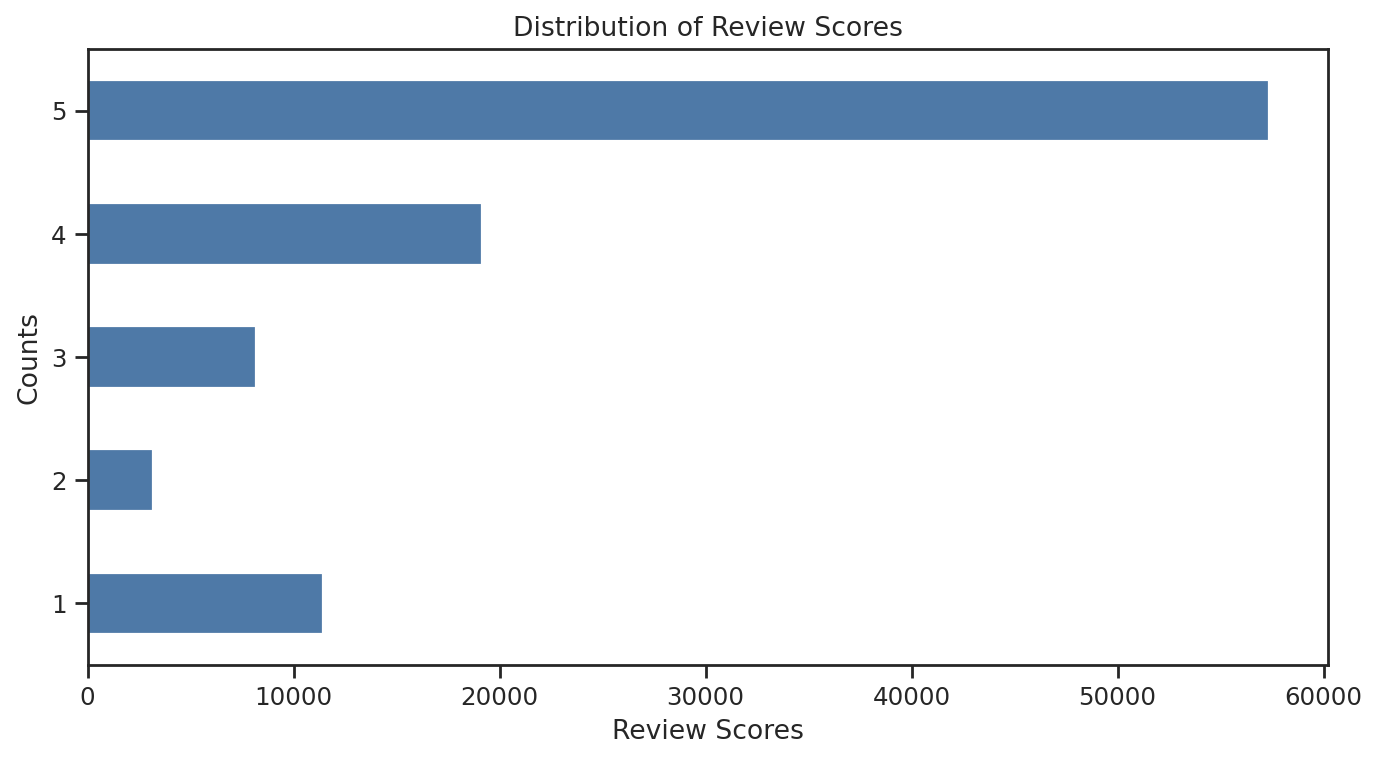

In [ ]:
review_counts = review_df['review_score'].value_counts().sort_index()

review_counts.plot(kind='barh', figsize=(10,5))
plt.title('Distribution of Review Scores')
plt.xlabel('Review Scores')
plt.ylabel('Counts')




This horizontal bar chart displays the distribution of customer review scores, ranging from 1 to 5.

- The majority of reviews are **5-star ratings**, indicating a high level of customer satisfaction.
- **4-star reviews** are also common, followed by a drop-off for 3-star and lower ratings.
- **1-star reviews appear more frequently than 2 and 3-star**, suggesting that dissatisfied customers may express stronger negative feedback.


## 2.5 Order Itmes Data & Product Data

In [ ]:
item_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [ ]:
product_df.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [ ]:
item_df = item_df.merge(product_df, on='product_id')
item_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value product_category_name  \
0  2017-09-19 09:45:35   58.90          13.29            cool_stuff   
1  2017-05-03 11:05:13  239.90          19.93              pet_shop   
2  2018-01-18 14:48:30  199.00          17.87      moveis_decoracao   
3  2018-08-15 10:10:18   12.99          12.79            perfumaria   
4  2017-02-13 13:57:51  199.90          18.14    ferramentas_jardim   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 58.0                       598.0                 4.0   
1                 56.0                       239.0                 2.0   
2                 59.0                       695.0                 2.0   
3                 42.0                       480.0                 1.0   
4                 59.0                       409.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             650.0               28.0                9.0              14.0  
1           30000.0               50.0               30.0              40.0  
2            3050.0               33.0               13.0              33.0  
3             200.0               16.0               10.0              15.0  
4            3750.0               35.0               40.0              30.0

In [ ]:
item_df.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name         1603
product_name_lenght           1603
product_description_lenght    1603
product_photos_qty            1603
product_weight_g                18
product_length_cm               18
product_height_cm               18
product_width_cm                18
dtype: int64

In [ ]:
for col in [
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]:
    mean_val = item_df[col].mean()
    item_df[col] = item_df[col].fillna(mean_val)


In [ ]:

order_item_counts = item_df.groupby('order_id').size()


num_multi_item_orders = (order_item_counts > 1).sum()

print(f"Number of orders with more than one item: {num_multi_item_orders}")


Number of orders with more than one item: 9803


In [ ]:
item_df[['price','freight_value', 'product_weight_g']].describe()

price  freight_value  product_weight_g
count  112650.000000  112650.000000     112650.000000
mean      120.653739      19.990320       2093.672047
std       183.633928      15.806405       3751.297141
min         0.850000       0.000000          0.000000
25%        39.900000      13.080000        300.000000
50%        74.990000      16.260000        700.000000
75%       134.900000      21.150000       1800.000000
max      6735.000000     409.680000      40425.000000



- **Price**
  - The average order price is **BRL 120.65**, with a large standard deviation of **BRL 183.63**, indicating high variability.
  - 50% of orders fall below **BRL 74.99**, while the maximum reaches **BRL 6,735**, suggesting a few high-value outliers.

- **Freight Value**
  - The mean freight cost is **BRL 19.99**, with a more moderate spread.
  - Notably, some orders had **0 freight cost**, possibly due to promotions or bundled shipping.

- **Product Weight**
  - The average product weight is around **2.1 kg**, but it ranges from **0 g** to over **40 kg**, indicating a wide variety of product types.
  - The weight distribution is heavily skewed with a long right tail, as shown by the high maximum and large standard deviation.



In [ ]:
items_per_order = (
    item_df
      .groupby('order_id')
      .agg(
         total_freight_value=('freight_value', 'sum'),
         total_product_weight=('product_weight_g', 'sum')
      )
      .reset_index()
)

items_per_order.head()


order_id  total_freight_value  total_product_weight
0  00010242fe8c5a6d1ba2dd792cb16214                13.29                 650.0
1  00018f77f2f0320c557190d7a144bdd3                19.93               30000.0
2  000229ec398224ef6ca0657da4fc703e                17.87                3050.0
3  00024acbcdf0a6daa1e931b038114c75                12.79                 200.0
4  00042b26cf59d7ce69dfabb4e55b4fd9                18.14                3750.0

## 2.6 Merging Data

In [ ]:
df = customer_df.merge(order_df, on='customer_id')
df = df.merge(payment_df, on='order_id')
df = df.merge(items_per_order, on='order_id')
df = df.merge(review_df, on='order_id', how='left')

df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

    order_approved_at order_delivered_carrier_date  ... payment_installments  \
0 2017-05-16 15:22:12                   2017-05-23  ...                    2   
1 2018-01-12 20:58:32                   2018-01-15  ...                    8   
2 2018-05-20 16:19:10                   2018-06-11  ...                    7   
3 2018-03-13 17:29:19                   2018-03-27  ...                    1   
4 2018-07-29 10:10:09                   2018-07-30  ...                    8   

  payment_value  total_freight_value  total_product_weight  \
0        146.87                21.88                8683.0   
1        335.48                46.48               10150.0   
2        157.73                17.79                8267.0   
3        173.30                23.36               12160.0   
4        252.25                22.25                5200.0   

                          review_id  review_score review_comment_title  \
0  88b8b52d46df026a9d1ad2136a59b30b           4.0                  NaN   
1  02fc48a9efa3e3d0f1a8ea26507eeec3           5.0                  NaN   
2  5ad6695d76ee186dc473c42706984d87           5.0                  NaN   
3  059a801bb31f6aab2266e672cab87bc5           5.0                  NaN   
4  8490879d58d6c5d7773f2739a03f089a           5.0        a melhor nota   

                          review_comment_message  review_creation_date  \
0                                            NaN   2017-05-26 00:00:00   
1                                            NaN   2018-01-30 00:00:00   
2                                            NaN   2018-06-15 00:00:00   
3                                            NaN   2018-03-29 00:00:00   
4  O baratheon è esxelente Amo adoro o baratheon   2018-08-10 00:00:00   

   review_answer_timestamp  
0      2017-05-30 22:34:40  
1      2018-02-10 22:43:29  
2      2018-06-15 12:10:59  
3      2018-04-02 18:36:47  
4      2018-08-17 01:59:52  

[5 rows x 27 columns]

In [ ]:
df.shape

(85032, 27)

In [ ]:
df.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
approval_seconds                        float64
delivery_days                             int64
delivery_performance                      int64
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
total_freight_value                     float64
total_product_weight                    float64
review_id                                object
review_score                            float64
review_comment_title                     object
review_comment_message                   object
review_creation_date                     object
review_answer_timestamp                  object
dtype: object

In [ ]:
df.isnull().sum()

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_carrier_date         0
order_delivered_customer_date        0
order_estimated_delivery_date        0
approval_seconds                     0
delivery_days                        0
delivery_performance                 0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
total_freight_value                  0
total_product_weight                 0
review_id                          578
review_score                       578
review_comment_title             75947
review_comment_message           50685
review_creation_date               578
review_answer_timestamp            578
dtype: int64

In [ ]:
df[['approval_seconds', 'delivery_days', 'delivery_performance','payment_installments', 'payment_value','review_score']].describe()

approval_seconds  delivery_days  delivery_performance  \
count      8.503200e+04   85032.000000          85032.000000   
mean       2.909197e+04      12.025120            -11.595164   
std        6.423834e+04       9.736295             10.373707   
min        0.000000e+00       0.000000           -147.000000   
25%        7.530000e+02       6.000000            -17.000000   
50%        1.108000e+03      10.000000            -12.000000   
75%        1.459575e+04      15.000000             -7.000000   
max        2.669197e+06     209.000000            188.000000   

       payment_installments  payment_value  review_score  
count          85032.000000   85032.000000  84454.000000  
mean               2.961520     154.753591      4.131018  
std                2.729036     216.688111      1.302901  
min                0.000000       0.000000      1.000000  
25%                1.000000      56.870000      4.000000  
50%                2.000000     100.340000      5.000000  
75%                4.000000     173.232500      5.000000  
max               24.000000   13664.080000      5.000000

In [ ]:
# Number of orders per customer
num_orders_by_customer = df.groupby('customer_unique_id')['order_id'].nunique().value_counts()
num_orders_by_customer = num_orders_by_customer.sort_index()
print("Average number of purchases per customer: {:.2f}".format(
    df.groupby('customer_id')['order_id'].nunique().mean()
))


Average number of purchases per customer: 1.00


In [ ]:
df.groupby('customer_unique_id')['order_id'].nunique().value_counts()

order_id
1     76231
2      1981
3       125
4        21
5         8
6         3
9         1
14        1
7         1
Name: count, dtype: int64

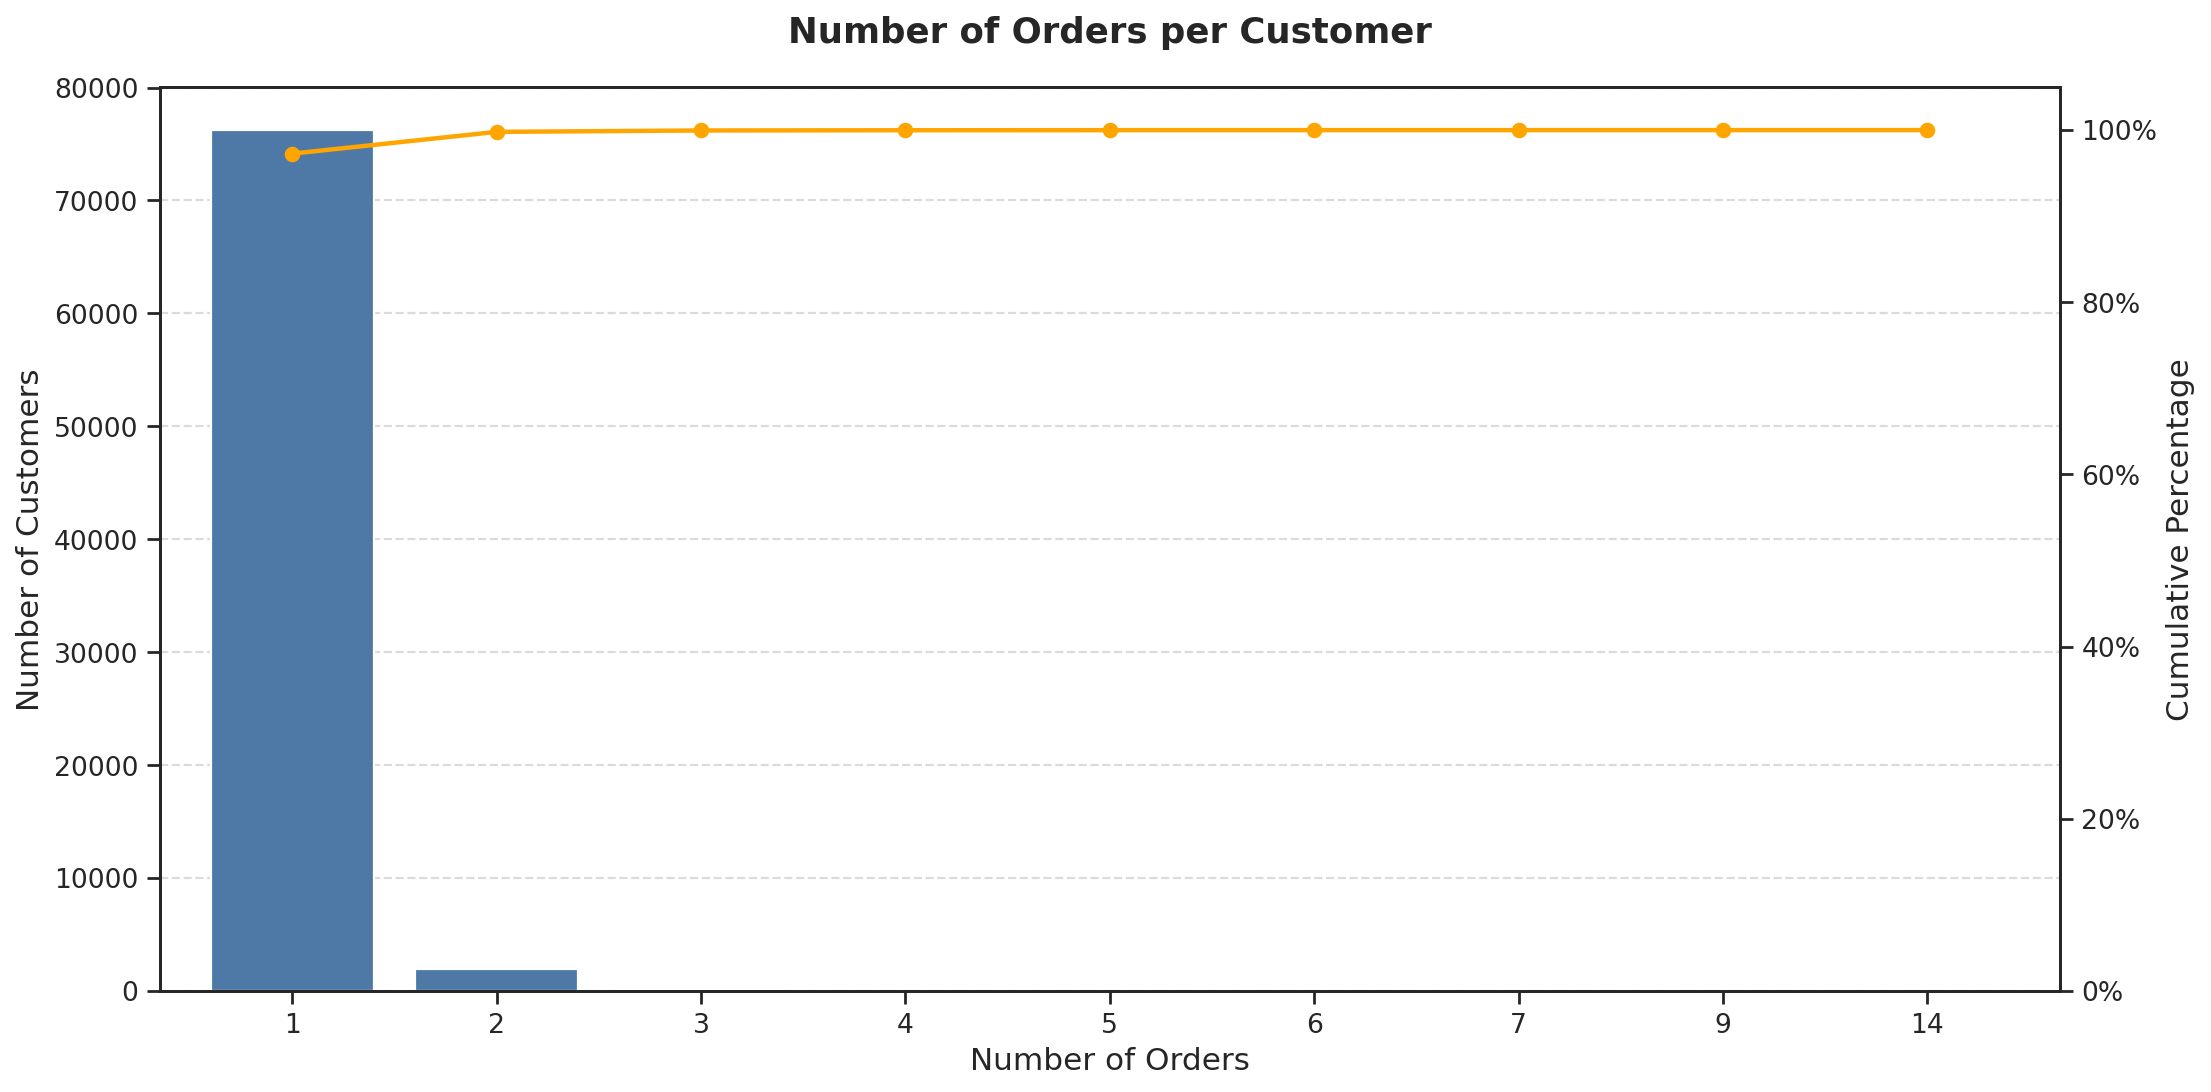

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(14,7))

# Bar plot
num_orders_by_customer.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Number of Orders per Customer', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Number of Orders', fontsize=14)
ax.set_ylabel('Number of Customers', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

# Cumulative percentage
cum_sum_pct = num_orders_by_customer.cumsum() / num_orders_by_customer.sum()


ax2 = ax.twinx()
ax2.plot(range(len(cum_sum_pct)), cum_sum_pct.values, color='orange', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Percentage', fontsize=14)
ax2.set_ylim(0, 1.05)
ax2.set_yticklabels(['{:.0f}%'.format(y*100) for y in ax2.get_yticks()], fontsize=12)

# Layout
plt.tight_layout()
plt.show()


- A vast majority of customers (**over 95%**) placed only **one order**, as shown by the dominant bar at `1` on the x-axis.
- Very few customers placed multiple orders, and the frequency drops sharply after two orders.
- The cumulative percentage line (in orange) confirms that repeat purchases are rare—almost **100% of customers** are accounted for by just a few orders.


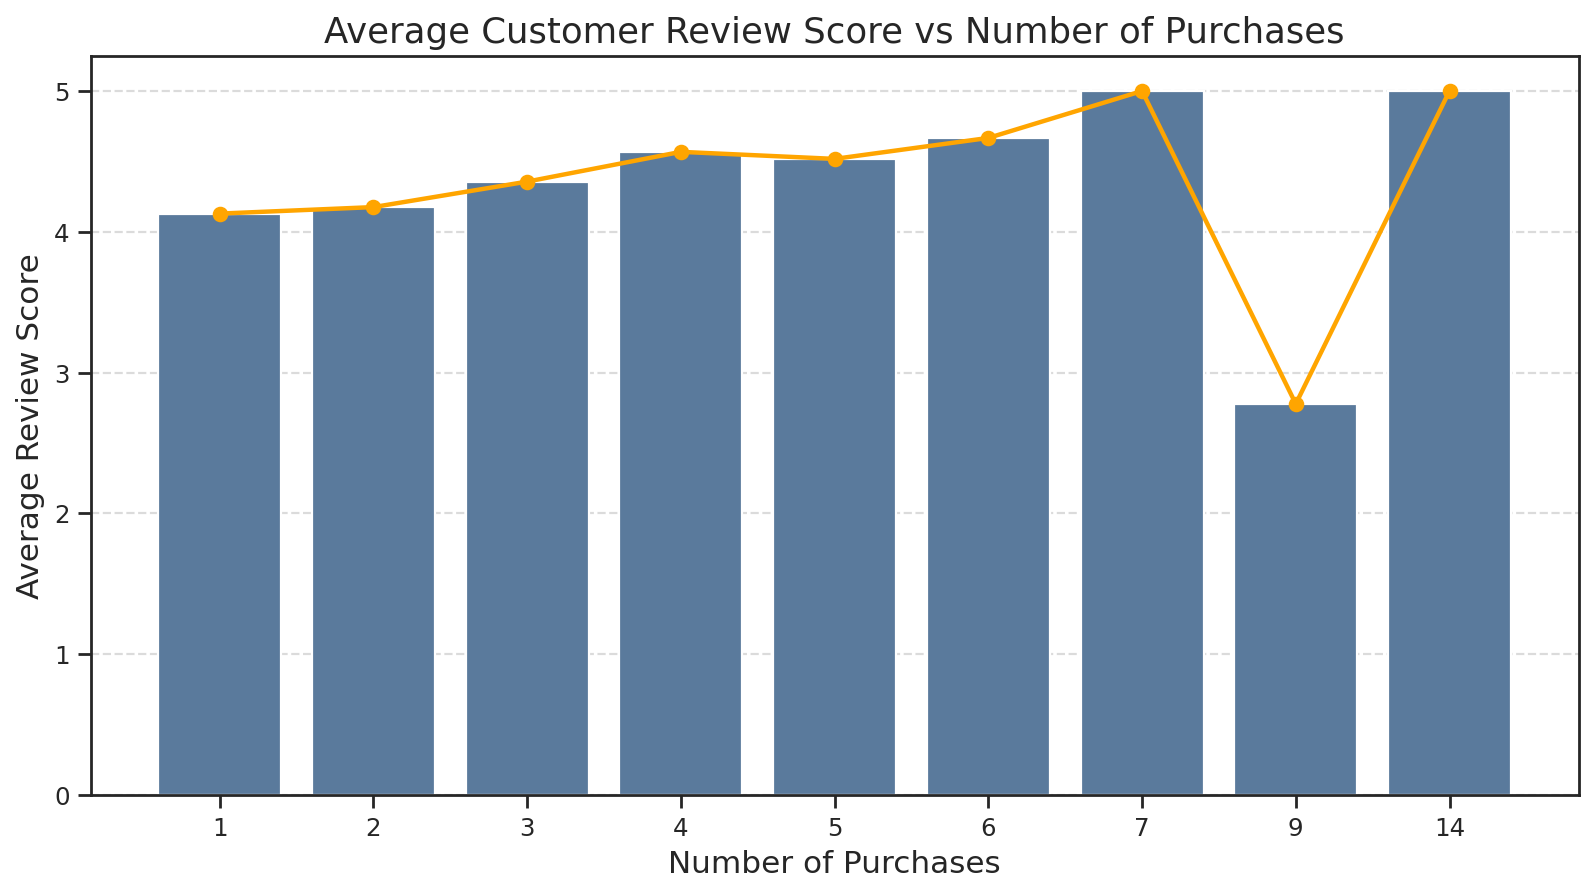

In [ ]:

customer_summary = df.groupby('customer_unique_id').agg(
    num_orders=('order_id', 'nunique'),
    avg_review_score=('review_score', 'mean')
).reset_index()


order_group_summary = customer_summary.groupby('num_orders')['avg_review_score'].mean().reset_index()

plt.figure(figsize=(12,6))

ax = sns.barplot(data=order_group_summary, x='num_orders', y='avg_review_score', color='#4f79a7')


x_positions = np.arange(len(order_group_summary))
y_values = order_group_summary['avg_review_score'].values


ax.plot(x_positions, y_values, color='orange', marker='o', linewidth=2)


plt.title('Average Customer Review Score vs Number of Purchases', fontsize=16)
plt.xlabel('Number of Purchases', fontsize=14)
plt.ylabel('Average Review Score', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)


ax.set_xticks(x_positions)
ax.set_xticklabels(order_group_summary['num_orders'].values)

plt.show()

This combined bar and line chart shows the relationship between the number of purchases made by a customer and their corresponding **average review score**.

- In general, customers who make **more purchases tend to leave higher review scores**, indicating a **positive correlation between purchase frequency and satisfaction**.
- Customers with 1 to 6 purchases provide average review scores between **4.1 and 4.6**, gradually increasing.
- Notably, customers with **7 or more purchases** tend to give nearly **perfect scores (≈5.0)**, suggesting that loyal customers are highly satisfied.



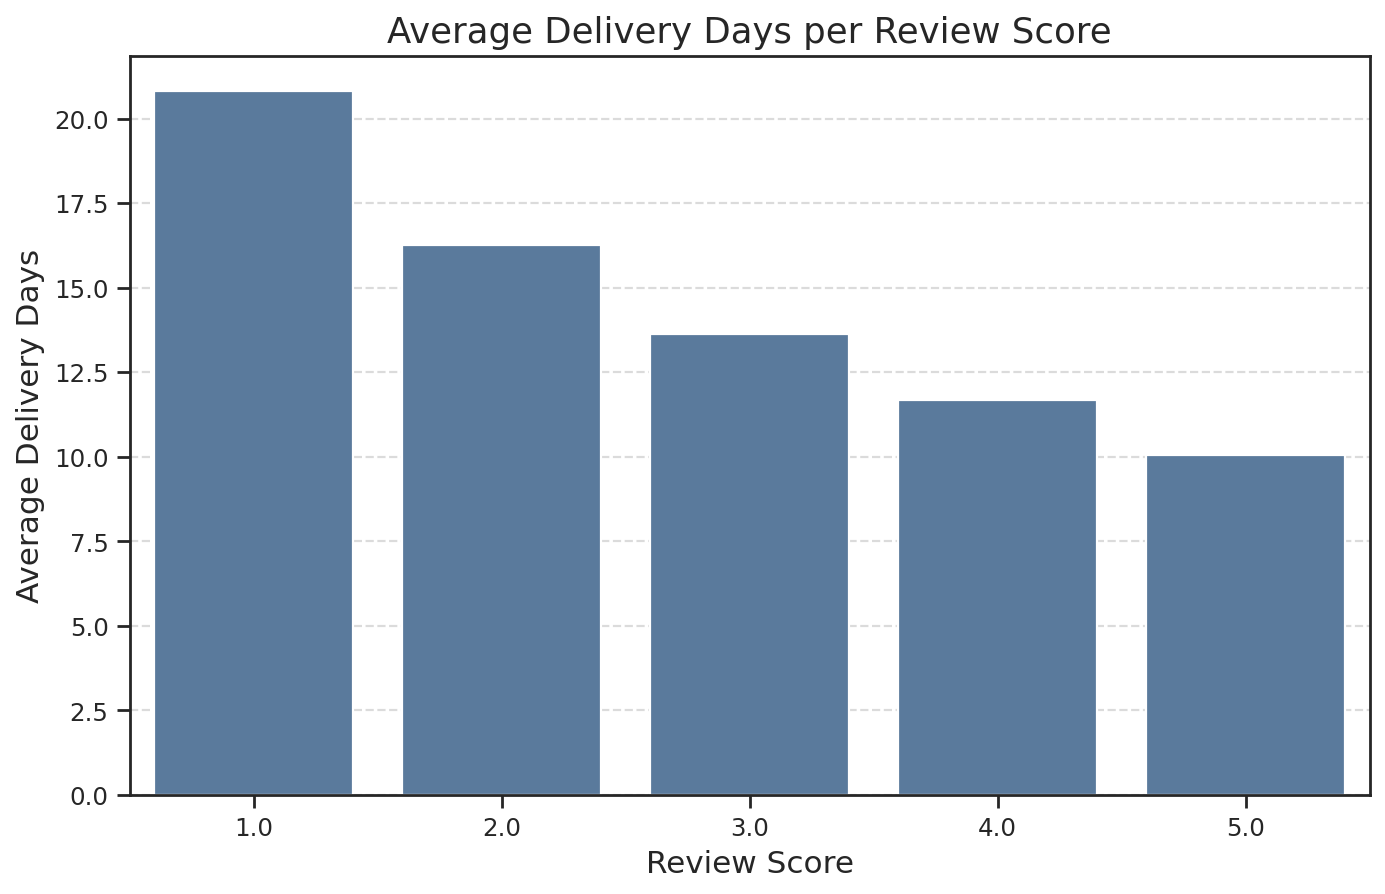

In [ ]:

review_vs_delivery = df.groupby('review_score')['delivery_days'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=review_vs_delivery, x='review_score', y='delivery_days', color='#4f79a7')

plt.title('Average Delivery Days per Review Score', fontsize=16)
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Average Delivery Days', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

This bar chart shows the relationship between customer review scores and the average number of delivery days.

- There is a **clear inverse relationship** between delivery speed and customer satisfaction.
- Orders with **1-star reviews** take the longest to arrive, averaging **over 20 days**.
- As the review score increases, the average delivery time **steadily decreases**.
- **5-star reviews** are associated with the fastest deliveries, averaging around **10 days**.

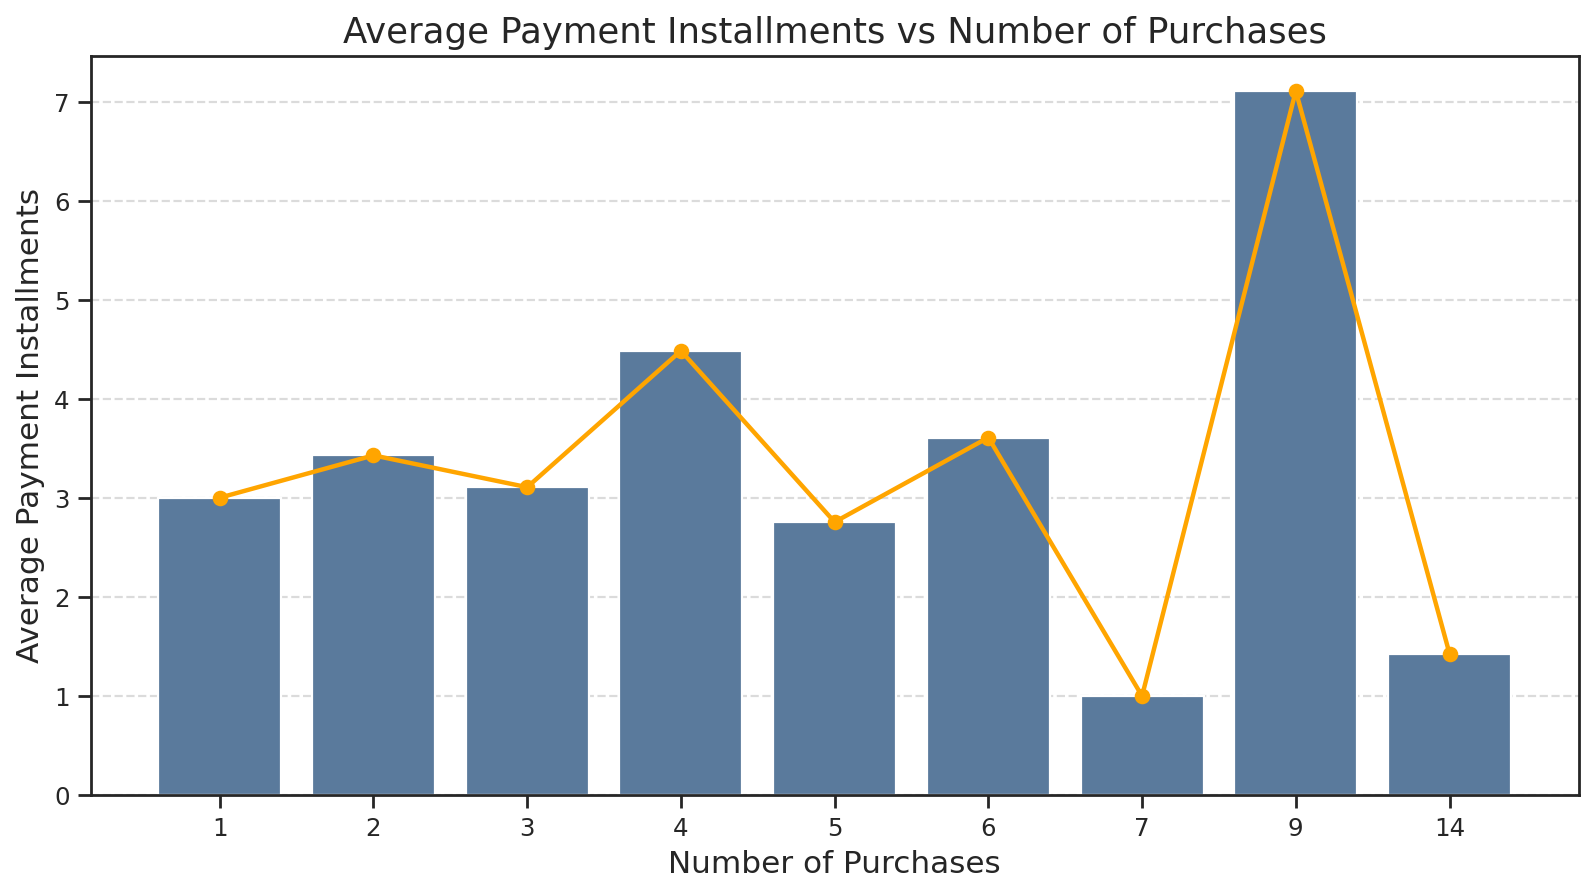

In [ ]:

customer_summary = df.groupby('customer_unique_id').agg(
    num_orders=('order_id', 'nunique'),
    avg_installments=('payment_installments', 'mean')
).reset_index()

order_vs_installments = customer_summary.groupby('num_orders')['avg_installments'].mean().reset_index()
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12,6))


ax = sns.barplot(data=order_vs_installments, x='num_orders', y='avg_installments', color='#4f79a7')


x_positions = np.arange(len(order_vs_installments))
y_values = order_vs_installments['avg_installments'].values
ax.plot(x_positions, y_values, color='orange', marker='o', linewidth=2)


plt.title('Average Payment Installments vs Number of Purchases', fontsize=16)
plt.xlabel('Number of Purchases', fontsize=14)
plt.ylabel('Average Payment Installments', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)


ax.set_xticks(x_positions)
ax.set_xticklabels(order_vs_installments['num_orders'].values)

plt.show()




This plot illustrates how the average number of payment installments varies with customer purchase frequency.

- On average, **customers who purchase 1–6 times** tend to use around **3–4 installments** per order.


# 3. Feature Engineering

## 3.1 Creating target variable

In [ ]:
today = df['order_purchase_timestamp'].max()
today

Timestamp('2018-08-28 22:51:54')

In [ ]:
# Group by customer and get the latest purchase timestamp
customer_last_purchase = df.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
customer_last_purchase.columns = ['customer_unique_id', 'last_purchase_date']
customer_last_purchase

customer_unique_id  last_purchase_date
0      0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27
1      0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27
2      0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03
3      0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41
4      0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42
...                                 ...                 ...
78367  fffcf5a5ff07b0908bd4e2dbc735a684 2017-06-08 21:00:36
78368  fffea47cd6d3cc0a88bd621562a9d061 2017-12-10 20:07:56
78369  ffff371b4d645b6ecea244b27531430a 2017-02-07 15:49:16
78370  ffff5962728ec6157033ef9805bacc48 2018-05-02 15:17:41
78371  ffffd2657e2aad2907e67c3e9daecbeb 2017-05-02 20:18:45

[78372 rows x 2 columns]

In [ ]:
# Recency = Today - Last Purchase Date
customer_last_purchase['recency_days'] = (today - customer_last_purchase['last_purchase_date']).dt.days
customer_last_purchase

customer_unique_id  last_purchase_date  recency_days
0      0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27           110
1      0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27           113
2      0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03           536
3      0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41           320
4      0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42           287
...                                 ...                 ...           ...
78367  fffcf5a5ff07b0908bd4e2dbc735a684 2017-06-08 21:00:36           446
78368  fffea47cd6d3cc0a88bd621562a9d061 2017-12-10 20:07:56           261
78369  ffff371b4d645b6ecea244b27531430a 2017-02-07 15:49:16           567
78370  ffff5962728ec6157033ef9805bacc48 2018-05-02 15:17:41           118
78371  ffffd2657e2aad2907e67c3e9daecbeb 2017-05-02 20:18:45           483

[78372 rows x 3 columns]

In [ ]:
customer_last_purchase['recency_days'].describe()

count    78372.000000
mean       241.341678
std        151.731747
min          0.000000
25%        119.000000
50%        223.000000
75%        348.000000
max        694.000000
Name: recency_days, dtype: float64

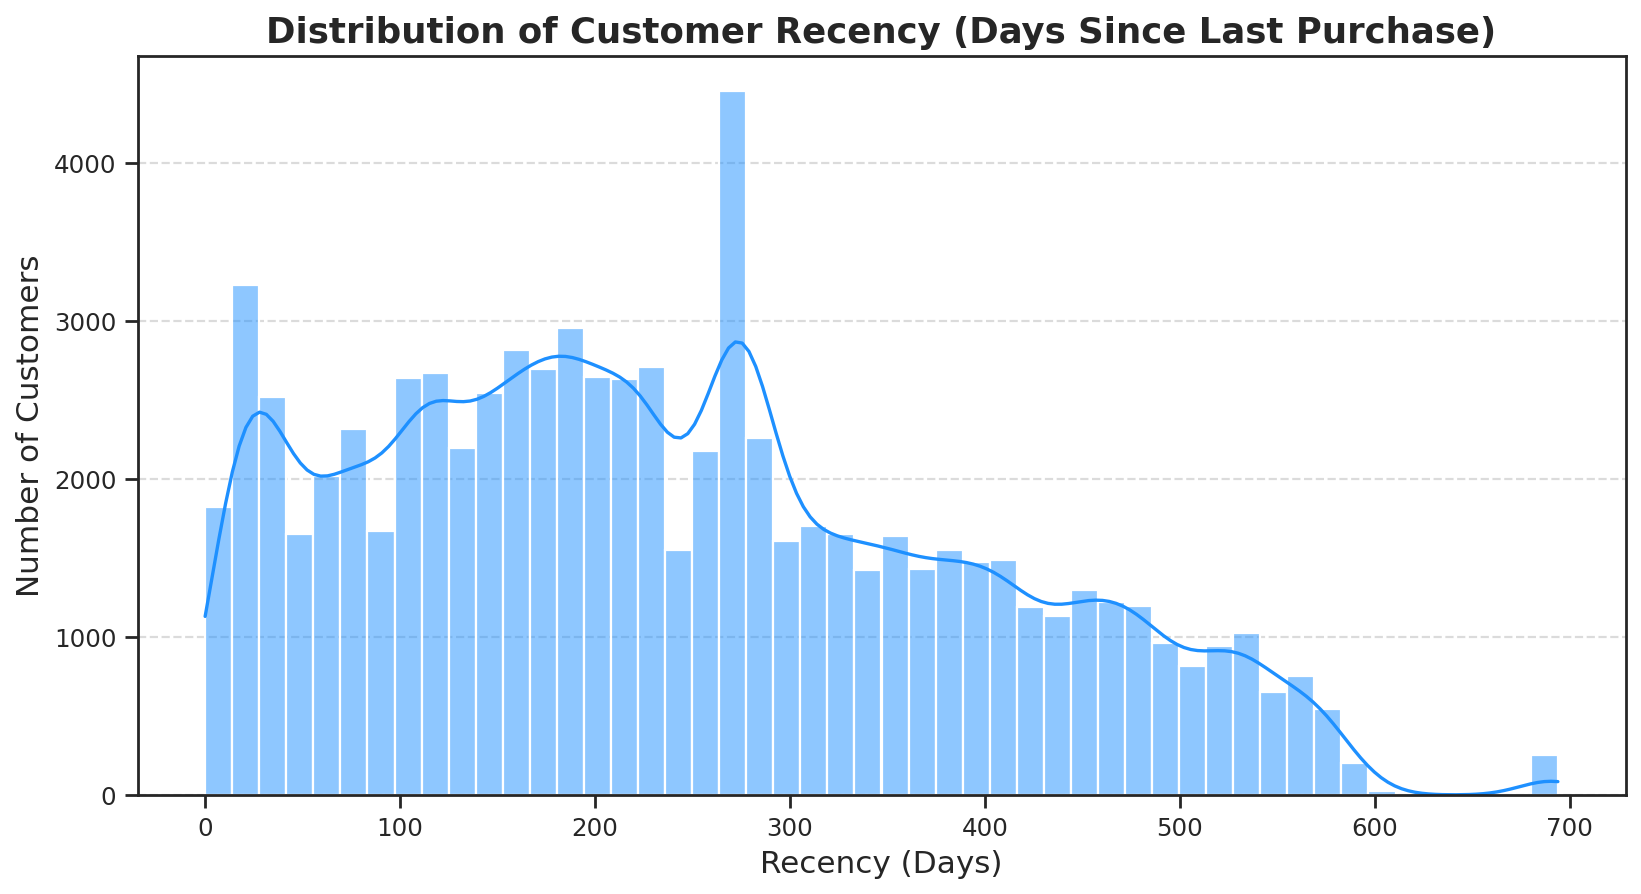

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(customer_last_purchase['recency_days'], bins=50, kde=True, color='dodgerblue')

plt.title('Distribution of Customer Recency (Days Since Last Purchase)', fontsize=16, fontweight='bold')
plt.xlabel('Recency (Days)', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

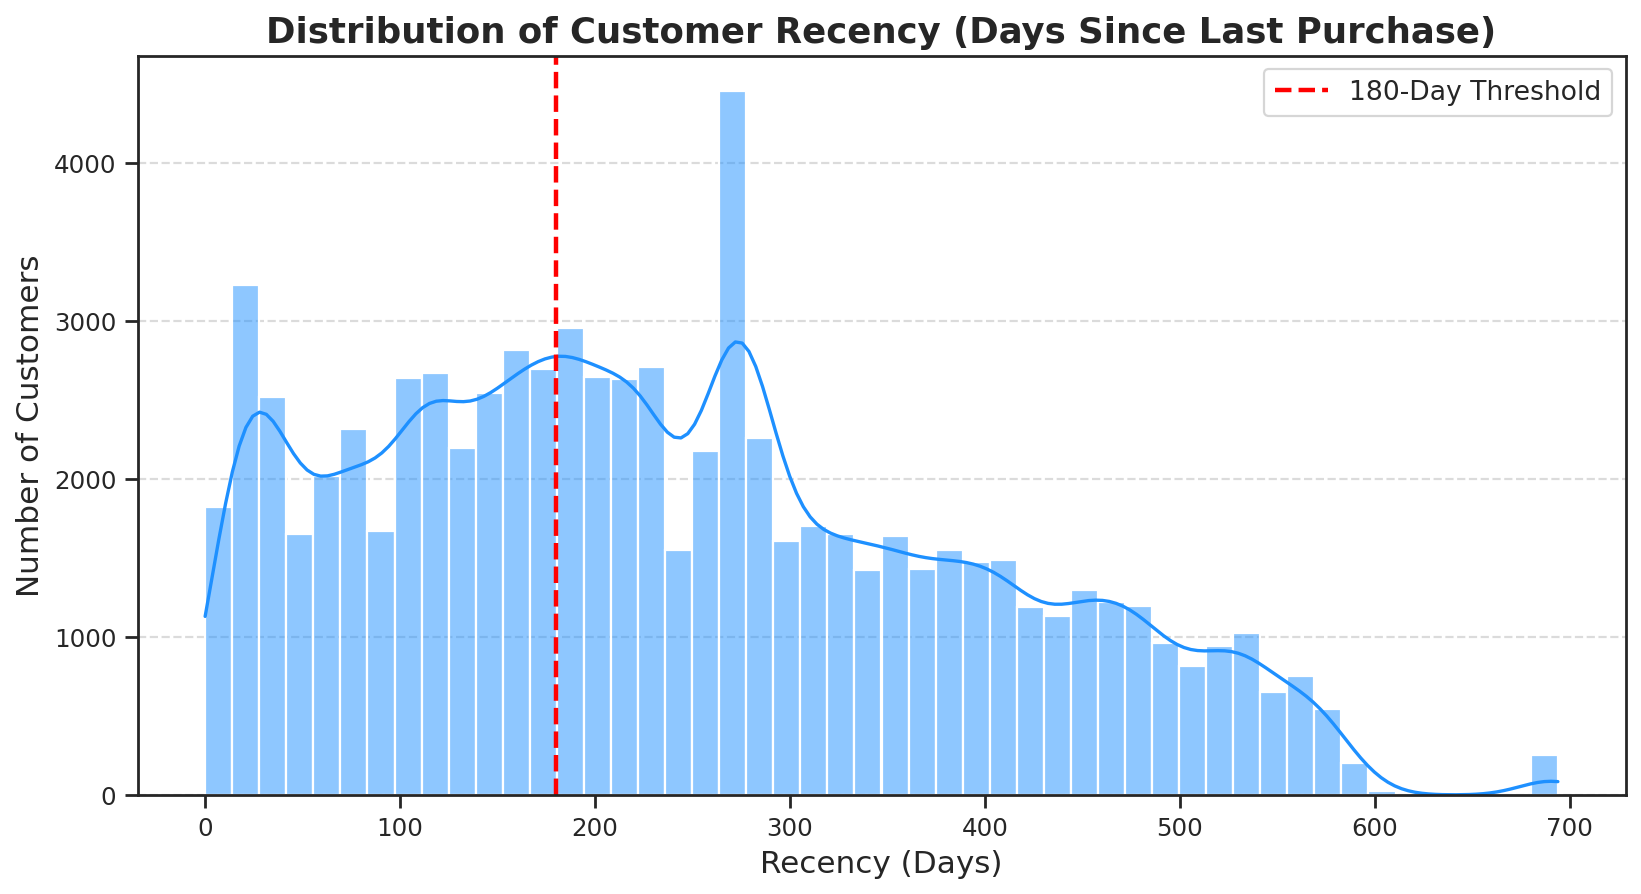

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(customer_last_purchase['recency_days'], bins=50, kde=True, color='dodgerblue')

# Add vertical line at 180 days
plt.axvline(x=180, color='red', linestyle='--', linewidth=2, label='180-Day Threshold')

plt.title('Distribution of Customer Recency (Days Since Last Purchase)', fontsize=16, fontweight='bold')
plt.xlabel('Recency (Days)', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

To capture user activity patterns, we calculated recency days, which is defined as the number of days between the customer's
most recent purchase and the latest order date in the dataset. This allowed us to segment customers based on their recent engagement. Based on the distribution analysis, we observed that a significant portion of customers had not purchased in over 180
days. 

In [ ]:
customer_last_purchase['churn'] = customer_last_purchase['recency_days'].apply(lambda x: 1 if x > 180 else 0)
customer_last_purchase

customer_unique_id  last_purchase_date  recency_days  \
0      0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27           110   
1      0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27           113   
2      0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03           536   
3      0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41           320   
4      0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42           287   
...                                 ...                 ...           ...   
78367  fffcf5a5ff07b0908bd4e2dbc735a684 2017-06-08 21:00:36           446   
78368  fffea47cd6d3cc0a88bd621562a9d061 2017-12-10 20:07:56           261   
78369  ffff371b4d645b6ecea244b27531430a 2017-02-07 15:49:16           567   
78370  ffff5962728ec6157033ef9805bacc48 2018-05-02 15:17:41           118   
78371  ffffd2657e2aad2907e67c3e9daecbeb 2017-05-02 20:18:45           483   

       churn  
0          0  
1          0  
2          1  
3          1  
4          1  
...      ...  
78367      1  
78368      1  
78369      1  
78370      0  
78371      1  

[78372 rows x 4 columns]

Given the common 6-month benchmark in many business lifecycles, we engineered a
binary target variable churn, where:
- churn = 1 indicates the customer had no purchases in the last 180 days (churned),
- churn = 0 indicates an active customer.

In [ ]:
customer_last_purchase['churn'].value_counts()

churn
1    47569
0    30803
Name: count, dtype: int64

The target variable is moderately imbalanced, with 47,569 (61%) of customers labeled as
‘churned’, and 30,803 (39%) customers labelled as ‘not churned’. Therefore, the class
distribution will be taken into account during model evaluation to avoid biased performance
metrics.

## 3.2 Creating features

In [ ]:

payment_counts = df.groupby(['customer_unique_id', 'payment_type']).size().reset_index(name='count')

# most common payment type per customer
most_common_payment_type = payment_counts.sort_values(['customer_unique_id', 'count'], ascending=[True, False]).drop_duplicates('customer_unique_id')


most_common_payment_type = most_common_payment_type[['customer_unique_id', 'payment_type']]
most_common_payment_type.columns = ['customer_unique_id', 'most_common_payment_type']
most_common_payment_type.head()

customer_unique_id most_common_payment_type
0  0000366f3b9a7992bf8c76cfdf3221e2              credit_card
1  0000b849f77a49e4a4ce2b2a4ca5be3f              credit_card
2  0000f46a3911fa3c0805444483337064              credit_card
3  0000f6ccb0745a6a4b88665a16c9f078              credit_card
4  0004aac84e0df4da2b147fca70cf8255              credit_card

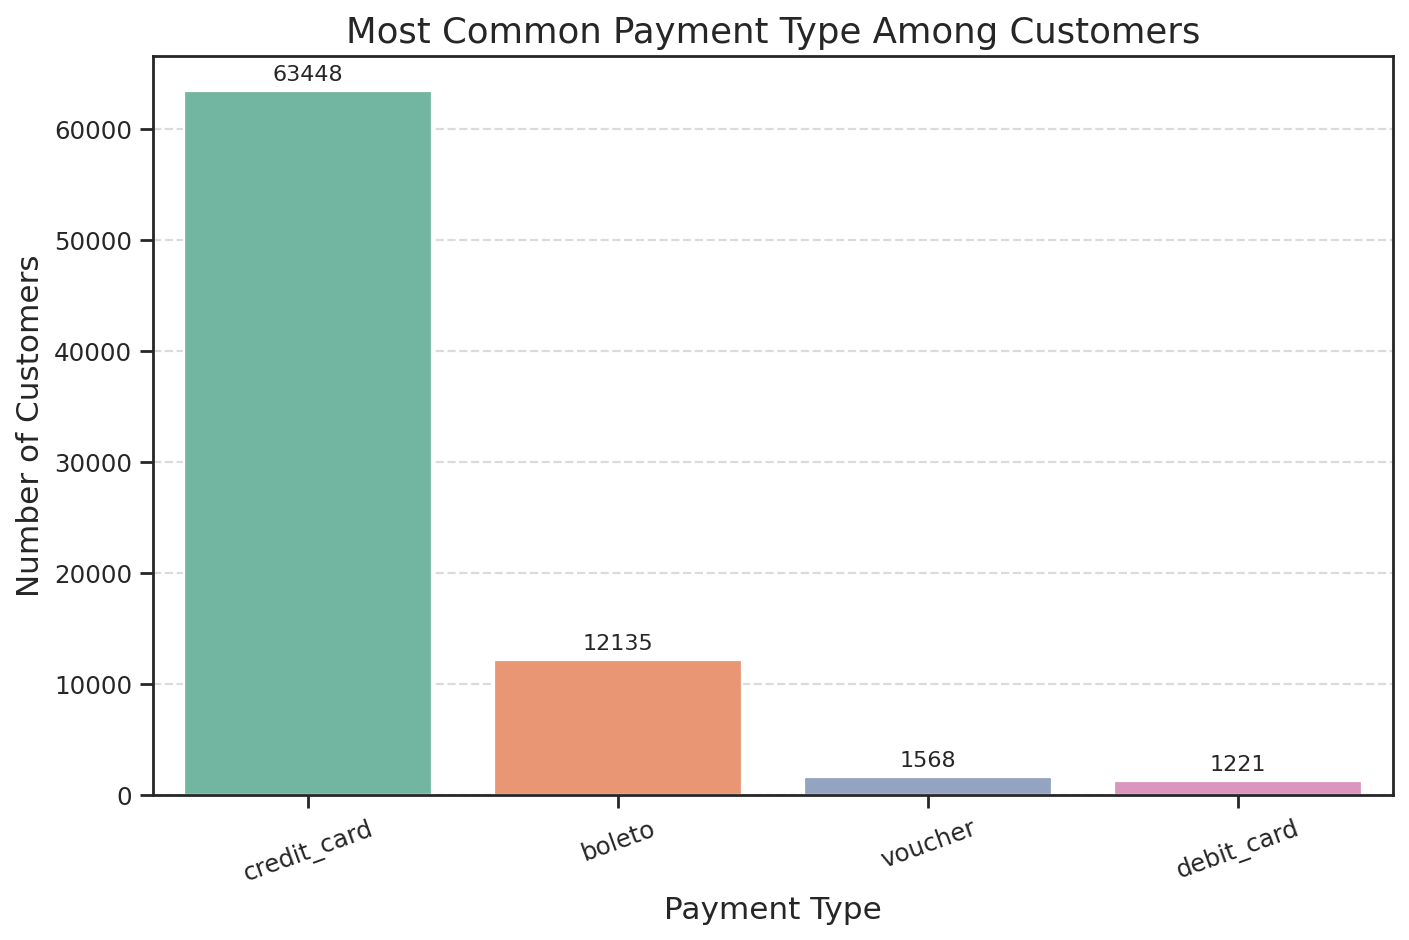

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=most_common_payment_type, x='most_common_payment_type', order=most_common_payment_type['most_common_payment_type'].value_counts().index, palette='Set2')


for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10)

plt.title('Most Common Payment Type Among Customers', fontsize=16)
plt.xlabel('Payment Type', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=20)
plt.show()

In [ ]:

def categorize_delivery_performance(days):
    if days <= 0:
        return 'early_or_on_time'
    elif 1 <= days <= 5:
        return 'slightly_late'
    elif days >=6 :
        return 'very_late'

df['delivery_perf_category'] = df['delivery_performance'].apply(categorize_delivery_performance)


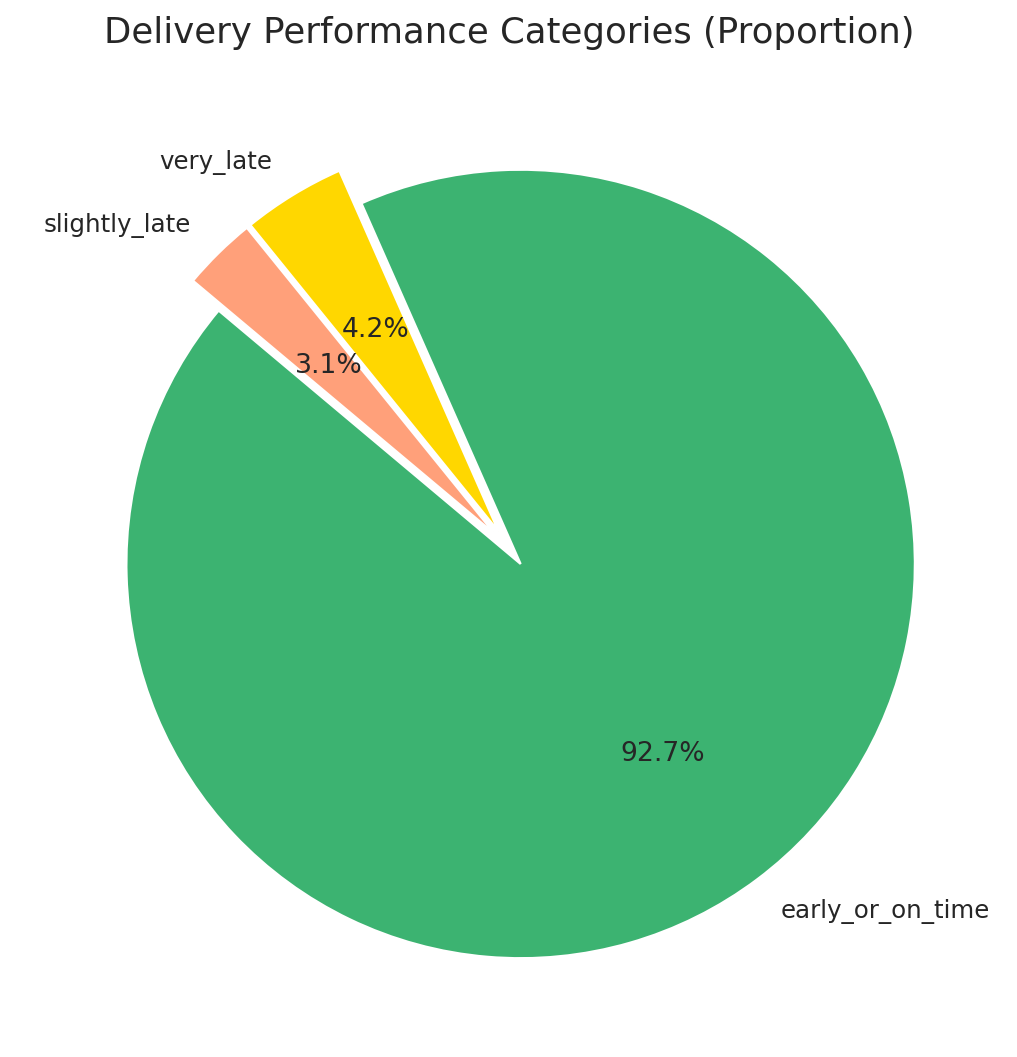

In [ ]:
delivery_perf_counts = df['delivery_perf_category'].value_counts()


plt.figure(figsize=(8,8))
plt.pie(
    delivery_perf_counts,
    labels=delivery_perf_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['mediumseagreen', 'gold', 'lightsalmon', 'lightcoral'],
    explode=(0.05, 0.05, 0.05)
)

plt.title('Delivery Performance Categories (Proportion)', fontsize=16)
plt.show()

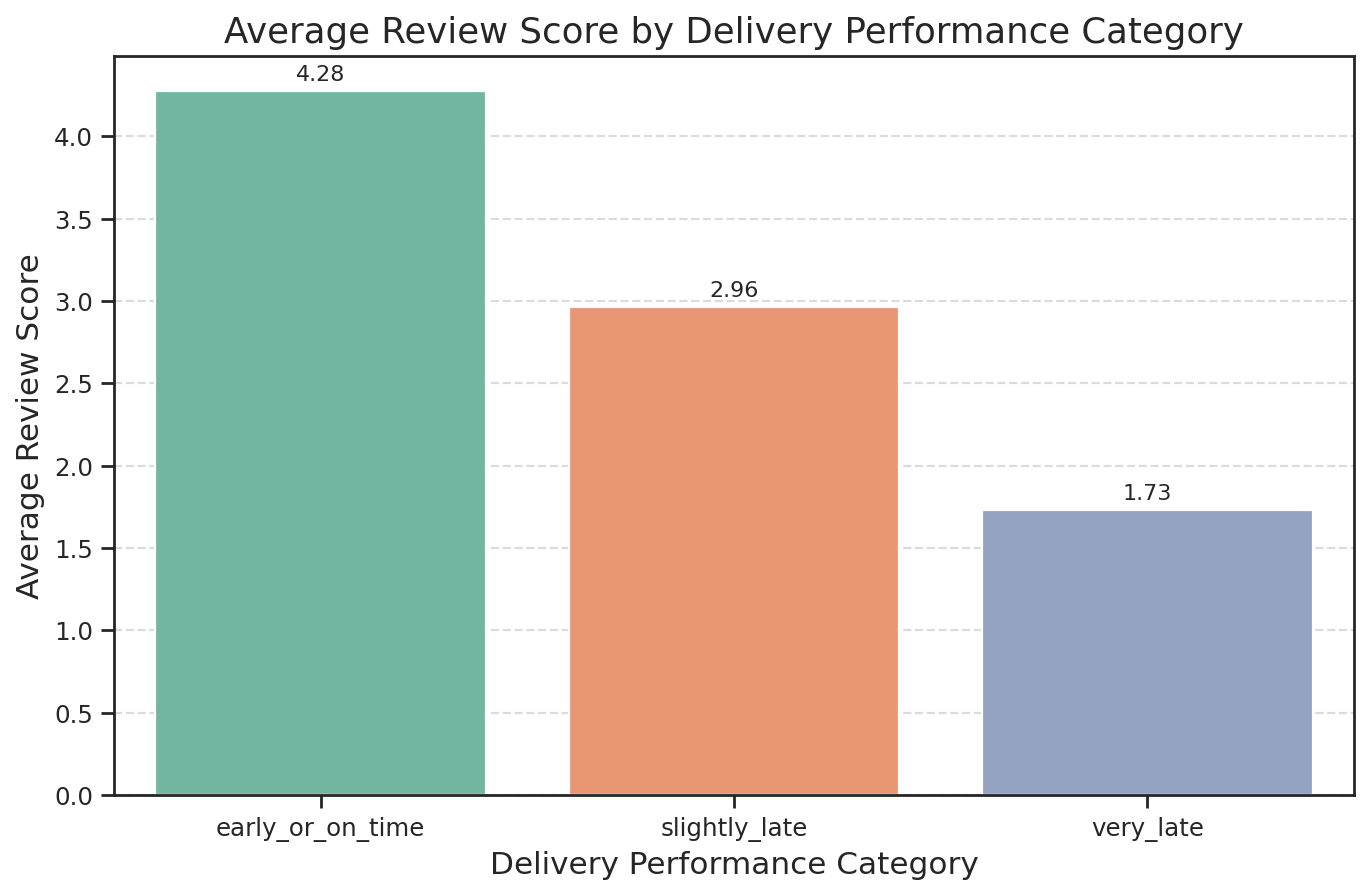

In [ ]:

avg_review_by_category = df.groupby('delivery_perf_category')['review_score'].mean().reset_index()


category_order = ['early_or_on_time', 'slightly_late', 'very_late']

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=avg_review_by_category,
    x='delivery_perf_category',
    y='review_score',
    palette='Set2',
    order=category_order
)


for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=10)

plt.title('Average Review Score by Delivery Performance Category', fontsize=16)
plt.xlabel('Delivery Performance Category', fontsize=14)
plt.ylabel('Average Review Score', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
review_count = df.groupby('customer_unique_id')['review_id'].count().reset_index()
review_count.columns = ['customer_unique_id', 'num_reviews']
review_count.sort_values('num_reviews', ascending=False).head()

customer_unique_id  num_reviews
47192  9a736b248f67d166d2fbb006bcb877c3           33
26485  569aa12b73b5f7edeaa6f2a01603e381           26
44095  90807fdb59eec2152bc977feeb6e47e7           24
8970   1d2435aa3b858d45c707c9fc25e18779           24
76474  f9ae226291893fda10af7965268fb7f6           23

In [ ]:
# top 5 states by unique customers
state_counts = customer_df.groupby('customer_state')['customer_id'].nunique().sort_values(ascending=False)

top5_states = state_counts.head(5).index.tolist()

cust_state = customer_df[['customer_unique_id','customer_state']].drop_duplicates()

# 1 if in top5, 0 otherwise
cust_state['is_top5_state'] = cust_state['customer_state'].isin(top5_states).astype(int)


In [ ]:


features = df.groupby('customer_unique_id').agg(
    num_orders=('order_id', 'nunique'),
    total_spent=('payment_value', 'sum'),
    avg_freight_value=('total_freight_value', 'mean'),
    avg_product_weight=('total_product_weight', 'mean'),
    avg_payment=('payment_value', 'mean'),
    avg_approval_seconds=('approval_seconds', 'mean'),
    avg_delivery_days=('delivery_days', 'mean'),
    avg_delivery_performance=('delivery_performance', 'mean'),
    avg_review_score=('review_score', 'mean'),
    avg_payment_installments=('payment_installments', 'mean')
).reset_index()
features = features.merge(cust_state[['customer_unique_id','is_top5_state']], on='customer_unique_id')
features = features.merge(most_common_payment_type, on='customer_unique_id')
features = features.merge(review_count, on='customer_unique_id', how='left')
features

customer_unique_id  num_orders  total_spent  \
0      0000366f3b9a7992bf8c76cfdf3221e2           1       141.90   
1      0000b849f77a49e4a4ce2b2a4ca5be3f           1        27.19   
2      0000f46a3911fa3c0805444483337064           1        86.22   
3      0000f6ccb0745a6a4b88665a16c9f078           1        43.62   
4      0004aac84e0df4da2b147fca70cf8255           1       196.89   
...                                 ...         ...          ...   
78406  fffcf5a5ff07b0908bd4e2dbc735a684           1      2067.42   
78407  fffea47cd6d3cc0a88bd621562a9d061           1        84.58   
78408  ffff371b4d645b6ecea244b27531430a           1       112.46   
78409  ffff5962728ec6157033ef9805bacc48           1       133.69   
78410  ffffd2657e2aad2907e67c3e9daecbeb           1        71.56   

       avg_freight_value  avg_product_weight  avg_payment  \
0                  12.00              1500.0       141.90   
1                   8.29               375.0        27.19   
2                  17.22              1500.0        86.22   
3                  17.63               150.0        43.62   
4                  16.89              6050.0       196.89   
...                  ...                 ...          ...   
78406             497.42             60000.0      2067.42   
78407              19.69              1720.0        84.58   
78408              22.56               600.0       112.46   
78409              18.69               444.0       133.69   
78410              14.57               400.0        71.56   

       avg_approval_seconds  avg_delivery_days  avg_delivery_performance  \
0                     891.0                5.0                      -5.0   
1                   26057.0                2.0                      -5.0   
2                       0.0               25.0                      -2.0   
3                    1176.0               19.0                     -12.0   
4                    1270.0               12.0                      -8.0   
...                     ...                ...                       ...   
78406                 880.0               27.0                     -27.0   
78407                 504.0               29.0                      -3.0   
78408                 808.0               14.0                     -30.0   
78409                2466.0               11.0                     -14.0   
78410               68188.0                7.0                     -16.0   

       avg_review_score  avg_payment_installments  is_top5_state  \
0                   5.0                       8.0              1   
1                   4.0                       1.0              1   
2                   3.0                       8.0              0   
3                   4.0                       4.0              0   
4                   5.0                       6.0              1   
...                 ...                       ...            ...   
78406               5.0                      10.0              0   
78407               4.0                       1.0              0   
78408               5.0                       1.0              0   
78409               5.0                       5.0              0   
78410               5.0                       4.0              1   

      most_common_payment_type  num_reviews  
0                  credit_card            1  
1                  credit_card            1  
2                  credit_card            1  
3                  credit_card            1  
4                  credit_card            1  
...                        ...          ...  
78406              credit_card            1  
78407              credit_card            1  
78408              credit_card            1  
78409              credit_card            1  
78410              credit_card            1  

[78411 rows x 14 columns]

To better explore the association between customer churn and behavioral patterns, we engineered a comprehensive set of features derived from exploratory data analysis (EDA). These features aim to capture customer characteristics relevant to churn prediction and are grouped into three business-focused categories for improved interpretability:

---

#### i. Customer Profile Features

| Feature                     | Description                                                                 | Justification & Potential Effect on Churn                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| `is_top5_state`             | Indicates whether the customer resides in one of the top 5 states by volume | Customers from key regions may benefit from better logistics and service quality, reducing churn risk     |
| `avg_payment_installments` | Average number of installments per purchase                                 | High installment usage may suggest financial caution, increasing churn likelihood if value perception drops |
| `most_common_payment_type` | Most frequently used payment method (credit card, boleto, etc.)             | Payment types reflect trust and engagement. Boleto users may indicate lower platform affinity              |
| `avg_review_score`         | Average product review score submitted by the customer                      | Higher scores reflect satisfaction; lower scores signal dissatisfaction and higher churn risk              |
| `num_reviews`              | Number of product reviews submitted                                          | More reviews suggest stronger engagement and emotional investment, typically reducing churn probability    |

---

#### ii. Purchase Behavior Features

| Feature         | Description                                           | Justification & Potential Effect on Churn                                                                 |
|------------------|-------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| `num_orders`     | Total number of distinct purchases                    | Frequent buyers show loyalty and are less likely to churn                                                  |
| `total_spent`    | Total spending by the customer                        | High spenders are more invested financially and emotionally, decreasing churn risk                         |
| `avg_payment`    | Average order value (AOV)                             | Higher AOV implies greater confidence or interest in premium products, which correlates with retention     |

---

#### iii. Order Detail Features

| Feature               | Description                                                            | Justification & Potential Effect on Churn                                                                |
|------------------------|------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|
| `avg_freight_value`    | Average shipping cost per order                                        | High shipping costs reduce perceived value, especially among price-sensitive users                        |
| `avg_product_weight`   | Average weight of products purchased                                   | May reflect product type (e.g., heavy items like furniture); could influence delivery time and churn      |
| `avg_approval_seconds` | Average time (in seconds) taken to approve orders                      | Faster approvals improve the purchase experience; delays may discourage future purchases                  |
| `avg_delivery_days`    | Average number of days between order and delivery                      | Longer delivery durations negatively impact satisfaction and trust                                        |
| `avg_delivery_performance` | Average difference between expected and actual delivery dates       | Consistent delays reduce customer trust and satisfaction, increasing churn risk                           |

---


In [ ]:
# Merge features with churn target
full_data = features.merge(customer_last_purchase[['customer_unique_id', 'churn']], on='customer_unique_id')
full_data

customer_unique_id  num_orders  total_spent  \
0      0000366f3b9a7992bf8c76cfdf3221e2           1       141.90   
1      0000b849f77a49e4a4ce2b2a4ca5be3f           1        27.19   
2      0000f46a3911fa3c0805444483337064           1        86.22   
3      0000f6ccb0745a6a4b88665a16c9f078           1        43.62   
4      0004aac84e0df4da2b147fca70cf8255           1       196.89   
...                                 ...         ...          ...   
78406  fffcf5a5ff07b0908bd4e2dbc735a684           1      2067.42   
78407  fffea47cd6d3cc0a88bd621562a9d061           1        84.58   
78408  ffff371b4d645b6ecea244b27531430a           1       112.46   
78409  ffff5962728ec6157033ef9805bacc48           1       133.69   
78410  ffffd2657e2aad2907e67c3e9daecbeb           1        71.56   

       avg_freight_value  avg_product_weight  avg_payment  \
0                  12.00              1500.0       141.90   
1                   8.29               375.0        27.19   
2                  17.22              1500.0        86.22   
3                  17.63               150.0        43.62   
4                  16.89              6050.0       196.89   
...                  ...                 ...          ...   
78406             497.42             60000.0      2067.42   
78407              19.69              1720.0        84.58   
78408              22.56               600.0       112.46   
78409              18.69               444.0       133.69   
78410              14.57               400.0        71.56   

       avg_approval_seconds  avg_delivery_days  avg_delivery_performance  \
0                     891.0                5.0                      -5.0   
1                   26057.0                2.0                      -5.0   
2                       0.0               25.0                      -2.0   
3                    1176.0               19.0                     -12.0   
4                    1270.0               12.0                      -8.0   
...                     ...                ...                       ...   
78406                 880.0               27.0                     -27.0   
78407                 504.0               29.0                      -3.0   
78408                 808.0               14.0                     -30.0   
78409                2466.0               11.0                     -14.0   
78410               68188.0                7.0                     -16.0   

       avg_review_score  avg_payment_installments  is_top5_state  \
0                   5.0                       8.0              1   
1                   4.0                       1.0              1   
2                   3.0                       8.0              0   
3                   4.0                       4.0              0   
4                   5.0                       6.0              1   
...                 ...                       ...            ...   
78406               5.0                      10.0              0   
78407               4.0                       1.0              0   
78408               5.0                       1.0              0   
78409               5.0                       5.0              0   
78410               5.0                       4.0              1   

      most_common_payment_type  num_reviews  churn  
0                  credit_card            1      0  
1                  credit_card            1      0  
2                  credit_card            1      1  
3                  credit_card            1      1  
4                  credit_card            1      1  
...                        ...          ...    ...  
78406              credit_card            1      1  
78407              credit_card            1      1  
78408              credit_card            1      1  
78409              credit_card            1      0  
78410              credit_card            1      1  

[78411 rows x 15 columns]

## 3.3 Missing value - imputation

In [ ]:
full_data.isna().sum()

customer_unique_id            0
num_orders                    0
total_spent                   0
avg_freight_value             0
avg_product_weight            0
avg_payment                   0
avg_approval_seconds          0
avg_delivery_days             0
avg_delivery_performance      0
avg_review_score            518
avg_payment_installments      0
is_top5_state                 0
most_common_payment_type      0
num_reviews                   0
churn                         0
dtype: int64

In [ ]:

median_score = full_data['avg_review_score'].median()
full_data['avg_review_score'] = full_data['avg_review_score'].fillna(median_score)
median_score

5.0

In [ ]:
full_data.isna().sum()

customer_unique_id          0
num_orders                  0
total_spent                 0
avg_freight_value           0
avg_product_weight          0
avg_payment                 0
avg_approval_seconds        0
avg_delivery_days           0
avg_delivery_performance    0
avg_review_score            0
avg_payment_installments    0
is_top5_state               0
most_common_payment_type    0
num_reviews                 0
churn                       0
dtype: int64

The missing entries in the `avg_review_score` feature likely correspond to customers who placed orders but **did not leave any product reviews**.

To retain these customers in the dataset and avoid discarding valuable observations, we **imputed the missing values using the median review score** across all customers. The median was chosen over the mean to reduce the influence of outliers and better reflect the central tendency of review behavior.


In [ ]:
df_before = full_data.copy()

In [ ]:
#save data before feature engineering for comparison purposes
x_before = df_before.drop(columns=['customer_unique_id', 'churn'])
y_before = df_before['churn']
X_encoded_before = pd.get_dummies(x_before, drop_first=True)
X_encoded_before

num_orders  total_spent  avg_freight_value  avg_product_weight  \
0               1       141.90              12.00              1500.0   
1               1        27.19               8.29               375.0   
2               1        86.22              17.22              1500.0   
3               1        43.62              17.63               150.0   
4               1       196.89              16.89              6050.0   
...           ...          ...                ...                 ...   
78406           1      2067.42             497.42             60000.0   
78407           1        84.58              19.69              1720.0   
78408           1       112.46              22.56               600.0   
78409           1       133.69              18.69               444.0   
78410           1        71.56              14.57               400.0   

       avg_payment  avg_approval_seconds  avg_delivery_days  \
0           141.90                 891.0                5.0   
1            27.19               26057.0                2.0   
2            86.22                   0.0               25.0   
3            43.62                1176.0               19.0   
4           196.89                1270.0               12.0   
...            ...                   ...                ...   
78406      2067.42                 880.0               27.0   
78407        84.58                 504.0               29.0   
78408       112.46                 808.0               14.0   
78409       133.69                2466.0               11.0   
78410        71.56               68188.0                7.0   

       avg_delivery_performance  avg_review_score  avg_payment_installments  \
0                          -5.0               5.0                       8.0   
1                          -5.0               4.0                       1.0   
2                          -2.0               3.0                       8.0   
3                         -12.0               4.0                       4.0   
4                          -8.0               5.0                       6.0   
...                         ...               ...                       ...   
78406                     -27.0               5.0                      10.0   
78407                      -3.0               4.0                       1.0   
78408                     -30.0               5.0                       1.0   
78409                     -14.0               5.0                       5.0   
78410                     -16.0               5.0                       4.0   

       is_top5_state  num_reviews  most_common_payment_type_credit_card  \
0                  1            1                                  True   
1                  1            1                                  True   
2                  0            1                                  True   
3                  0            1                                  True   
4                  1            1                                  True   
...              ...          ...                                   ...   
78406              0            1                                  True   
78407              0            1                                  True   
78408              0            1                                  True   
78409              0            1                                  True   
78410              1            1                                  True   

       most_common_payment_type_debit_card  most_common_payment_type_voucher  
0                                    False                             False  
1                                    False                             False  
2                                    False                             False  
3                                    False                             False  
4                                    False                             False  
...                                    ...       

## 3.4 Outliers

Skewness of num_orders: 11.530885282807866
Standard deviation of num_orders: 0.19907970005882167


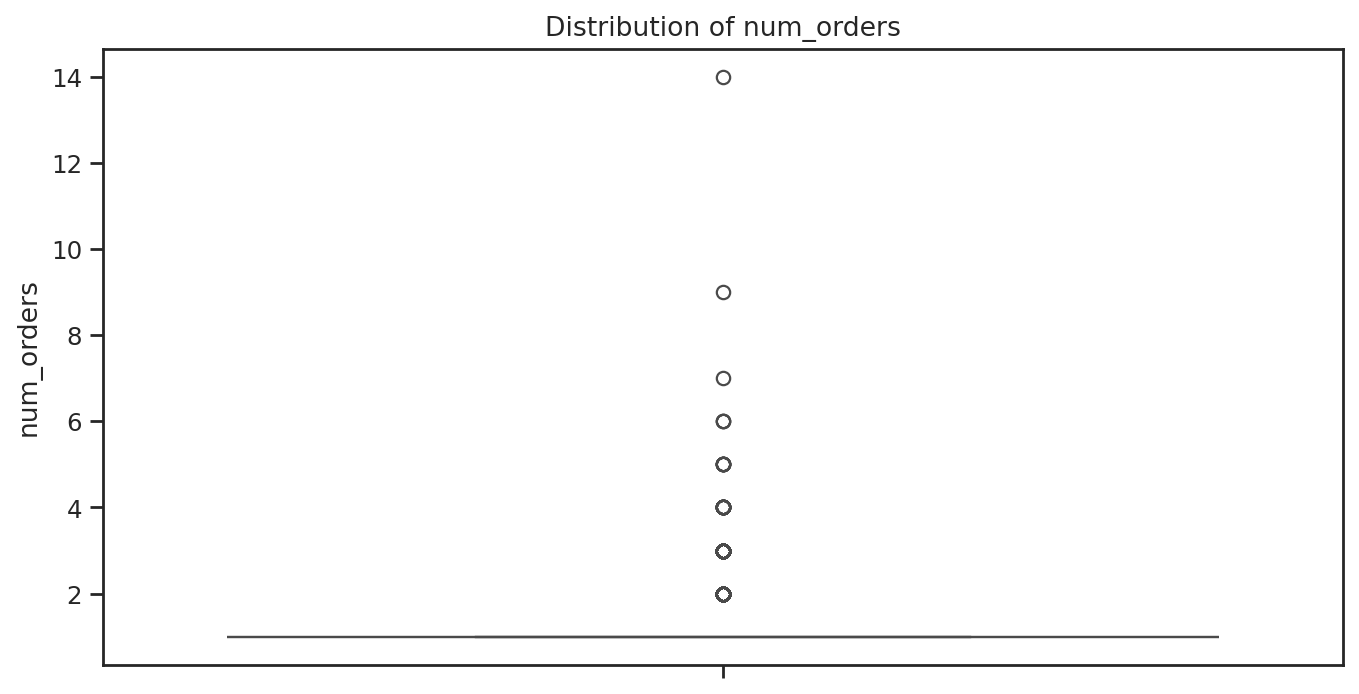

Skewness of total_spent: 9.211497072165244
Standard deviation of total_spent: 230.05706803783323


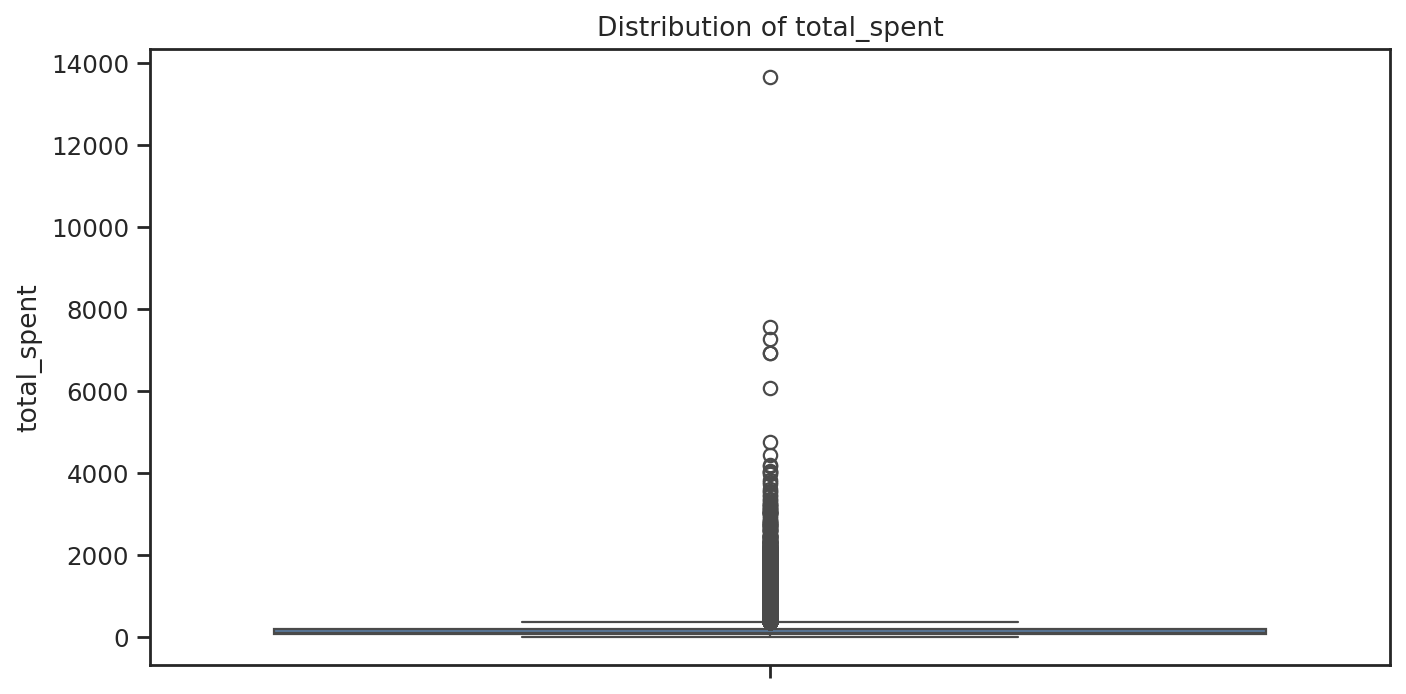

Skewness of avg_freight_value: 13.248386222129827
Standard deviation of avg_freight_value: 21.877892671644013


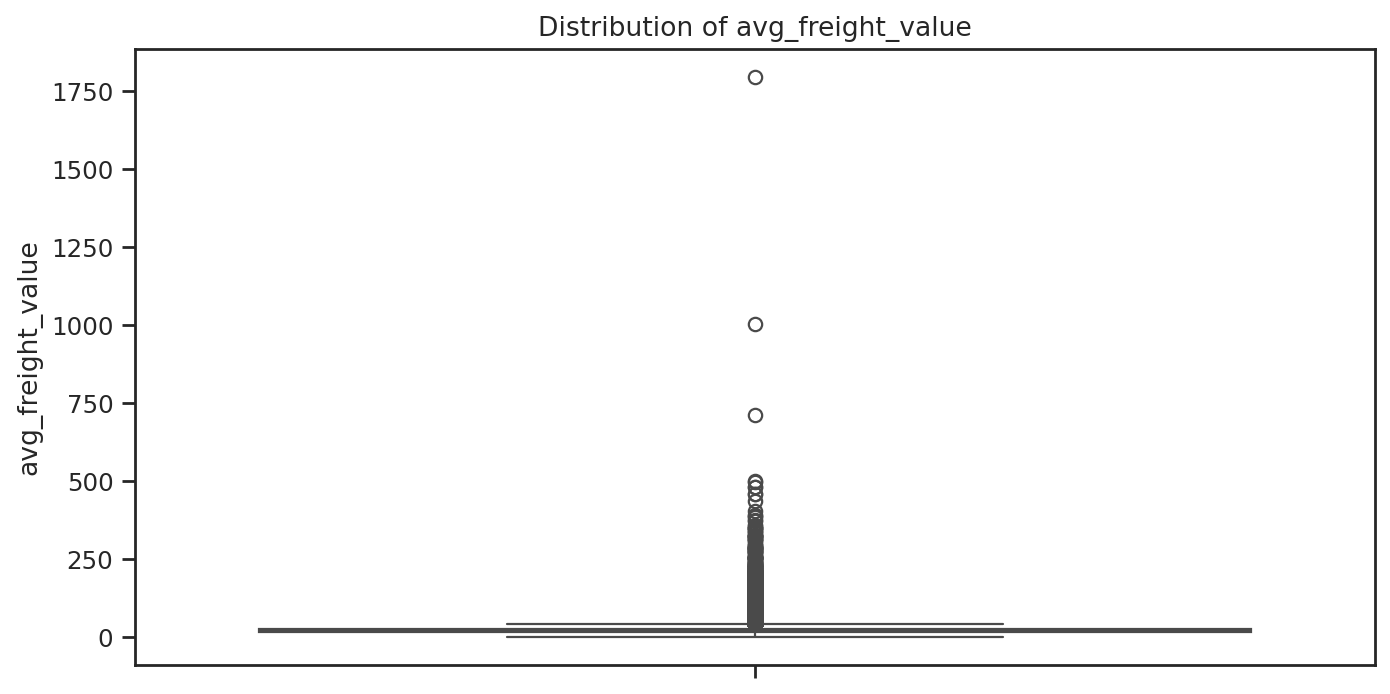

Skewness of avg_product_weight: 6.696996718949696
Standard deviation of avg_product_weight: 4907.810150401258


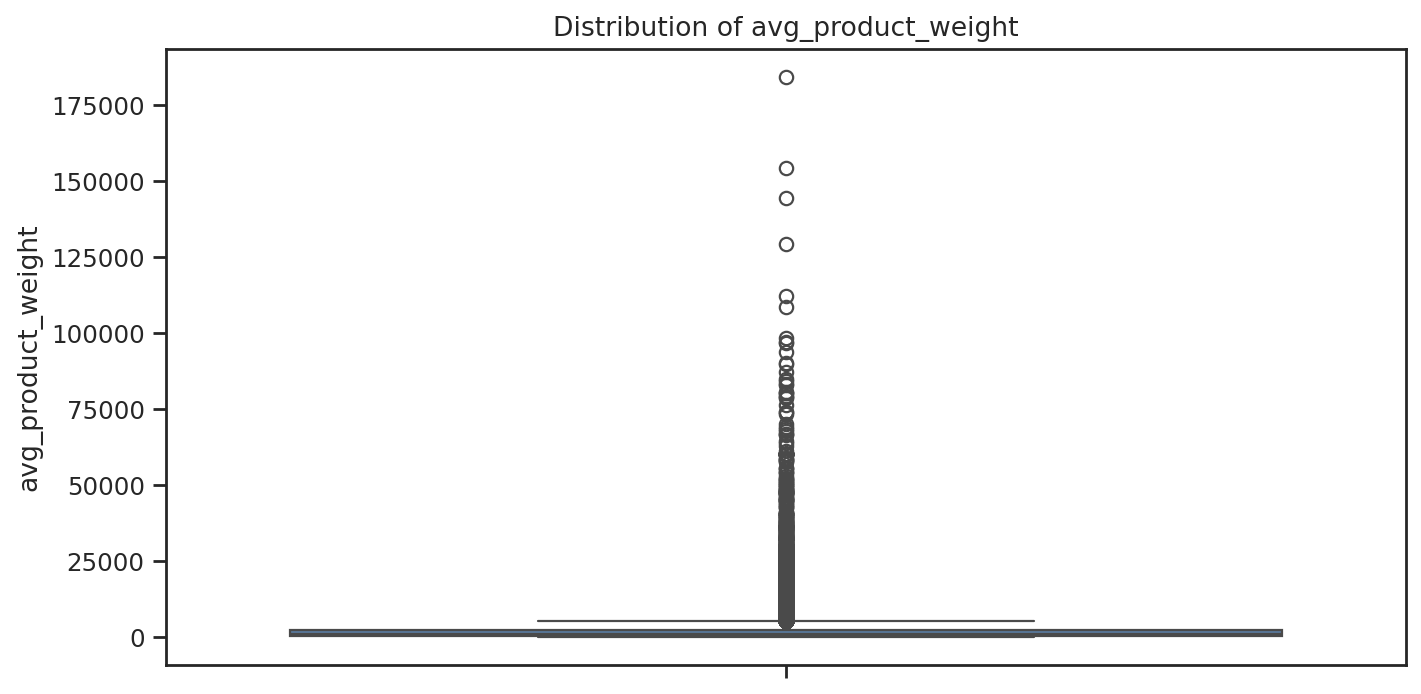

Skewness of avg_payment: 9.58509353978999
Standard deviation of avg_payment: 219.2862124700137


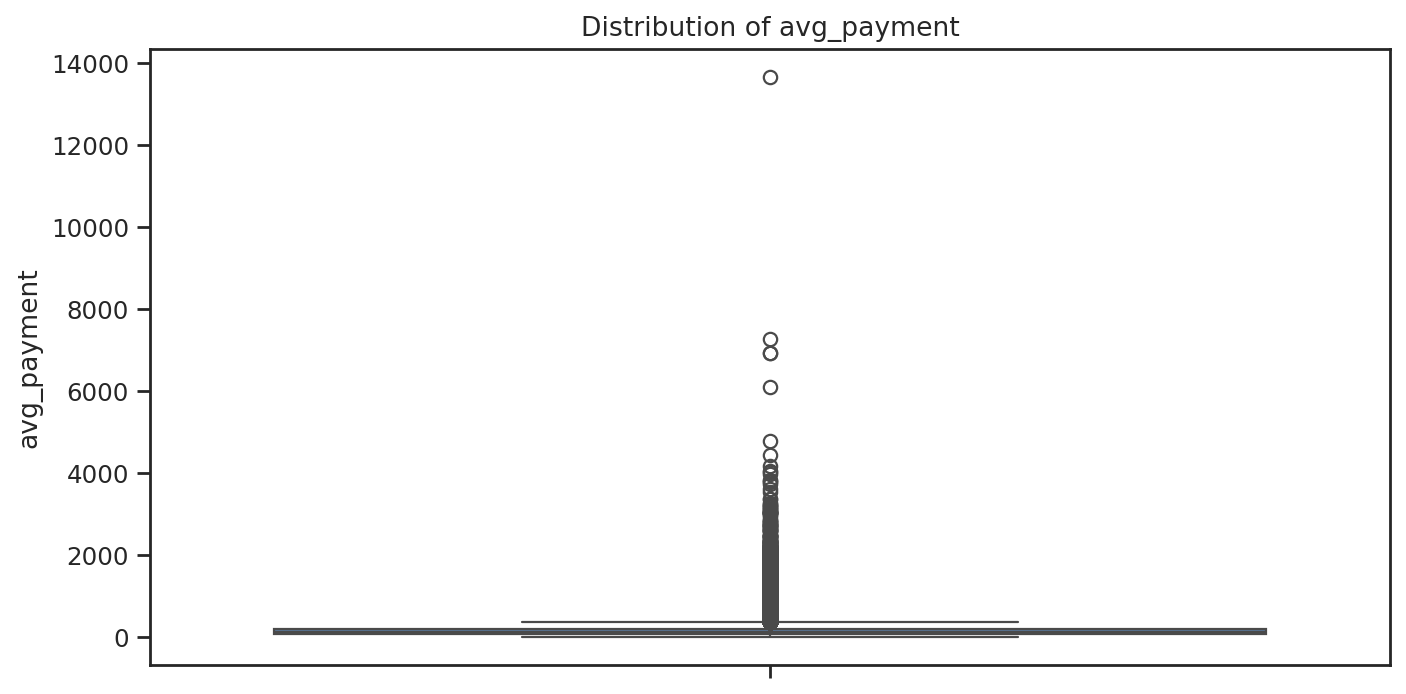

Skewness of avg_approval_seconds: 5.587134132244256
Standard deviation of avg_approval_seconds: 64156.81874048147


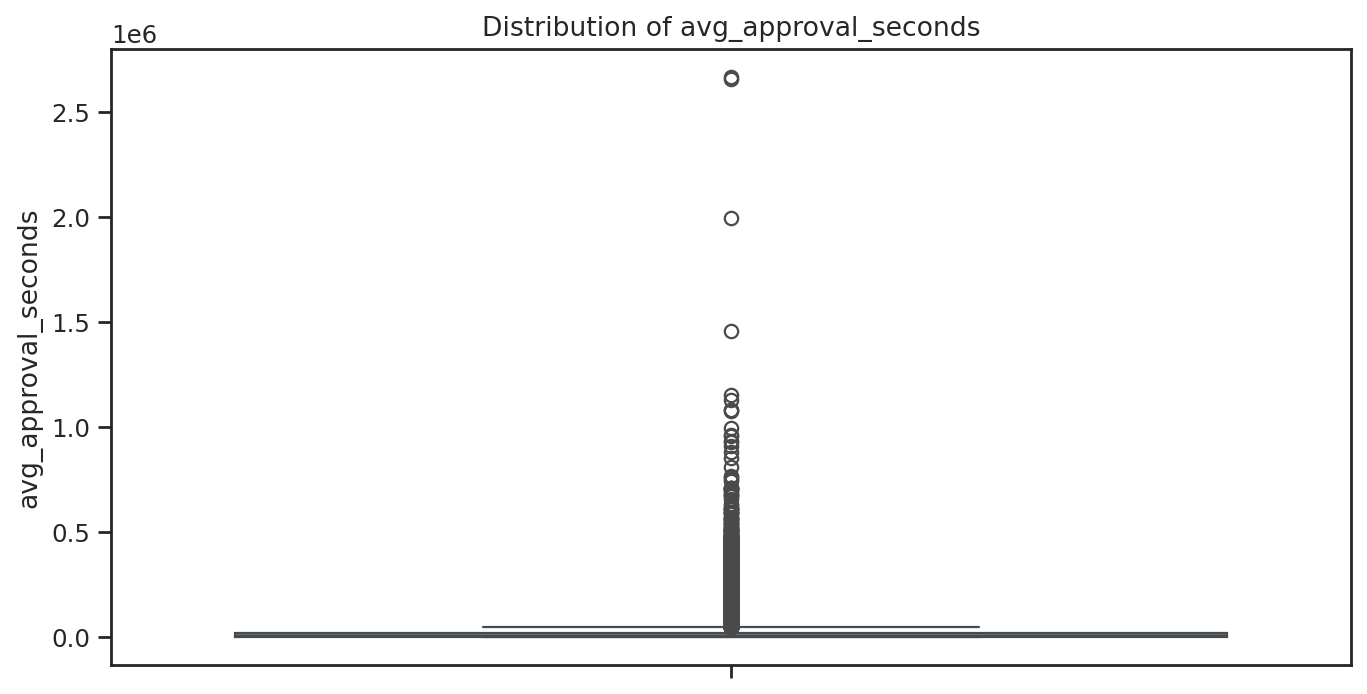

Skewness of avg_delivery_days: 3.9140256212084954
Standard deviation of avg_delivery_days: 9.738917343036588


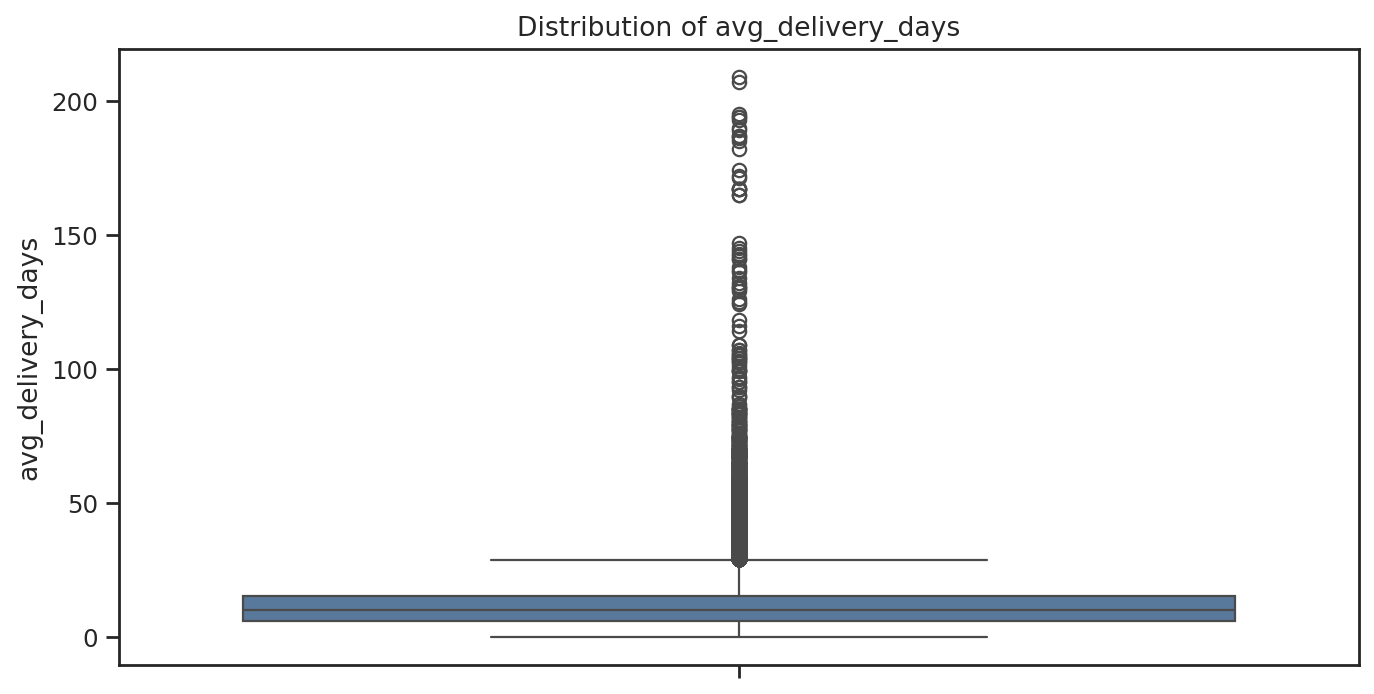

Skewness of avg_delivery_performance: 2.1627684745478835
Standard deviation of avg_delivery_performance: 10.32875362333202


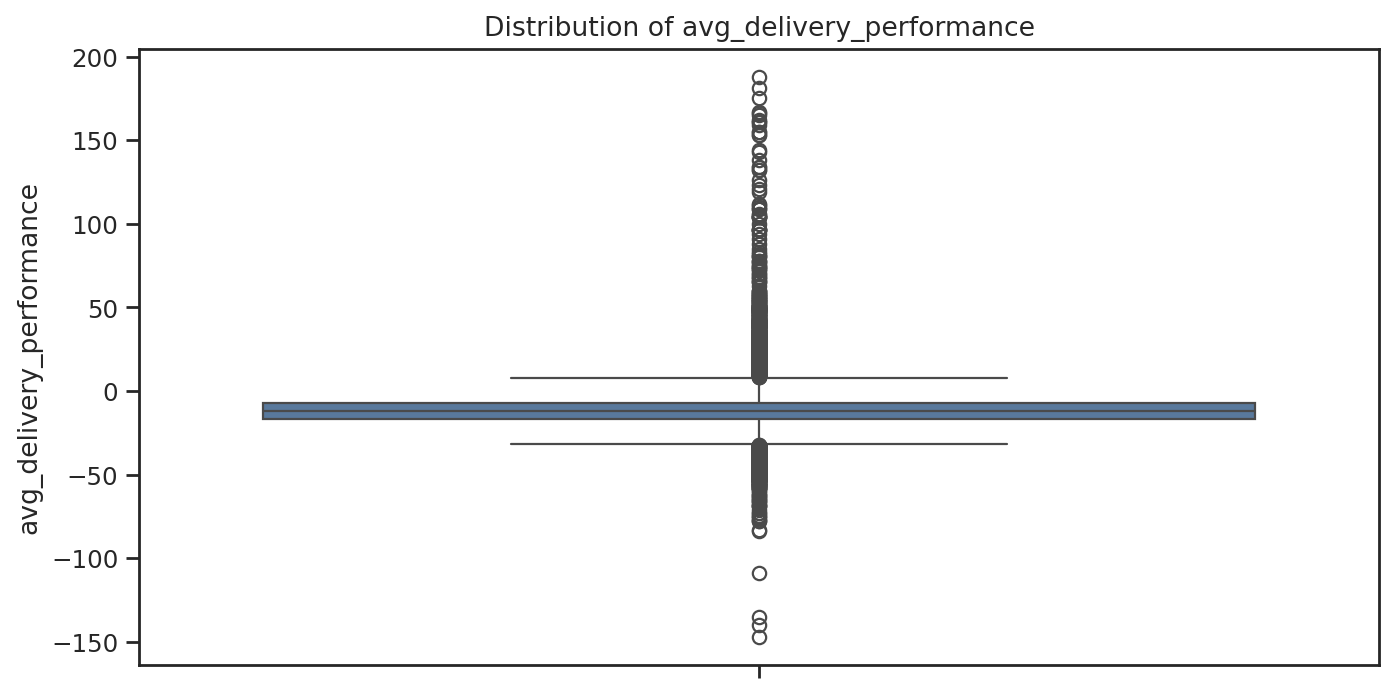

Skewness of avg_review_score: -1.437612283692472
Standard deviation of avg_review_score: 1.296889002360621


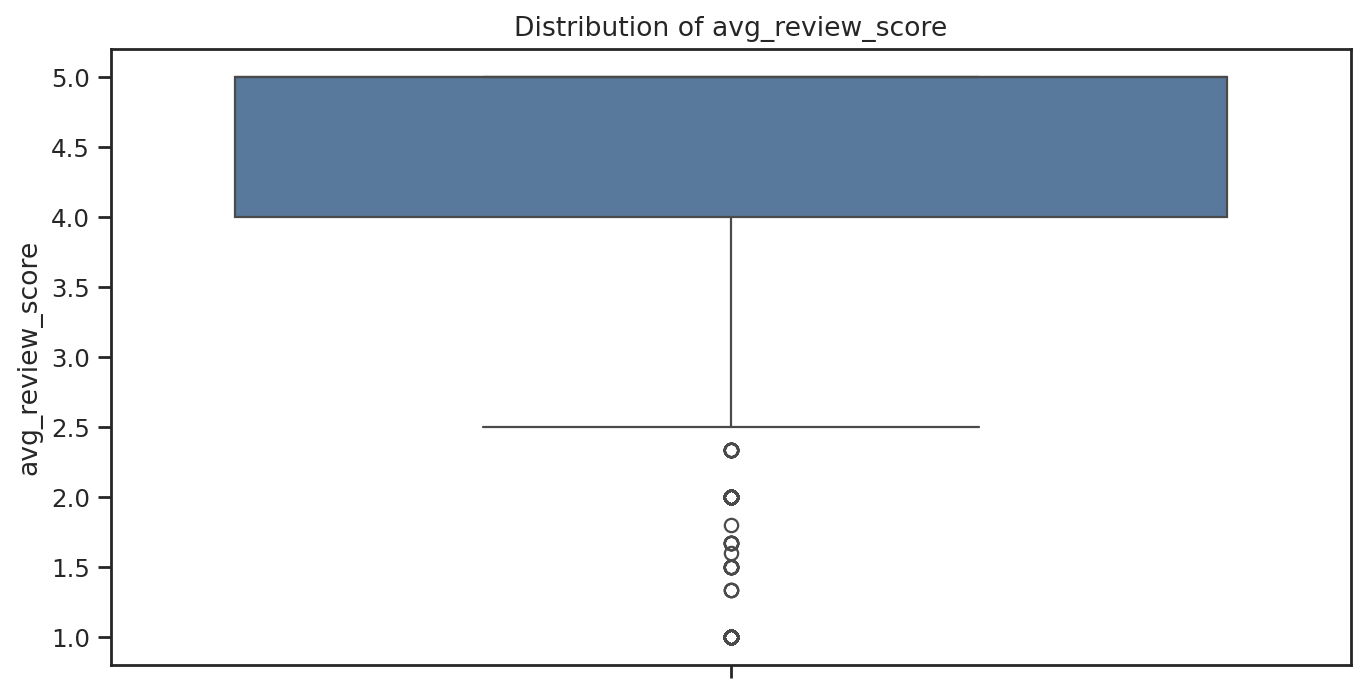

Skewness of avg_payment_installments: 1.5387993496214332
Standard deviation of avg_payment_installments: 2.7179931730862514


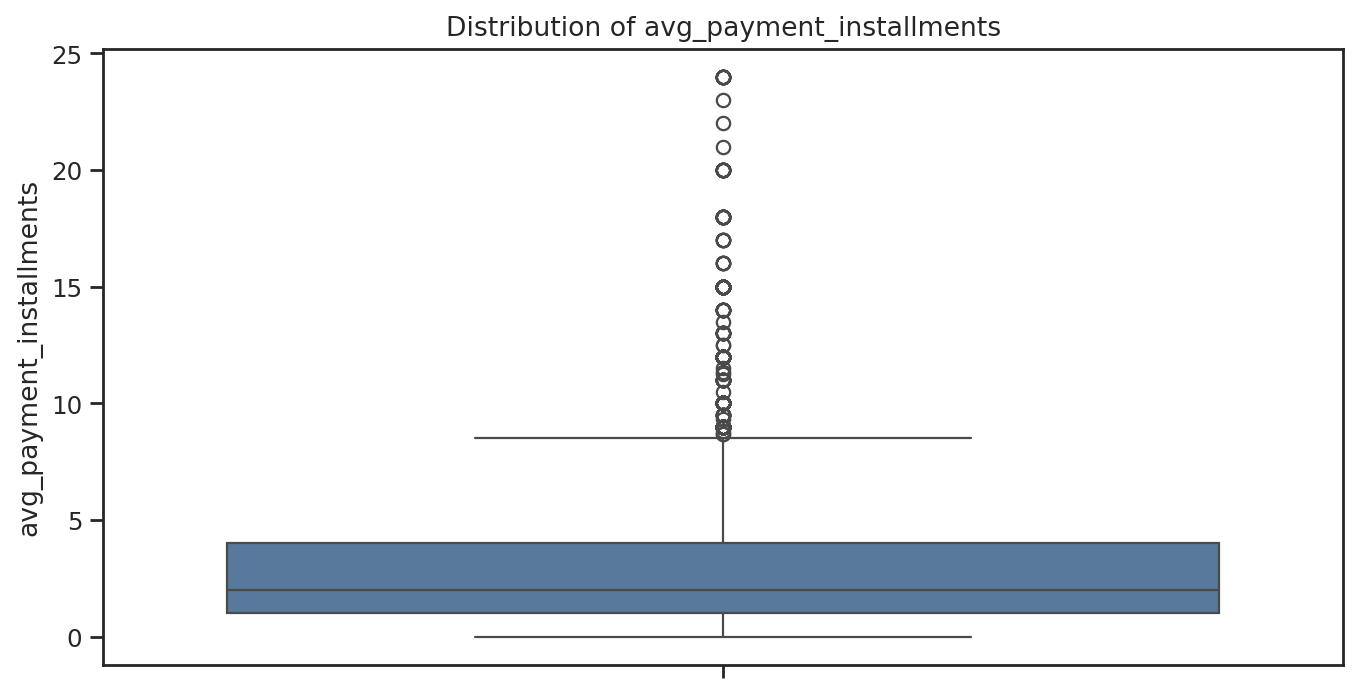

Skewness of is_top5_state: -1.2888129113481674
Standard deviation of is_top5_state: 0.4202978267460236


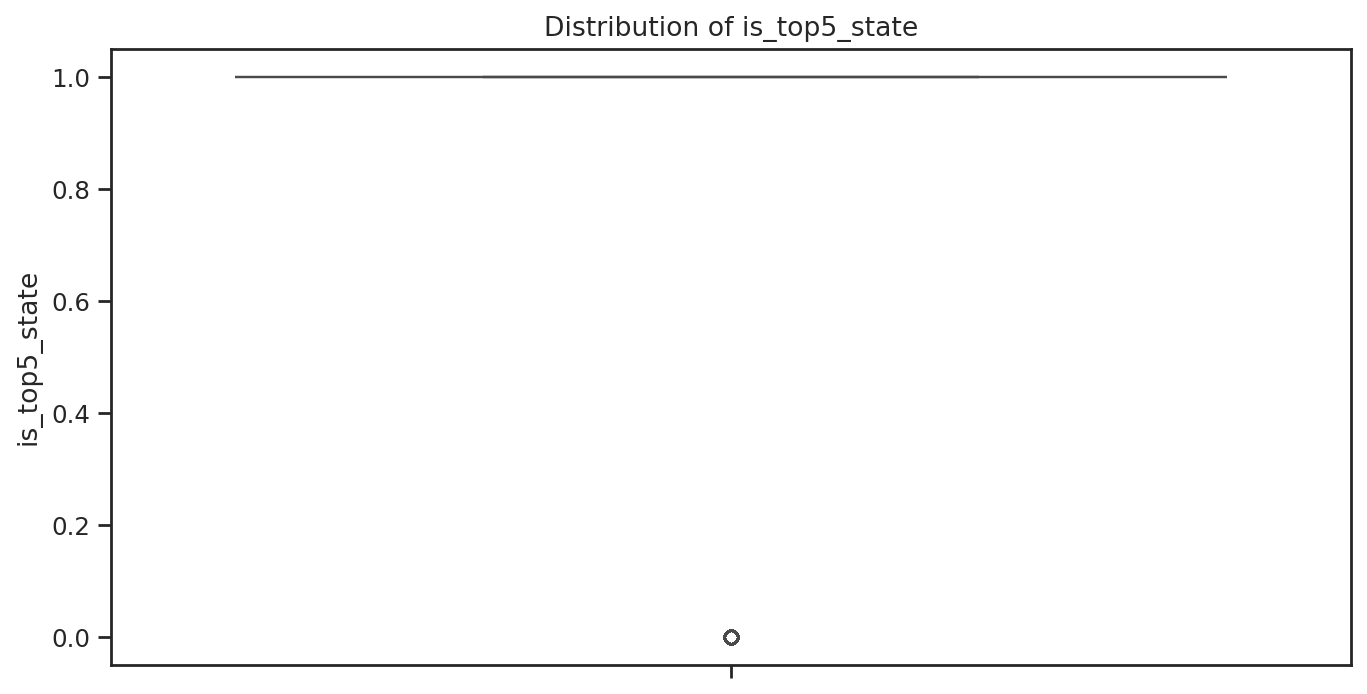

Skewness of num_reviews: 17.72906178422763
Standard deviation of num_reviews: 0.49761604964299694


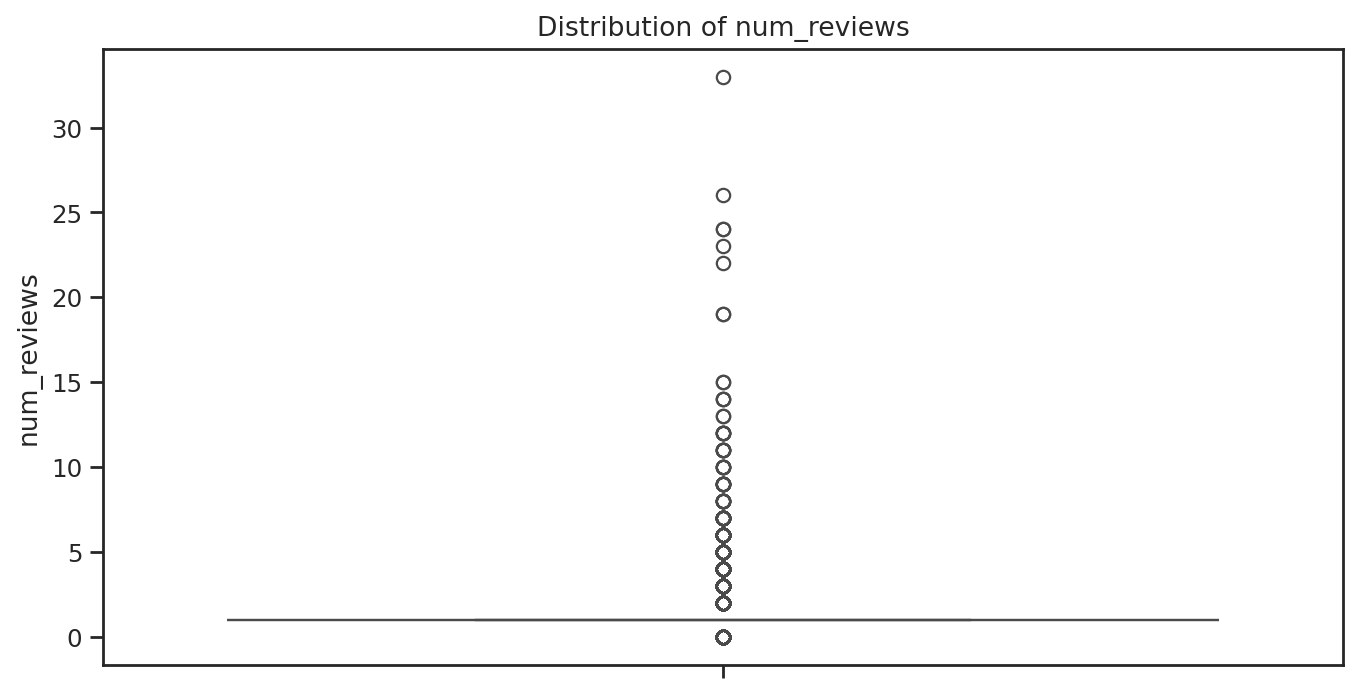

In [ ]:
for col in features.select_dtypes(include = np.number).columns:
    plt.figure(figsize = (10, 5))
    print(f'Skewness of {col}: {features[col].skew()}')
    print(f'Standard deviation of {col}: {features[col].std()}')
    sns.boxplot(features[col])
    plt.title(f'Distribution of {col}')
    plt.show()

## Binning to simplify and stabilize data

In [ ]:
full_data['num_reviews'].value_counts()

num_reviews
1     73310
2      3612
3       577
0       518
4       191
5        76
6        49
7        26
9        10
8         9
11        6
10        6
12        6
14        3
19        2
24        2
15        2
13        2
22        1
26        1
33        1
23        1
Name: count, dtype: int64

In [ ]:
# Binning number of reviews
def categorize_num_reviews(x):
    if x == 0:
        return '0 reviews'
    elif x == 1:
        return '1 review'
    elif x <= 3:
        return '2-3 reviews'
    else:
        return '4+ reviews'

full_data['num_reviews_bin'] = full_data['num_reviews'].apply(categorize_num_reviews)
full_data=full_data.drop(columns=['num_reviews'])

For outliers, two ways are specifically used in this project. First, Binning for Stability is
utilized when notice the outlier in the number of reviews. Most customers left fewer than 3
reviews, but a few left over 10, indicating right-skewness. We binned this into four categories
(0, 1, 2–3, 4+) to simplify the feature while retaining behavioural variance.

In [ ]:
full_data['is_repeat_buyer'] = (full_data['num_orders'] > 1).astype(int)
full_data=full_data.drop(columns=['num_orders'])
full_data

customer_unique_id  total_spent  avg_freight_value  \
0      0000366f3b9a7992bf8c76cfdf3221e2       141.90              12.00   
1      0000b849f77a49e4a4ce2b2a4ca5be3f        27.19               8.29   
2      0000f46a3911fa3c0805444483337064        86.22              17.22   
3      0000f6ccb0745a6a4b88665a16c9f078        43.62              17.63   
4      0004aac84e0df4da2b147fca70cf8255       196.89              16.89   
...                                 ...          ...                ...   
78406  fffcf5a5ff07b0908bd4e2dbc735a684      2067.42             497.42   
78407  fffea47cd6d3cc0a88bd621562a9d061        84.58              19.69   
78408  ffff371b4d645b6ecea244b27531430a       112.46              22.56   
78409  ffff5962728ec6157033ef9805bacc48       133.69              18.69   
78410  ffffd2657e2aad2907e67c3e9daecbeb        71.56              14.57   

       avg_product_weight  avg_payment  avg_approval_seconds  \
0                  1500.0       141.90                 891.0   
1                   375.0        27.19               26057.0   
2                  1500.0        86.22                   0.0   
3                   150.0        43.62                1176.0   
4                  6050.0       196.89                1270.0   
...                   ...          ...                   ...   
78406             60000.0      2067.42                 880.0   
78407              1720.0        84.58                 504.0   
78408               600.0       112.46                 808.0   
78409               444.0       133.69                2466.0   
78410               400.0        71.56               68188.0   

       avg_delivery_days  avg_delivery_performance  avg_review_score  \
0                    5.0                      -5.0               5.0   
1                    2.0                      -5.0               4.0   
2                   25.0                      -2.0               3.0   
3                   19.0                     -12.0               4.0   
4                   12.0                      -8.0               5.0   
...                  ...                       ...               ...   
78406               27.0                     -27.0               5.0   
78407               29.0                      -3.0               4.0   
78408               14.0                     -30.0               5.0   
78409               11.0                     -14.0               5.0   
78410                7.0                     -16.0               5.0   

       avg_payment_installments  is_top5_state most_common_payment_type  \
0                           8.0              1              credit_card   
1                           1.0              1              credit_card   
2                           8.0              0              credit_card   
3                           4.0              0              credit_card   
4                           6.0              1              credit_card   
...                         ...            ...                      ...   
78406                      10.0              0              credit_card   
78407                       1.0              0              credit_card   
78408                       1.0              0              credit_card   
78409                       5.0              0              credit_card   
78410                       4.0              1              credit_card   

       churn num_reviews_bin  is_repeat_buyer  
0          0        1 review                0  
1          0        1 review                0  
2          1        1 review                0  
3          1        1 review                0  
4          1        1 review                0  
...      ...             ...              ...  
78406      1        1 review                0  
78407      1        1 review                0  
78408      1        1 review                0  
78409      0        1 review                0  
78410      1        1 review                0  

[78411 r


Similarly, for the number of orders, most customers were one-time buyers. Thus, we created
a binary feature is_repeat_buyer (0 = first-time, 1 = repeat) to highlight loyalty-relevant
distinctions without introducing noise from sparse repeat data

## Capping (Winsorization) to limit extremes

In [ ]:
full_data['avg_payment_installments'].value_counts()


avg_payment_installments
1.000000     35562
2.000000     10212
3.000000      8554
4.000000      5820
10.000000     4211
             ...  
6.200000         1
8.333333         1
11.250000        1
1.800000         1
1.086957         1
Name: count, Length: 87, dtype: int64

In [ ]:
full_data['avg_freight_value'].value_counts().sort_index()


avg_freight_value
0.000000       292
5.033333         1
5.700000         1
5.820000         1
5.880000         2
              ... 
497.080000       1
497.420000       1
711.330000       1
1002.290000      1
1794.960000      1
Name: count, Length: 8410, dtype: int64

In [ ]:

columns_to_cap = [
    'total_spent',
    'avg_payment',
    'avg_approval_seconds',
    'avg_freight_value',
    'avg_product_weight',
    'avg_delivery_days',
    'avg_delivery_performance',
    'avg_review_score',
    'avg_payment_installments'
]

for col in columns_to_cap:
    q1 = full_data[col].quantile(0.25)
    q3 = full_data[col].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr

    # winsorize via clip
    full_data[col] = full_data[col].clip(lower=lower_fence, upper=upper_fence)


In [ ]:
full_data

customer_unique_id  total_spent  avg_freight_value  \
0      0000366f3b9a7992bf8c76cfdf3221e2      141.900              12.00   
1      0000b849f77a49e4a4ce2b2a4ca5be3f       27.190               8.29   
2      0000f46a3911fa3c0805444483337064       86.220              17.22   
3      0000f6ccb0745a6a4b88665a16c9f078       43.620              17.63   
4      0004aac84e0df4da2b147fca70cf8255      196.890              16.89   
...                                 ...          ...                ...   
78406  fffcf5a5ff07b0908bd4e2dbc735a684      369.435              40.32   
78407  fffea47cd6d3cc0a88bd621562a9d061       84.580              19.69   
78408  ffff371b4d645b6ecea244b27531430a      112.460              22.56   
78409  ffff5962728ec6157033ef9805bacc48      133.690              18.69   
78410  ffffd2657e2aad2907e67c3e9daecbeb       71.560              14.57   

       avg_product_weight  avg_payment  avg_approval_seconds  \
0                  1500.0     141.9000                891.00   
1                   375.0      27.1900              26057.00   
2                  1500.0      86.2200                  0.00   
3                   150.0      43.6200               1176.00   
4                  5050.0     196.8900               1270.00   
...                   ...          ...                   ...   
78406              5050.0     350.5275                880.00   
78407              1720.0      84.5800                504.00   
78408               600.0     112.4600                808.00   
78409               444.0     133.6900               2466.00   
78410               400.0      71.5600              46638.25   

       avg_delivery_days  avg_delivery_performance  avg_review_score  \
0                    5.0                      -5.0               5.0   
1                    2.0                      -5.0               4.0   
2                   25.0                      -2.0               3.0   
3                   19.0                     -12.0               4.0   
4                   12.0                      -8.0               5.0   
...                  ...                       ...               ...   
78406               27.0                     -27.0               5.0   
78407               28.5                      -3.0               4.0   
78408               14.0                     -30.0               5.0   
78409               11.0                     -14.0               5.0   
78410                7.0                     -16.0               5.0   

       avg_payment_installments  is_top5_state most_common_payment_type  \
0                           8.0              1              credit_card   
1                           1.0              1              credit_card   
2                           8.0              0              credit_card   
3                           4.0              0              credit_card   
4                           6.0              1              credit_card   
...                         ...            ...                      ...   
78406                       8.5              0              credit_card   
78407                       1.0              0              credit_card   
78408                       1.0              0              credit_card   
78409                       5.0              0              credit_card   
78410                       4.0              1              credit_card   

       churn num_reviews_bin  is_repeat_buyer  
0          0        1 review                0  
1          0        1 review                0  
2          1        1 review                0  
3          1        1 review                0  
4          1        1 review                0  
...      ...             ...              ...  
78406      1        1 review                0  
78407      1        1 review                0  
78408      1        1 review                0  
78409      0        1 review                0  
78410      1        1 review                0  

[78411 r

Further, to mitigate the impact of extreme value on analysis and bias model training, we
applied capping (Winsorization) methods. Variables such as total spent, average freight
value, and average approval seconds contained extreme outliers (e.g., some customers
spent >$12,000). Using the IQR method, we capped values beyond 1.5×IQR above Q3 or
below Q1. Following transformation, the total amount spent exhibited a reduction in kurtosis
(from 9.21 to 1.1) and standard deviation (from 230 to 100), suggesting a more stable
distribution and enhanced robustness in model performance.

Skewness of total_spent: 1.0759144428729464
Standard deviation of total_spent: 99.83557293072636


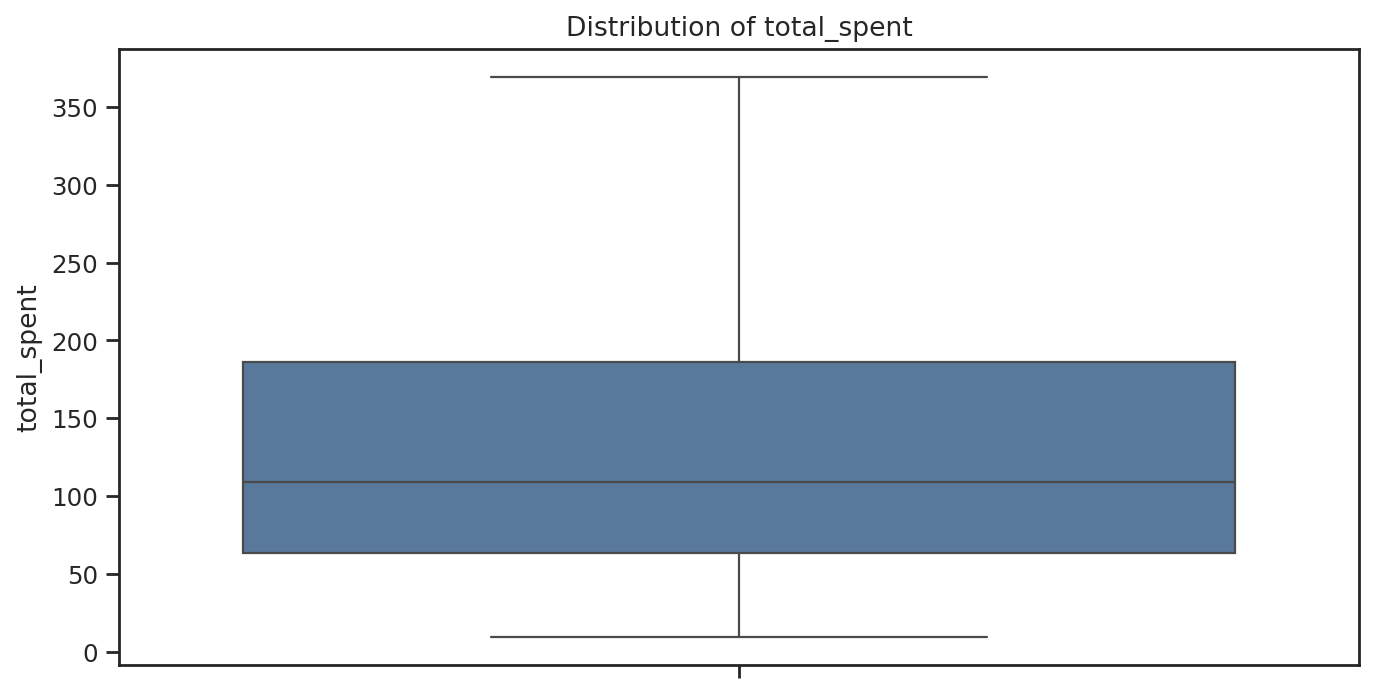

Skewness of avg_payment: 1.0576917095304033
Standard deviation of avg_payment: 94.50844950024371


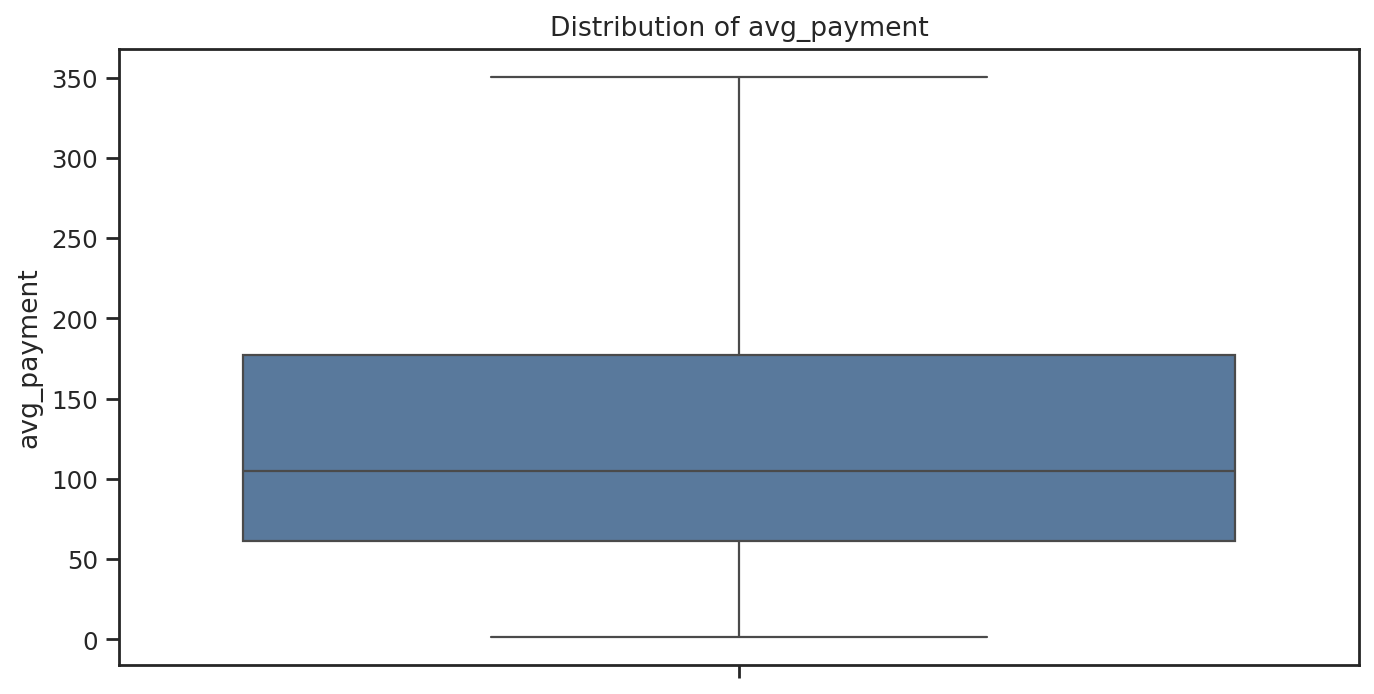

Skewness of avg_approval_seconds: 1.1686447863125136
Standard deviation of avg_approval_seconds: 19088.33652156249


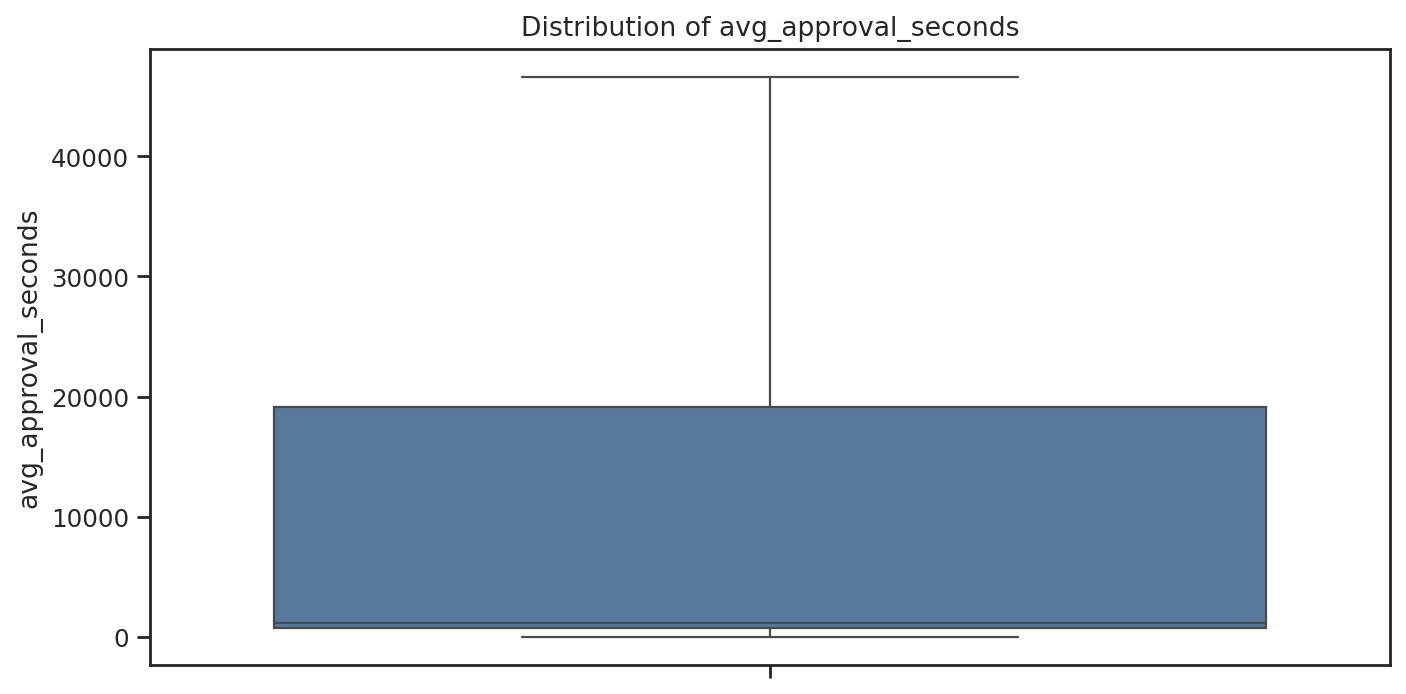

Skewness of avg_freight_value: 0.9096828372708067
Standard deviation of avg_freight_value: 9.600298417195186


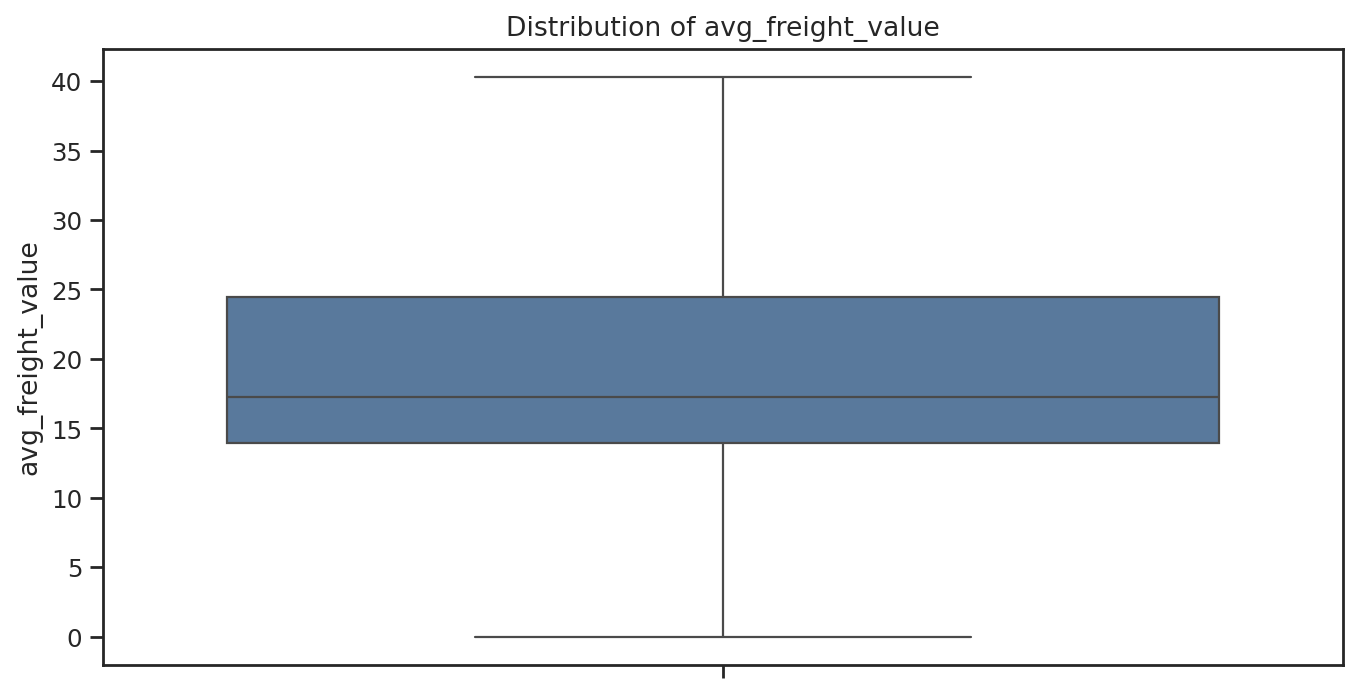

Skewness of avg_product_weight: 1.1765101022679647
Standard deviation of avg_product_weight: 1700.0162176988365


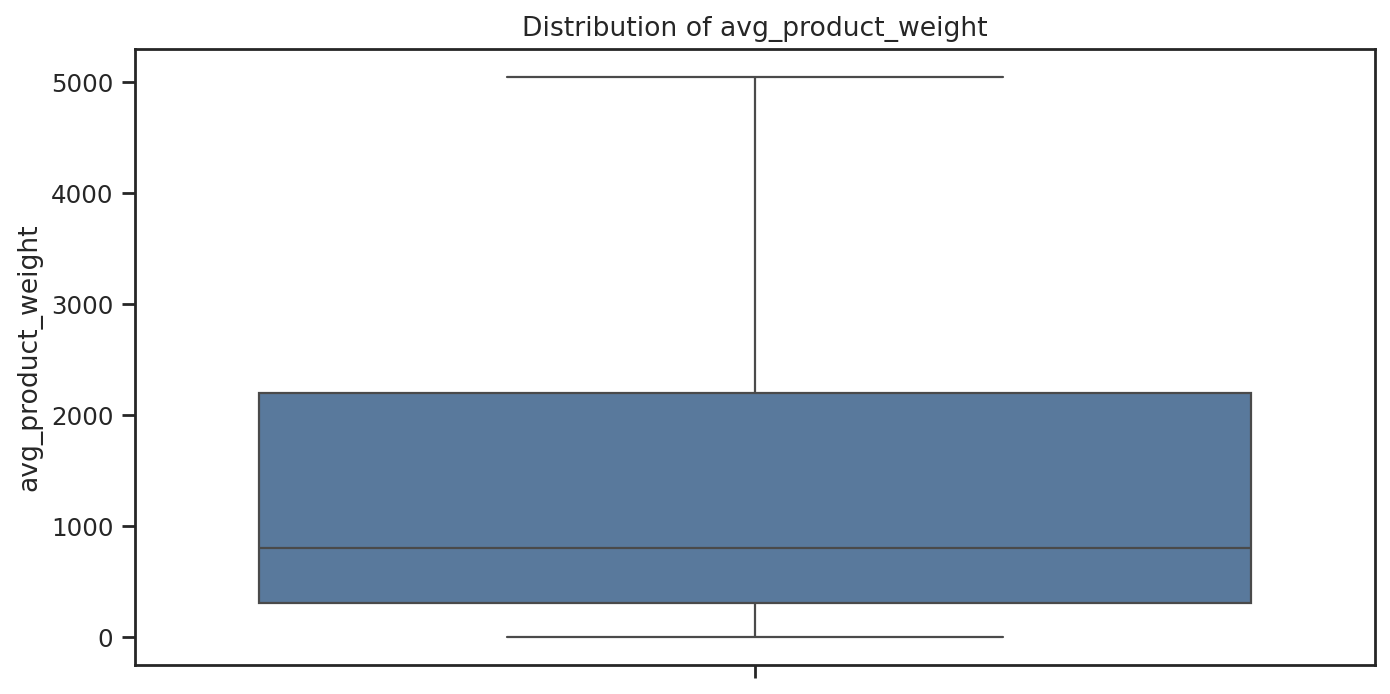

Skewness of avg_delivery_days: 0.8697577311091321
Standard deviation of avg_delivery_days: 7.218537139931416


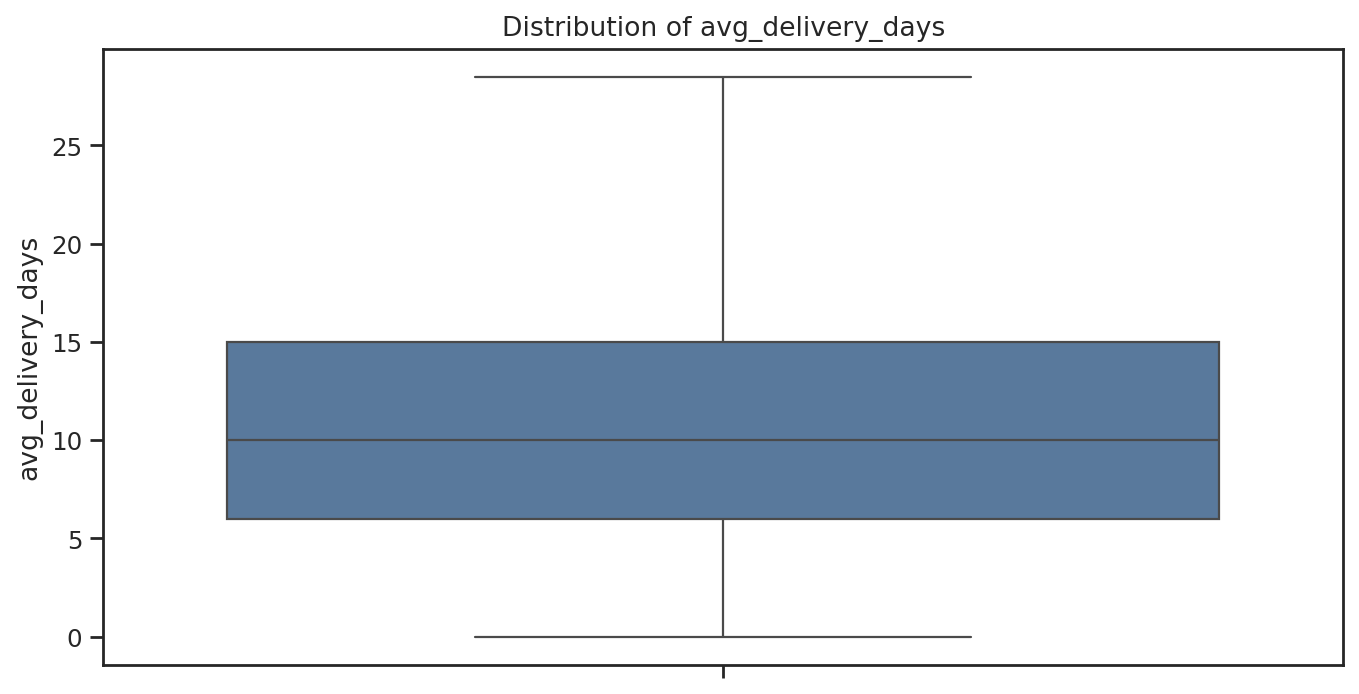

Skewness of avg_delivery_performance: 0.09491760344925351
Standard deviation of avg_delivery_performance: 8.30256780940997


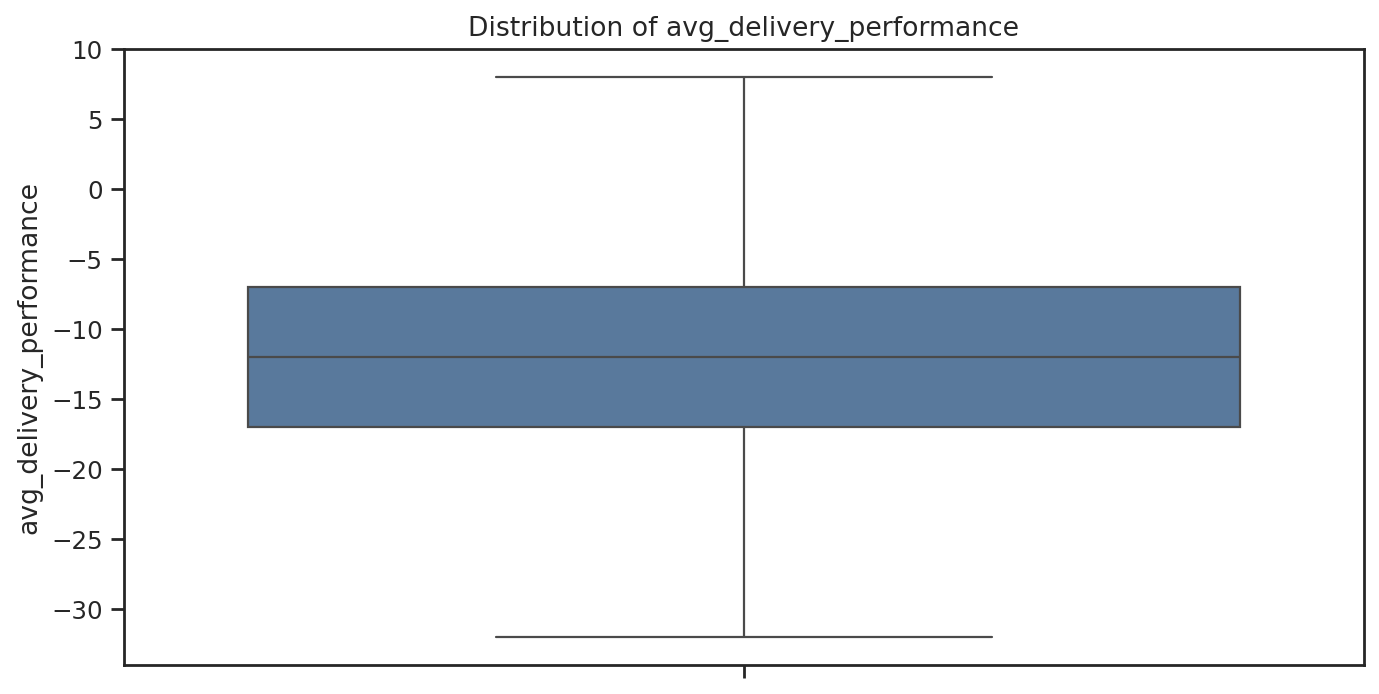

Skewness of avg_review_score: -0.9375803982089727
Standard deviation of avg_review_score: 0.9351049333863781


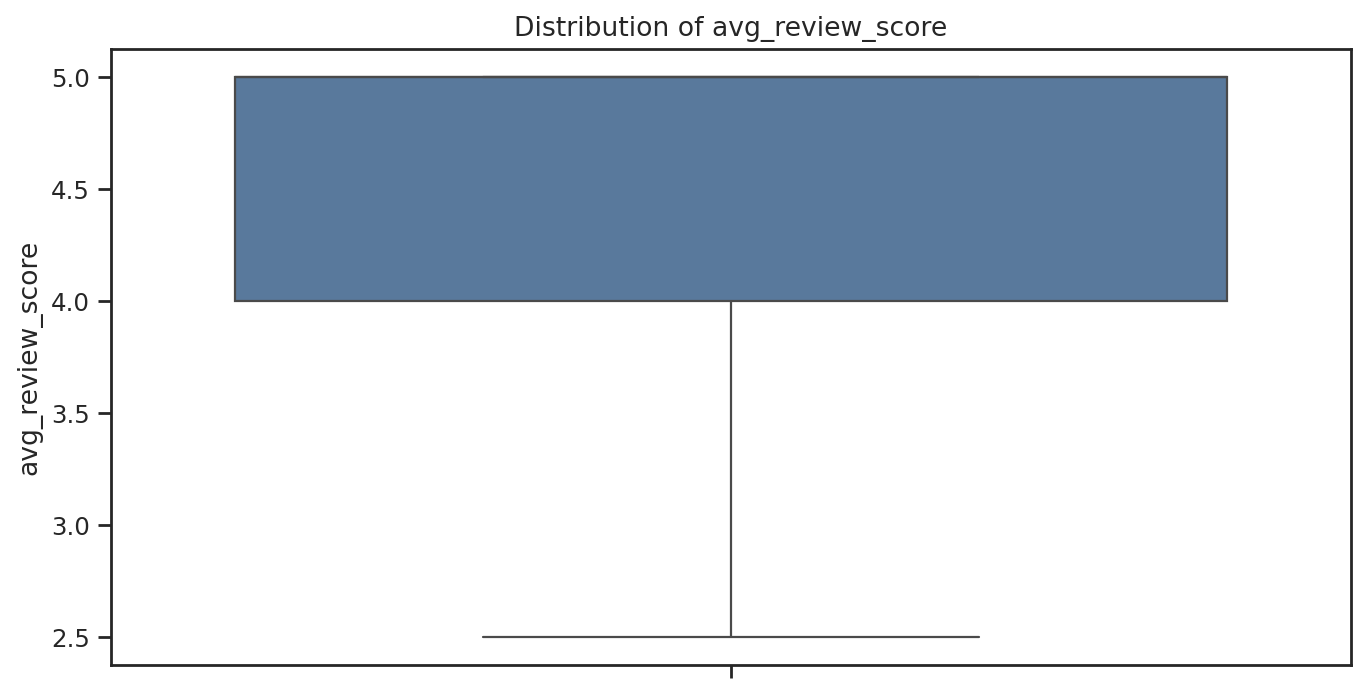

Skewness of avg_payment_installments: 1.157836107311116
Standard deviation of avg_payment_installments: 2.4368408193584785


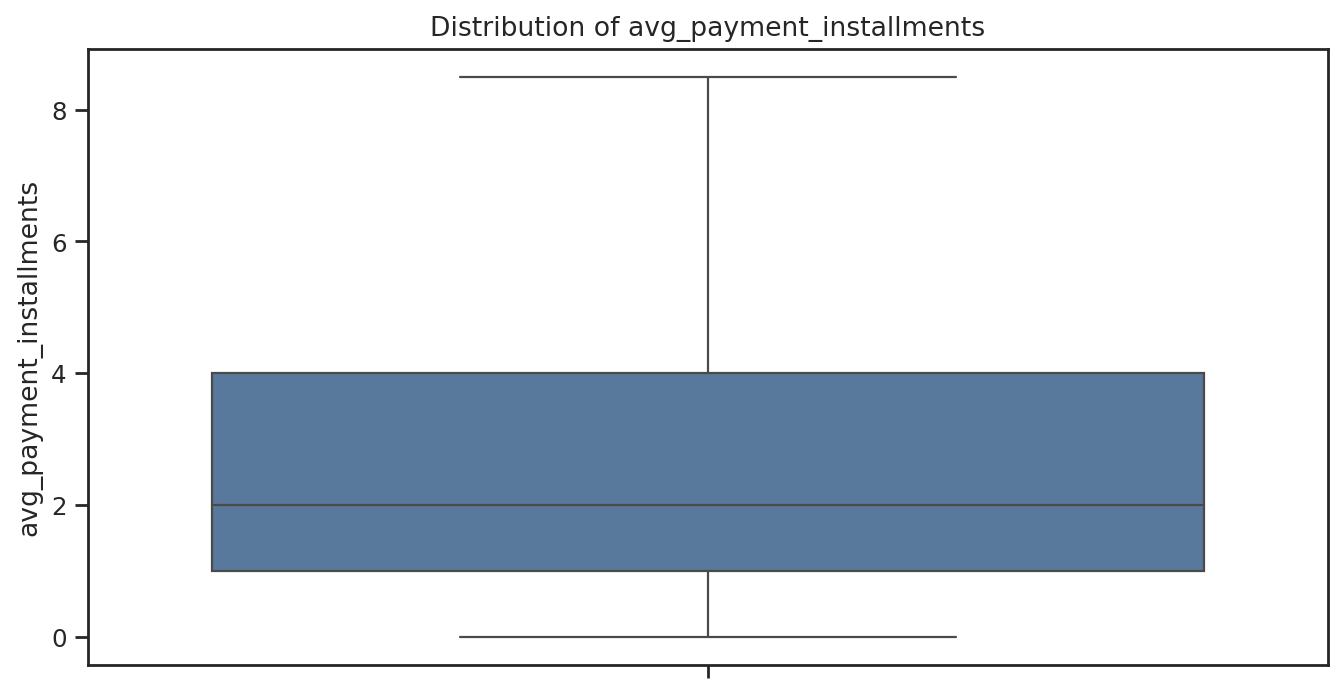

In [ ]:
for col in columns_to_cap:
    plt.figure(figsize = (10, 5))
    print(f'Skewness of {col}: {full_data[col].skew()}')
    print(f'Standard deviation of {col}: {full_data[col].std()}')
    sns.boxplot(full_data[col])
    plt.title(f'Distribution of {col}')
    plt.show()

## 3.5 Data Transformation - Yeo-Johnson

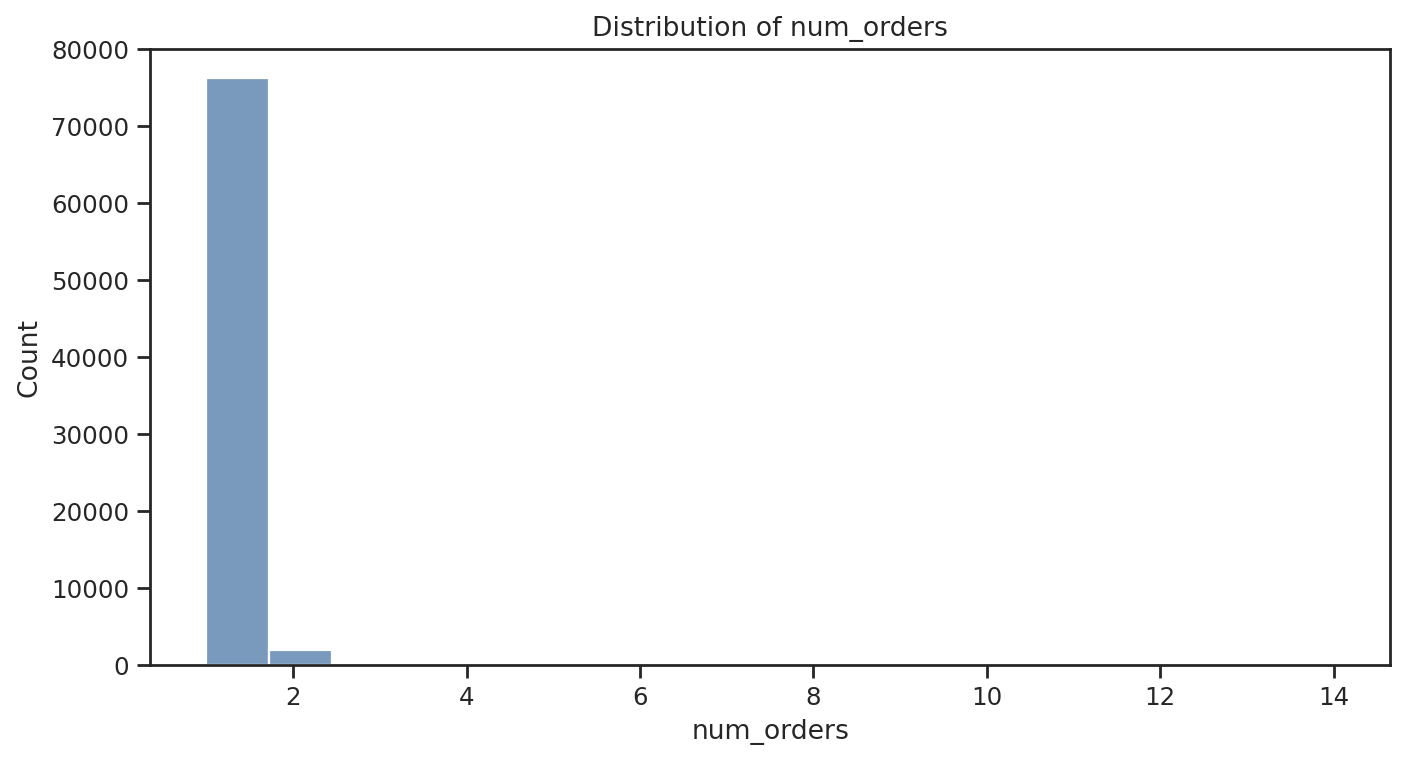

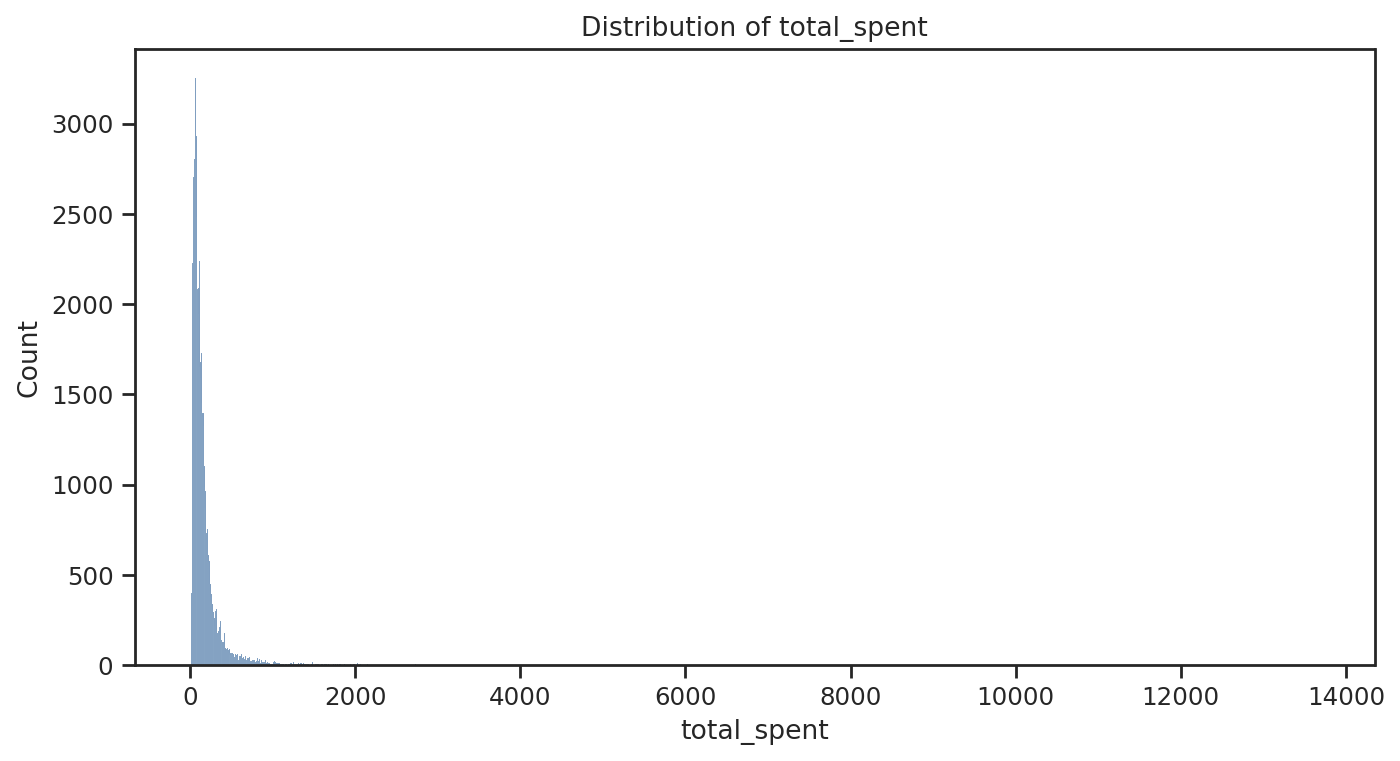

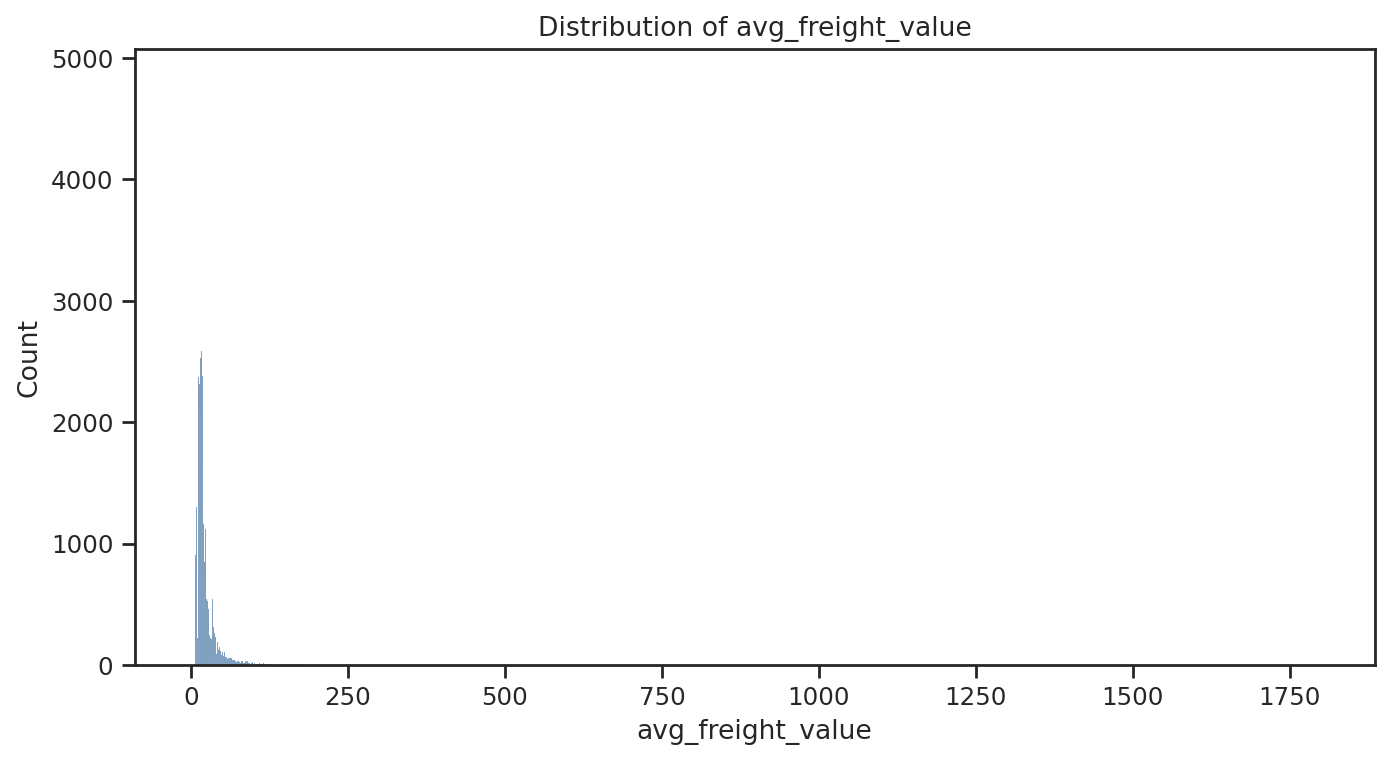

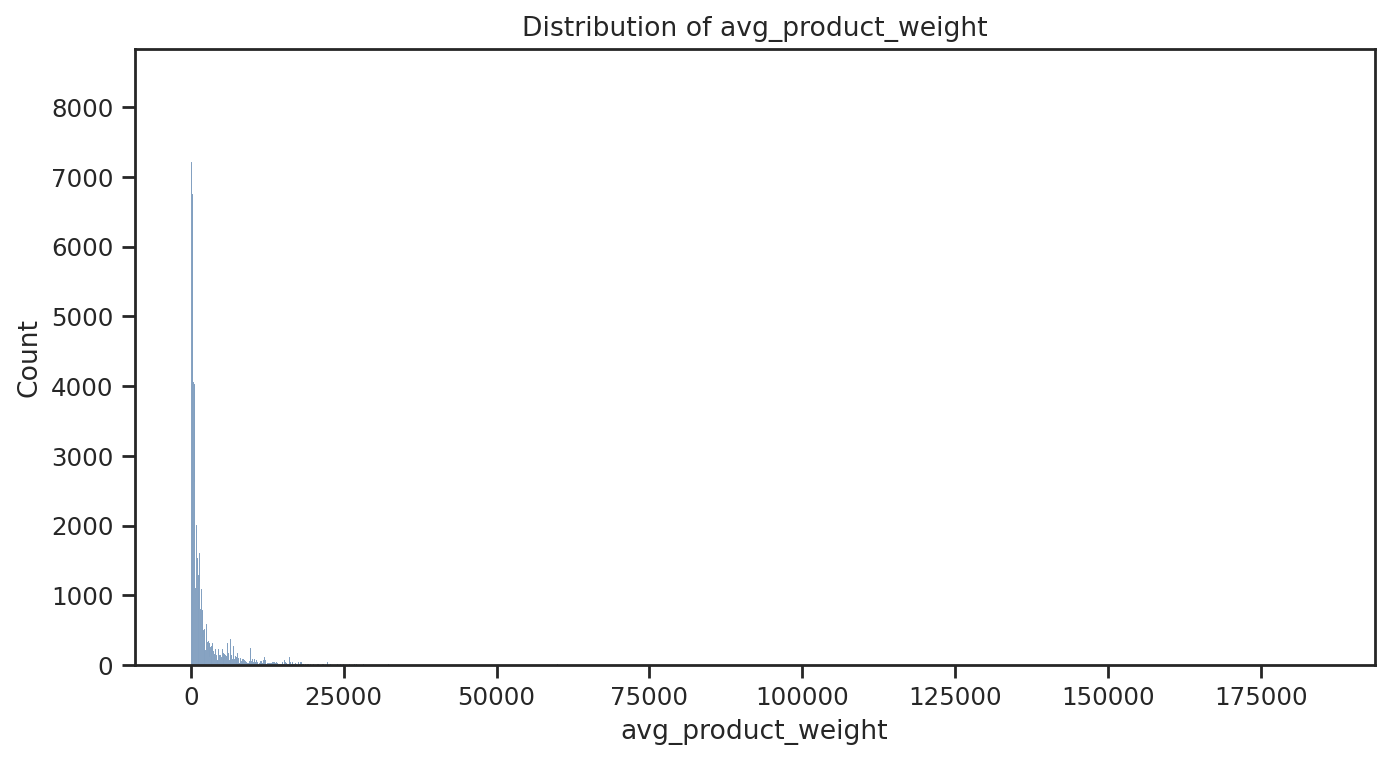

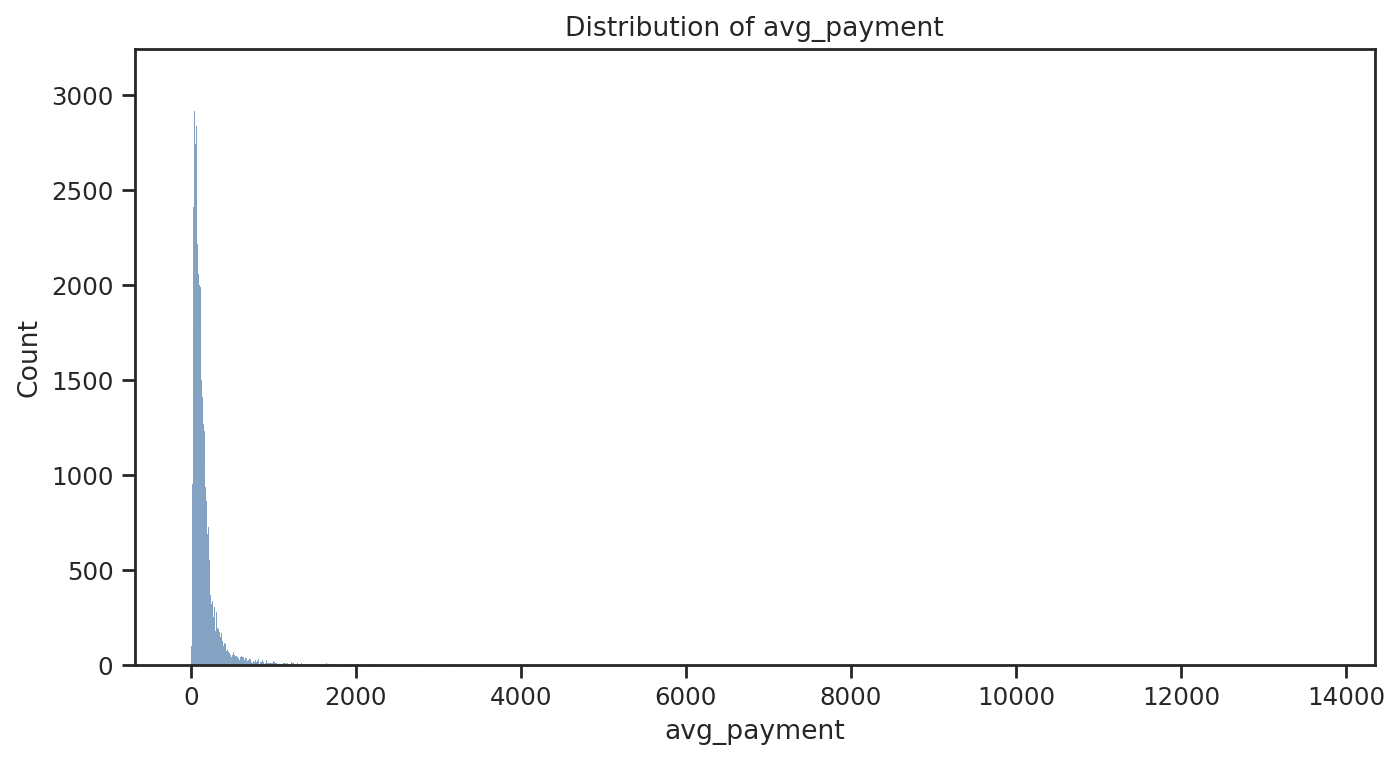

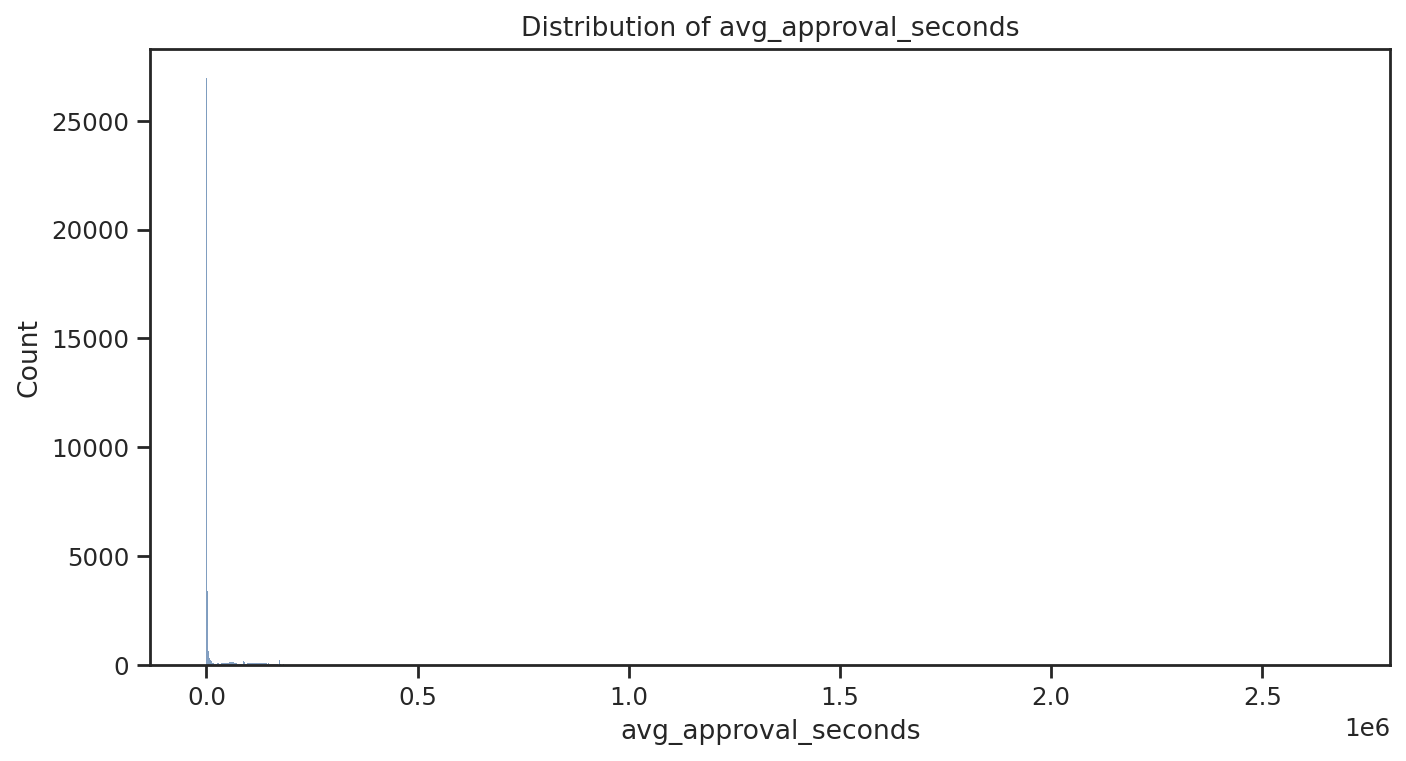

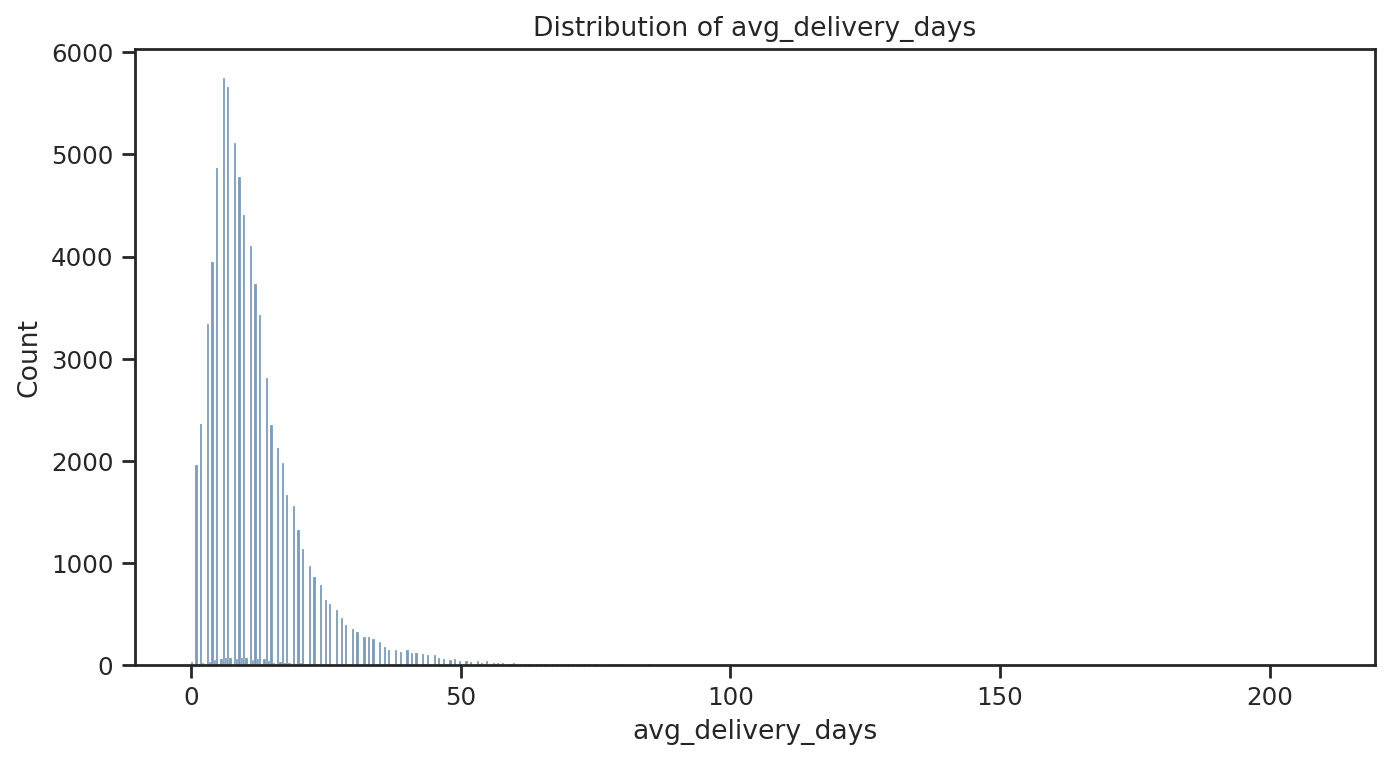

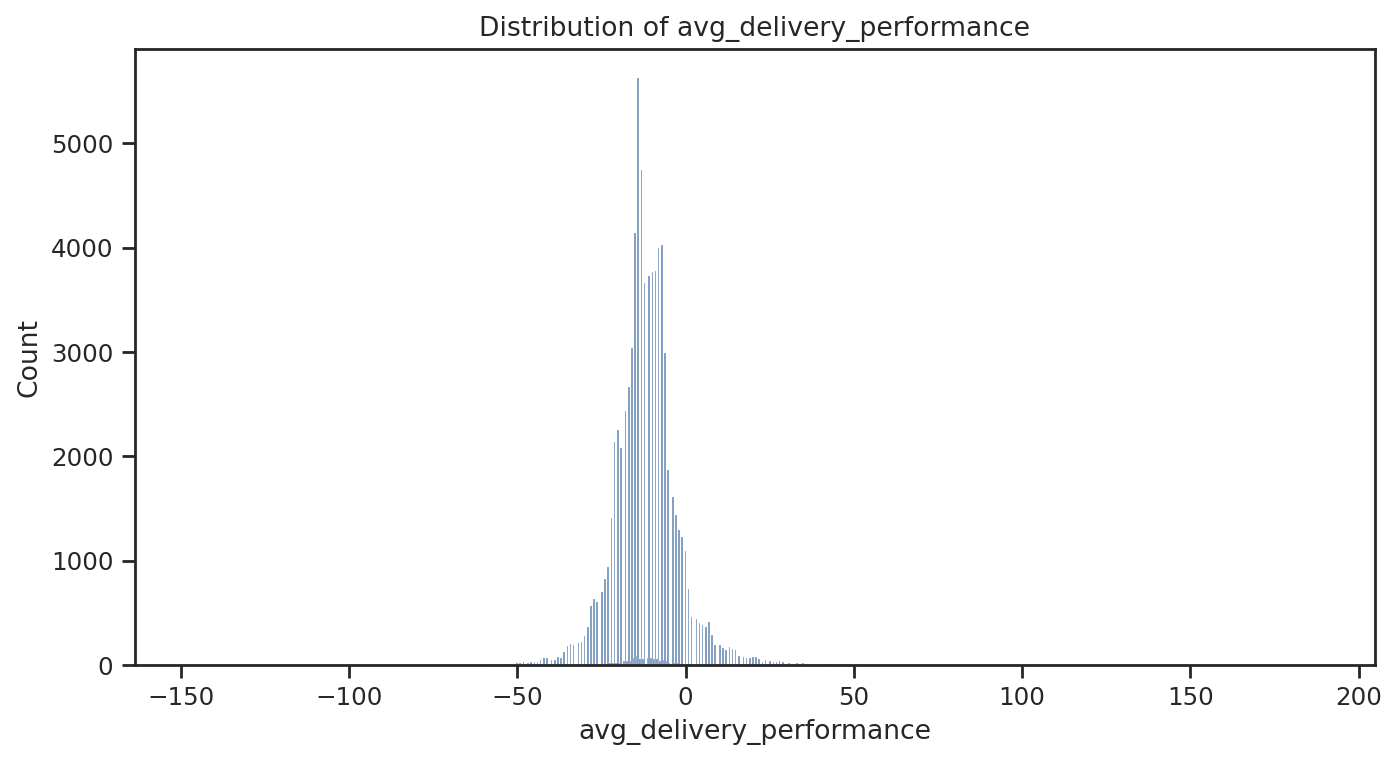

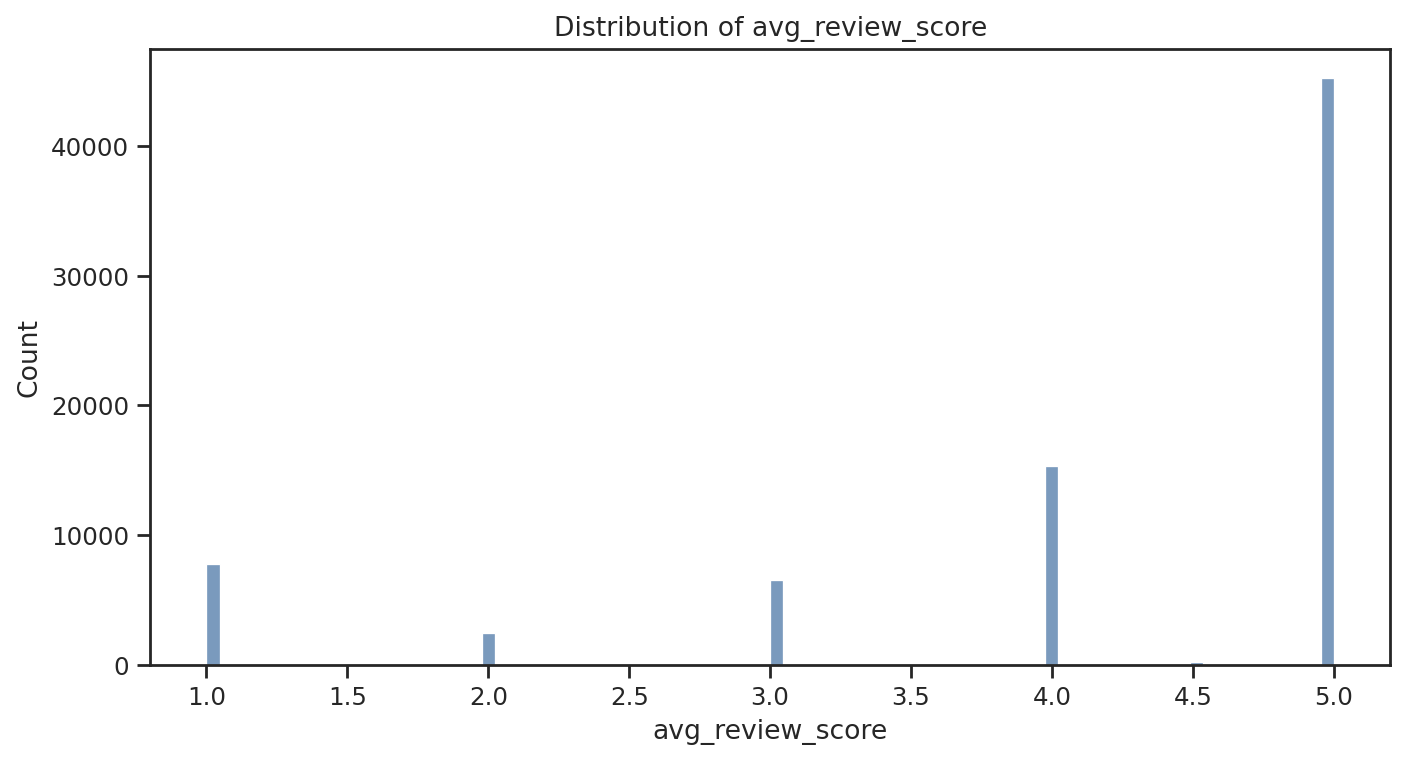

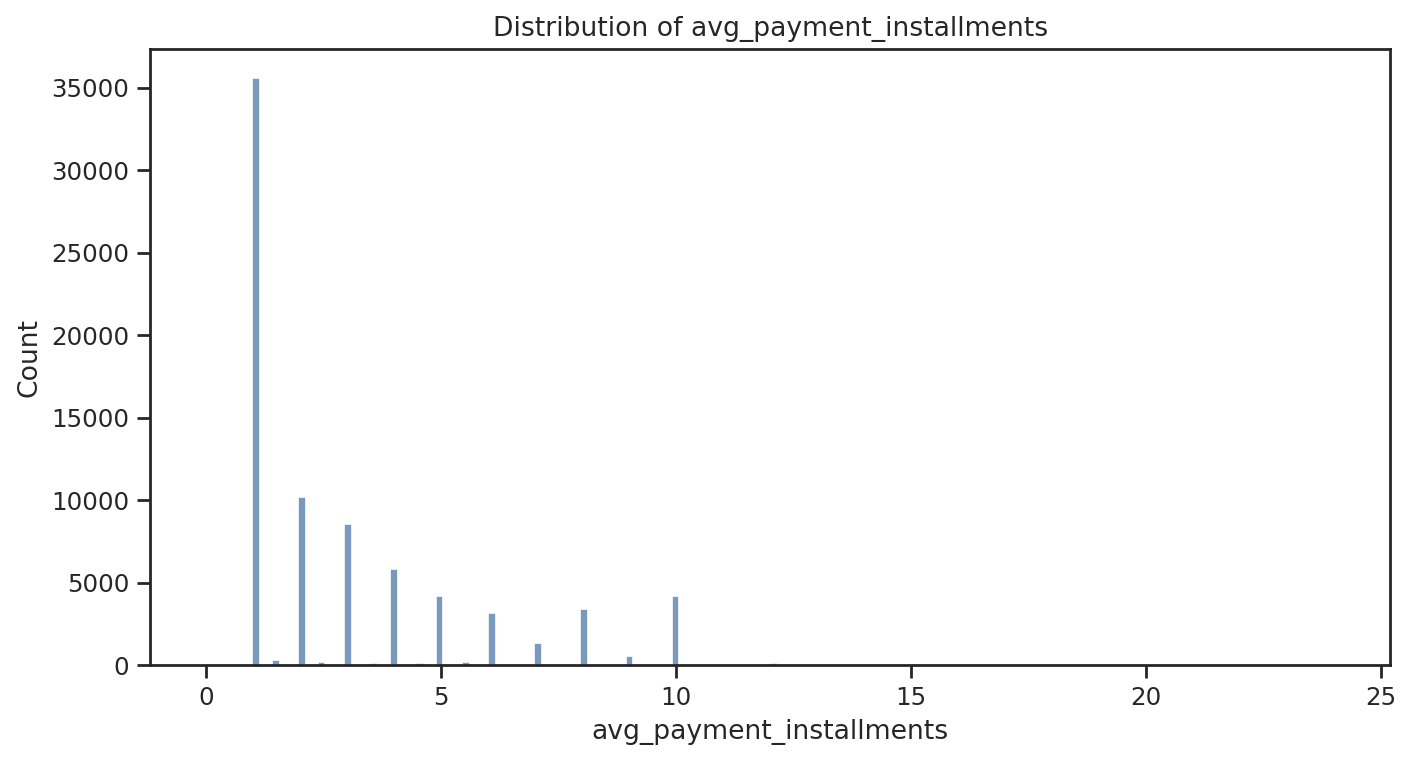

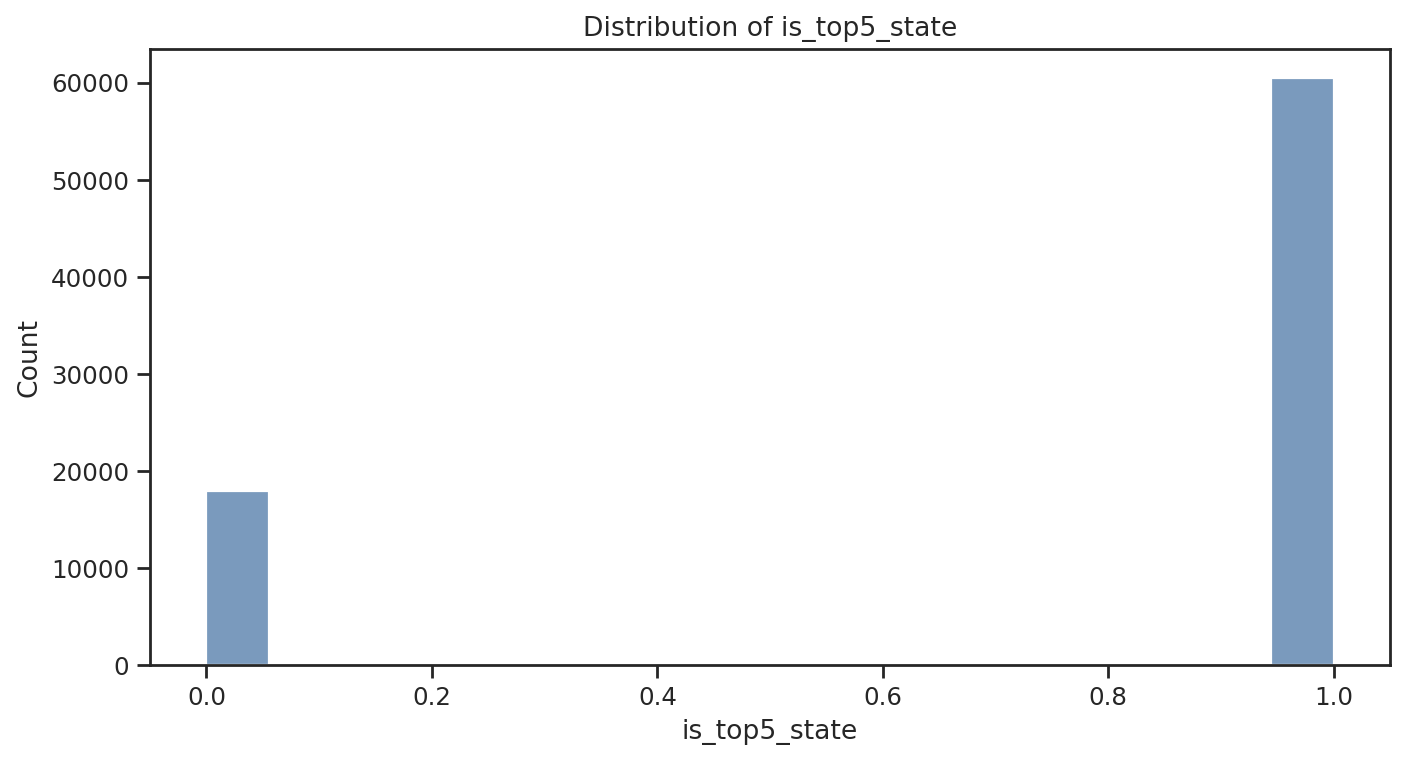

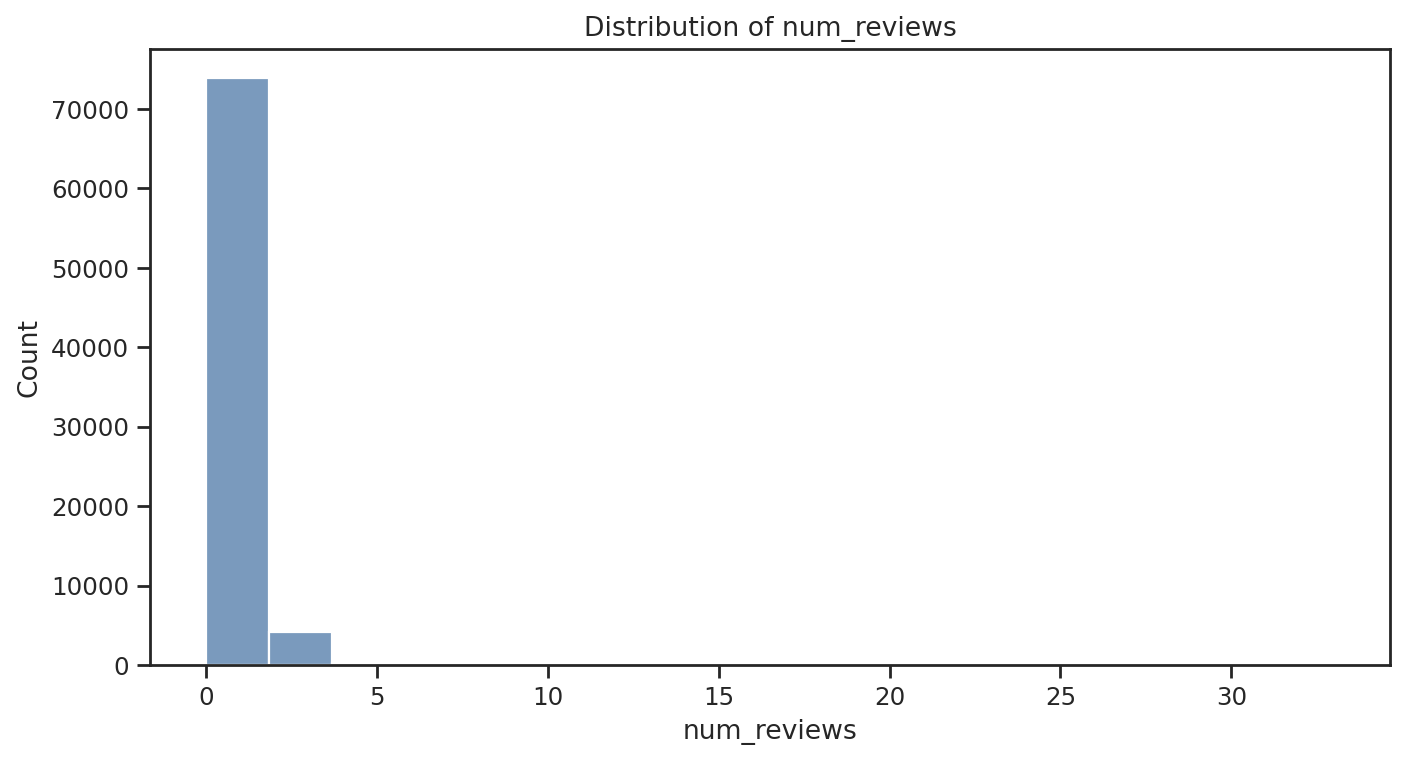

In [ ]:
for col in features.select_dtypes(include = np.number).columns:
    plt.figure(figsize = (10, 5))
    sns.histplot(features[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer



yj_cols = ['total_spent', 'avg_payment', 'avg_review_score', 'avg_product_weight', 'avg_freight_value', 'avg_approval_seconds', 'avg_delivery_days', 'avg_delivery_performance', 'avg_payment_installments', 'avg_product_weight']



pt_yj  = PowerTransformer(method='yeo-johnson', standardize=True)


# Fit & transform Yeo–Johnson
yj = pt_yj.fit_transform(full_data[yj_cols])
for i, col in enumerate(yj_cols):
    full_data[f'{col}'] = yj[:, i]


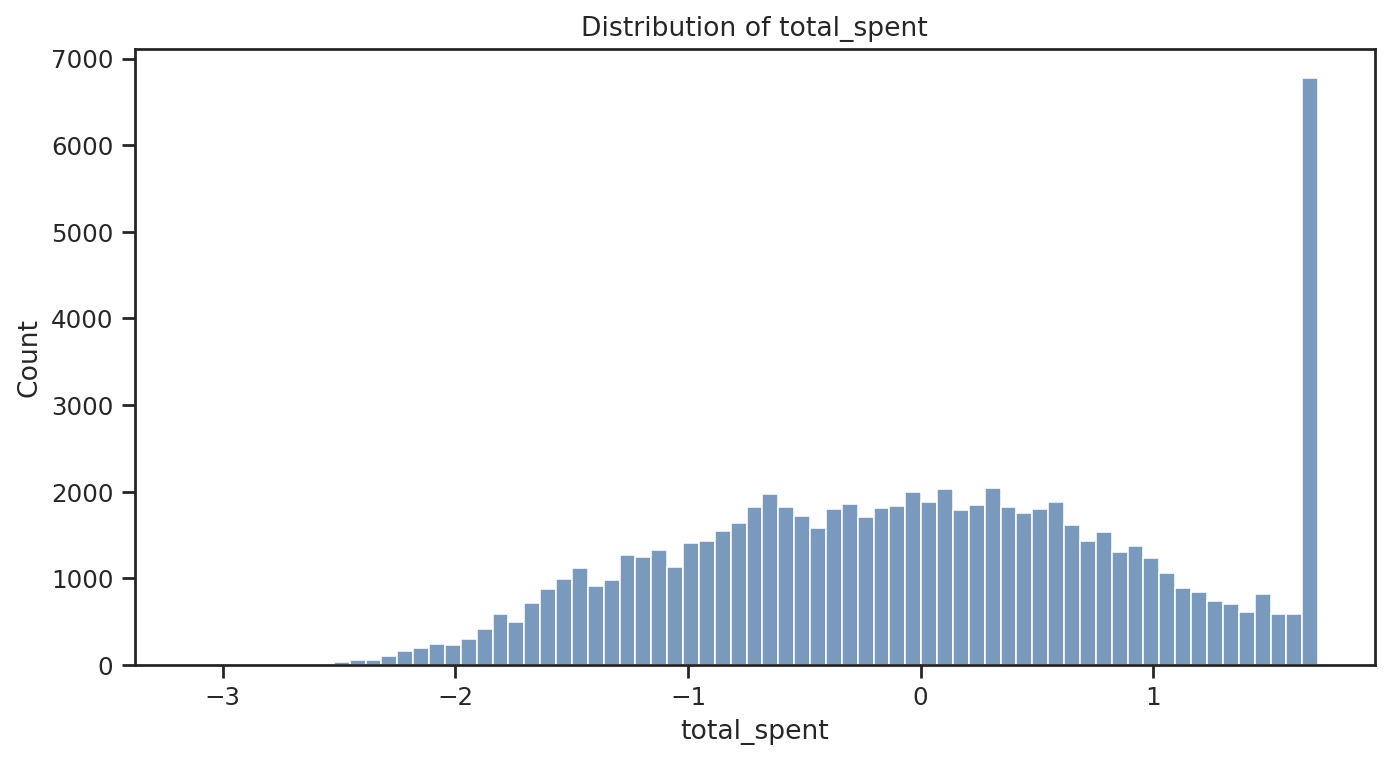

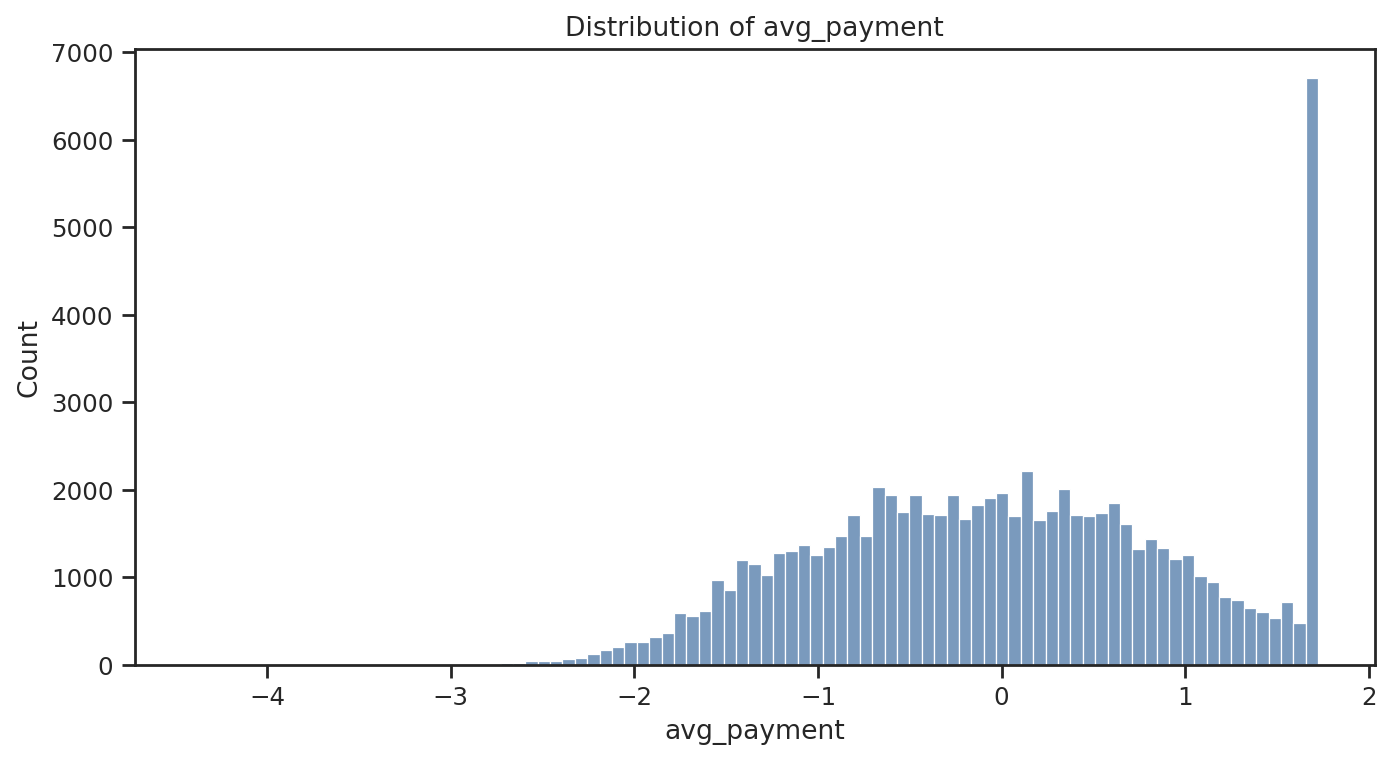

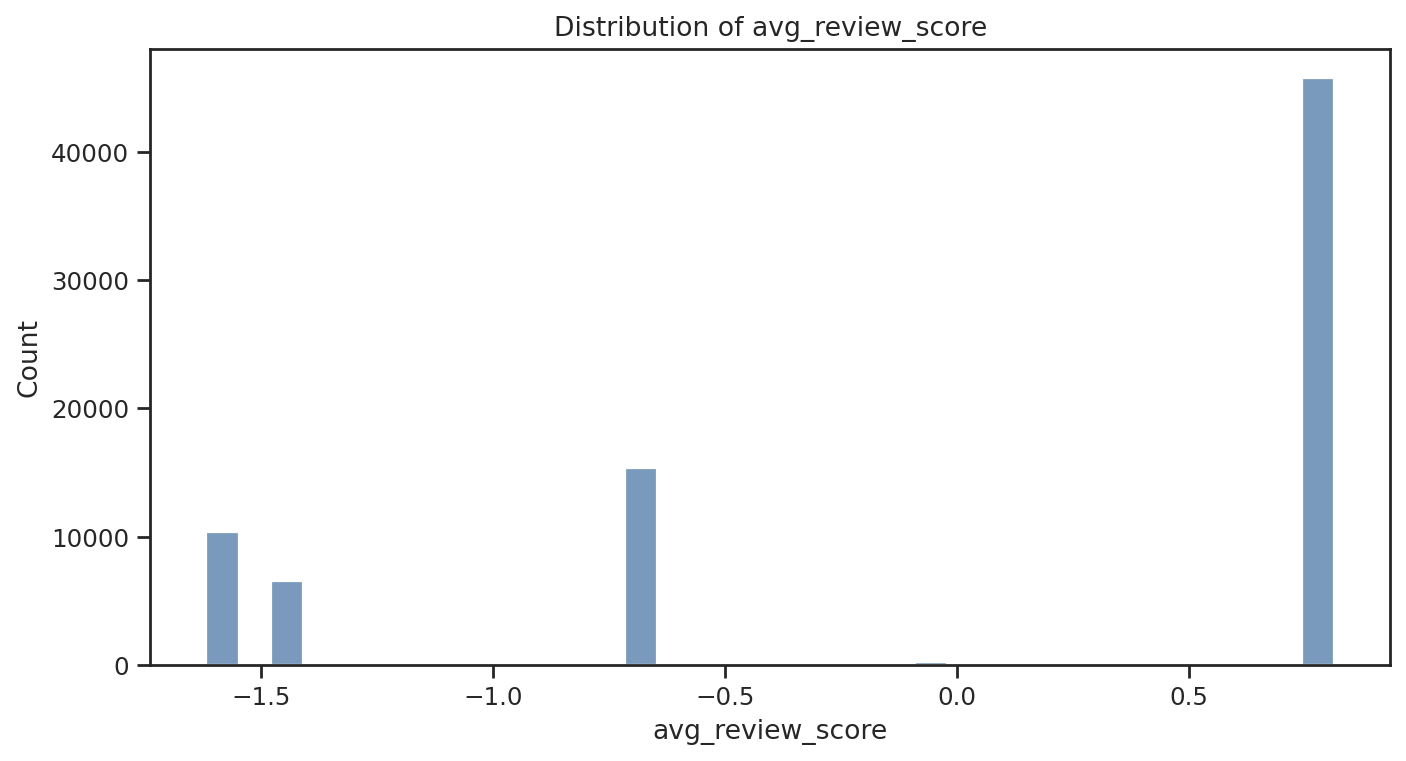

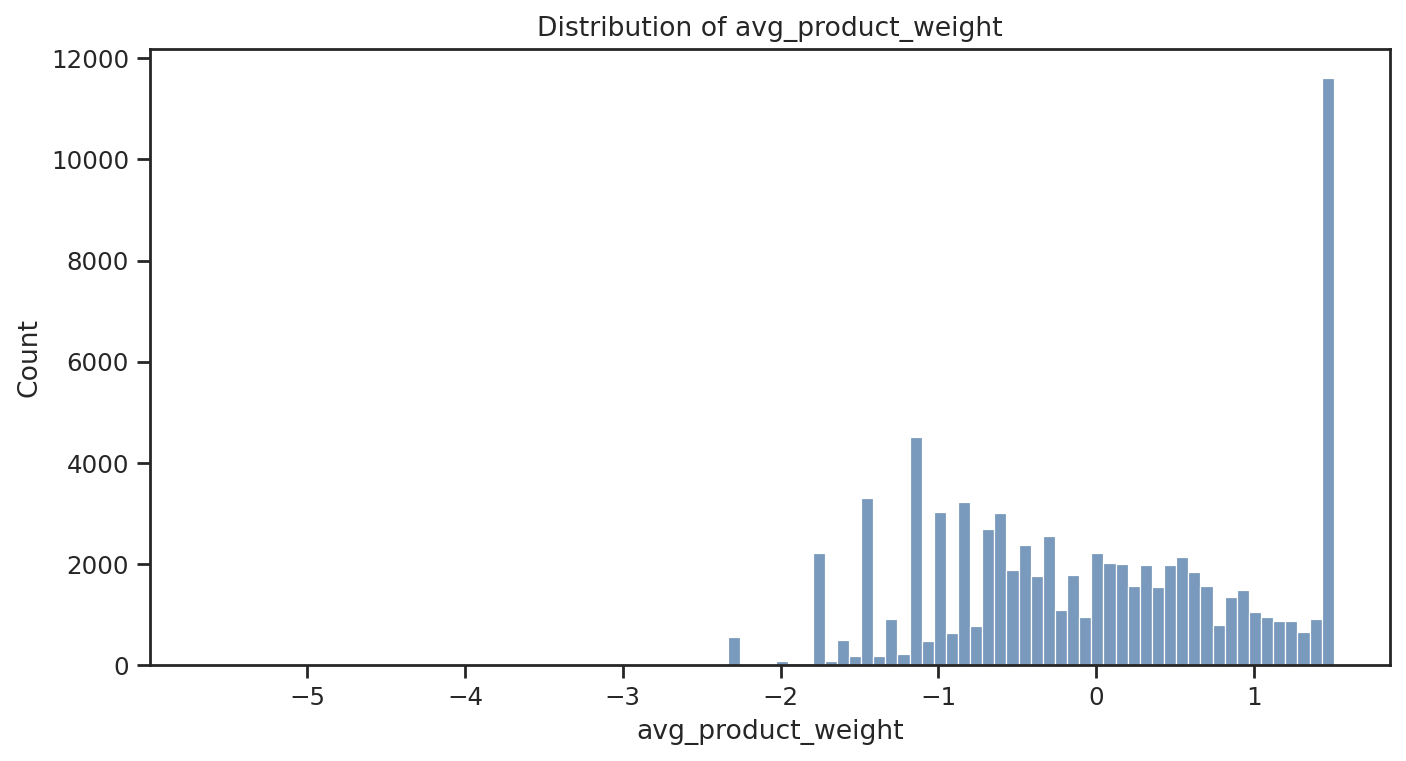

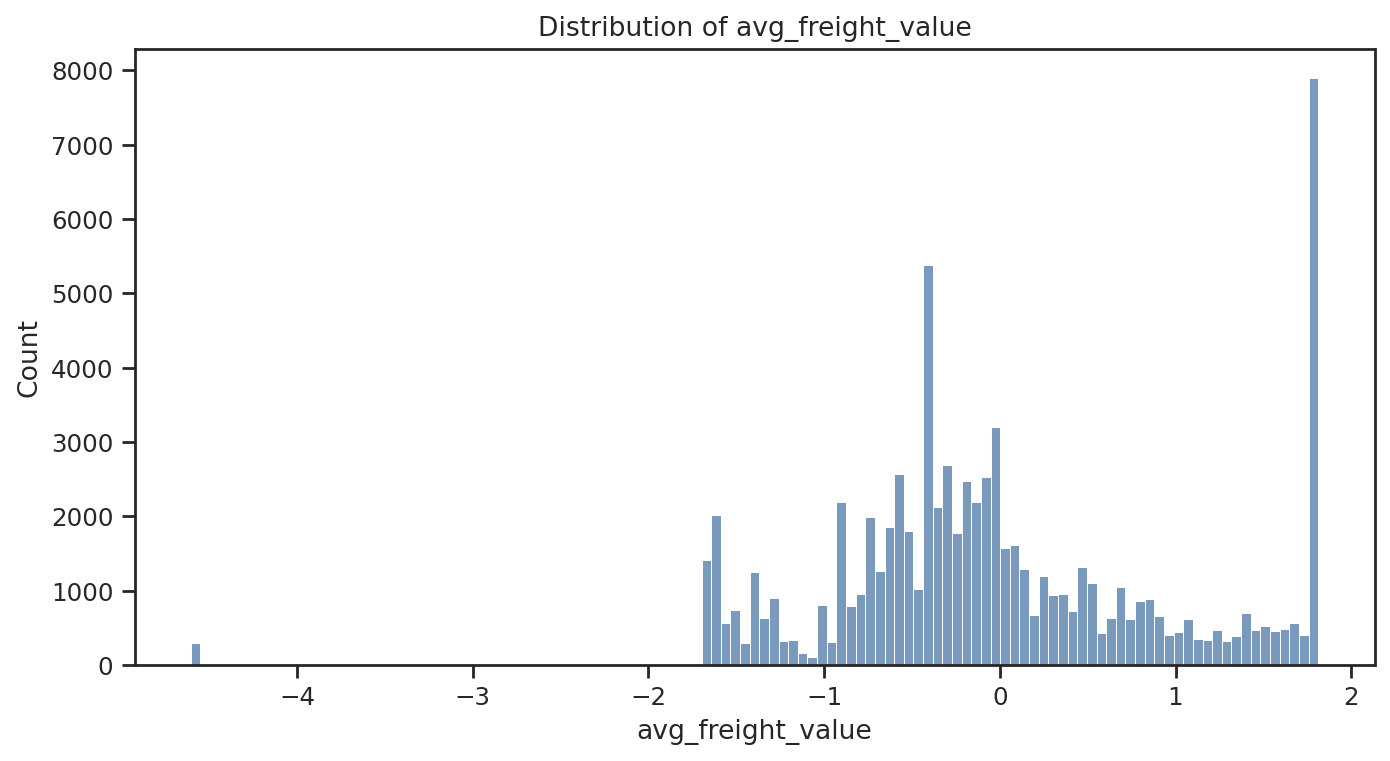

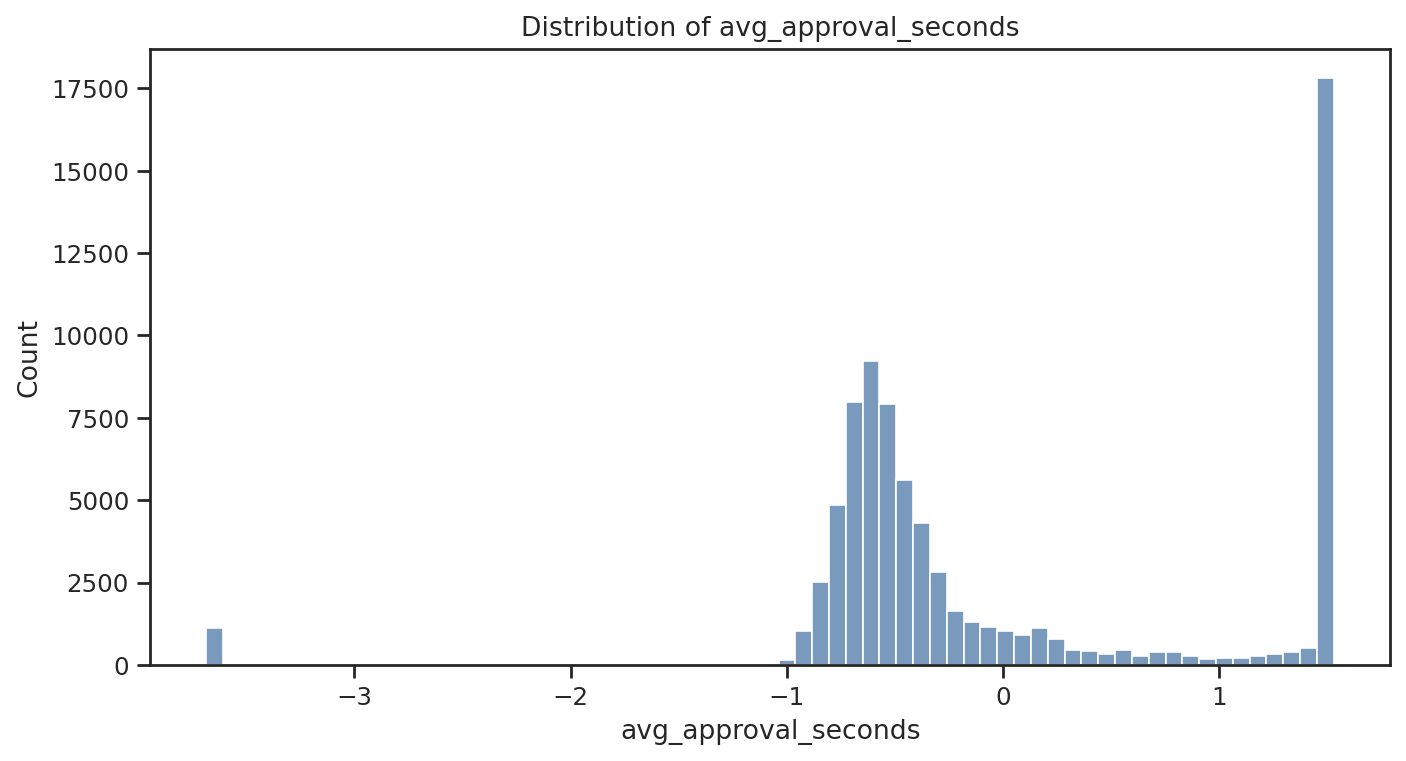

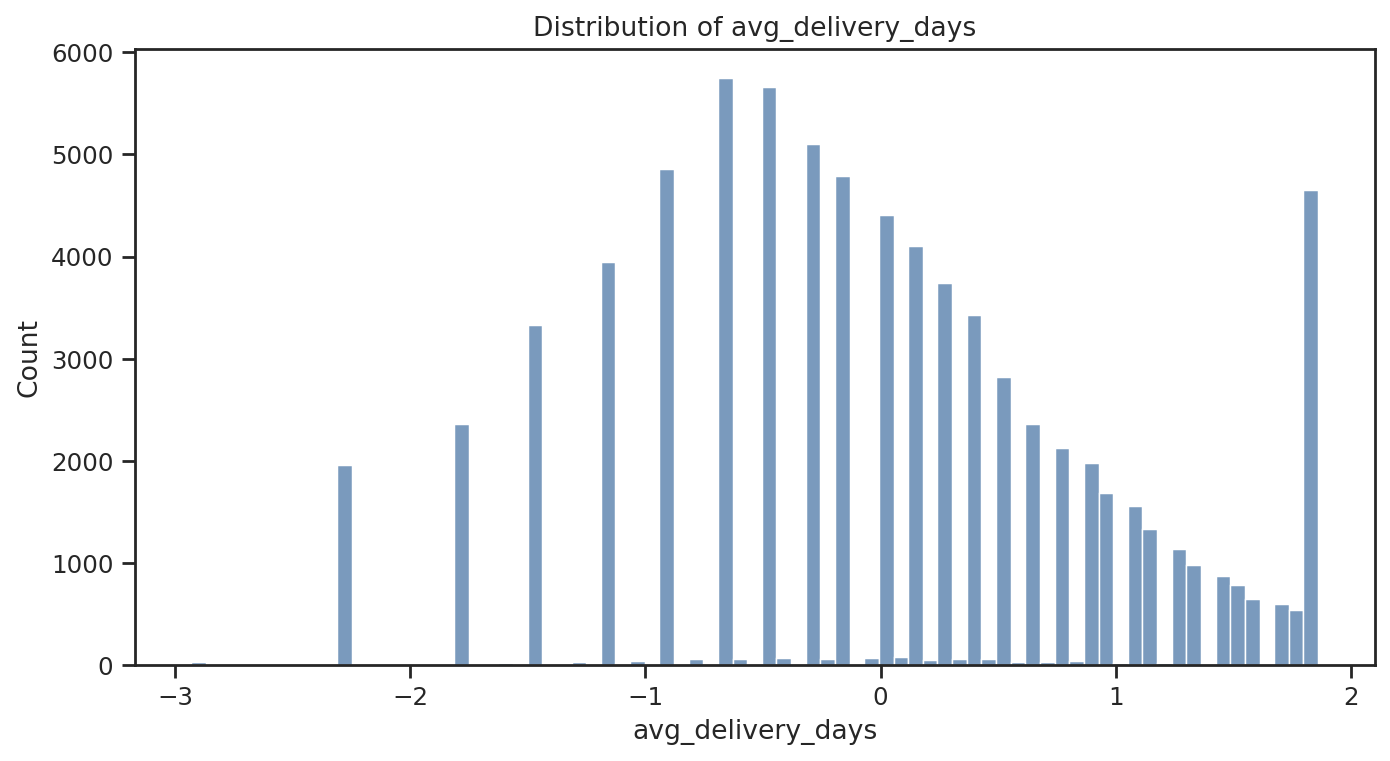

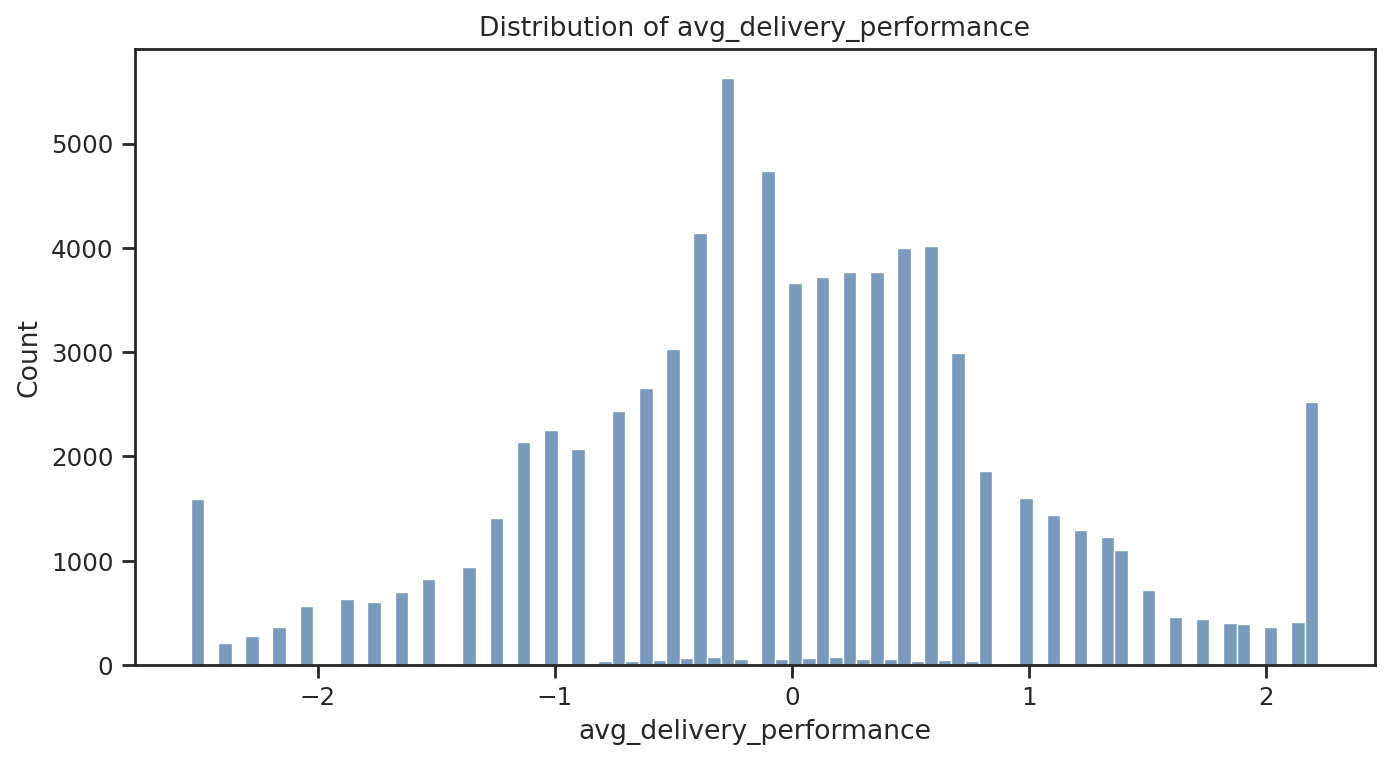

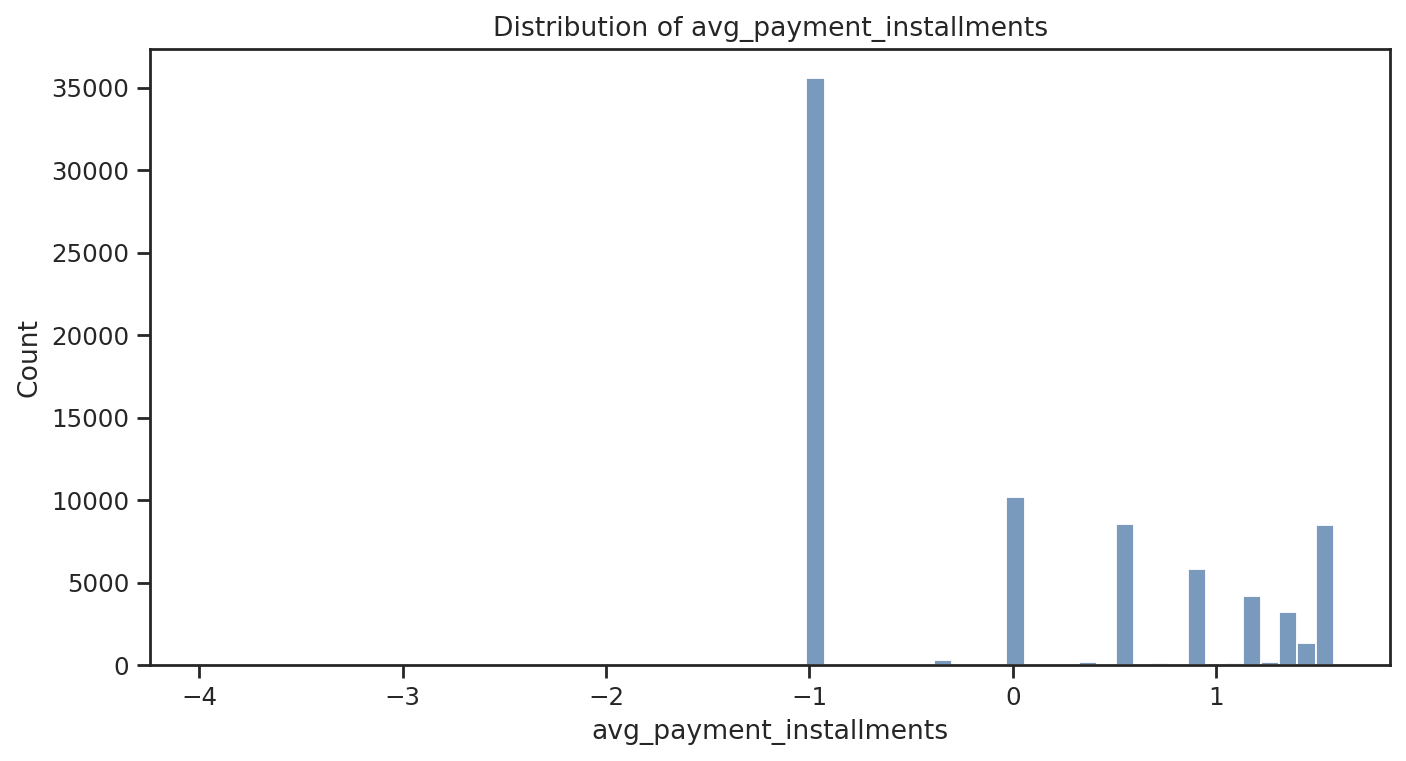

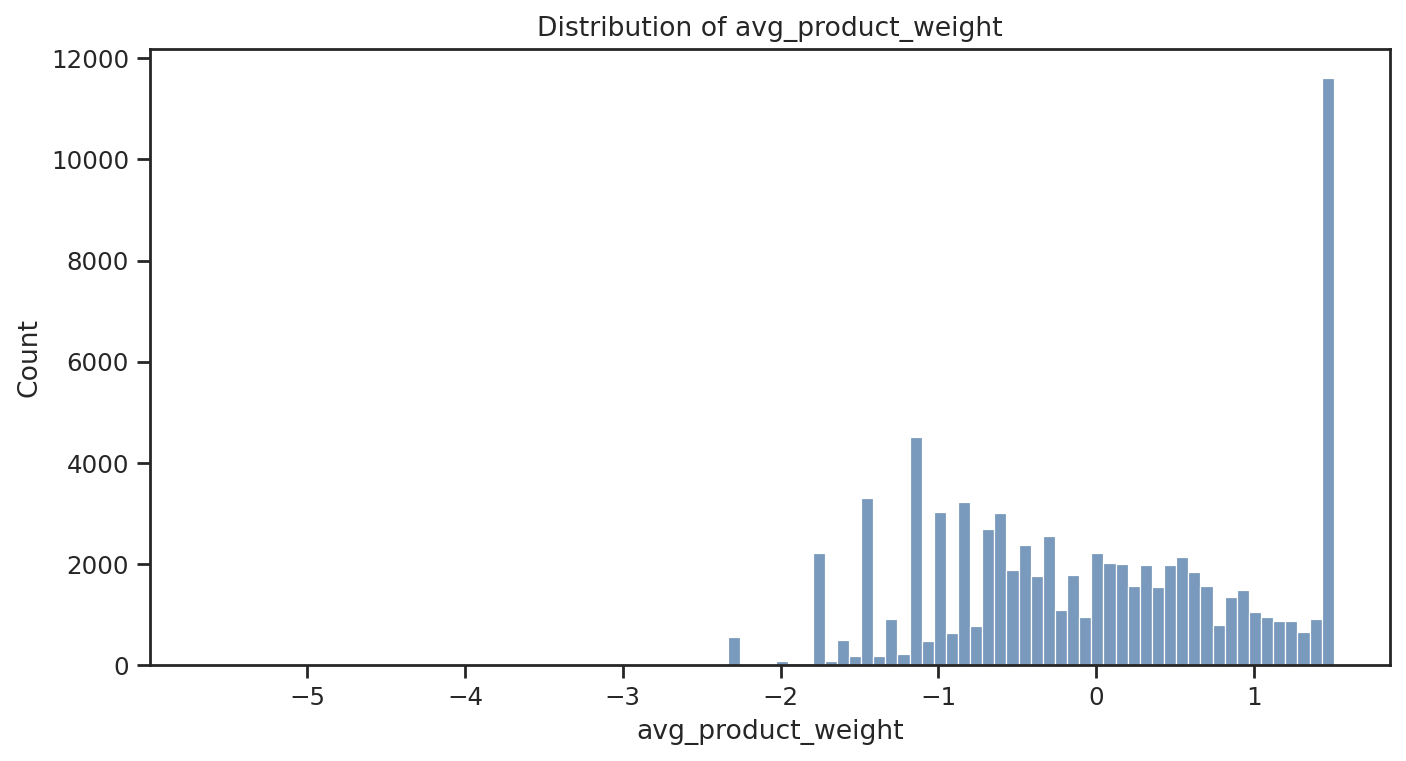

In [ ]:
for col in yj_cols:
    plt.figure(figsize = (10, 5))
    sns.histplot(full_data[col])
    plt.title(f'Distribution of {col}')
    plt.show()

To improve model performance and ensure that numerical features are on a comparable scale, we applied **Yeo-Johnson transformation** to selected continuous variables.

In [ ]:
full_data

customer_unique_id  total_spent  avg_freight_value  \
0      0000366f3b9a7992bf8c76cfdf3221e2     0.354417          -0.865672   
1      0000b849f77a49e4a4ce2b2a4ca5be3f    -1.858364          -1.506050   
2      0000f46a3911fa3c0805444483337064    -0.331094          -0.164307   
3      0000f6ccb0745a6a4b88665a16c9f078    -1.244203          -0.115905   
4      0004aac84e0df4da2b147fca70cf8255     0.812549          -0.203857   
...                                 ...          ...                ...   
78406  fffcf5a5ff07b0908bd4e2dbc735a684     1.708659           1.811767   
78407  fffea47cd6d3cc0a88bd621562a9d061    -0.357230           0.115965   
78408  ffff371b4d645b6ecea244b27531430a     0.032724           0.411935   
78409  ffff5962728ec6157033ef9805bacc48     0.271677           0.005662   
78410  ffffd2657e2aad2907e67c3e9daecbeb    -0.583786          -0.498422   

       avg_product_weight  avg_payment  avg_approval_seconds  \
0                0.497634     0.405904             -0.551441   
1               -0.658069    -1.752041              1.210773   
2                0.497634    -0.279247             -3.684293   
3               -1.421267    -1.168653             -0.412114   
4                1.508391     0.872180             -0.373335   
...                   ...          ...                   ...   
78406            1.508391     1.724171             -0.557654   
78407            0.611669    -0.305073             -0.834364   
78408           -0.266197     0.082511             -0.600294   
78409           -0.517256     0.322410             -0.035545   
78410           -0.604265    -0.528028              1.529838   

       avg_delivery_days  avg_delivery_performance  avg_review_score  \
0              -0.905570                  0.845070          0.811279   
1              -1.800738                  0.845070         -0.702256   
2               1.597448                  1.194867         -1.432296   
3               1.078454                 -0.002669         -0.702256   
4               0.297921                  0.485818          0.811279   
...                  ...                       ...               ...   
78406           1.750423                 -1.892013          0.811279   
78407           1.859889                  1.079667         -0.702256   
78408           0.547784                 -2.277393          0.811279   
78409           0.162075                 -0.249994          0.811279   
78410          -0.485165                 -0.499012          0.811279   

       avg_payment_installments  is_top5_state most_common_payment_type  \
0                      1.535093              1              credit_card   
1                     -0.997684              1              credit_card   
2                      1.535093              0              credit_card   
3                      0.921239              0              credit_card   
4                      1.311773              1              credit_card   
...                         ...            ...                      ...   
78406                  1.576863              0              credit_card   
78407                 -0.997684              0              credit_card   
78408                 -0.997684              0              credit_card   
78409                  1.147494              0              credit_card   
78410                  0.921239              1              credit_card   

       churn num_reviews_bin  is_repeat_buyer  
0          0        1 review                0  
1          0        1 review                0  
2          1        1 review                0  
3          1        1 review                0  
4          1        1 review                0  
...      ...             ...              ...  
78406      1        1 review                0  
78407      1        1 review                0  
78408      1        1 review                0  
78409      0        1 review                0  
78410      1        1 review                0  

[78411 r

## 3.6 One hot encoding

In [ ]:
x = full_data.drop(columns=['customer_unique_id', 'churn'])
y = full_data['churn']


In [ ]:

X_encoded = pd.get_dummies(x, drop_first=True)
X_encoded.head()

total_spent  avg_freight_value  avg_product_weight  avg_payment  \
0     0.354417          -0.865672            0.497634     0.405904   
1    -1.858364          -1.506050           -0.658069    -1.752041   
2    -0.331094          -0.164307            0.497634    -0.279247   
3    -1.244203          -0.115905           -1.421267    -1.168653   
4     0.812549          -0.203857            1.508391     0.872180   

   avg_approval_seconds  avg_delivery_days  avg_delivery_performance  \
0             -0.551441          -0.905570                  0.845070   
1              1.210773          -1.800738                  0.845070   
2             -3.684293           1.597448                  1.194867   
3             -0.412114           1.078454                 -0.002669   
4             -0.373335           0.297921                  0.485818   

   avg_review_score  avg_payment_installments  is_top5_state  is_repeat_buyer  \
0          0.811279                  1.535093              1                0   
1         -0.702256                 -0.997684              1                0   
2         -1.432296                  1.535093              0                0   
3         -0.702256                  0.921239              0                0   
4          0.811279                  1.311773              1                0   

   most_common_payment_type_credit_card  most_common_payment_type_debit_card  \
0                                  True                                False   
1                                  True                                False   
2                                  True                                False   
3                                  True                                False   
4                                  True                                False   

   most_common_payment_type_voucher  num_reviews_bin_1 review  \
0                             False                      True   
1                             False                      True   
2                             False                      True   
3                             False                      True   
4                             False                      True   

   num_reviews_bin_2-3 reviews  num_reviews_bin_4+ reviews  
0                        False                       False  
1                        False                       False  
2                        False                       False  
3                        False                       False  
4                        False                       False

To prepare categorical features for use in machine learning models, we applied **One-Hot Encoding** to convert non-numeric variables into a numerical format.

In [ ]:
X_encoded

total_spent  avg_freight_value  avg_product_weight  avg_payment  \
0         0.354417          -0.865672            0.497634     0.405904   
1        -1.858364          -1.506050           -0.658069    -1.752041   
2        -0.331094          -0.164307            0.497634    -0.279247   
3        -1.244203          -0.115905           -1.421267    -1.168653   
4         0.812549          -0.203857            1.508391     0.872180   
...            ...                ...                 ...          ...   
78406     1.708659           1.811767            1.508391     1.724171   
78407    -0.357230           0.115965            0.611669    -0.305073   
78408     0.032724           0.411935           -0.266197     0.082511   
78409     0.271677           0.005662           -0.517256     0.322410   
78410    -0.583786          -0.498422           -0.604265    -0.528028   

       avg_approval_seconds  avg_delivery_days  avg_delivery_performance  \
0                 -0.551441          -0.905570                  0.845070   
1                  1.210773          -1.800738                  0.845070   
2                 -3.684293           1.597448                  1.194867   
3                 -0.412114           1.078454                 -0.002669   
4                 -0.373335           0.297921                  0.485818   
...                     ...                ...                       ...   
78406             -0.557654           1.750423                 -1.892013   
78407             -0.834364           1.859889                  1.079667   
78408             -0.600294           0.547784                 -2.277393   
78409             -0.035545           0.162075                 -0.249994   
78410              1.529838          -0.485165                 -0.499012   

       avg_review_score  avg_payment_installments  is_top5_state  \
0              0.811279                  1.535093              1   
1             -0.702256                 -0.997684              1   
2             -1.432296                  1.535093              0   
3             -0.702256                  0.921239              0   
4              0.811279                  1.311773              1   
...                 ...                       ...            ...   
78406          0.811279                  1.576863              0   
78407         -0.702256                 -0.997684              0   
78408          0.811279                 -0.997684              0   
78409          0.811279                  1.147494              0   
78410          0.811279                  0.921239              1   

       is_repeat_buyer  most_common_payment_type_credit_card  \
0                    0                                  True   
1                    0                                  True   
2                    0                                  True   
3                    0                                  True   
4                    0                                  True   
...                ...                                   ...   
78406                0                                  True   
78407                0                                  True   
78408                0                                  True   
78409                0                                  True   
78410                0                                  True   

       most_common_payment_type_debit_card  most_common_payment_type_voucher  \
0                                    False                             False   
1                                    False                             False   
2                                    False                             False   
3                                    False                             False   
4                                    False                             False   
...                                    ...                               ...   
78406                                False                 

## 3.7 Variable Selection

## Visualization

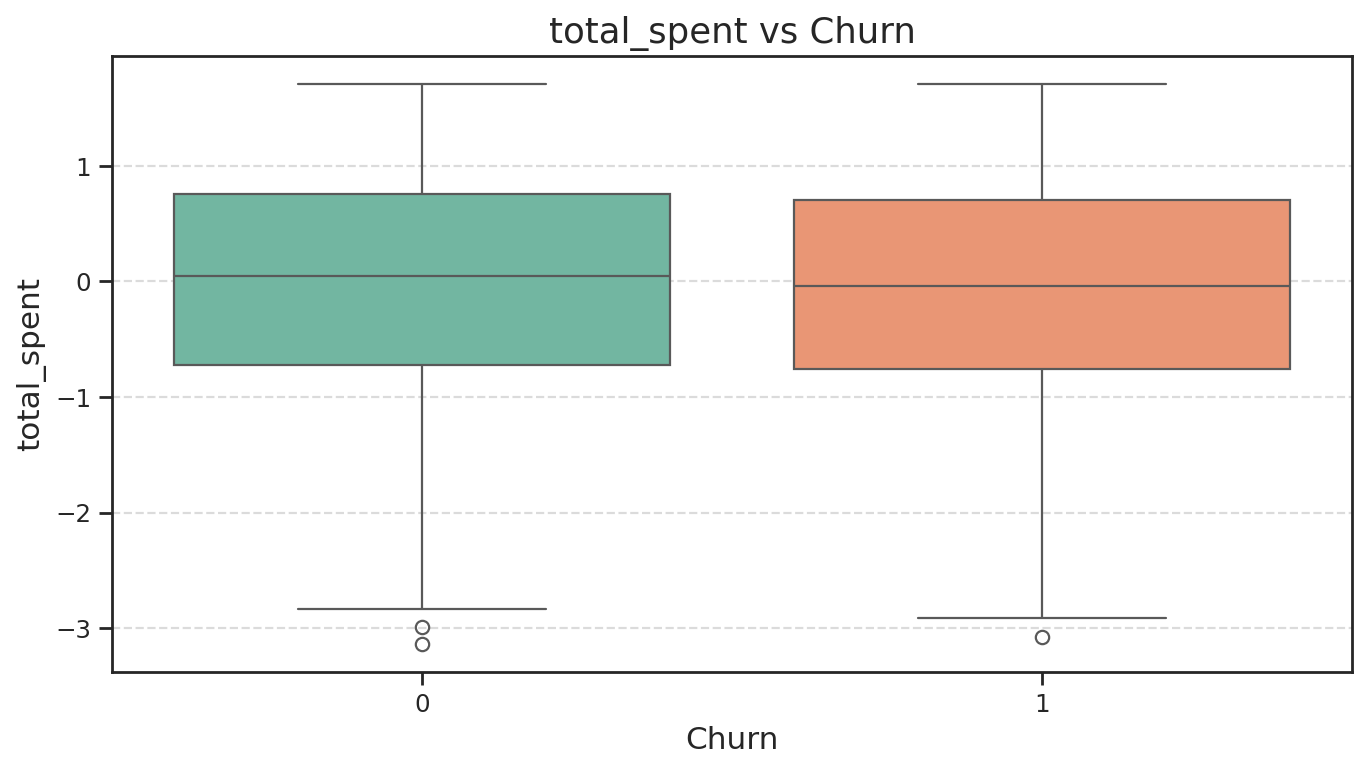

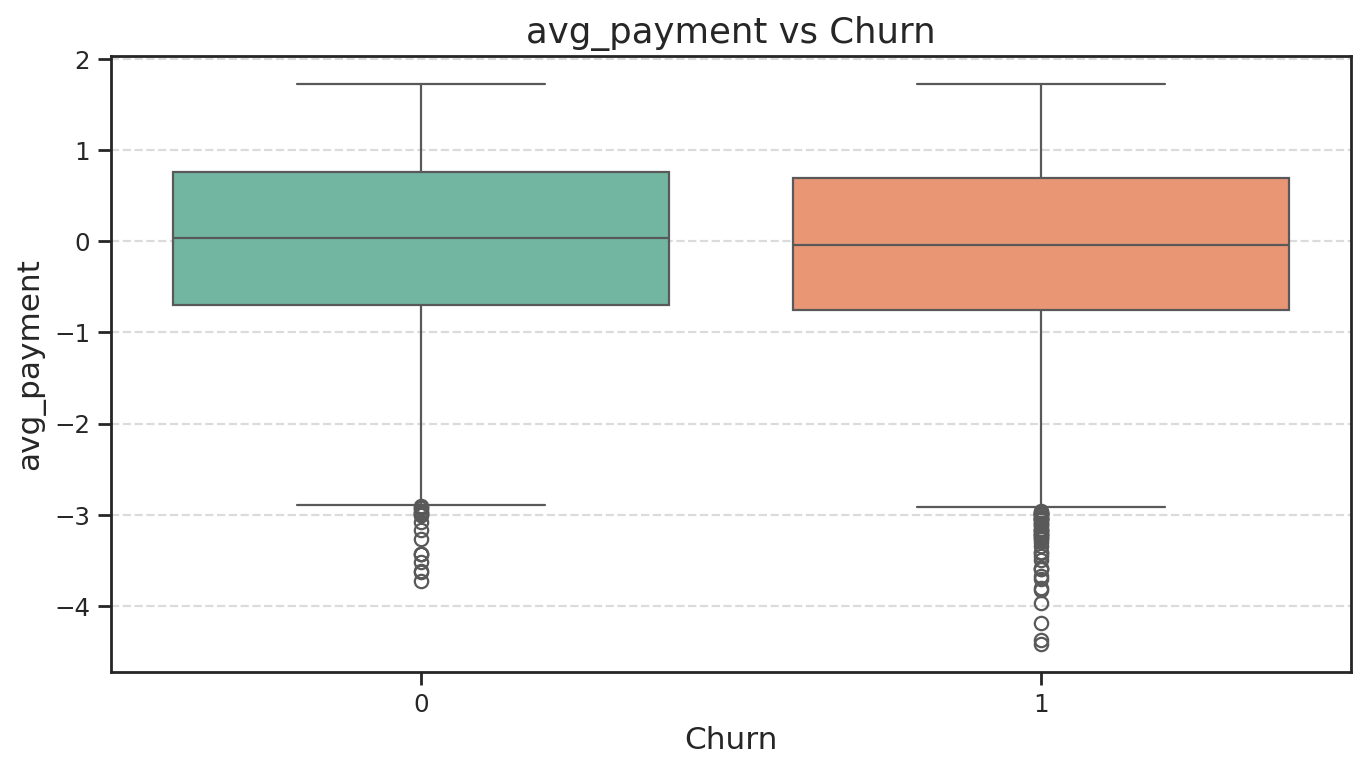

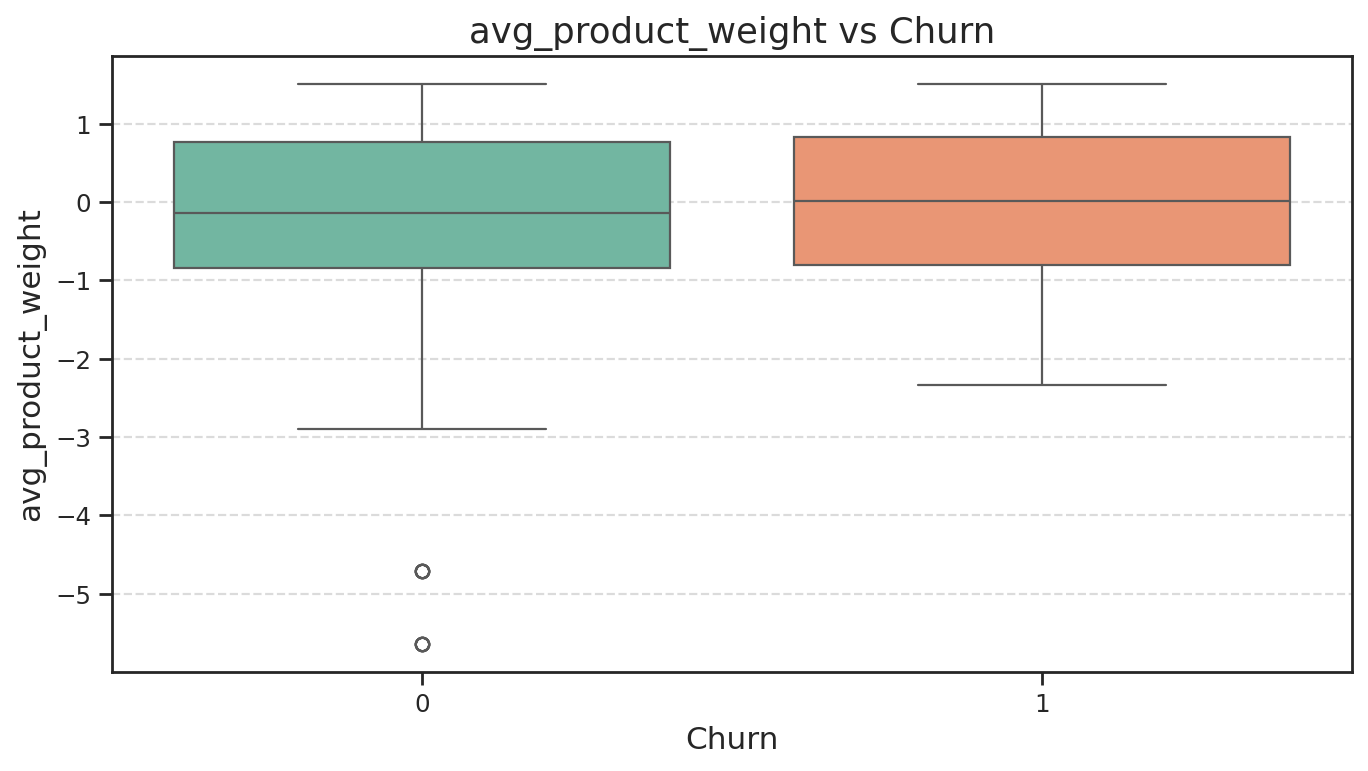

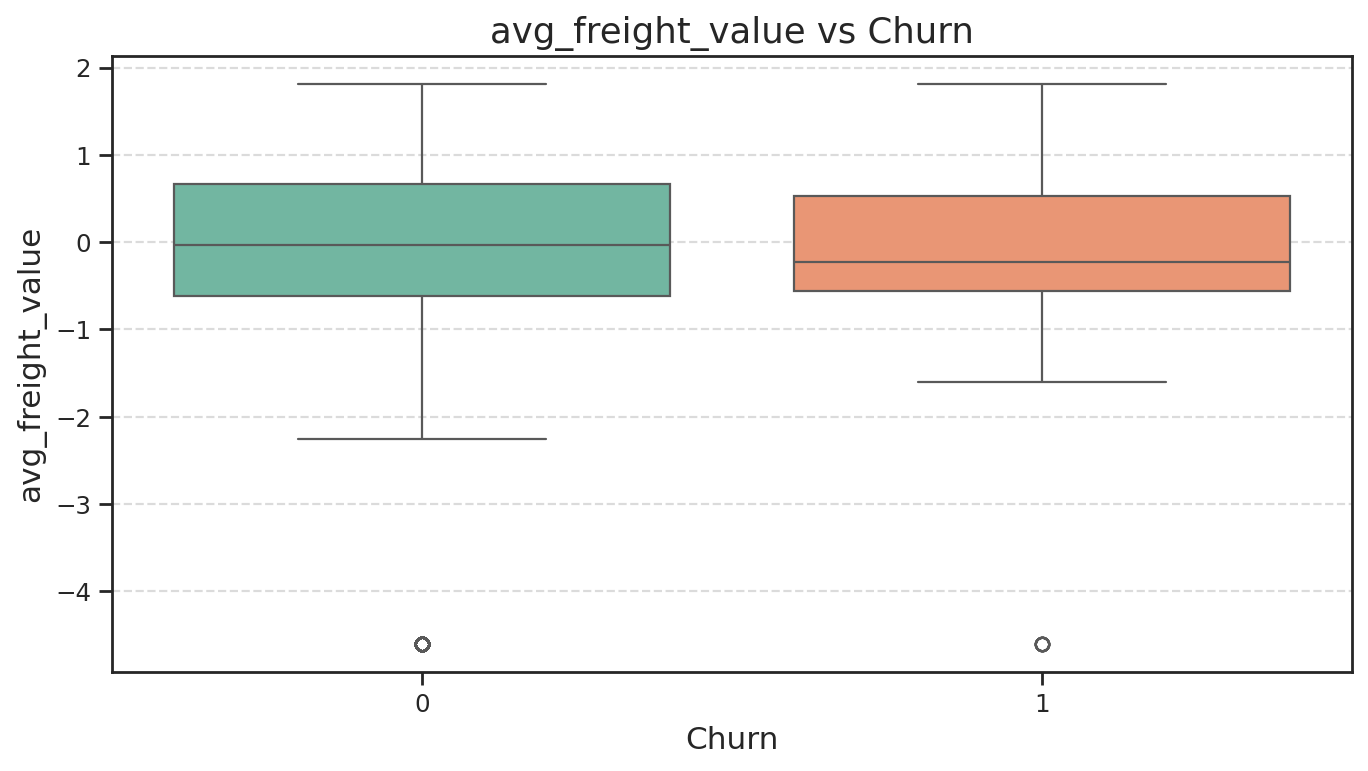

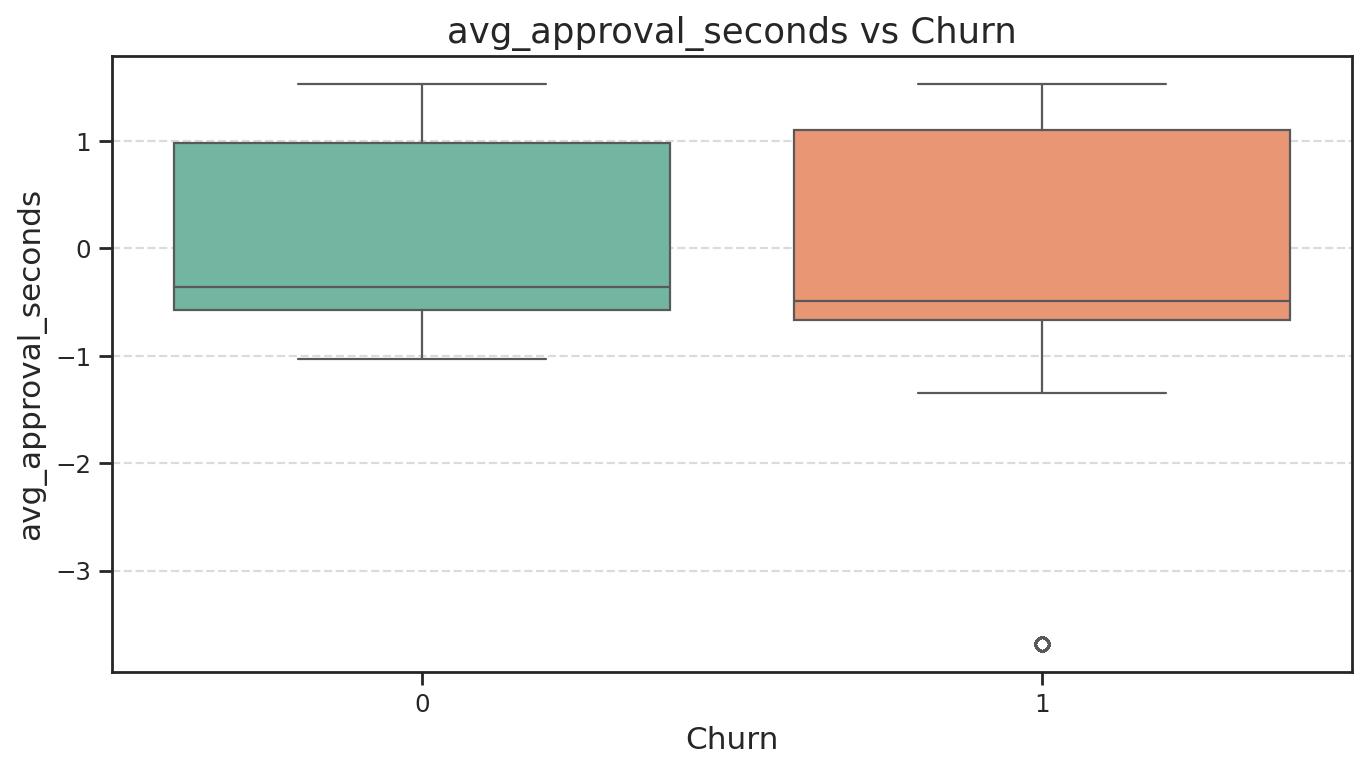

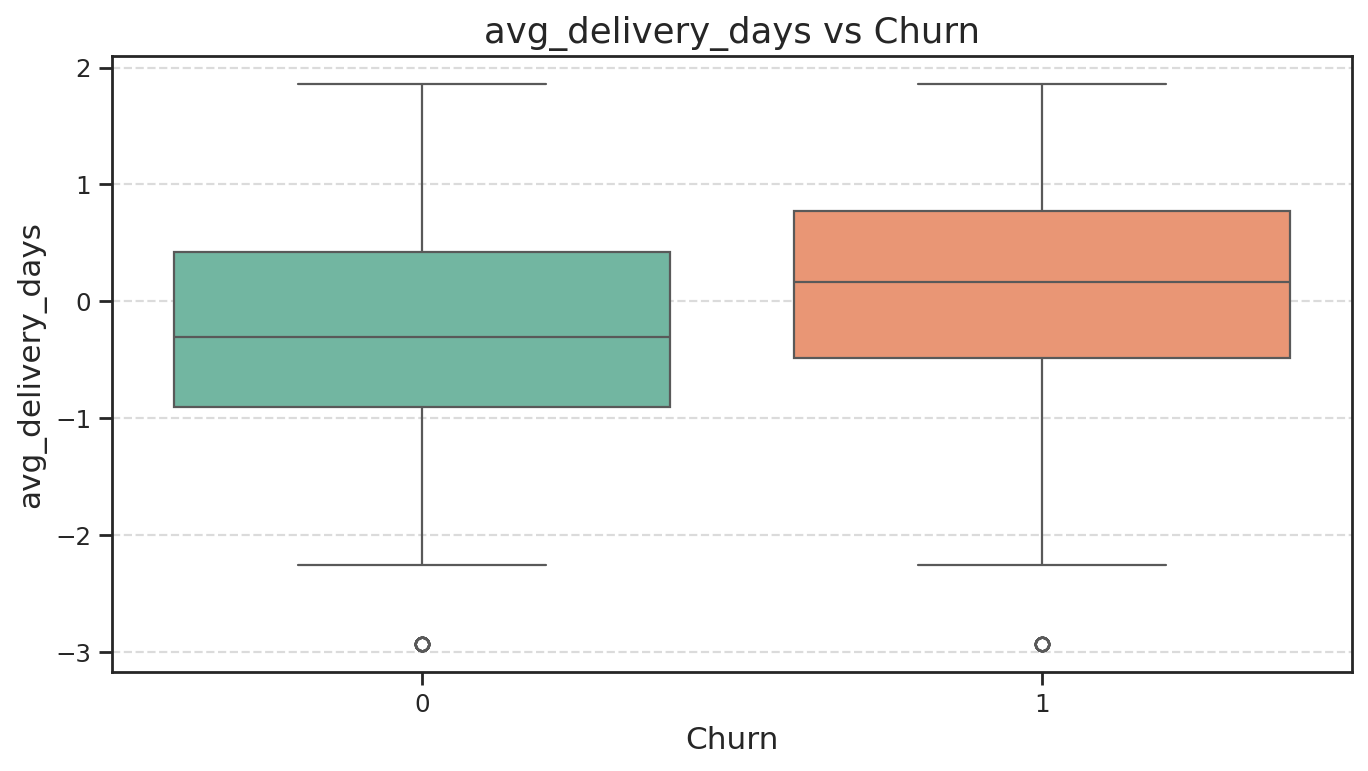

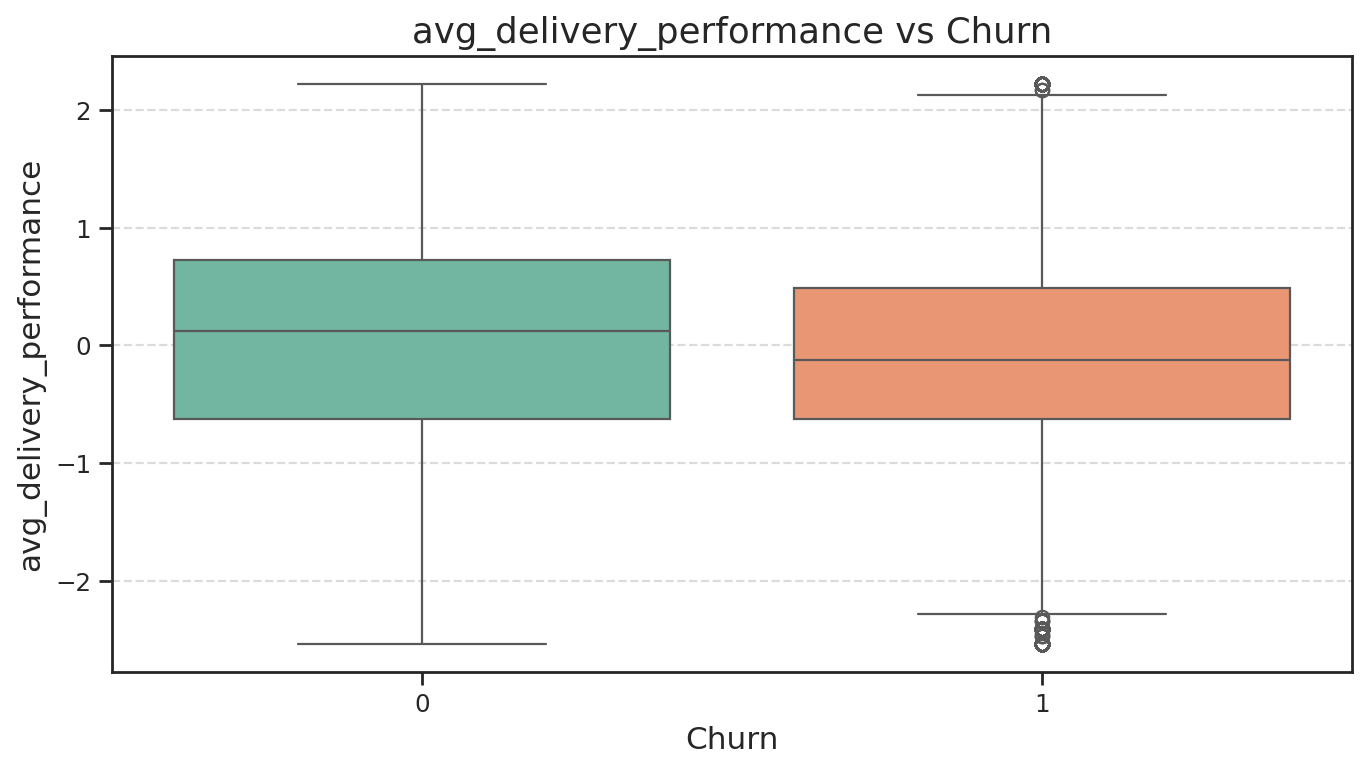

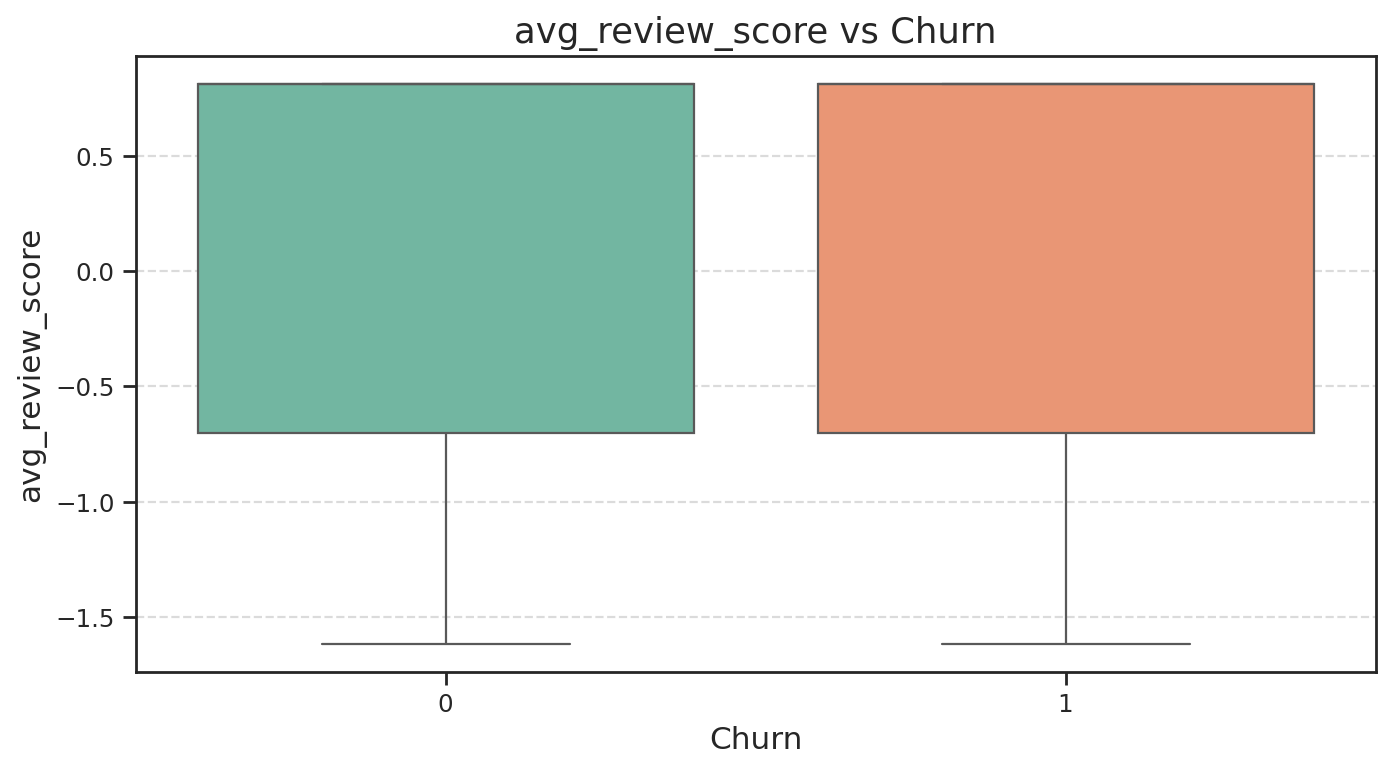

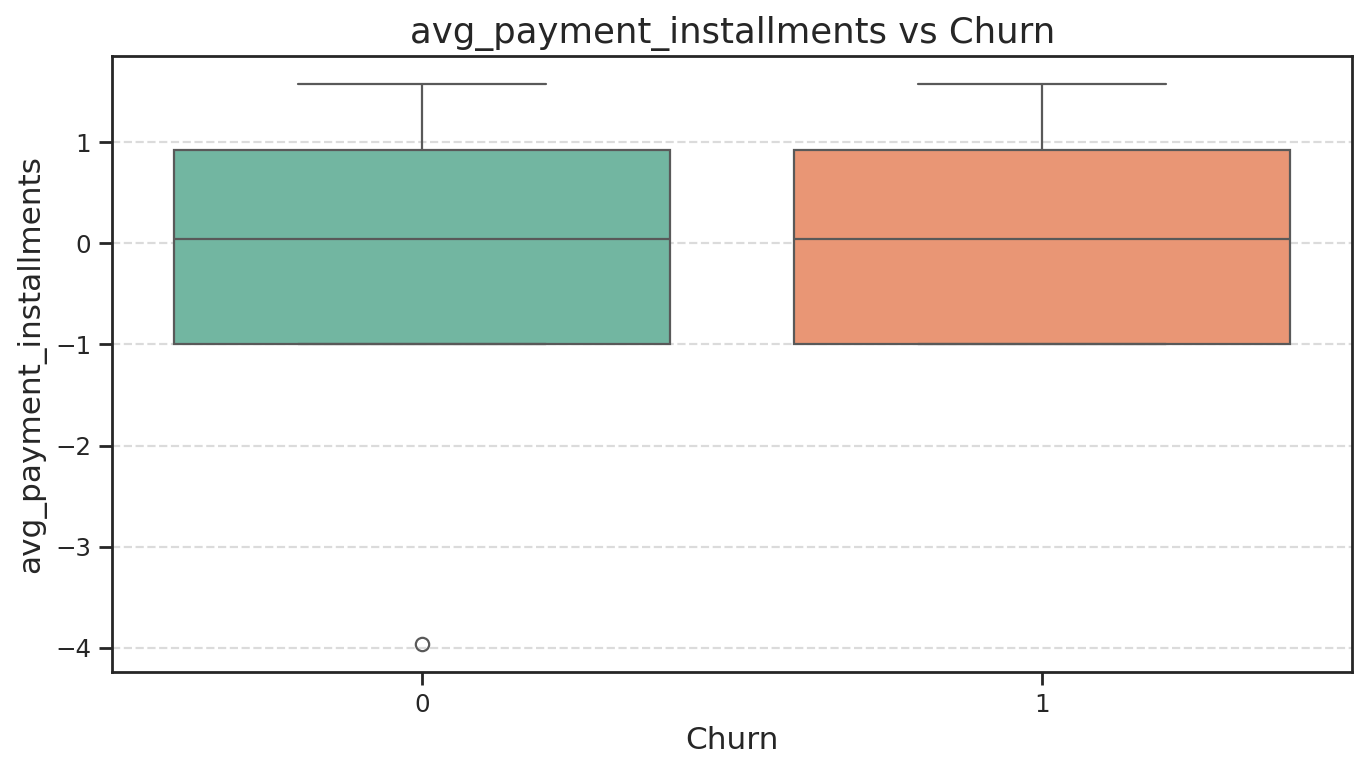

In [ ]:


numeric_cols =   ['total_spent',
    'avg_payment',
    'avg_product_weight',
    'avg_freight_value',
    'avg_approval_seconds',
    'avg_delivery_days',
    'avg_delivery_performance',
    'avg_review_score',
    'avg_payment_installments'
]

for col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=full_data, x='churn', y=col, palette='Set2')
    plt.title(f'{col} vs Churn', fontsize=16)
    plt.xlabel('Churn', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


To reduce overfitting and improve model generalisation, we performed feature selection to
retain only variables with meaningful predictive power. We began by exploring variable
distributions in relation to churn status using box plots for continuous variables and a bar
chart for categorical variables. The box plot reveals that average freight value tends to be
slightly lower for churned customers compared to active ones. While the median difference
is subtle, the overall distribution shows churned users incur slightly less freight cost, possibly
indicating lower engagement or fewer purchases.Similarly, average delivery days is higher
among churned customers, suggesting longer delivery times might contribute to
dissatisfaction and churn.

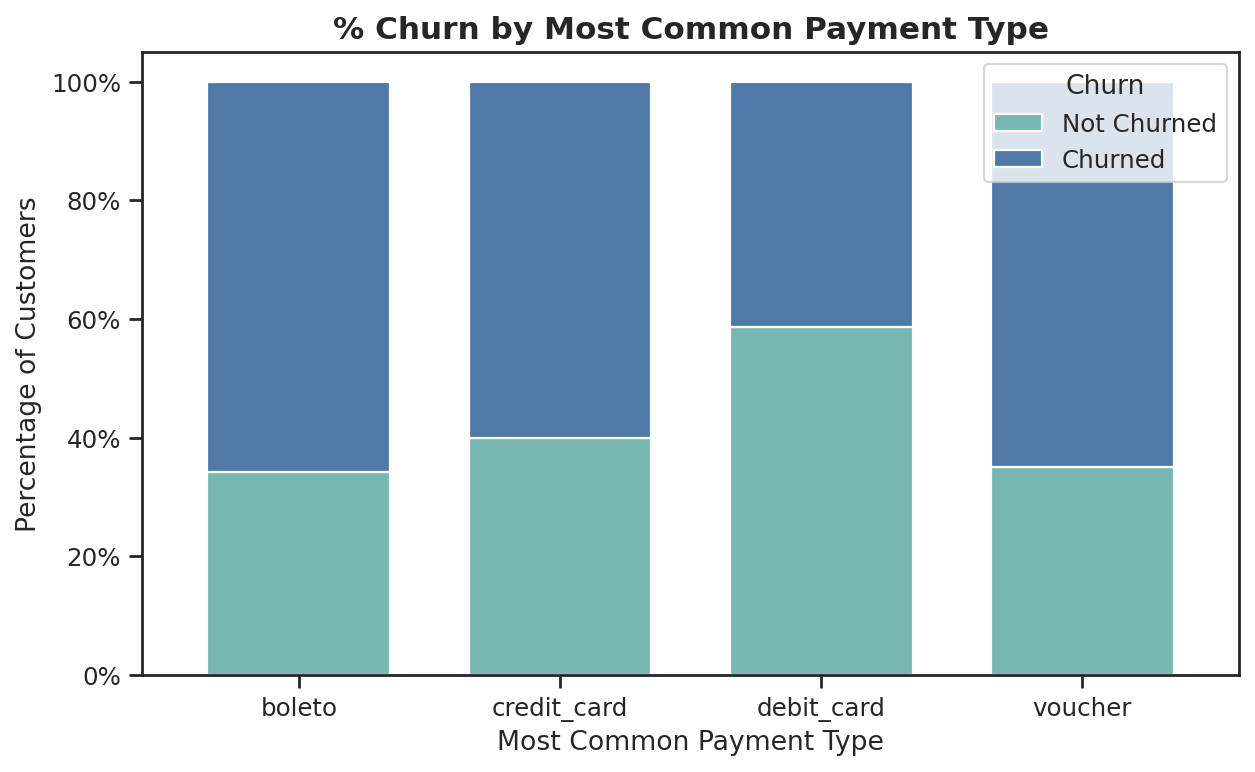

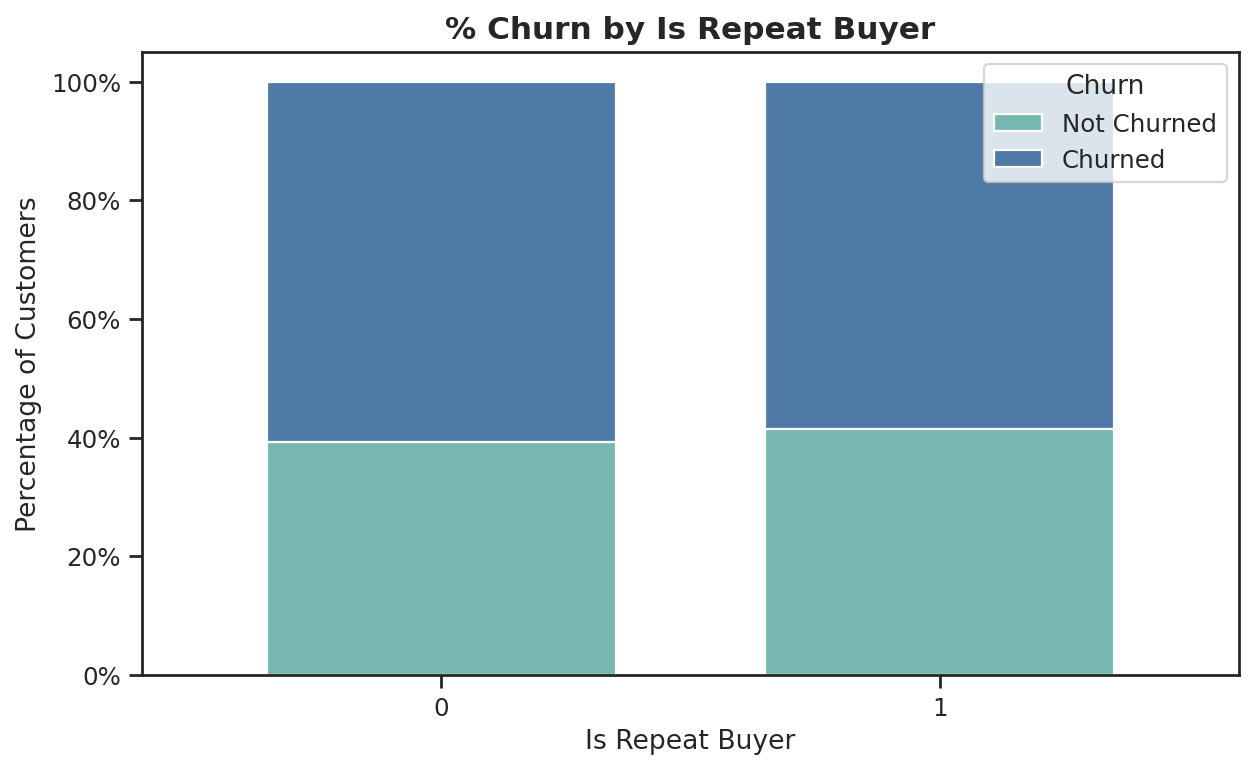

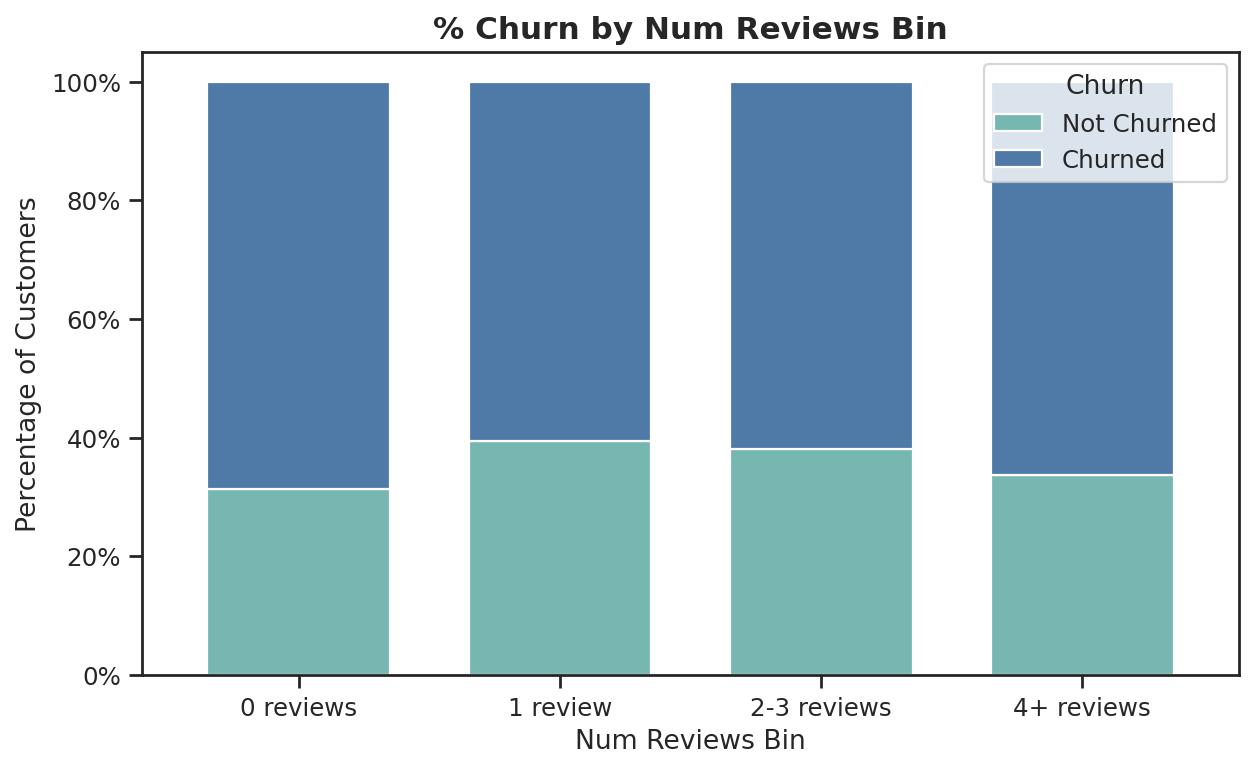

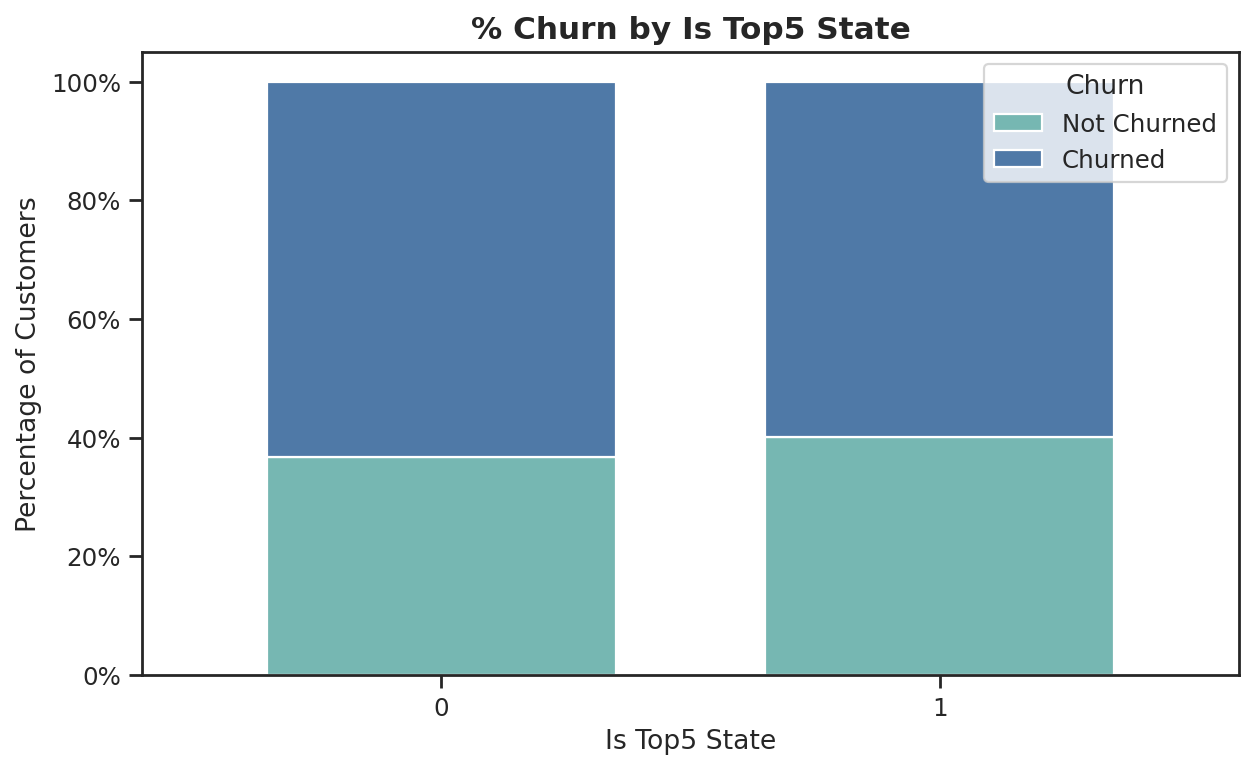

In [ ]:

cat_cols = ['most_common_payment_type', 'is_repeat_buyer', 'num_reviews_bin', 'is_top5_state']


full_data['churn'] = full_data['churn'].astype(int)


for col in cat_cols:
    full_data[col] = full_data[col].astype('category')


for col in cat_cols:
    pct = pd.crosstab(full_data[col], full_data['churn'], normalize='index') * 100
    pct.columns = ['Not Churned','Churned']

    pct.plot(
        kind='bar',
        stacked=True,
        figsize=(8,5),
        color=['#76B7B2', '#4f79a7'],
        width=0.7
    )
    plt.title(f'% Churn by {col.replace("_"," ").title()}', fontsize=14, fontweight='bold')
    plt.xlabel(col.replace('_',' ').title(), fontsize=12)
    plt.ylabel('Percentage of Customers', fontsize=12)
    plt.legend(loc='upper right', fontsize=11, title='Churn')
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda v, _: f"{v:.0f}%"))
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()



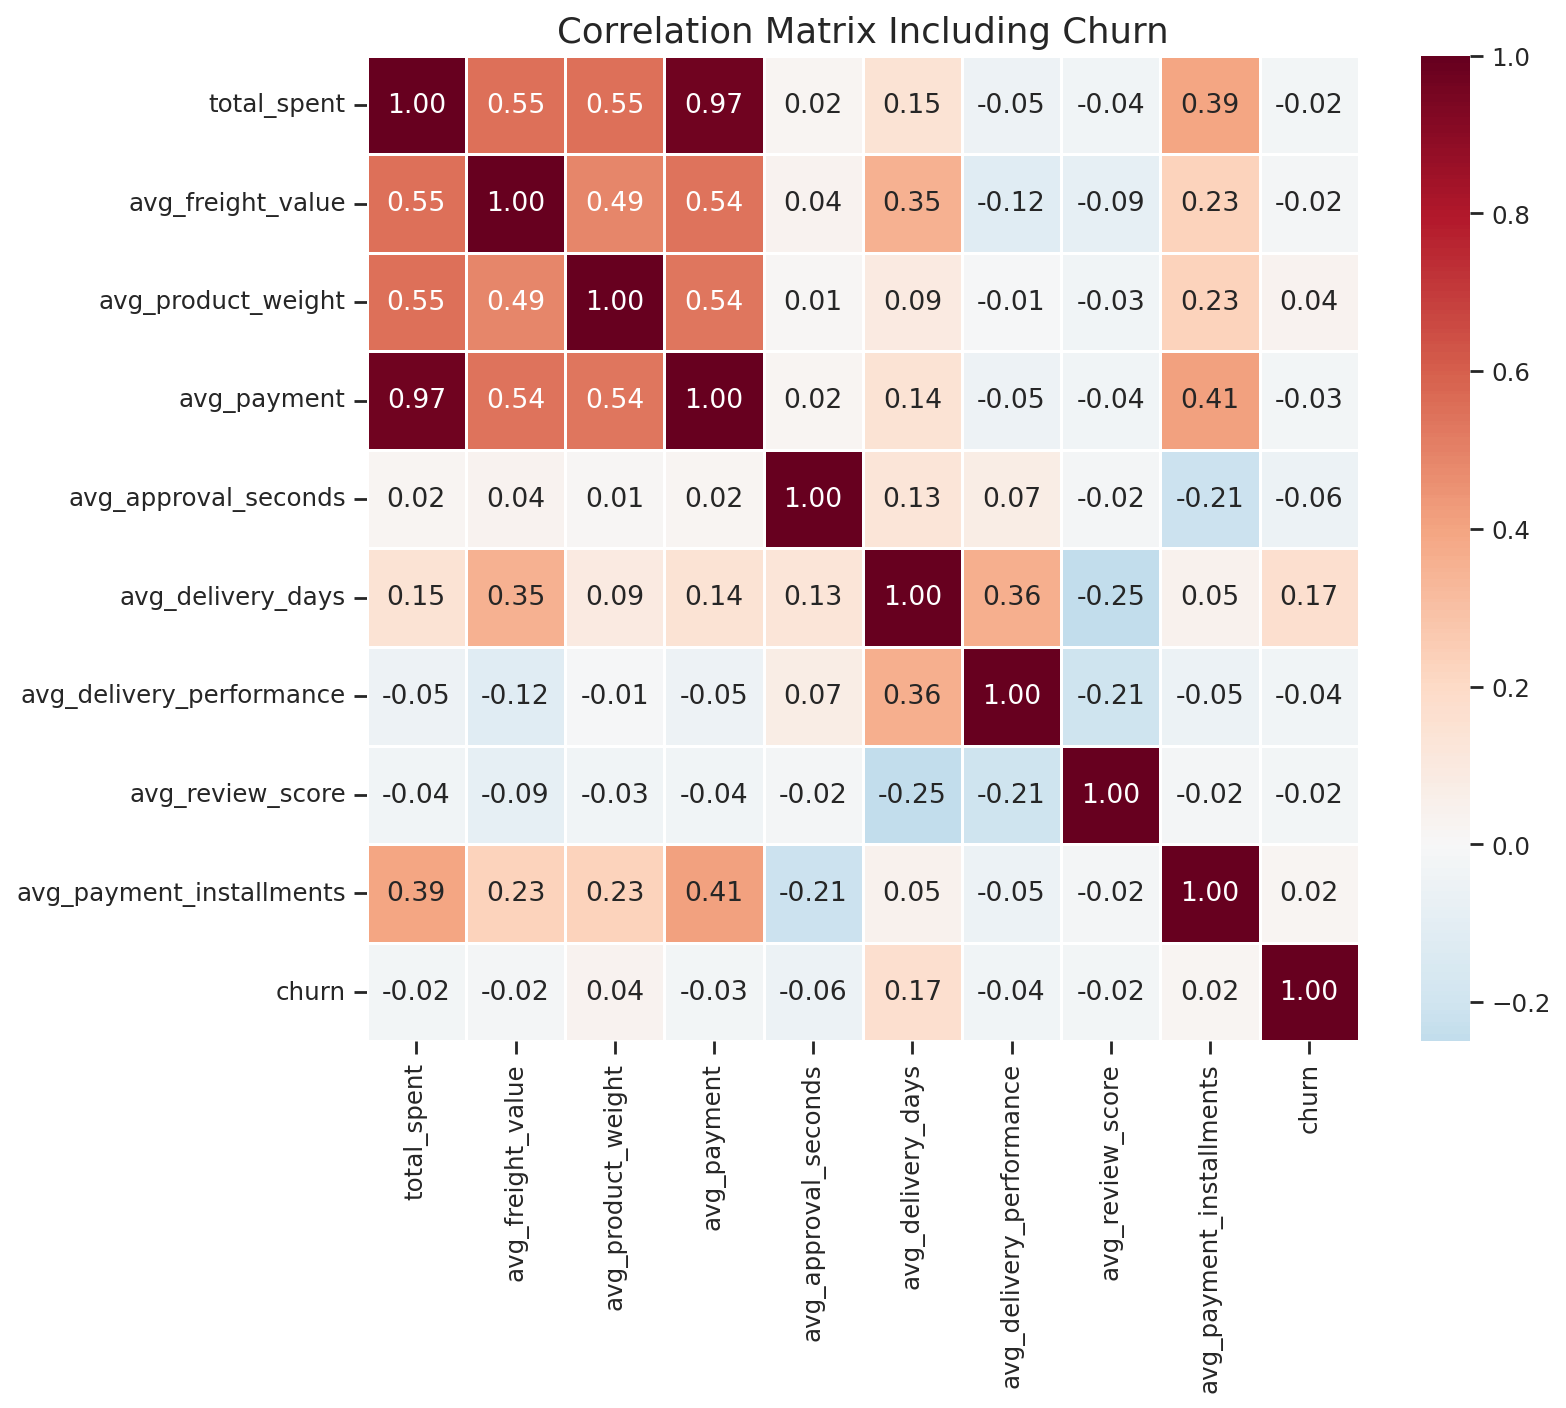

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


num_cols = full_data.select_dtypes(include='number').columns

corr = full_data[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='RdBu_r',
    center=0,
    linewidths=0.5
)
plt.title('Correlation Matrix Including Churn', fontsize=16)
plt.show()


The correlation matrix confirms that average delivery days shows the strongest linear
association with churn (correlation = 0.17), while other variables, such as average freight
value and average approval seconds, show weak correlations. Notably, average review
score and average delivery performance show negative correlations, indicating that poor
delivery or review experiences might increase the likelihood of churn. However, linear
correlation only captures direct, linear dependencies and may fail to detect complex
relationships. Thus, we proceeded with mutual information analysis.

## Filter methods (univariate statistics)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
np.random.seed(1)


# Compute mutual information
mi = mutual_info_classif(X_encoded, y, discrete_features='auto', random_state=42)

mi_series = pd.Series(mi, index=X_encoded.columns).sort_values(ascending=False)
mi_series

avg_freight_value                       0.217793
total_spent                             0.203017
avg_payment                             0.192882
avg_approval_seconds                    0.029834
avg_product_weight                      0.028554
avg_delivery_days                       0.020033
num_reviews_bin_1 review                0.013223
most_common_payment_type_credit_card    0.010318
avg_delivery_performance                0.009971
is_top5_state                           0.009647
most_common_payment_type_debit_card     0.002871
num_reviews_bin_4+ reviews              0.001944
avg_review_score                        0.001644
avg_payment_installments                0.000626
num_reviews_bin_2-3 reviews             0.000622
most_common_payment_type_voucher        0.000545
is_repeat_buyer                         0.000000
dtype: float64

To identify non-linear relationships, we applied
mutual information (MI). The top predictors were:
-  avg_freight_value (MI = 0.217)
- total_spent (MI = 0.203)
-  avg_payment (MI = 0.193).

These variables capture a broader spectrum of
behavioural and financial signals, highlighting
their importance in predicting churn. On the other
hand, the number of reviews with a score above
4, captured by the feature num_reviews_bin_4+
showed an MI of 0 and failed the
VarianceThreshold check (variance < 0.01),
indicating it contributes no useful information.
Consequently, this variable was dropped from the
final model.

In [ ]:
from sklearn.feature_selection import VarianceThreshold
np.random.seed(1)

vt = VarianceThreshold(threshold=0.01)


X_vt = vt.fit_transform(X_encoded)


selected_cols = X_encoded.columns[vt.get_support()]

print("Removed columns:", list(X_encoded.columns[~vt.get_support()]))
print("Remaining columns:", list(selected_cols))


Removed columns: ['num_reviews_bin_4+ reviews']
Remaining columns: ['total_spent', 'avg_freight_value', 'avg_product_weight', 'avg_payment', 'avg_approval_seconds', 'avg_delivery_days', 'avg_delivery_performance', 'avg_review_score', 'avg_payment_installments', 'is_top5_state', 'is_repeat_buyer', 'most_common_payment_type_credit_card', 'most_common_payment_type_debit_card', 'most_common_payment_type_voucher', 'num_reviews_bin_1 review', 'num_reviews_bin_2-3 reviews']


In [ ]:
X_encoded = X_encoded.drop('num_reviews_bin_4+ reviews', axis=1)


In [ ]:
X_encoded

total_spent  avg_freight_value  avg_product_weight  avg_payment  \
0         0.354417          -0.865672            0.497634     0.405904   
1        -1.858364          -1.506050           -0.658069    -1.752041   
2        -0.331094          -0.164307            0.497634    -0.279247   
3        -1.244203          -0.115905           -1.421267    -1.168653   
4         0.812549          -0.203857            1.508391     0.872180   
...            ...                ...                 ...          ...   
78406     1.708659           1.811767            1.508391     1.724171   
78407    -0.357230           0.115965            0.611669    -0.305073   
78408     0.032724           0.411935           -0.266197     0.082511   
78409     0.271677           0.005662           -0.517256     0.322410   
78410    -0.583786          -0.498422           -0.604265    -0.528028   

       avg_approval_seconds  avg_delivery_days  avg_delivery_performance  \
0                 -0.551441          -0.905570                  0.845070   
1                  1.210773          -1.800738                  0.845070   
2                 -3.684293           1.597448                  1.194867   
3                 -0.412114           1.078454                 -0.002669   
4                 -0.373335           0.297921                  0.485818   
...                     ...                ...                       ...   
78406             -0.557654           1.750423                 -1.892013   
78407             -0.834364           1.859889                  1.079667   
78408             -0.600294           0.547784                 -2.277393   
78409             -0.035545           0.162075                 -0.249994   
78410              1.529838          -0.485165                 -0.499012   

       avg_review_score  avg_payment_installments  is_top5_state  \
0              0.811279                  1.535093              1   
1             -0.702256                 -0.997684              1   
2             -1.432296                  1.535093              0   
3             -0.702256                  0.921239              0   
4              0.811279                  1.311773              1   
...                 ...                       ...            ...   
78406          0.811279                  1.576863              0   
78407         -0.702256                 -0.997684              0   
78408          0.811279                 -0.997684              0   
78409          0.811279                  1.147494              0   
78410          0.811279                  0.921239              1   

       is_repeat_buyer  most_common_payment_type_credit_card  \
0                    0                                  True   
1                    0                                  True   
2                    0                                  True   
3                    0                                  True   
4                    0                                  True   
...                ...                                   ...   
78406                0                                  True   
78407                0                                  True   
78408                0                                  True   
78409                0                                  True   
78410                0                                  True   

       most_common_payment_type_debit_card  most_common_payment_type_voucher  \
0                                    False                             False   
1                                    False                             False   
2                                    False                             False   
3                                    False                             False   
4                                    False                             False   
...                                    ...                               ...   
78406                                False                 

# 4. Model Fitting

## 4.1 train-test split

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import (
    classification_report,
    ConfusionMatrixDisplay,
    confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    classification_report,
    accuracy_score
)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)
X_train_before = X_encoded_before.loc[X_train.index]
X_test_before  = X_encoded_before.loc[X_test.index]
y_train_before = y_before.loc[y_train.index]
y_test_before  = y_before.loc[y_test.index]

To evaluate model performance on unseen data, we partitioned the dataset using an **80/20 train-test split**:

## 4.2 Logistic Regression

### 4.2.1 Before feature engineering

In [ ]:
# fit on the data before feature engineering
logistic_before = LogisticRegression(
    solver="lbfgs",
    class_weight="balanced",
    random_state=42,
    max_iter=1000
)
model_logistic_before = logistic_before.fit(X_train_before, y_train_before)


y_pred_proba_before = model_logistic_before.predict_proba(X_test_before)[:, 1]
y_pred_before       = model_logistic_before.predict(X_test_before)

# evaluate
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("=== BEFORE Model ===")
print(classification_report(y_test_before, y_pred_before, digits=4))
print(f"ROC AUC: {roc_auc_score(y_test_before, y_pred_proba_before):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test_before, y_pred_before))



=== BEFORE Model ===
              precision    recall  f1-score   support

           0     0.4932    0.5944    0.5391      6164
           1     0.6971    0.6045    0.6475      9519

    accuracy                         0.6005     15683
   macro avg     0.5952    0.5994    0.5933     15683
weighted avg     0.6170    0.6005    0.6049     15683

ROC AUC: 0.6397
Confusion Matrix:
 [[3664 2500]
 [3765 5754]]


In [ ]:
logistic_before = {
    'model':              'Logistic Regression before feature engineering',

    # test metrics (on X_test_before / y_test_before)
    'test_accuracy':      accuracy_score(y_test_before,  y_pred_before),
    'test_precision':     precision_score(y_test_before,  y_pred_before),
    'test_recall':        recall_score(y_test_before,     y_pred_before),
    'test_f1':            f1_score(y_test_before,        y_pred_before),
    'test_roc_auc':       roc_auc_score(y_test_before,     y_pred_proba_before),
}

logistic_before


{'model': 'Logistic Regression before feature engineering',
 'test_accuracy': 0.6005228591468469,
 'test_precision': 0.6971165495517325,
 'test_recall': 0.6044752600063031,
 'test_f1': 0.6474990153603781,
 'test_roc_auc': np.float64(0.6397227574292311)}

In [ ]:
# Fit on the AFTER feature engineering dataset
logistic_after = LogisticRegression(
    solver="lbfgs",
    class_weight="balanced",
    random_state=42,
    max_iter=1000
)
model_logistic_after = logistic_after.fit(X_train, y_train)


y_pred_proba_after = model_logistic_after.predict_proba(X_test)[:, 1]
y_pred_after       = model_logistic_after.predict(X_test)



print("=== AFTER Model ===")
print(classification_report(y_test, y_pred_after, digits=4))
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_after):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_after))


=== AFTER Model ===
              precision    recall  f1-score   support

           0     0.5292    0.6090    0.5663      6164
           1     0.7194    0.6491    0.6825      9519

    accuracy                         0.6334     15683
   macro avg     0.6243    0.6291    0.6244     15683
weighted avg     0.6446    0.6334    0.6368     15683

ROC AUC: 0.6667
Confusion Matrix:
 [[3754 2410]
 [3340 6179]]


### 4.2.2 After feature engineering

In [ ]:
logistic_after = {
    'model':            'Logistic Regression after feature engineering',

    # test metrics (on AFTER test set)
    'test_accuracy':    accuracy_score(y_test,           y_pred_after),
    'test_precision':   precision_score(y_test,          y_pred_after),
    'test_recall':      recall_score(y_test,             y_pred_after),
    'test_f1':          f1_score(y_test,                 y_pred_after),
    'test_roc_auc':     roc_auc_score(y_test,           y_pred_proba_after),
}
logistic_after

{'model': 'Logistic Regression after feature engineering',
 'test_accuracy': 0.6333609641012561,
 'test_precision': 0.7194085458144138,
 'test_recall': 0.6491228070175439,
 'test_f1': 0.6824607908106914,
 'test_roc_auc': np.float64(0.6667224143195559)}

In [ ]:


df_feature_engineering = pd.DataFrame([logistic_before, logistic_after]).set_index('model')

df_feature_engineering

test_accuracy  test_precision  \
model                                                                           
Logistic Regression before feature engineering       0.600523        0.697117   
Logistic Regression after feature engineering        0.633361        0.719409   

                                                test_recall   test_f1  \
model                                                                   
Logistic Regression before feature engineering     0.604475  0.647499   
Logistic Regression after feature engineering      0.649123  0.682461   

                                                test_roc_auc  
model                                                         
Logistic Regression before feature engineering      0.639723  
Logistic Regression after feature engineering       0.666722

After feature engineering, the Logistic Regression model **significantly outperformed its earlier version**.

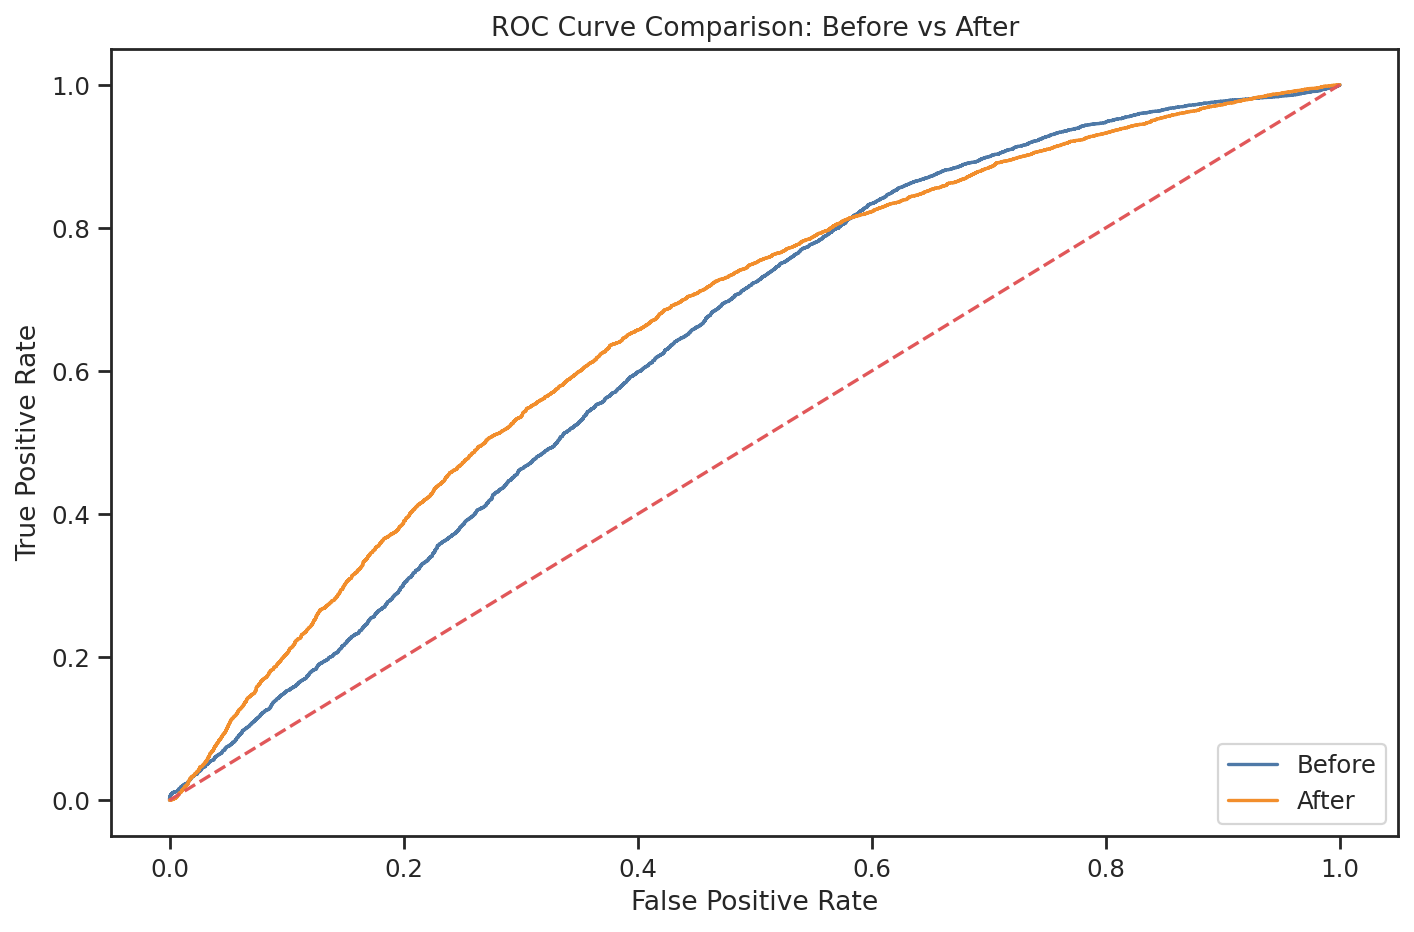

In [ ]:
fpr_b, tpr_b, _ = roc_curve(y_test_before, y_pred_proba_before)
fpr_a, tpr_a, _ = roc_curve(y_test, y_pred_proba_after)

plt.figure()
plt.plot(fpr_b, tpr_b, label='Before')
plt.plot(fpr_a, tpr_a, label='After')
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: Before vs After")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

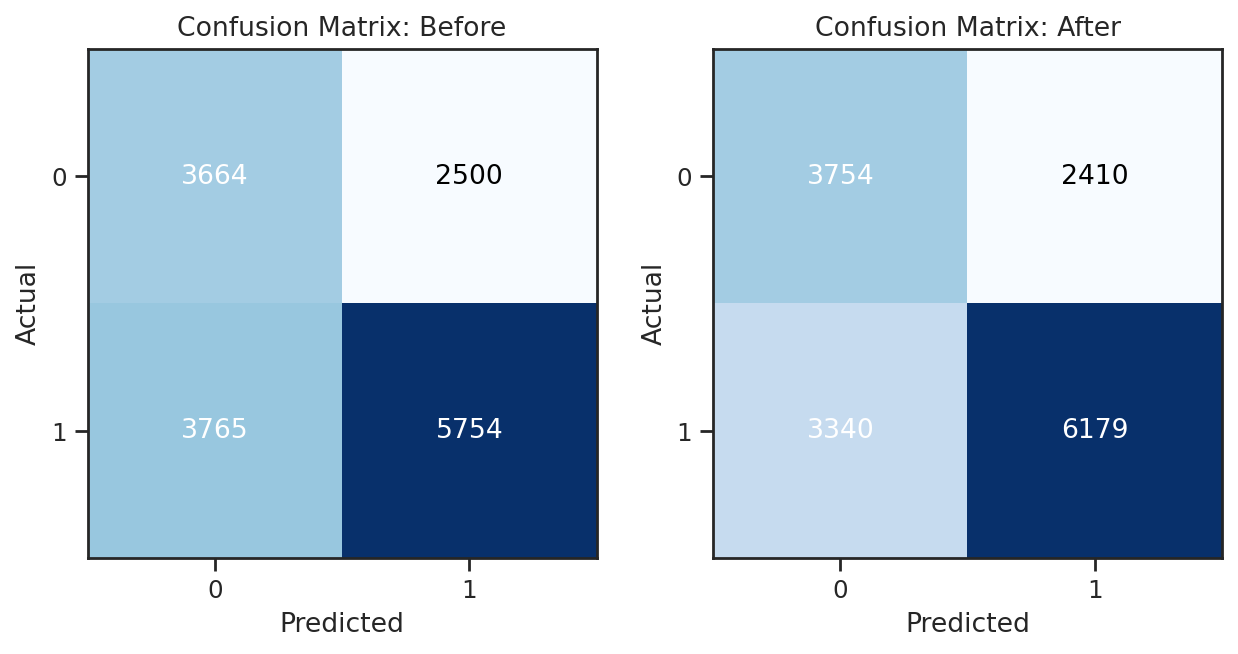

In [ ]:
cm_before = confusion_matrix(y_test_before, y_pred_before)
cm_after  = confusion_matrix(y_test,        y_pred_after)

# Plot side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for ax, cm, title in zip(axes, [cm_before, cm_after], ['Before', 'After']):
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.set_title(f'Confusion Matrix: {title}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    for i in range(2):
        for j in range(2):
            color = 'white' if cm[i, j] > cm.max() / 2 else 'black'
            ax.text(j, i, cm[i, j], ha='center', va='center', color=color)

plt.tight_layout()
plt.show()


In [ ]:


#  Grid-search over C and penalty
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
}

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=10_000),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)





Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:

best_C = grid.best_params_['C']


#  Fit L2-regularized model
logistic_l2_model = LogisticRegression(
    C=best_C,
    penalty='l2',
    solver='liblinear',
    random_state=42,
    max_iter=10_000
).fit(X_train, y_train)

y_pred_logistic_l2_train = logistic_l2_model.predict(X_train)
y_proba_logistic_l2_train = logistic_l2_model.predict_proba(X_train)[:, 1]
y_pred_logistic_l2  = logistic_l2_model.predict(X_test)
y_proba_logistic_l2 = logistic_l2_model.predict_proba(X_test)[:, 1]

print("\n=== Classification Report (Logistic L2) ===")
print(classification_report(y_test, y_pred_logistic_l2))


=== Classification Report (Logistic L2) ===
              precision    recall  f1-score   support

           0       0.62      0.33      0.43      6164
           1       0.67      0.87      0.75      9519

    accuracy                           0.66     15683
   macro avg       0.64      0.60      0.59     15683
weighted avg       0.65      0.66      0.63     15683



In [ ]:

logistic_l2 = {
    'model':              'Logistic Regression (L2)',

    # train metrics
    'train_accuracy':     accuracy_score(y_train, y_pred_logistic_l2_train),
    'train_precision':    precision_score(y_train, y_pred_logistic_l2_train),
    'train_recall':       recall_score(y_train, y_pred_logistic_l2_train),
    'train_f1':           f1_score(y_train, y_pred_logistic_l2_train),
    'train_roc_auc':      roc_auc_score(y_train, y_proba_logistic_l2_train),

    # test metrics
    'test_accuracy':      accuracy_score(y_test, y_pred_logistic_l2),
    'test_precision':     precision_score(y_test, y_pred_logistic_l2),
    'test_recall':        recall_score(y_test, y_pred_logistic_l2),
    'test_f1':            f1_score(y_test, y_pred_logistic_l2),
    'test_roc_auc':       roc_auc_score(y_test, y_proba_logistic_l2),
}
logistic_l2

{'model': 'Logistic Regression (L2)',
 'train_accuracy': 0.6627024614207372,
 'train_precision': 0.6726905170301397,
 'train_recall': 0.8652815717587728,
 'train_f1': 0.7569275309039106,
 'train_roc_auc': np.float64(0.6730106326085389),
 'test_accuracy': 0.6566983357775936,
 'test_precision': 0.6674224633573569,
 'test_recall': 0.8658472528626957,
 'test_f1': 0.7537955002743735,
 'test_roc_auc': np.float64(0.667373763692261)}

In [ ]:



intercept = logistic_l2_model.intercept_[0]
coefs     = logistic_l2_model.coef_[0]

coef_series = pd.Series(coefs, index=X_train.columns)


coef_series = coef_series.sort_values(ascending=False)

print("Intercept:", intercept)
print("\nFeature coefficients (log-odds impact):")
print(coef_series)


Intercept: 1.189194493196557

Feature coefficients (log-odds impact):
avg_delivery_days                       0.650721
avg_product_weight                      0.256108
avg_payment_installments                0.121195
is_top5_state                           0.089613
avg_review_score                        0.000821
num_reviews_bin_2-3 reviews            -0.000936
avg_payment                            -0.010001
total_spent                            -0.097406
num_reviews_bin_1 review               -0.170809
is_repeat_buyer                        -0.242211
avg_approval_seconds                   -0.306378
avg_delivery_performance               -0.366468
avg_freight_value                      -0.396259
most_common_payment_type_voucher       -0.399346
most_common_payment_type_credit_card   -0.731835
most_common_payment_type_debit_card    -1.105509
dtype: float64


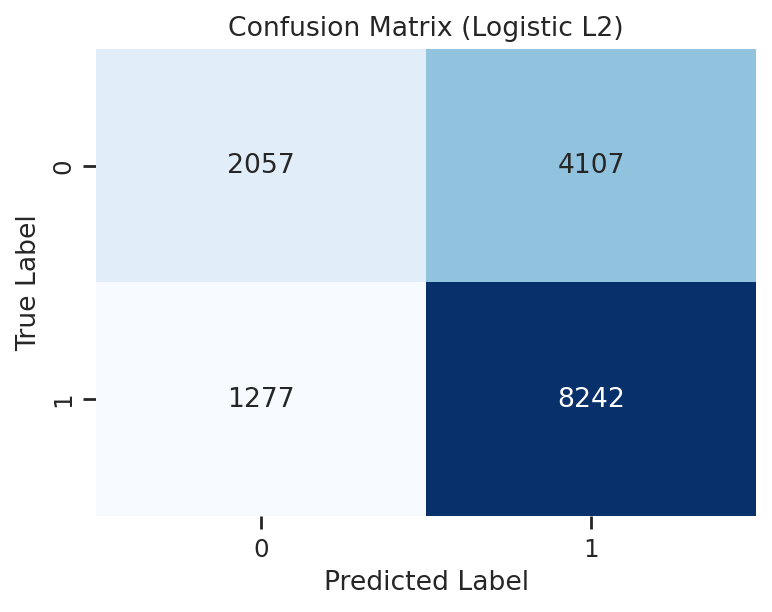

In [ ]:


# Confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic_l2)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (Logistic L2)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


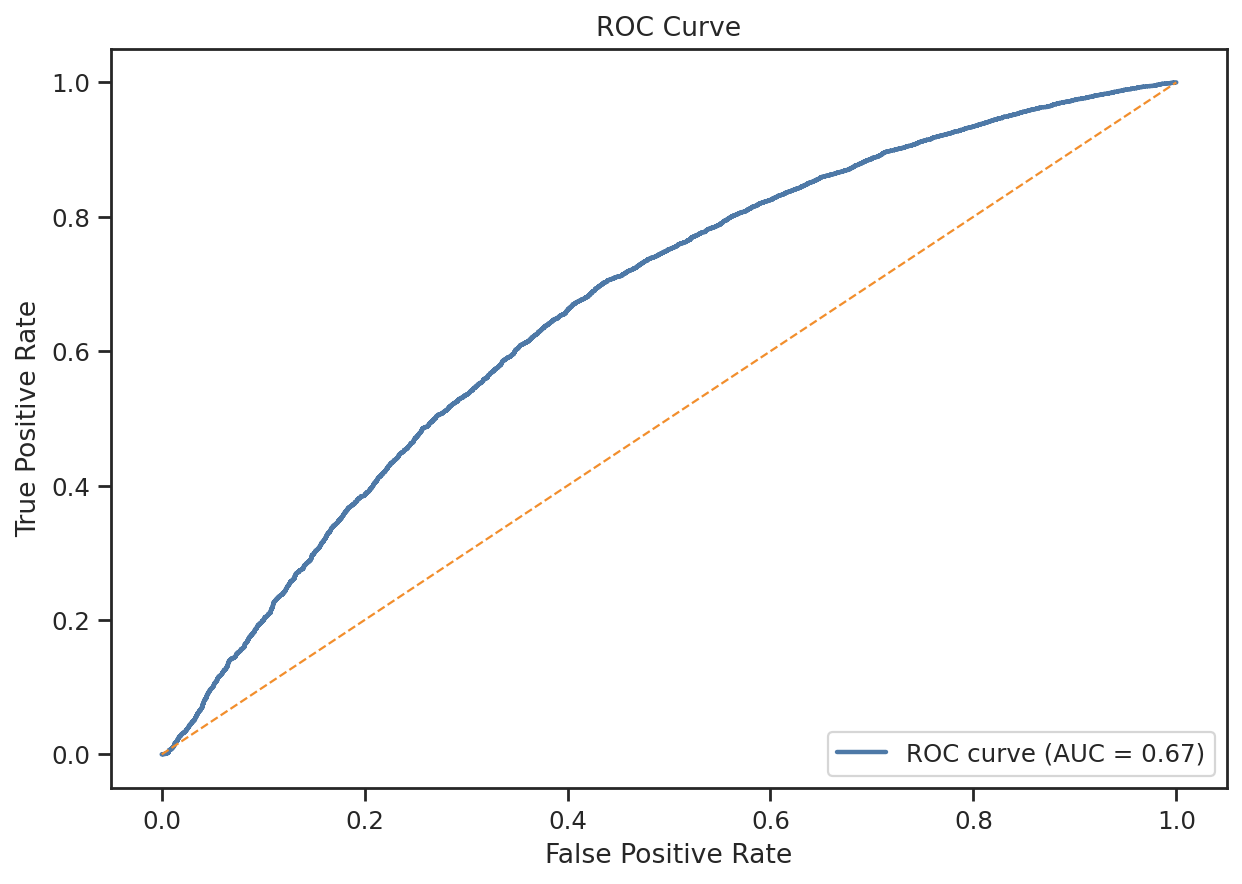

In [ ]:
#  ROC Curve Plot
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_proba_logistic_l2)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

The l2 Logistic Regression Model achieves improved predictive power and stability.







## 4.3 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#  k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn_model=knn.fit(X_train, y_train)


y_pred_knn3 = knn.predict(X_test)
y_proba_knn3 = knn.predict_proba(X_test)[:, 1]

print(f"Used K: {knn.n_neighbors}")
print("\n=== Evaluation on Test Set ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn3))
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_knn3)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_knn3)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_knn3)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_knn3)))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_test, y_proba_knn3)))

Used K: 3

=== Evaluation on Test Set ===
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.50      0.54      6164
           1       0.71      0.77      0.74      9519

    accuracy                           0.67     15683
   macro avg       0.65      0.64      0.64     15683
weighted avg       0.66      0.67      0.66     15683

Accuracy: 0.6668
Precision: 0.7053
Recall: 0.7749
F1 Score: 0.7384
ROC AUC Score: 0.6827


In [ ]:
#   KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn_model=knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn5 = knn.predict(X_test)
y_proba_knn5 = knn.predict_proba(X_test)[:, 1]
y_pred_knn5_train = knn.predict(X_train)
y_proba_knn5_train = knn.predict_proba(X_train)[:, 1]

print(f"Used K: {knn.n_neighbors}")
print("\n=== Classification Report (KNN 5) ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn5))
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_knn5)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_knn5)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_knn5)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_knn5)))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_test, y_proba_knn5)))

Used K: 5

=== Classification Report (KNN 5) ===
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.48      0.54      6164
           1       0.70      0.80      0.75      9519

    accuracy                           0.68     15683
   macro avg       0.66      0.64      0.64     15683
weighted avg       0.67      0.68      0.67     15683

Accuracy: 0.6768
Precision: 0.7048
Recall: 0.8047
F1 Score: 0.7514
ROC AUC Score: 0.7011


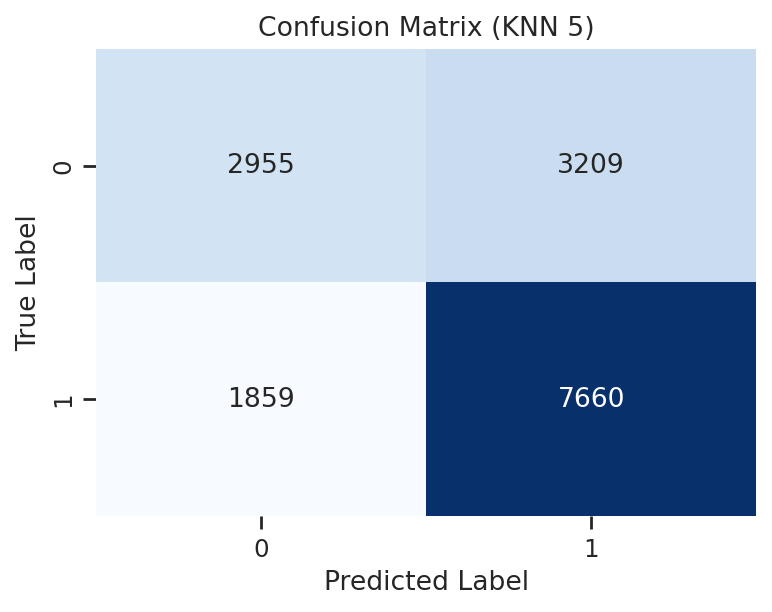

In [ ]:


# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn5)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (KNN 5)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [ ]:
metrics_knn5 = {
    'model':            'KNN 5',

    # train metrics
    'train_accuracy':   accuracy_score(y_train, y_pred_knn5_train),
    'train_precision':  precision_score(y_train, y_pred_knn5_train),
    'train_recall':     recall_score(y_train, y_pred_knn5_train),
    'train_f1':         f1_score(y_train, y_pred_knn5_train),
    'train_roc_auc':    roc_auc_score(y_train, y_proba_knn5_train),

    # test metrics
    'test_accuracy':    accuracy_score(y_test,  y_pred_knn5),
    'test_precision':   precision_score(y_test,  y_pred_knn5),
    'test_recall':      recall_score(y_test,  y_pred_knn5),
    'test_f1':          f1_score(y_test,  y_pred_knn5),
    'test_roc_auc':     roc_auc_score(y_test,  y_proba_knn5),
}
metrics_knn5

{'model': 'KNN 5',
 'train_accuracy': 0.7872401479403137,
 'train_precision': 0.7889766724323314,
 'train_recall': 0.8865833158226518,
 'train_f1': 0.8349370470230292,
 'train_roc_auc': np.float64(0.8624103549480481),
 'test_accuracy': 0.6768475419243767,
 'test_precision': 0.704756647345662,
 'test_recall': 0.8047063767202437,
 'test_f1': 0.7514224053364724,
 'test_roc_auc': np.float64(0.7010546856013032)}

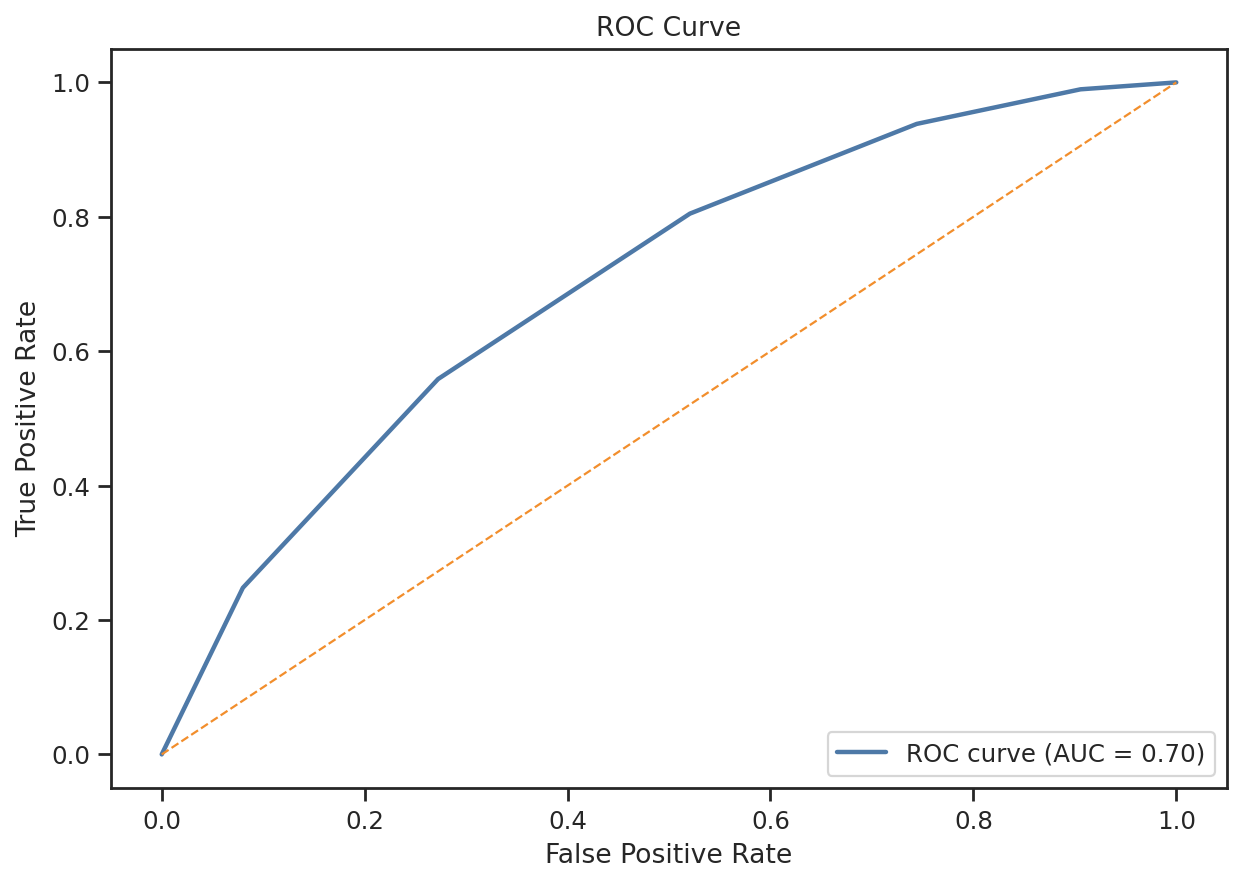

In [ ]:
#  ROC Curve Plot
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_proba_knn5)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


- KNN showed **higher ROC AUC** on the test set, indicating stronger churn discrimination ability.

Despite the improved performance, its **scalability and interpretability limitations** make it better suited as a benchmarking tool rather than a production-ready model in high-dimensional settings.


## 4.4 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree_model=dtree.fit(X_train, y_train)

In [ ]:

y_pred_dt_orig = dtree_model.predict(X_test)

In [ ]:
# Evaluate the original decision-tree model
print(classification_report(y_test, y_pred_dt_orig))
print(confusion_matrix(y_test, y_pred_dt_orig))

print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_dt_orig)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_dt_orig)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_dt_orig)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_dt_orig)))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_test, y_pred_dt_orig)))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      6164
           1       0.81      0.80      0.80      9519

    accuracy                           0.76     15683
   macro avg       0.75      0.75      0.75     15683
weighted avg       0.76      0.76      0.76     15683

[[4318 1846]
 [1893 7626]]
Accuracy: 0.7616
Precision: 0.8051
Recall: 0.8011
F1 Score: 0.8031
ROC AUC Score: 0.7508


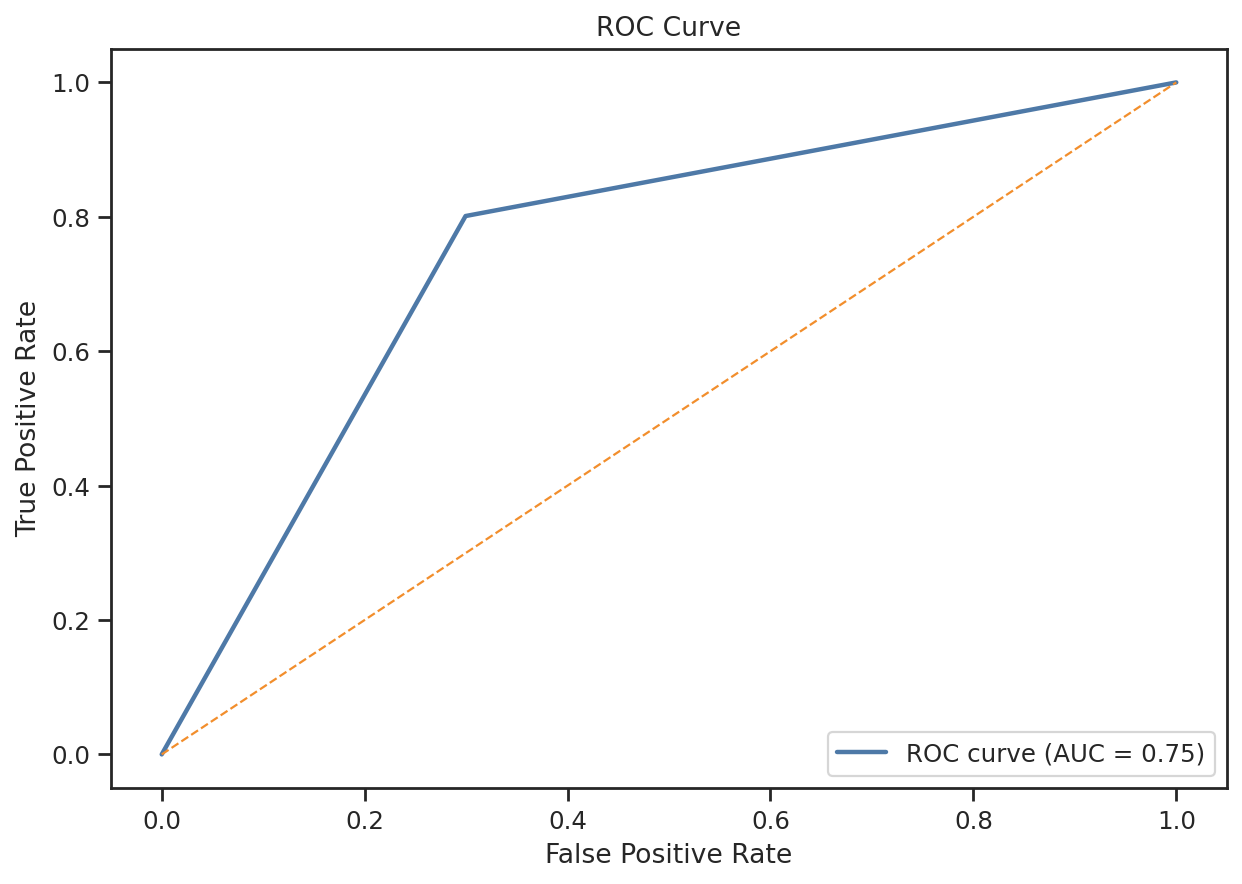

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_orig)
roc_auc = auc(fpr, tpr)




plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# choose parameter - entropy v.s. gini
for crit in ['gini', 'entropy']:
    dt = DecisionTreeClassifier(criterion=crit, random_state=42)
    dt.fit(X_train, y_train)
    y_pred_dteg = dt.predict(X_test)

    print(f"\n=== Criterion: {crit.upper()} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_dteg):.4f}")
    print(classification_report(y_test, y_pred_dteg))


=== Criterion: GINI ===
Accuracy: 0.7657
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      6164
           1       0.81      0.80      0.81      9519

    accuracy                           0.77     15683
   macro avg       0.75      0.76      0.75     15683
weighted avg       0.77      0.77      0.77     15683


=== Criterion: ENTROPY ===
Accuracy: 0.7610
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      6164
           1       0.80      0.81      0.80      9519

    accuracy                           0.76     15683
   macro avg       0.75      0.75      0.75     15683
weighted avg       0.76      0.76      0.76     15683



In [ ]:
# comparing gini vs entropy
param_grid = {
    'criterion': ['gini', 'entropy']
}

# grid search with 5-fold CV
grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
)
grid.fit(X_train, y_train)


print("Best criterion:", grid.best_params_['criterion'])
print(f"Best CV accuracy: {grid.best_score_:.4f}")

best_dt = grid.best_estimator_
test_acc = best_dt.score(X_test, y_test)
print(f"Test accuracy of best model: {test_acc:.4f}")


Best criterion: gini
Best CV accuracy: 0.7473
Test accuracy of best model: 0.7657


 Gini and Entropy often produce similar trees, but the structure and generalisation ability can differ depending on the feature distributions, class imbalance, or noise in the data. By comparing Gini and Entropy using GridSearchCV, we find that Gini leads to better performance.

In [ ]:
# test full hyperparameter grid
param_grid = {
    'criterion':        ['gini'],
    'max_depth':        [ 10, 20],
    'min_samples_split':[4 ,8],
    'min_samples_leaf': [2, 10]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)


grid_search.fit(X_train, y_train)
print("Best params:",  grid_search.best_params_)
print("Best CV AUC:",  f"{grid_search.best_score_:.3f}")


best_tree = grid_search.best_estimator_
print("Test  AUC:", roc_auc_score(y_test, best_tree.predict_proba(X_test)[:,1]))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 4}
Best CV AUC: 0.835
Test  AUC: 0.8454054185423341


By selecting entropy as the split measure and imposing moderate regularisation via max_depth=20 and min_samples_leaf=10, we obtained a well-calibrated tree that balances interpretability with predictive power. The result of AUC of 0.835 demonstrates that the model generalises effectively to unseen data, enabling it to identify customers at risk of churn.

In [ ]:
# Predict classes and probabilities
y_pred_dt = best_tree.predict(X_test)
y_prob_dt = best_tree.predict_proba(X_test)[:,1]
y_pred_dt_train = best_tree.predict(X_train)
y_proba_dt_train = best_tree.predict_proba(X_train)[:, 1]

# Classification report & confusion matrix
print(classification_report(y_test, y_pred_dt))
cm = confusion_matrix(y_test, y_pred_dt)


print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_dt)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_dt)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_dt)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_dt)))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_test, y_pred_dt)))
# ROC AUC
test_auc = roc_auc_score(y_test, y_prob_dt)
print(f"Test ROC AUC: {test_auc:.3f}")

# Precision-Recall AUC
pr_auc = average_precision_score(y_test, y_prob_dt)
print(f"Test PR AUC: {pr_auc:.3f}")


              precision    recall  f1-score   support

           0       0.73      0.70      0.71      6164
           1       0.81      0.84      0.82      9519

    accuracy                           0.78     15683
   macro avg       0.77      0.77      0.77     15683
weighted avg       0.78      0.78      0.78     15683

Accuracy: 0.7812
Precision: 0.8097
Recall: 0.8360
F1 Score: 0.8227
ROC AUC Score: 0.7663
Test ROC AUC: 0.845
Test PR AUC: 0.867


In [ ]:
metrics_decision_tree = {
    'model':            'Decision tree',

    # train metrics
    'train_accuracy':   accuracy_score(y_train, y_pred_dt_train),
    'train_precision':  precision_score(y_train, y_pred_dt_train),
    'train_recall':     recall_score(y_train, y_pred_dt_train),
    'train_f1':         f1_score(y_train, y_pred_dt_train),
    'train_roc_auc':    roc_auc_score(y_train, y_proba_dt_train),

    # test metrics
    'test_accuracy':    accuracy_score(y_test,  y_pred_dt),
    'test_precision':   precision_score(y_test,  y_pred_dt),
    'test_recall':      recall_score(y_test,  y_pred_dt),
    'test_f1':          f1_score(y_test,  y_pred_dt),
    'test_roc_auc':     roc_auc_score(y_test,  y_prob_dt),
}
metrics_decision_tree

{'model': 'Decision tree',
 'train_accuracy': 0.8633465119244994,
 'train_precision': 0.8775855007167724,
 'train_recall': 0.9004517755831057,
 'train_f1': 0.8888716034017838,
 'train_roc_auc': np.float64(0.9458308576485225),
 'test_accuracy': 0.7812280813619843,
 'test_precision': 0.8097273097273098,
 'test_recall': 0.8360121861540077,
 'test_f1': 0.8226598439034476,
 'test_roc_auc': np.float64(0.8454054185423341)}

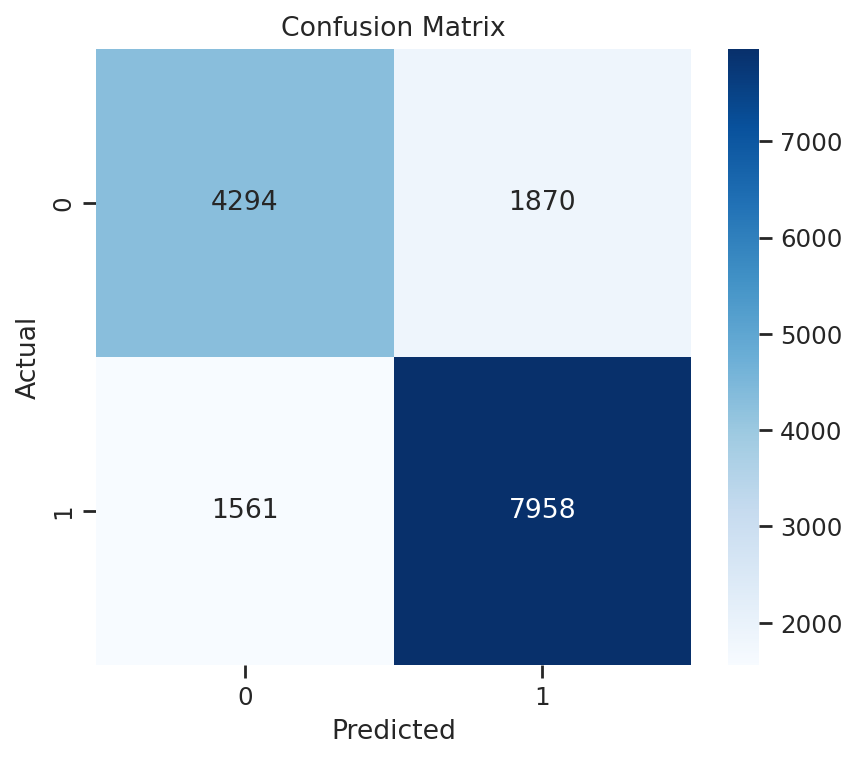

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_tree.classes_,
            yticklabels=best_tree.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

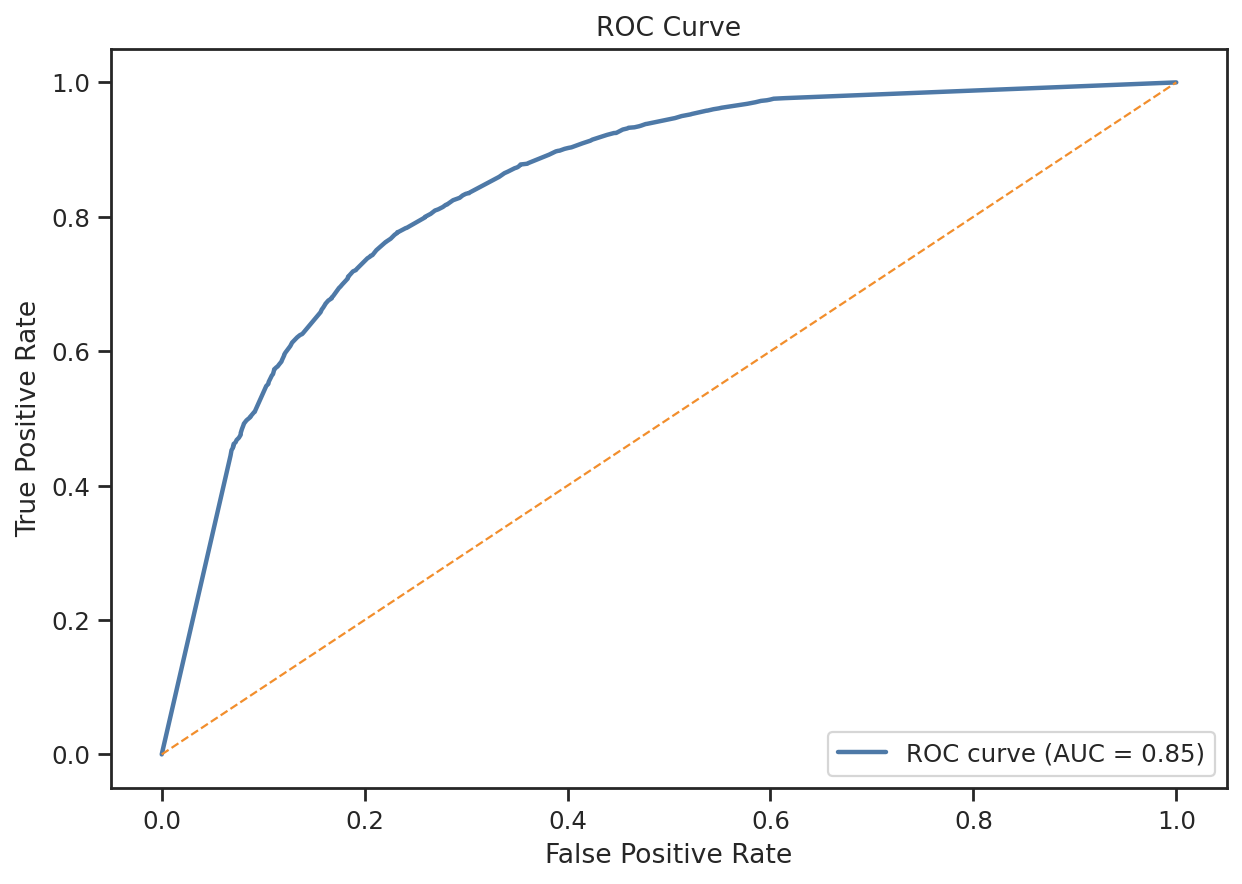

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_dt)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

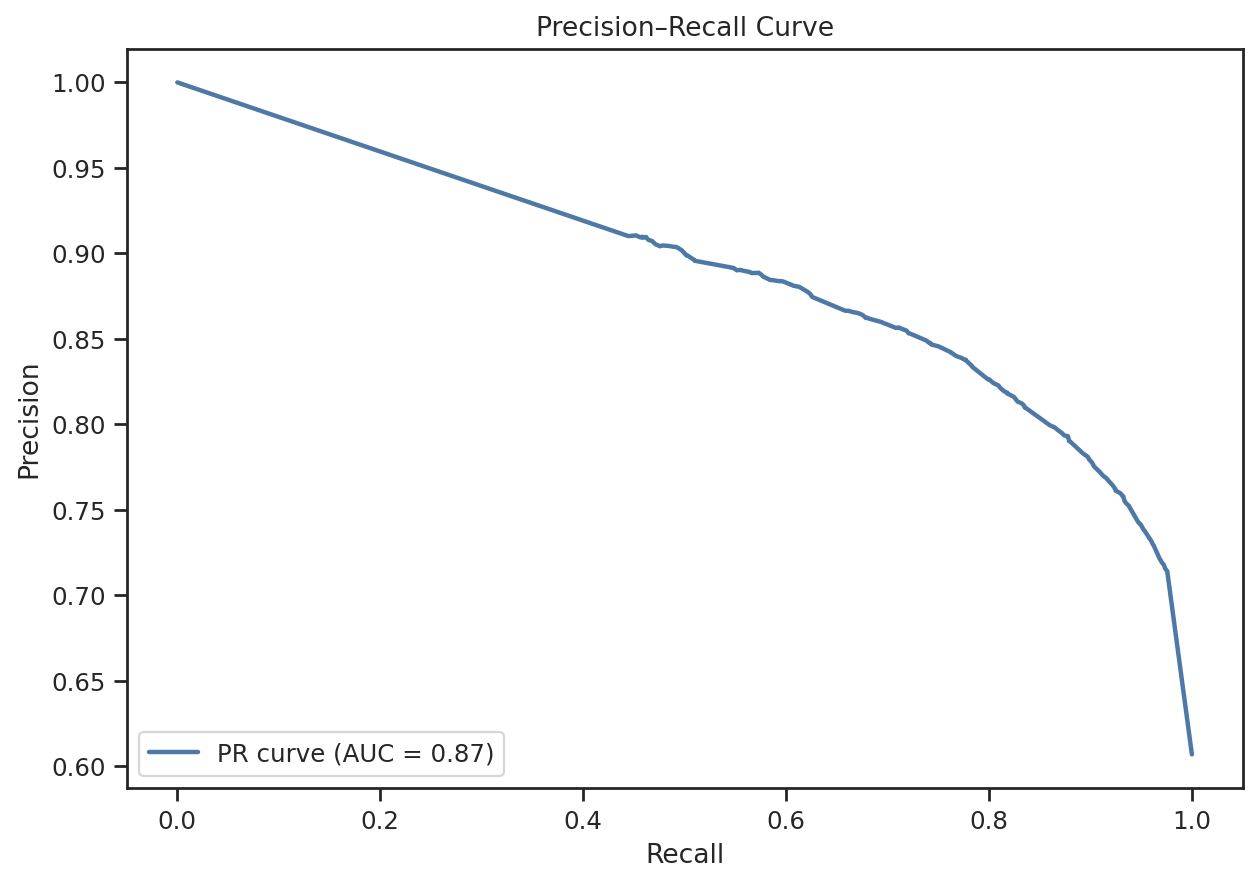

In [ ]:
# Precision–Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_dt)

plt.figure()
plt.plot(recall, precision, lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.legend(loc='lower left')
plt.show()


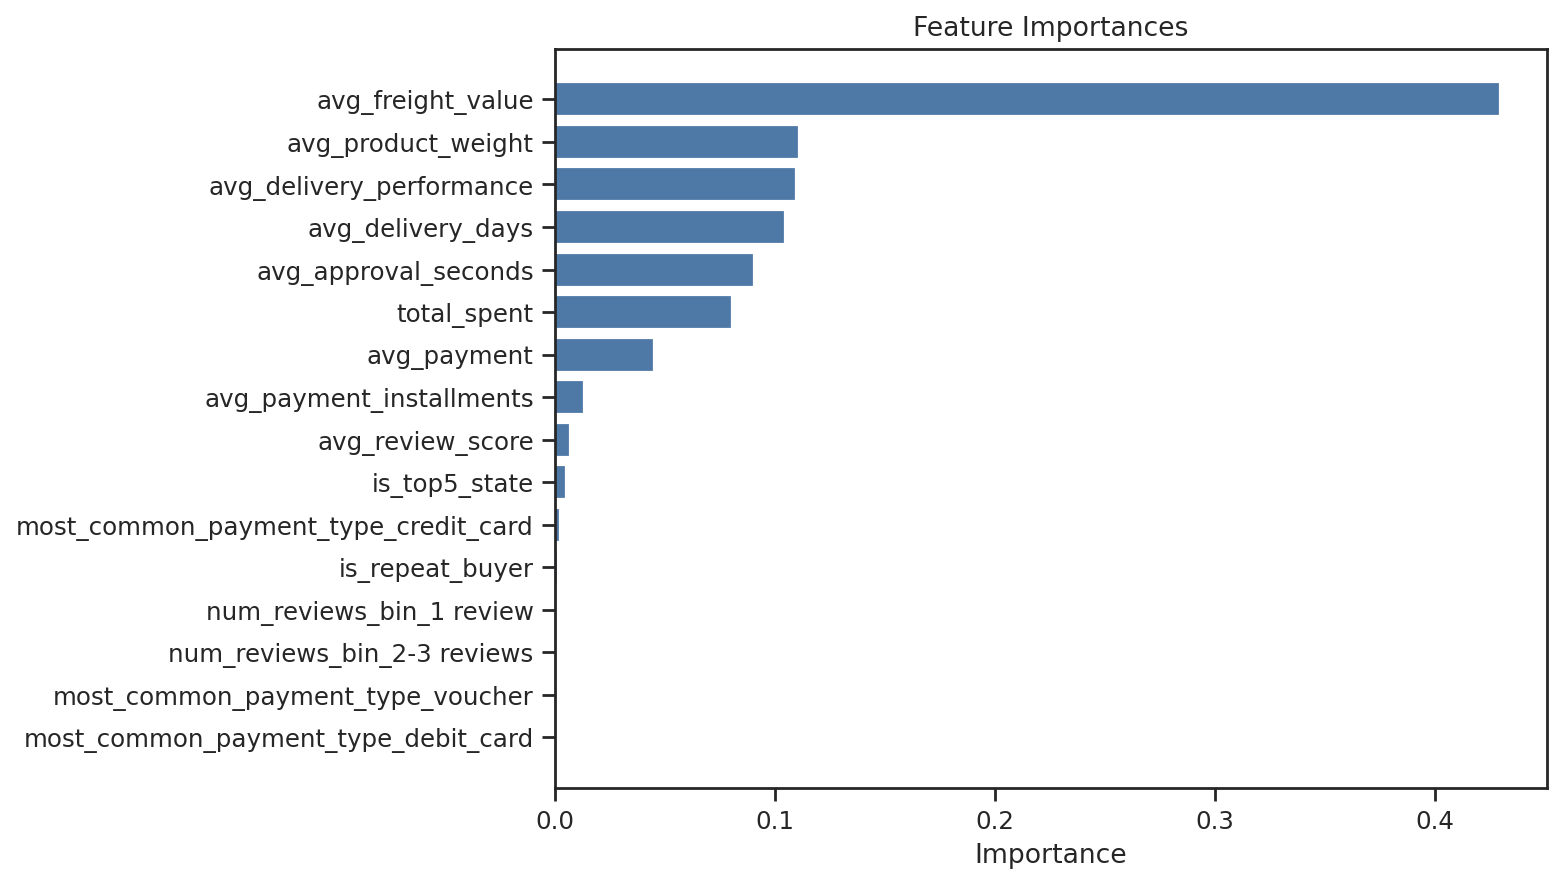

In [ ]:
# Feature Importances
importances = best_tree.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_encoded.columns

plt.figure(figsize=(8,6))
plt.barh(feature_names[indices], importances[indices])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


## 4.5 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier



rf_classifier = RandomForestClassifier(
    n_estimators=100,
    bootstrap=True,
    max_features='sqrt',
    random_state=42
)

rf_model=rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(f"ROC AUC score: {roc_auc_score(y_test, y_pred_rf)}")

print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_rf)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_rf)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_rf)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_rf)))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_test, y_pred_rf)))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74      6164
           1       0.81      0.90      0.85      9519

    accuracy                           0.81     15683
   macro avg       0.81      0.79      0.80     15683
weighted avg       0.81      0.81      0.81     15683

[[4190 1974]
 [ 989 8530]]
ROC AUC score: 0.7879279693285992
Accuracy: 0.8111
Precision: 0.8121
Recall: 0.8961
F1 Score: 0.8520
ROC AUC Score: 0.7879


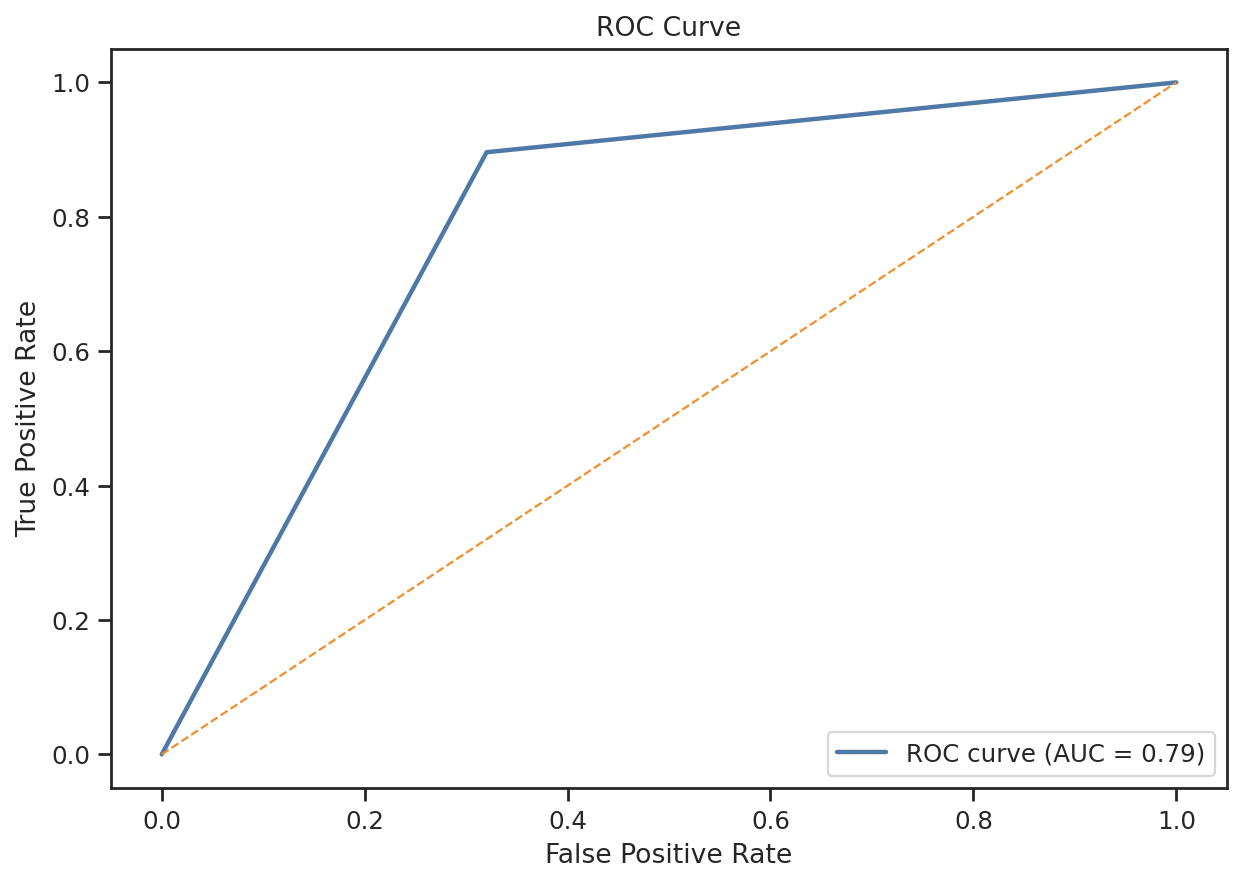

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:

from scipy.stats import randint
import numpy as np

# Define reduced hyperparameter space
param_dist = {
    'max_depth': [10, 20],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Base model
base_rf = RandomForestClassifier(
    n_estimators=50,
    bootstrap=True,
    random_state=42,
    n_jobs=-1,
    criterion='gini'
)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=base_rf,
    param_distributions=param_dist,
    scoring='roc_auc',
    n_iter=10,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),  # 3-fold CV
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)


print("Best params:", random_search.best_params_)
print("Best CV AUC: {:.3f}".format(random_search.best_score_))


best_rf = random_search.best_estimator_
test_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
print("Test AUC: {:.3f}".format(test_auc))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}
Best CV AUC: 0.877
Test AUC: 0.884


In [ ]:
y_pre_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
y_pred_rf_train  = best_rf.predict(X_train)
y_prob_rf_train  = best_rf.predict_proba(X_train)[:, 1]

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)

print(classification_report(y_test, y_pred_dt_orig))
print(confusion_matrix(y_test, y_pred_dt_orig))

print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pre_rf )))
print("Precision: {:.4f}".format(precision_score(y_test, y_pre_rf )))
print("Recall: {:.4f}".format(recall_score(y_test, y_pre_rf )))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pre_rf)))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_test, y_prob_rf)))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74      6164
           1       0.81      0.90      0.85      9519

    accuracy                           0.81     15683
   macro avg       0.81      0.79      0.80     15683
weighted avg       0.81      0.81      0.81     15683

Confusion Matrix:
 [[4190 1974]
 [ 989 8530]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      6164
           1       0.81      0.80      0.80      9519

    accuracy                           0.76     15683
   macro avg       0.75      0.75      0.75     15683
weighted avg       0.76      0.76      0.76     15683

[[4318 1846]
 [1893 7626]]
Accuracy: 0.8074
Precision: 0.8006
Recall: 0.9091
F1 Score: 0.8514
ROC AUC Score: 0.8840


In [ ]:
random_forest = {
    'model':             'Random forest',

    # train metrics
    'train_accuracy':    accuracy_score(y_train, y_pred_rf_train),
    'train_precision':   precision_score(y_train, y_pred_rf_train),
    'train_recall':      recall_score(y_train, y_pred_rf_train),
    'train_f1':          f1_score(y_train, y_pred_rf_train),
    'train_roc_auc':     roc_auc_score(y_train, y_prob_rf_train),

    # test metrics
    'test_accuracy':     accuracy_score(y_test,  y_pred_rf),
    'test_precision':    precision_score(y_test,  y_pred_rf),
    'test_recall':       recall_score(y_test,  y_pred_rf),
    'test_f1':           f1_score(y_test,  y_pred_rf),
    'test_roc_auc':      roc_auc_score(y_test,  y_prob_rf),
}
random_forest

{'model': 'Random forest',
 'train_accuracy': 0.9602091569952812,
 'train_precision': 0.9447667150072511,
 'train_recall': 0.9924616516074806,
 'train_f1': 0.9680270540312044,
 'train_roc_auc': np.float64(0.9964856123985305),
 'test_accuracy': 0.8110693107186125,
 'test_precision': 0.8120715917745621,
 'test_recall': 0.8961025317785482,
 'test_f1': 0.8520201767966838,
 'test_roc_auc': np.float64(0.8839816098531444)}

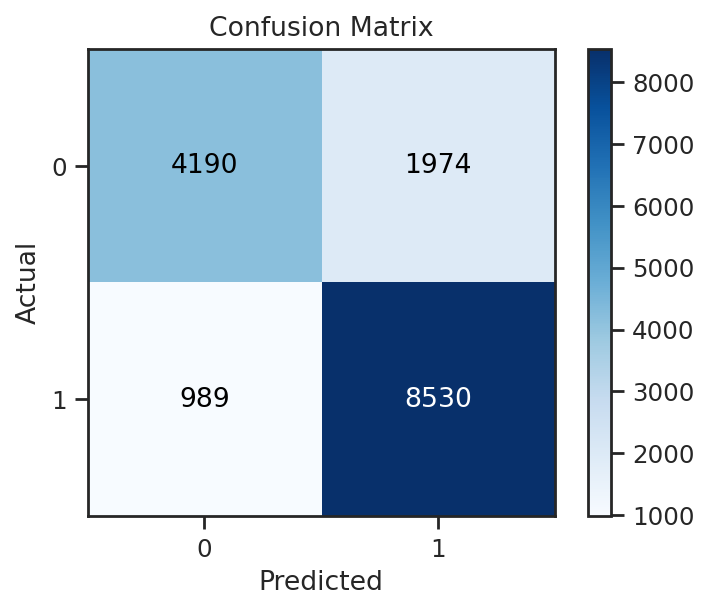

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(best_rf.classes_))
plt.xticks(tick_marks, best_rf.classes_)
plt.yticks(tick_marks, best_rf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max()/2 else 'black')
plt.tight_layout()
plt.show()

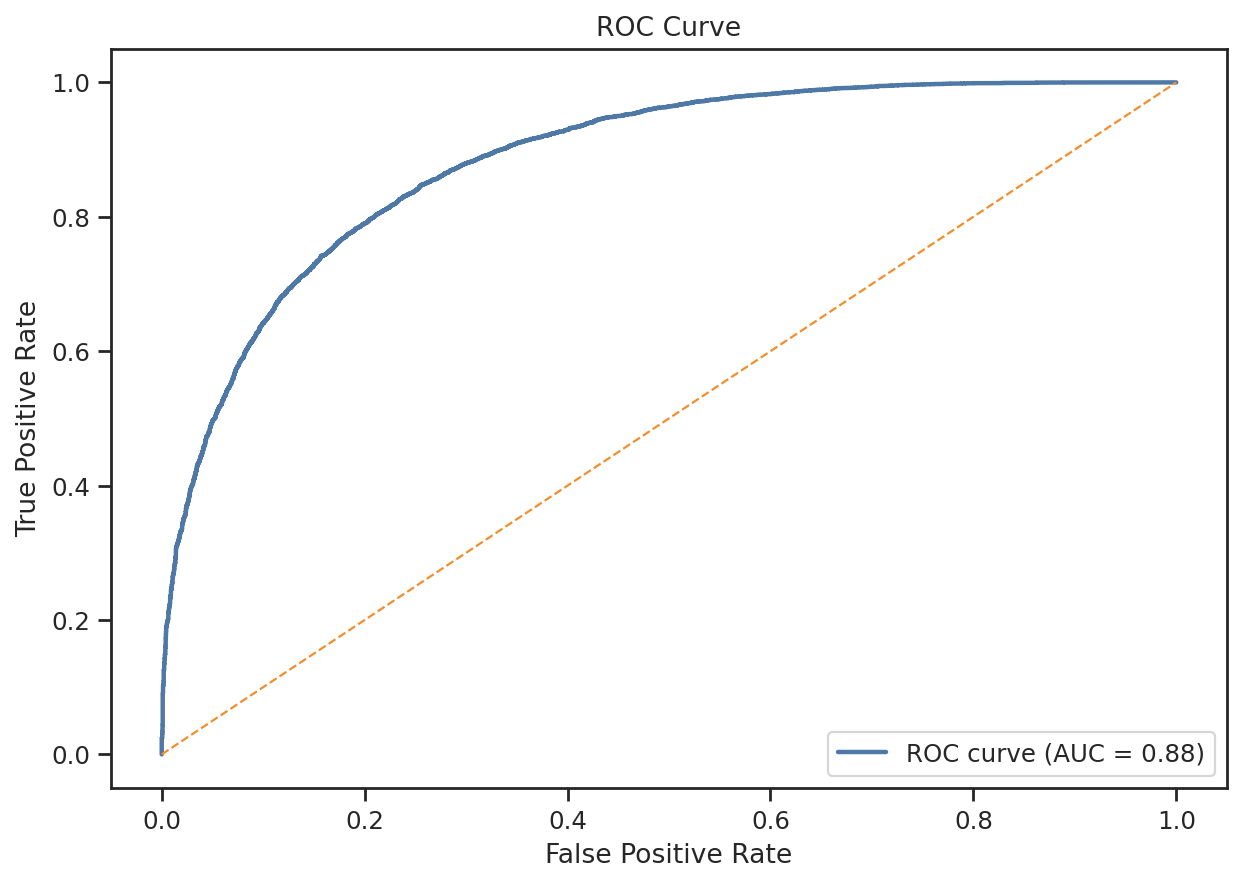

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

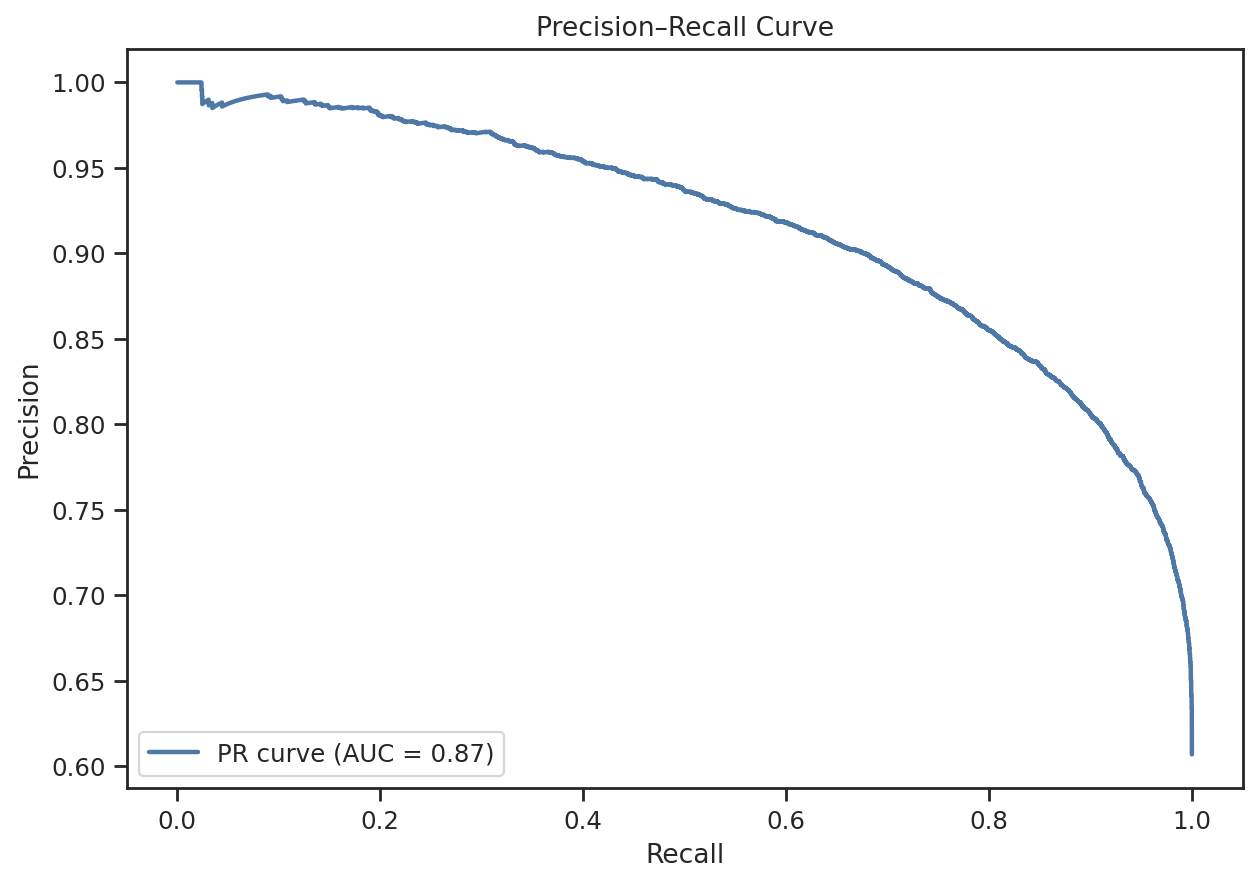

In [ ]:
#Precision–Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)

plt.figure()
plt.plot(recall, precision, lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.legend(loc='lower left')
plt.show()

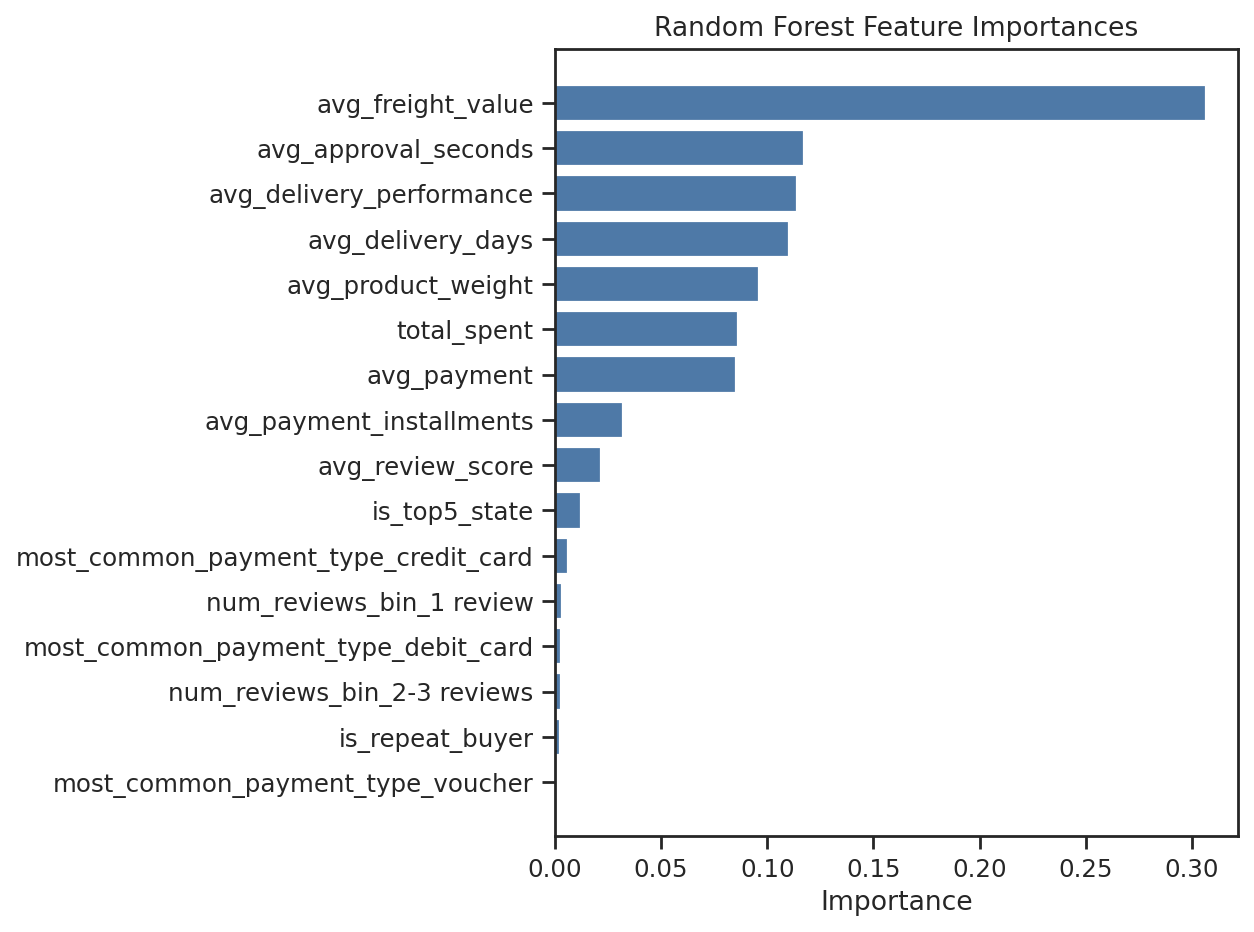

In [ ]:
# Feature Importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(8,6))
plt.barh(feature_names[indices], importances[indices])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

By ensembling hundreds of decorrelated trees, the random forest boosts overall accuracy from 76.4% (single tree) to 81.0% on the test set. It also raises true-positive detection of churners (recall for class 1) from 0.82 to 0.90, meaning it catches more at-risk customers while keeping false positives low. 

## 4.6 LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(objective='binary', random_state=42)

param_grid_lgbm = {
    'n_estimators': [50],
    'learning_rate': [0.05, 0.1],
    'max_depth': [-1, 1],
    'num_leaves': [50, 100],
    'min_child_samples': [20, 40]
}

grid_search_lgbm = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid_lgbm,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)

grid_search_lgbm.fit(X_train, y_train)

print("Best params:", grid_search_lgbm.best_params_)
print("Best CV AUC:", f"{grid_search_lgbm.best_score_:.3f}")

best_lgbm = grid_search_lgbm.best_estimator_
test_auc_lgbm = roc_auc_score(y_test, best_lgbm.predict_proba(X_test)[:, 1])
print("Test AUC:", f"{test_auc_lgbm:.3f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 38072, number of negative: 24656
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1537
[LightGBM] [Info] Number of data points in the train set: 62728, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.606938 -> initscore=0.434459
[LightGBM] [Info] Start training from score 0.434459
Best params: {'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'n_estimators': 50, 'num_leaves': 100}
Best CV AUC: 0.910
Test AUC: 0.915


In [ ]:
# Predict on test set
y_pred_lgbm = best_lgbm.predict(X_test)
y_prob_lgbm = best_lgbm.predict_proba(X_test)[:, 1]
y_pred_lgbm_train = best_lgbm.predict(X_train)
y_prob_lgbm_train = best_lgbm.predict_proba(X_train)[:, 1]

# Evaluation
print("\nClassification Report (LightGBM):")
print(classification_report(y_test, y_pred_lgbm))

cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
print("Confusion Matrix (LightGBM):\n", cm_lgbm)


print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_lgbm)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_lgbm)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_lgbm)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_lgbm)))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_test, y_pred_lgbm)))



Classification Report (LightGBM):
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      6164
           1       0.83      0.92      0.87      9519

    accuracy                           0.84     15683
   macro avg       0.84      0.82      0.82     15683
weighted avg       0.84      0.84      0.83     15683

Confusion Matrix (LightGBM):
 [[4420 1744]
 [ 809 8710]]
Accuracy: 0.8372
Precision: 0.8332
Recall: 0.9150
F1 Score: 0.8722
ROC AUC Score: 0.8160


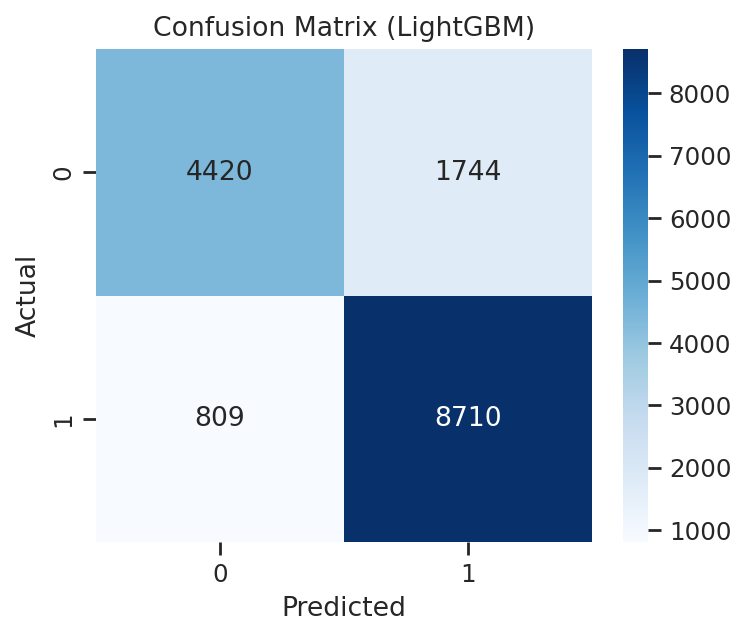

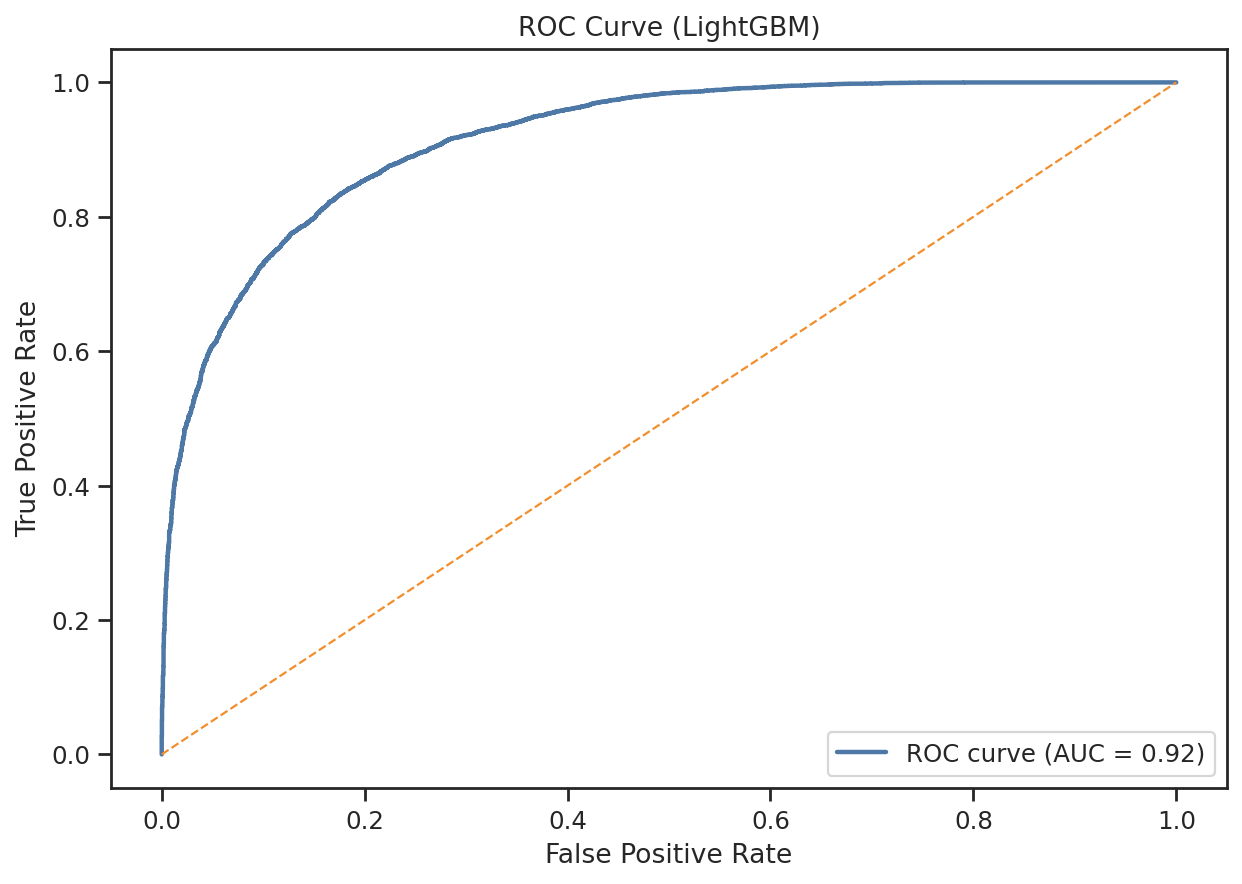

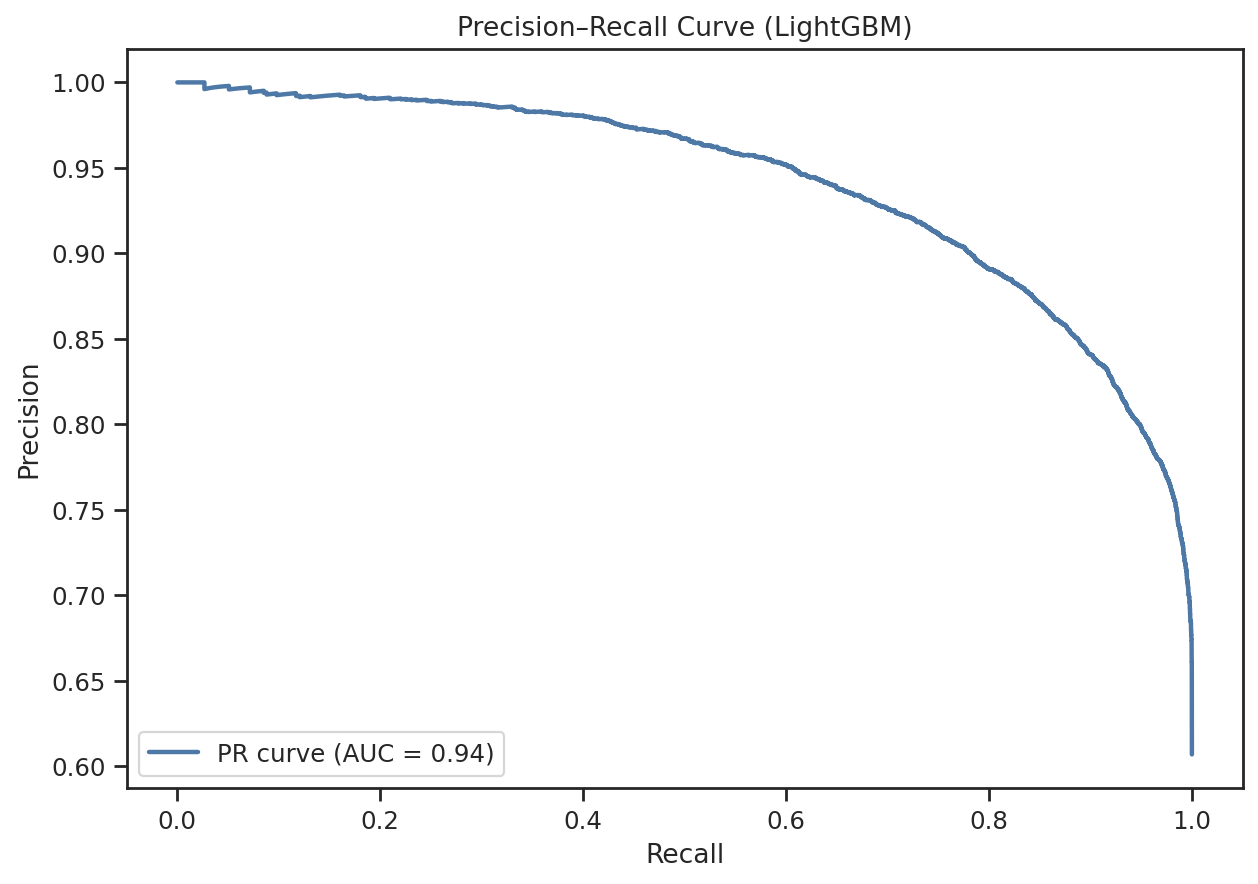

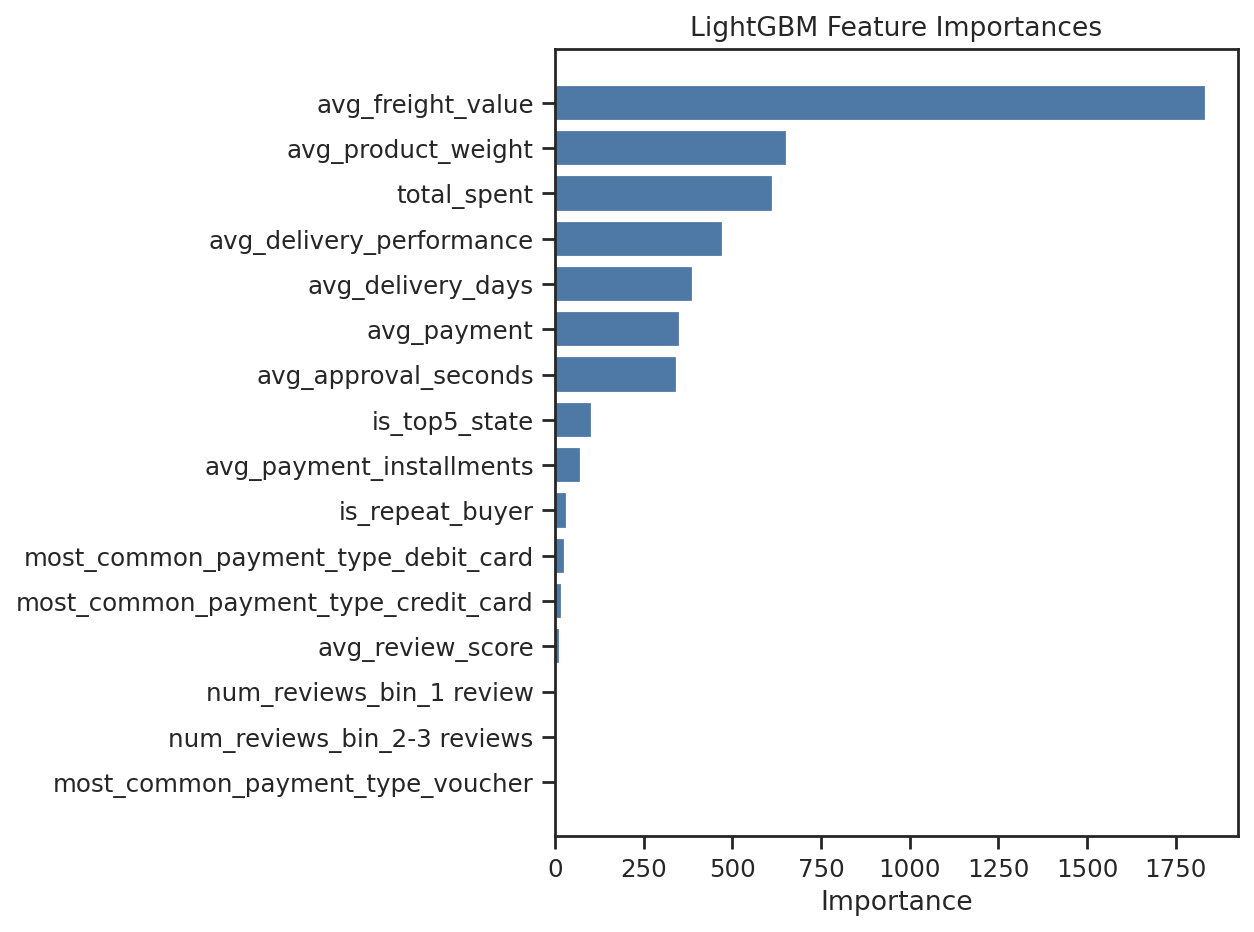

In [ ]:

# Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_lgbm.classes_,
            yticklabels=best_lgbm.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LightGBM)')
plt.show()

# ROC Curve
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_prob_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

plt.figure()
plt.plot(fpr_lgbm, tpr_lgbm, lw=2, label=f'ROC curve (AUC = {roc_auc_lgbm:.2f})')
plt.plot([0,1], [0,1], linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (LightGBM)')
plt.legend(loc='lower right')
plt.show()

# Precision–Recall Curve
precision_lgbm, recall_lgbm, _ = precision_recall_curve(y_test, y_prob_lgbm)
pr_auc_lgbm = average_precision_score(y_test, y_prob_lgbm)

plt.figure()
plt.plot(recall_lgbm, precision_lgbm, lw=2, label=f'PR curve (AUC = {pr_auc_lgbm:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve (LightGBM)')
plt.legend(loc='lower left')
plt.show()

# Feature Importances
importances_lgbm = best_lgbm.feature_importances_
indices_lgbm = np.argsort(importances_lgbm)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(8,6))
plt.barh(feature_names[indices_lgbm], importances_lgbm[indices_lgbm])
plt.xlabel('Importance')
plt.title('LightGBM Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
lightgbm = {
    'model':             'Lightgbm',

    # train metrics
    'train_accuracy':    accuracy_score(y_train, y_pred_lgbm_train),
    'train_precision':   precision_score(y_train, y_pred_lgbm_train),
    'train_recall':      recall_score(y_train, y_pred_lgbm_train),
    'train_f1':          f1_score(y_train, y_pred_lgbm_train),
    'train_roc_auc':     roc_auc_score(y_train, y_prob_lgbm_train),

    # test metrics
    'test_accuracy':     accuracy_score(y_test,  y_pred_lgbm),
    'test_precision':    precision_score(y_test,  y_pred_lgbm),
    'test_recall':       recall_score(y_test,  y_pred_lgbm),
    'test_f1':           f1_score(y_test,  y_pred_lgbm),
    'test_roc_auc':      roc_auc_score(y_test,  y_prob_lgbm),
}


lightgbm


{'model': 'Lightgbm',
 'train_accuracy': 0.8536698125239127,
 'train_precision': 0.8471798322558939,
 'train_recall': 0.925929817188485,
 'train_f1': 0.8848060439491485,
 'train_roc_auc': np.float64(0.9313477904377769),
 'test_accuracy': 0.8372122680609577,
 'test_precision': 0.8331739047254639,
 'test_recall': 0.915012081100956,
 'test_f1': 0.8721774395433836,
 'test_roc_auc': np.float64(0.9154465923850921)}

## 4.7 XGBoost

In [ ]:
from xgboost import XGBClassifier


model = XGBClassifier(random_state=42, eval_metric='logloss')
xgboost_model=model.fit(X_train, y_train)


y_pred_xgboost = model.predict(X_test)
y_pred_proba_xgboost = model.predict_proba(X_test)[:, 1]


In [ ]:
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_xgboost )))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_xgboost )))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_xgboost )))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_xgboost )))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_test, y_pred_proba_xgboost)))


Accuracy: 0.8480
Precision: 0.8490
Recall: 0.9117
F1 Score: 0.8792
ROC AUC Score: 0.9242


In [ ]:


print(classification_report(y_test, y_pred_xgboost))


              precision    recall  f1-score   support

           0       0.85      0.75      0.79      6164
           1       0.85      0.91      0.88      9519

    accuracy                           0.85     15683
   macro avg       0.85      0.83      0.84     15683
weighted avg       0.85      0.85      0.85     15683



In [ ]:


# Define base model
xgb_base = XGBClassifier(
    random_state=42,
    eval_metric='logloss'
)

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [7, 8, 9],
    'learning_rate': [0.1, 0.15, 0.2],
    'colsample_bytree': [0.6, 0.8]
}


# Grid search
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best estimator
best_xgb = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)
print("Best CV AUC: {:.4f}".format(grid_search.best_score_))

# Predict with best model
y_pred_xgboost = best_xgb.predict(X_test)
y_pred_proba_xgboost = best_xgb.predict_proba(X_test)[:, 1]
y_pred_xgboost_train     = best_xgb.predict(X_train)
y_proba_xgboost_train    = best_xgb.predict_proba(X_train)[:, 1]

# Evaluate
test_auc = roc_auc_score(y_test, y_pred_proba_xgboost)
print("Test AUC: {:.4f}".format(test_auc))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.15, 'max_depth': 9, 'n_estimators': 200}
Best CV AUC: 0.9298
Test AUC: 0.9344


In [ ]:
xgboost = {
    'model':             'Xgboost',

    # train metrics
    'train_accuracy':    accuracy_score(y_train, y_pred_xgboost_train),
    'train_precision':   precision_score(y_train, y_pred_xgboost_train),
    'train_recall':      recall_score(y_train, y_pred_xgboost_train),
    'train_f1':          f1_score(y_train, y_pred_xgboost_train),
    'train_roc_auc':     roc_auc_score(y_train, y_proba_xgboost_train),

    # test metrics
    'test_accuracy':     accuracy_score(y_test,  y_pred_xgboost),
    'test_precision':    precision_score(y_test,  y_pred_xgboost),
    'test_recall':       recall_score(y_test,  y_pred_xgboost),
    'test_f1':           f1_score(y_test,  y_pred_xgboost),
    'test_roc_auc':      roc_auc_score(y_test,  y_pred_proba_xgboost),
}
xgboost


{'model': 'Xgboost',
 'train_accuracy': 0.9497513072312205,
 'train_precision': 0.9424509654857838,
 'train_recall': 0.97685963437697,
 'train_f1': 0.9593468671808497,
 'train_roc_auc': np.float64(0.9906999233598035),
 'test_accuracy': 0.8623350124338456,
 'test_precision': 0.8639240506329114,
 'test_recall': 0.917743460447526,
 'test_f1': 0.89002088533442,
 'test_roc_auc': np.float64(0.93436626524948)}

In [ ]:
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_xgboost )))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_xgboost )))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_xgboost )))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_xgboost )))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_test, y_pred_proba_xgboost)))

Accuracy: 0.8623
Precision: 0.8639
Recall: 0.9177
F1 Score: 0.8900
ROC AUC Score: 0.9344


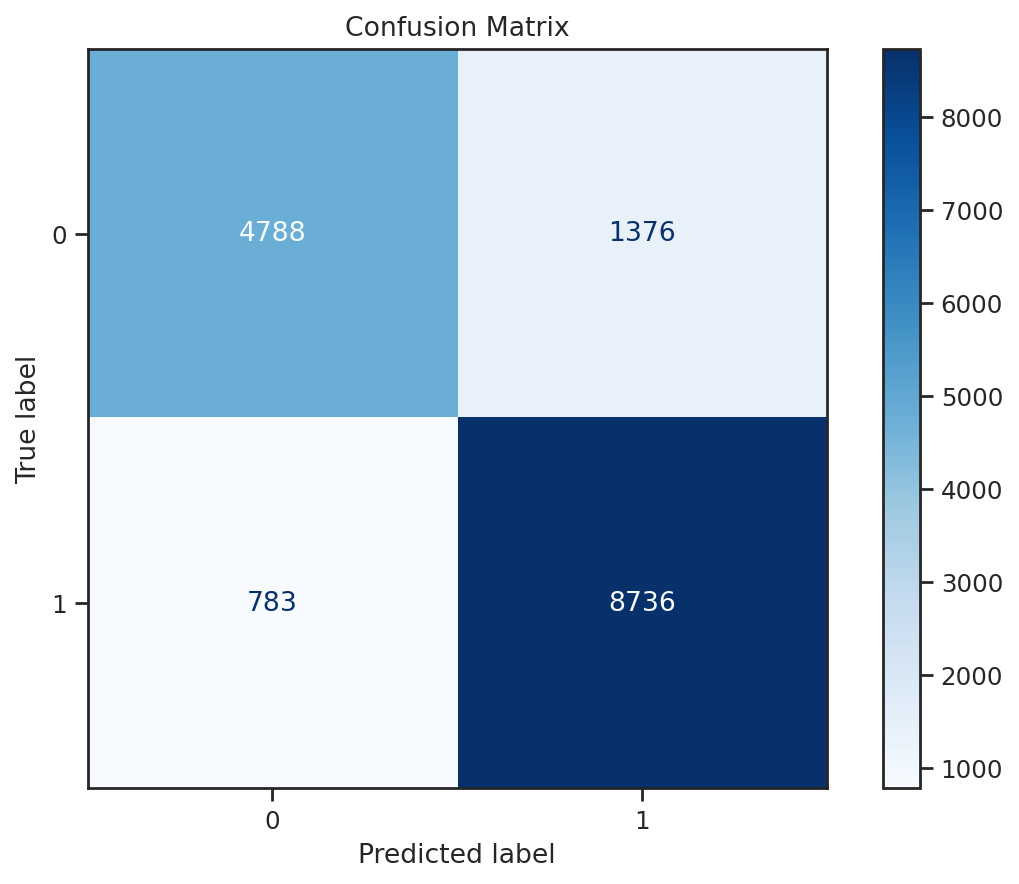

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgboost)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


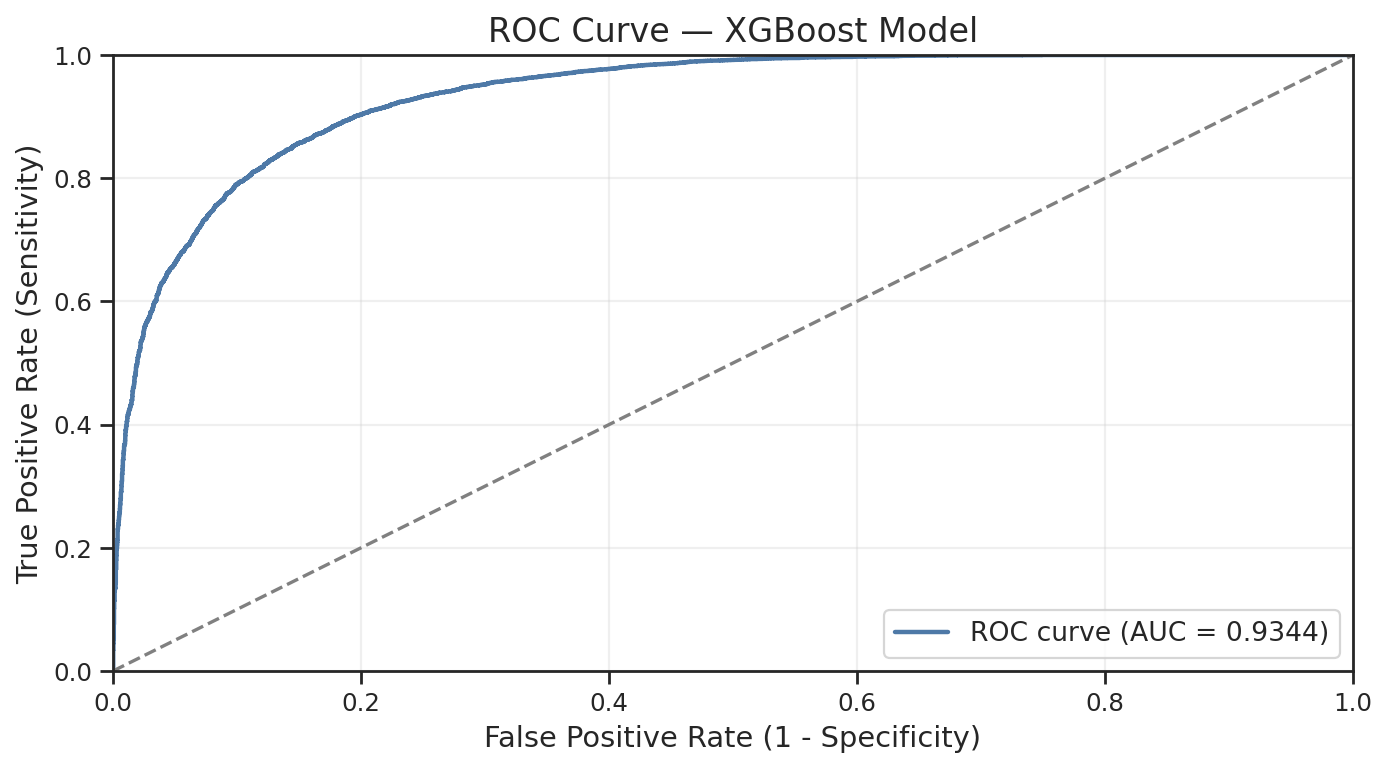

In [ ]:



fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xgboost)
auc = roc_auc_score(y_test, y_pred_proba_xgboost)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {auc:.4f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.title('ROC Curve — XGBoost Model', fontsize=15)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=13)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=13)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


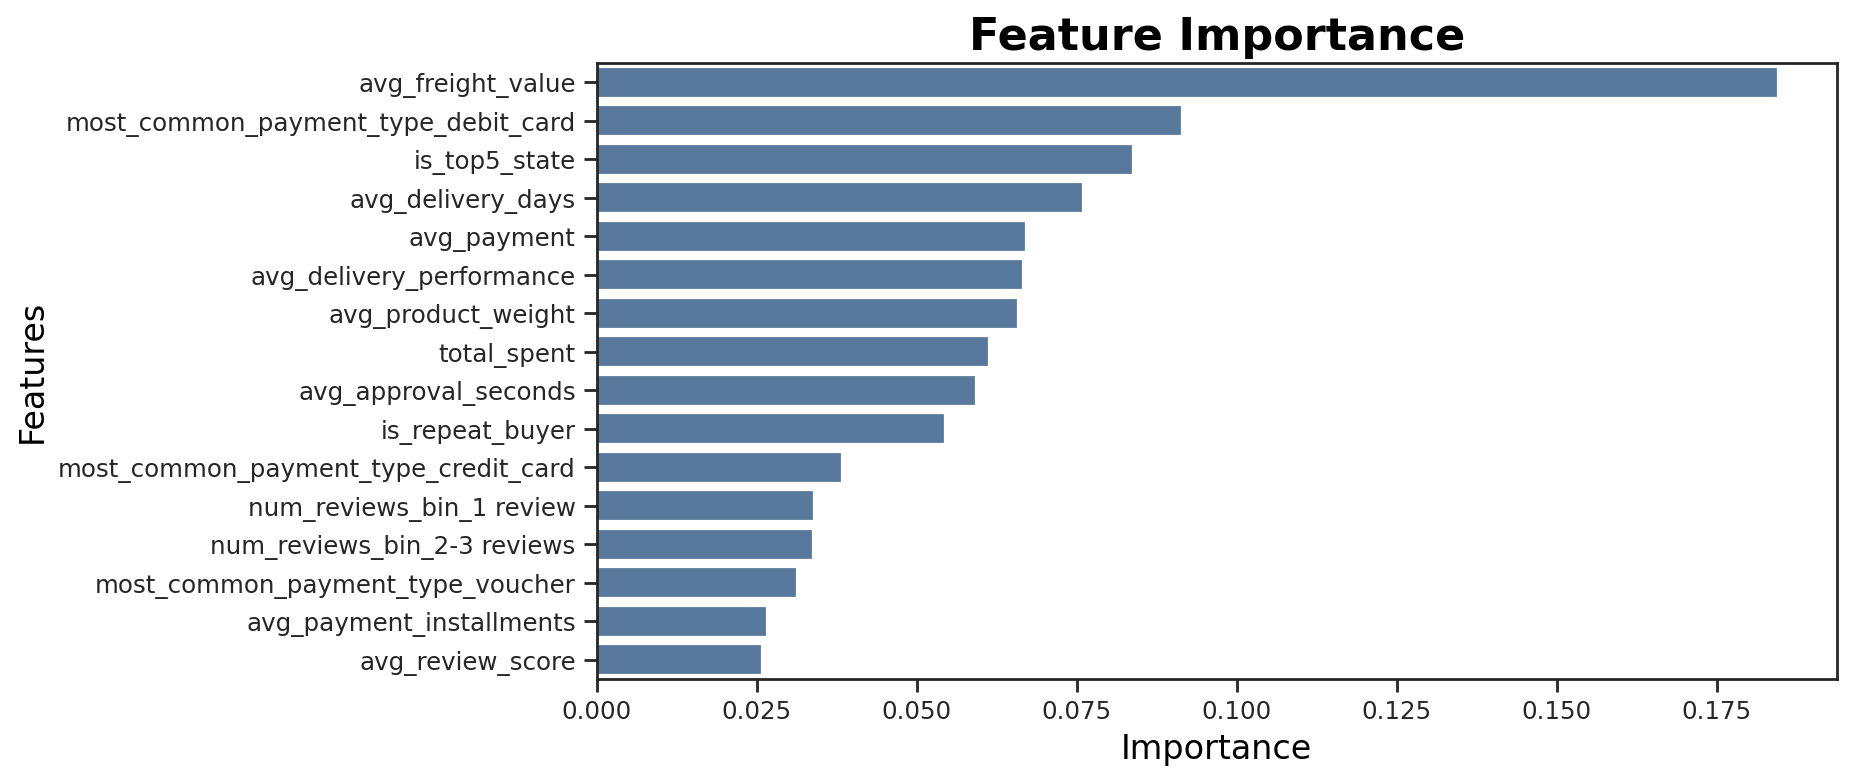

In [ ]:
plt.figure(figsize=(10, 5))
important_features = pd.DataFrame({'Features': X_encoded.columns,
                                   'Importance': best_xgb.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance',color='black',fontsize=20,fontweight='bold')
plt.xlabel('Importance',color='black',fontsize=15)
plt.ylabel('Features',color='black',fontsize=15)
plt.show()

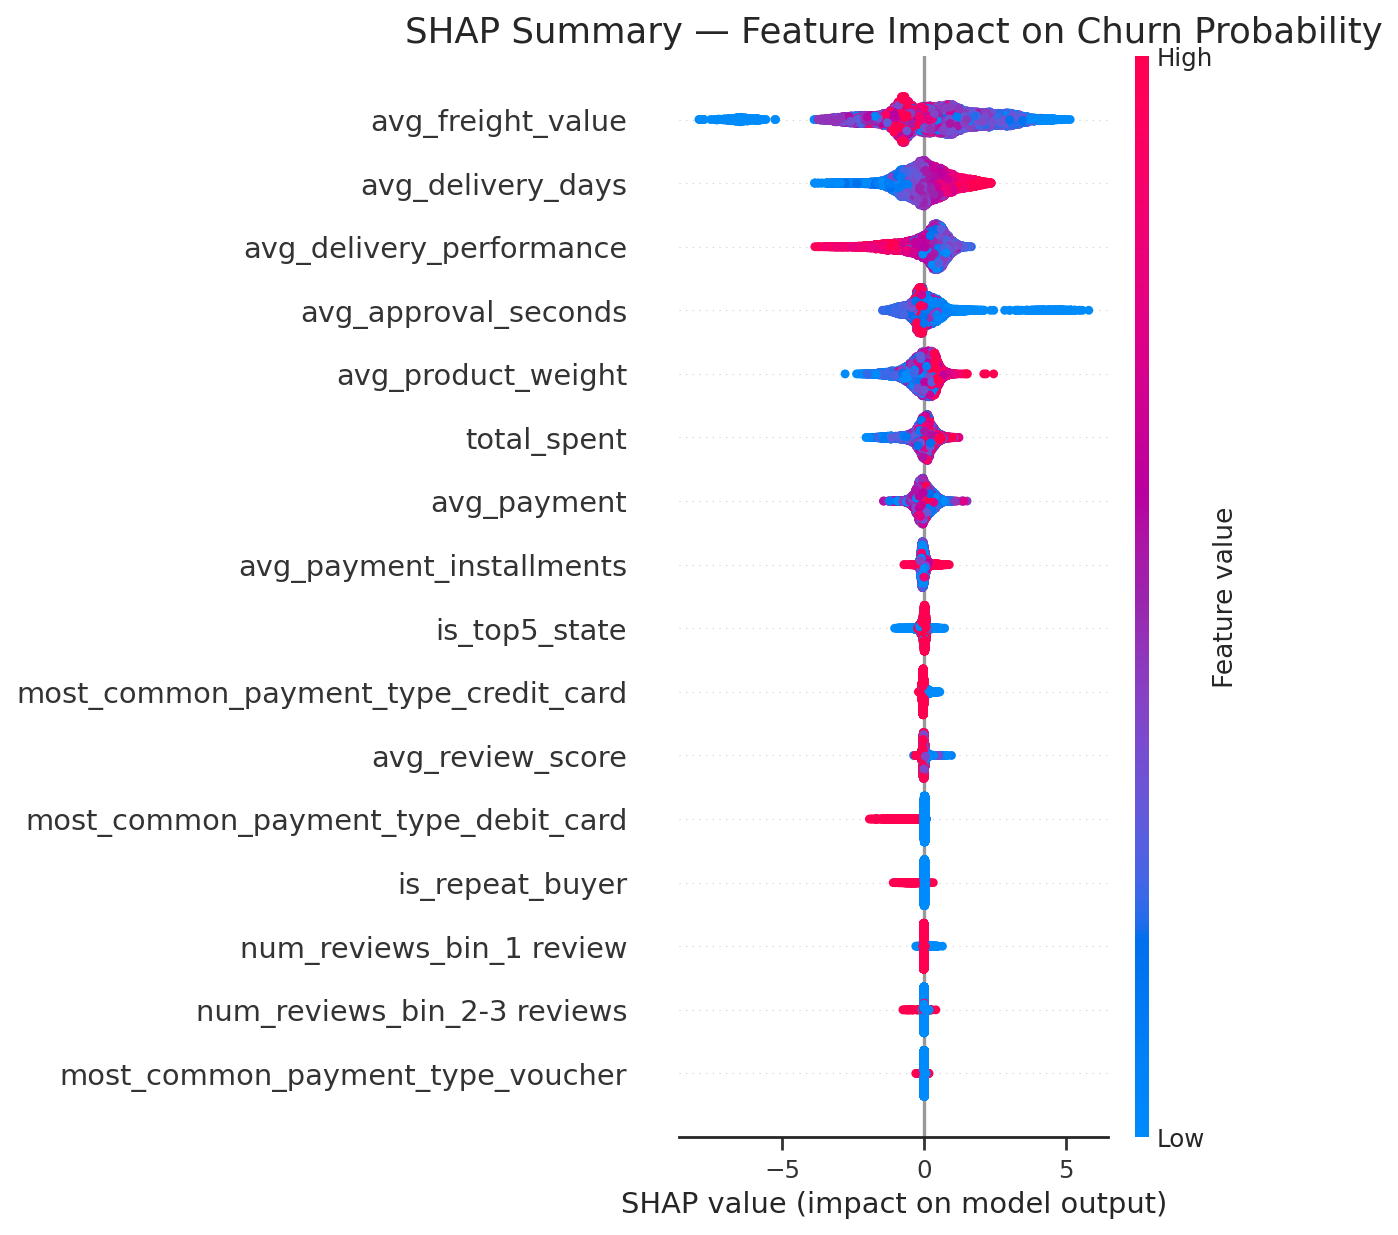

In [ ]:

import shap




explainer = shap.TreeExplainer(best_xgb)


shap_values = explainer.shap_values(X_test)


plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test, plot_type="dot", show=False)
plt.title("SHAP Summary — Feature Impact on Churn Probability", fontsize=16)
plt.tight_layout()
plt.show()


## 4.8 Stack Model (Logistic, Xgboost)

In [ ]:
from sklearn.ensemble import StackingClassifier



In [ ]:
# Define base learners
base_learners = [
    ('logreg', LogisticRegression(penalty='l2', max_iter=1000, solver='lbfgs')),
    ('xgb', XGBClassifier(**best_xgb.get_params()))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Create stacking model
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5
)


In [ ]:
stack_model=stack_model.fit(X_train, y_train)


In [ ]:
y_pred_stack1 = stack_model.predict(X_test)
y_proba_stack1 = stack_model.predict_proba(X_test)[:, 1]
y_pred_stack1_train  = stack_model.predict(X_train)
y_proba_stack1_train = stack_model.predict_proba(X_train)[:, 1]


print(classification_report(y_test, y_pred_stack1))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      6164
           1       0.87      0.91      0.89      9519

    accuracy                           0.86     15683
   macro avg       0.86      0.85      0.85     15683
weighted avg       0.86      0.86      0.86     15683



In [ ]:
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_stack1 )))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_stack1 )))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_stack1 )))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_stack1)))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_test, y_proba_stack1)))

Accuracy: 0.8630
Precision: 0.8686
Recall: 0.9123
F1 Score: 0.8899
ROC AUC Score: 0.9344


In [ ]:
logistic_xgboost_stack = {
    'model':             'Stacked (LogReg, XGB)',

    # train metrics
    'train_accuracy':    accuracy_score(y_train, y_pred_stack1_train),
    'train_precision':   precision_score(y_train, y_pred_stack1_train),
    'train_recall':      recall_score(y_train, y_pred_stack1_train),
    'train_f1':          f1_score(y_train, y_pred_stack1_train),
    'train_roc_auc':     roc_auc_score(y_train, y_proba_stack1_train),

    # test metrics
    'test_accuracy':     accuracy_score(y_test,  y_pred_stack1),
    'test_precision':    precision_score(y_test,  y_pred_stack1),
    'test_recall':       recall_score(y_test,  y_pred_stack1),
    'test_f1':           f1_score(y_test,  y_pred_stack1),
    'test_roc_auc':      roc_auc_score(y_test,  y_proba_stack1),
}
logistic_xgboost_stack

{'model': 'Stacked (LogReg, XGB)',
 'train_accuracy': 0.9511063639841857,
 'train_precision': 0.9471653764594671,
 'train_recall': 0.9737602437486867,
 'train_f1': 0.9602787095437297,
 'train_roc_auc': np.float64(0.9907905015075095),
 'test_accuracy': 0.8629726455397564,
 'test_precision': 0.8685737147429486,
 'test_recall': 0.9122807017543859,
 'test_f1': 0.8898908643746477,
 'test_roc_auc': np.float64(0.9344157581213814)}

## 4.9 Stack Model (Logistic, Decision tree, Xgboost)

In [ ]:

logreg_clone = LogisticRegression(**logistic_l2_model.get_params())
xgb_clone = XGBClassifier(**best_xgb.get_params())
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)


stack_model = StackingClassifier(
    estimators=[
        ('logreg', logreg_clone),
        ('xgb', xgb_clone),
        ('dt', dt_model)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

# Fit the stack model
stack_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack2_train  = stack_model.predict(X_train)
y_proba_stack2_train = stack_model.predict_proba(X_train)[:, 1]
y_pred_stack2 = stack_model.predict(X_test)
y_proba_stack2 = stack_model.predict_proba(X_test)[:, 1]

print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_stack2)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_stack2)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_stack2)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_stack2)))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_test, y_proba_stack2)))


Accuracy: 0.8626
Precision: 0.8683
Recall: 0.9120
F1 Score: 0.8896
ROC AUC Score: 0.9343


In [ ]:
logistic_dt_xgboost_stack = {
    'model':             'Stacked (LogReg,dt,XGB)',

    # train metrics
    'train_accuracy':    accuracy_score(y_train, y_pred_stack2_train),
    'train_precision':   precision_score(y_train, y_pred_stack2_train),
    'train_recall':      recall_score(y_train, y_pred_stack2_train),
    'train_f1':          f1_score(y_train, y_pred_stack2_train),
    'train_roc_auc':     roc_auc_score(y_train, y_proba_stack2_train),

    # test metrics
    'test_accuracy':     accuracy_score(y_test,  y_pred_stack2),
    'test_precision':    precision_score(y_test,  y_pred_stack2),
    'test_recall':       recall_score(y_test,  y_pred_stack2),
    'test_f1':           f1_score(y_test,  y_pred_stack2),
    'test_roc_auc':      roc_auc_score(y_test,  y_proba_stack2),
}

logistic_dt_xgboost_stack

{'model': 'Stacked (LogReg,dt,XGB)',
 'train_accuracy': 0.9508194107894401,
 'train_precision': 0.946821281704171,
 'train_recall': 0.9736551796595924,
 'train_f1': 0.9600507620786554,
 'train_roc_auc': np.float64(0.9906230438972218),
 'test_accuracy': 0.8625900656762099,
 'test_precision': 0.8682736547309462,
 'test_recall': 0.9119655425990125,
 'test_f1': 0.8895834400778808,
 'test_roc_auc': np.float64(0.9343367297305386)}

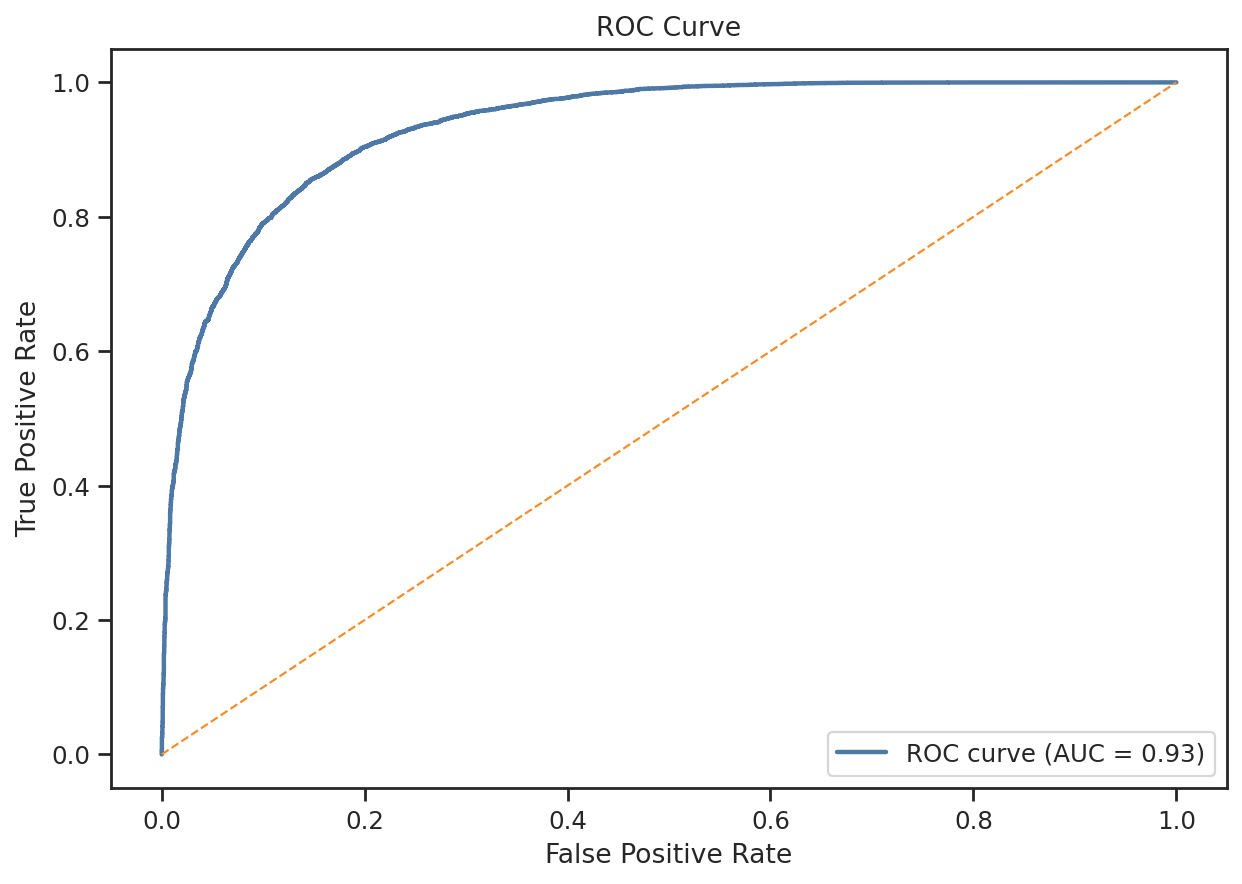

In [ ]:
# ROC Curve
roc_auc = roc_auc_score(y_test, y_proba_stack2)

fpr, tpr, _ = roc_curve(y_test, y_proba_stack2)


plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

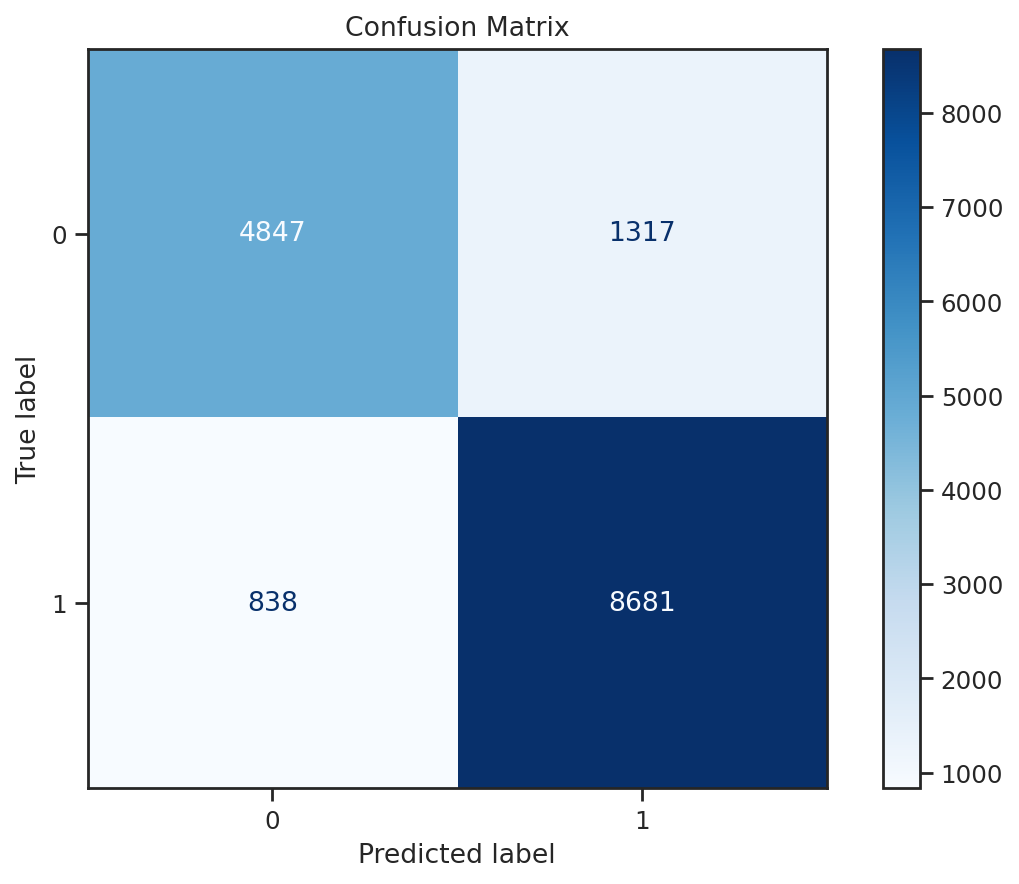

In [ ]:
cm = confusion_matrix(y_test, y_pred_stack2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## 4.10 Stack Model (Logistic, KNN, Xgboost)

In [ ]:

knn_clone    = KNeighborsClassifier(n_neighbors=5)

# Build the stacking ensemble with KNN, Logistic, XGB
stack_knn_model = StackingClassifier(
    estimators=[
        ('knn',  knn_clone),
        ('logreg', logreg_clone),
        ('xgb',    xgb_clone),
    ],
    final_estimator=LogisticRegression(random_state=42),
    cv=5,
    n_jobs=-1
)
stack_knn_model.fit(X_train, y_train)

# Predict & evaluate
y_pred_stack3 = stack_knn_model.predict(X_test)
y_proba_stack3 = stack_knn_model.predict_proba(X_test)[:, 1]
y_pred_stack3_train  = stack_knn_model.predict(X_train)
y_proba_stack3_train = stack_knn_model.predict_proba(X_train)[:, 1]


print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_stack3)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_stack3)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_stack3)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_stack3)))
print("ROC AUC Score: {:.4f}".format(roc_auc_score(y_test, y_proba_stack3)))



Accuracy: 0.8634
Precision: 0.8686
Recall: 0.9130
F1 Score: 0.8902
ROC AUC Score: 0.9344


In [ ]:

metrics_stack_knn = {
    'model':              'Stacked (KNN5, LogReg, XGB)',

    # train metrics
    'train_accuracy':     accuracy_score(y_train, y_pred_stack3_train),
    'train_precision':    precision_score(y_train, y_pred_stack3_train),
    'train_recall':       recall_score(y_train, y_pred_stack3_train),
    'train_f1':           f1_score(y_train, y_pred_stack3_train),
    'train_roc_auc':      roc_auc_score(y_train, y_proba_stack3_train),

    # test metrics
    'test_accuracy':      accuracy_score(y_test,  y_pred_stack3),
    'test_precision':     precision_score(y_test,  y_pred_stack3),
    'test_recall':        recall_score(y_test,  y_pred_stack3),
    'test_f1':            f1_score(y_test,  y_pred_stack3),
    'test_roc_auc':       roc_auc_score(y_test,  y_proba_stack3),
}
metrics_stack_knn

{'model': 'Stacked (KNN5, LogReg, XGB)',
 'train_accuracy': 0.9505324575946945,
 'train_precision': 0.946431763053747,
 'train_recall': 0.9736026476150452,
 'train_f1': 0.9598249543612517,
 'train_roc_auc': np.float64(0.9905607121633944),
 'test_accuracy': 0.8633552254033029,
 'test_precision': 0.868578852688387,
 'test_recall': 0.913016073116924,
 'test_f1': 0.8902432778489117,
 'test_roc_auc': np.float64(0.9343570790724981)}

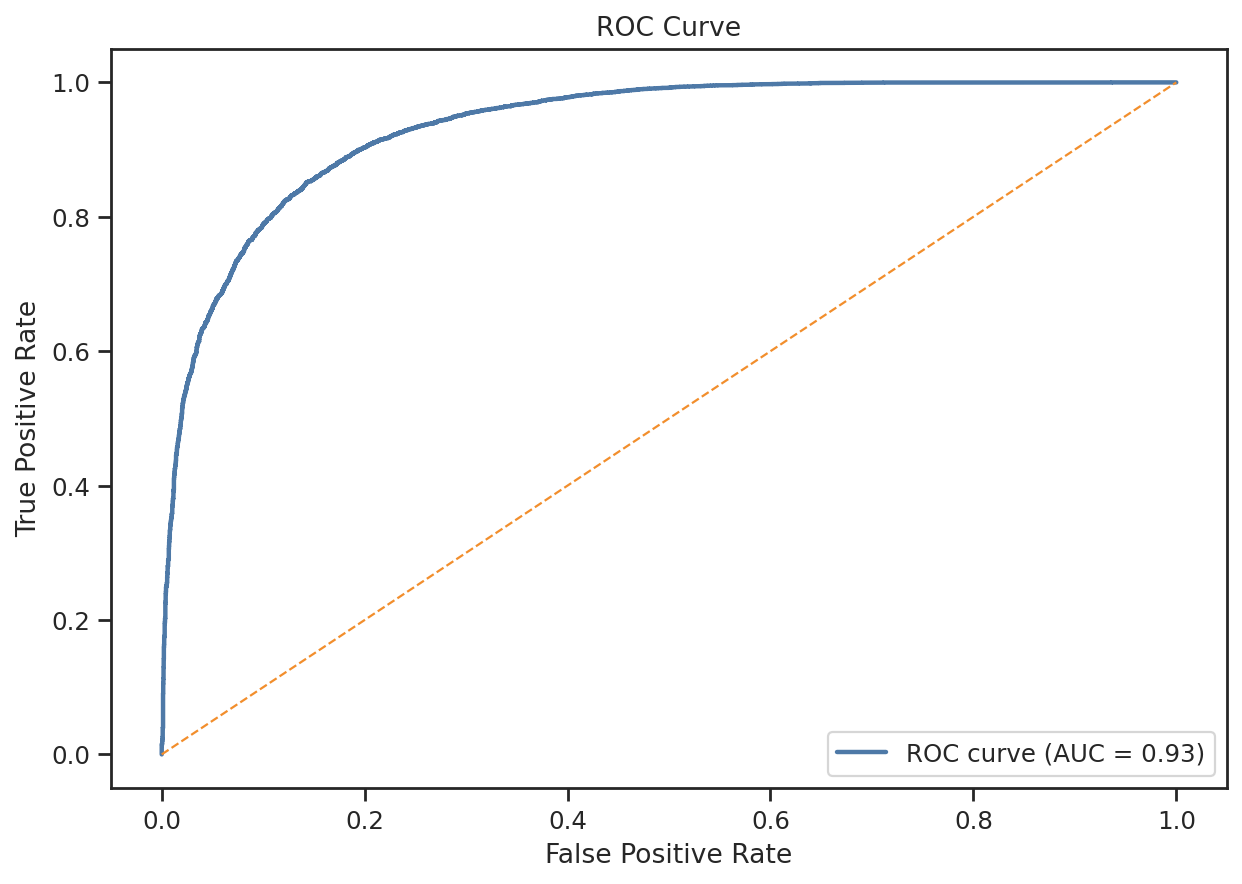

In [ ]:
# ROC Curve
roc_auc = roc_auc_score(y_test, y_proba_stack3)

fpr, tpr, _ = roc_curve(y_test, y_proba_stack3)


plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

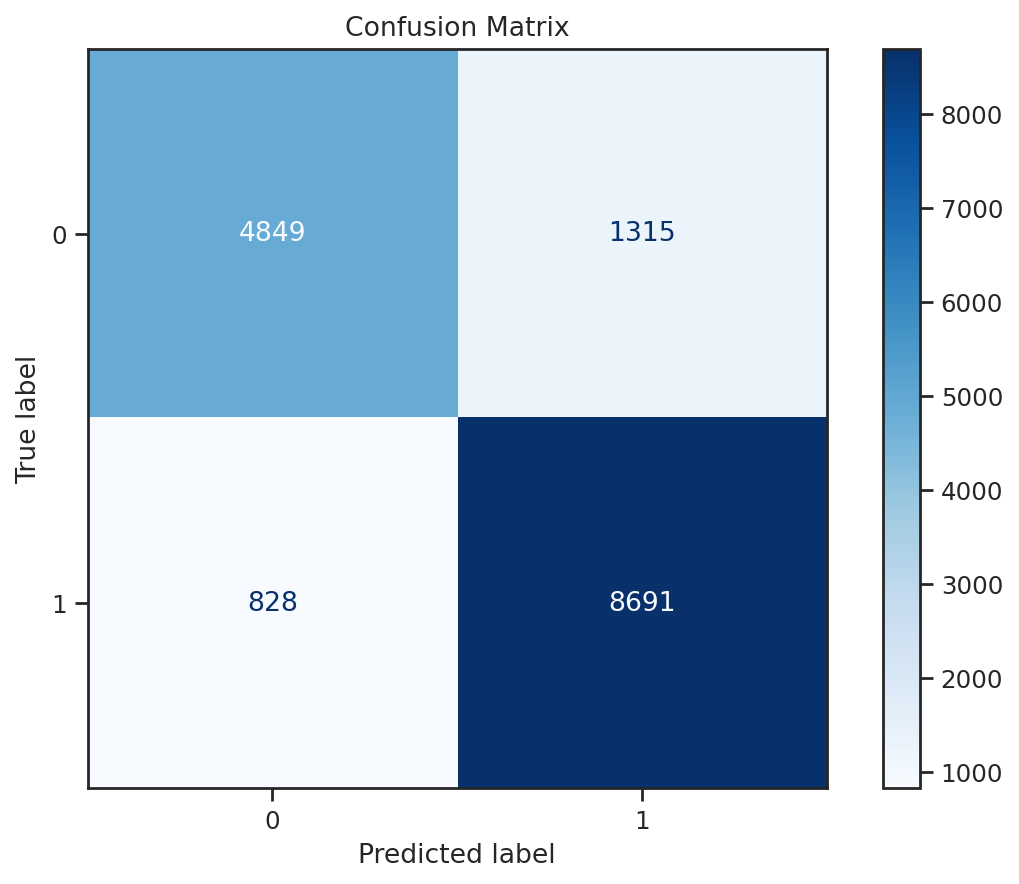

In [ ]:
cm = confusion_matrix(y_test, y_pred_stack3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## 4.11 MLP


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the MLP model
mlp = models.Sequential(
    name="mlp",
    layers=[
        layers.Input(shape=(X_train.shape[1],), name="input_layer"),

        layers.Dense(128, activation='relu', name="dense_128"),
        layers.BatchNormalization(name="bn_128"),
        layers.Dropout(0.3, name="dropout_128"),

        layers.Dense(64, activation='relu', name="dense_64"),
        layers.BatchNormalization(name="bn_64"),
        layers.Dropout(0.3, name="dropout_64"),

        layers.Dense(32, activation='relu', name="dense_32"),
        layers.BatchNormalization(name="bn_32"),
        layers.Dropout(0.3, name="dropout_32"),

        layers.Dense(1, activation='sigmoid', name="output_layer"),
    ]
)


mlp.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['AUC']
)


mlp.summary()

# Train
history = mlp.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=256,
    verbose=2
)

# Evaluate
test_loss, test_auc = mlp.evaluate(X_test, y_test, verbose=0)
print(f"Test AUC: {test_auc:.4f}")

# Predict
y_pred_proba_mlp_train = mlp.predict(X_train).ravel()
y_pred_mlp_train       = (y_pred_proba_mlp_train >= 0.5).astype(int)
y_pred_proba_mlp = mlp.predict(X_test).ravel()
y_pred_mlp       = (y_pred_proba_mlp >= 0.5).astype(int)

Model: "mlp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_128 (Dense)               │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_128 (BatchNormalization)     │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_128 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_64 (BatchNormalization)      │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_32 (BatchNormalization)      │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,441 (52.50 KB)

 Trainable params: 12,993 (50.75 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
246/246 - 7s - 28ms/step - AUC: 0.6254 - loss: 0.6808 - val_AUC: 0.7279 - val_loss: 0.6117
Epoch 2/30
246/246 - 2s - 6ms/step - AUC: 0.7005 - loss: 0.6080 - val_AUC: 0.7496 - val_loss: 0.5732
Epoch 3/30
246/246 - 3s - 11ms/step - AUC: 0.7260 - loss: 0.5874 - val_AUC: 0.7579 - val_loss: 0.5614
Epoch 4/30
246/246 - 2s - 10ms/step - AUC: 0.7409 - loss: 0.5762 - val_AUC: 0.7677 - val_loss: 0.5533
Epoch 5/30
246/246 - 2s - 8ms/step - AUC: 0.7501 - loss: 0.5686 - val_AUC: 0.7732 - val_loss: 0.5489
Epoch 6/30
246/246 - 2s - 6ms/step - AUC: 0.7571 - loss: 0.5619 - val_AUC: 0.7806 - val_loss: 0.5420
Epoch 7/30
246/246 - 2s - 7ms/step - AUC: 0.7623 - loss: 0.5580 - val_AUC: 0.7854 - val_loss: 0.5371
Epoch 8/30
246/246 - 2s - 6ms/step - AUC: 0.7643 - loss: 0.5563 - val_AUC: 0.7887 - val_loss: 0.5355
Epoch 9/30
246/246 - 2s - 7ms/step - AUC: 0.7705 - loss: 0.5512 - val_AUC: 0.7920 - val_loss: 0.5315
Epoch 10/30
246/246 - 2s - 10ms/step - AUC: 0.7723 - loss: 0.5493 - val_AUC: 0.7944 - va

In [ ]:
mlp_metrics1 = {
    'model':               'MLP_drop0.3',

    # train metrics
    'train_accuracy':      accuracy_score(y_train,             y_pred_mlp_train),
    'train_precision':     precision_score(y_train,            y_pred_mlp_train),
    'train_recall':        recall_score(y_train,               y_pred_mlp_train),
    'train_f1':            f1_score(y_train,                   y_pred_mlp_train),
    'train_roc_auc':       roc_auc_score(y_train,             y_pred_proba_mlp_train),

    # test metrics
    'test_accuracy':       accuracy_score(y_test,              y_pred_mlp),
    'test_precision':      precision_score(y_test,             y_pred_mlp),
    'test_recall':         recall_score(y_test,                y_pred_mlp),
    'test_f1':             f1_score(y_test,                    y_pred_mlp),
    'test_roc_auc':        roc_auc_score(y_test,              y_pred_proba_mlp),
}
mlp_metrics1

{'model': 'MLP_drop0.3',
 'train_accuracy': 0.763104195893381,
 'train_precision': 0.7639526950193314,
 'train_recall': 0.8823019541920571,
 'train_f1': 0.8188732600375418,
 'train_roc_auc': np.float64(0.8281156679771611),
 'test_accuracy': 0.757316839890327,
 'test_precision': 0.7569950517318939,
 'test_recall': 0.8839163777707743,
 'test_f1': 0.8155471551807696,
 'test_roc_auc': np.float64(0.8213978051615611)}

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the MLP model
mlp = models.Sequential(
    name="mlp",
    layers=[
        layers.Input(shape=(X_train.shape[1],), name="input_layer"),

        layers.Dense(128, activation='relu', name="dense_128"),
        layers.BatchNormalization(name="bn_128"),
        layers.Dropout(0.2, name="dropout_128"),

        layers.Dense(64, activation='relu', name="dense_64"),
        layers.BatchNormalization(name="bn_64"),
        layers.Dropout(0.2, name="dropout_64"),

        layers.Dense(32, activation='relu', name="dense_32"),
        layers.BatchNormalization(name="bn_32"),
        layers.Dropout(0.2, name="dropout_32"),

        layers.Dense(1, activation='sigmoid', name="output_layer"),
    ]
)


mlp.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['AUC']
)


mlp.summary()

# Train
history = mlp.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=256,
    verbose=2
)

# Evaluate
test_loss, test_auc = mlp.evaluate(X_test, y_test, verbose=0)
print(f"Test AUC: {test_auc:.4f}")

# Predict
y_pred_proba_mlp_train = mlp.predict(X_train).ravel()
y_pred_mlp_train       = (y_pred_proba_mlp_train >= 0.5).astype(int)
y_pred_proba_mlp = mlp.predict(X_test).ravel()
y_pred_mlp       = (y_pred_proba_mlp >= 0.5).astype(int)

Model: "mlp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_128 (Dense)               │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_128 (BatchNormalization)     │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_128 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_64 (BatchNormalization)      │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_32 (BatchNormalization)      │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,441 (52.50 KB)

 Trainable params: 12,993 (50.75 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
246/246 - 5s - 20ms/step - AUC: 0.6610 - loss: 0.6524 - val_AUC: 0.7341 - val_loss: 0.5950
Epoch 2/30
246/246 - 1s - 6ms/step - AUC: 0.7221 - loss: 0.5903 - val_AUC: 0.7655 - val_loss: 0.5561
Epoch 3/30
246/246 - 2s - 7ms/step - AUC: 0.7439 - loss: 0.5730 - val_AUC: 0.7754 - val_loss: 0.5462
Epoch 4/30
246/246 - 2s - 10ms/step - AUC: 0.7571 - loss: 0.5617 - val_AUC: 0.7812 - val_loss: 0.5403
Epoch 5/30
246/246 - 2s - 8ms/step - AUC: 0.7648 - loss: 0.5548 - val_AUC: 0.7873 - val_loss: 0.5351
Epoch 6/30
246/246 - 2s - 7ms/step - AUC: 0.7734 - loss: 0.5476 - val_AUC: 0.7940 - val_loss: 0.5298
Epoch 7/30
246/246 - 2s - 10ms/step - AUC: 0.7771 - loss: 0.5441 - val_AUC: 0.8011 - val_loss: 0.5241
Epoch 8/30
246/246 - 3s - 10ms/step - AUC: 0.7835 - loss: 0.5382 - val_AUC: 0.8045 - val_loss: 0.5188
Epoch 9/30
246/246 - 1s - 6ms/step - AUC: 0.7870 - loss: 0.5344 - val_AUC: 0.8074 - val_loss: 0.5150
Epoch 10/30
246/246 - 3s - 14ms/step - AUC: 0.7886 - loss: 0.5330 - val_AUC: 0.8077 - v

Change the drop rate from 0.3 to 0.2

In [ ]:
mlp_metrics = {
    'model':               'MLP_drop0.2',

    # train metrics
    'train_accuracy':      accuracy_score(y_train,             y_pred_mlp_train),
    'train_precision':     precision_score(y_train,            y_pred_mlp_train),
    'train_recall':        recall_score(y_train,               y_pred_mlp_train),
    'train_f1':            f1_score(y_train,                   y_pred_mlp_train),
    'train_roc_auc':       roc_auc_score(y_train,             y_pred_proba_mlp_train),

    # test metrics
    'test_accuracy':       accuracy_score(y_test,              y_pred_mlp),
    'test_precision':      precision_score(y_test,             y_pred_mlp),
    'test_recall':         recall_score(y_test,                y_pred_mlp),
    'test_f1':             f1_score(y_test,                    y_pred_mlp),
    'test_roc_auc':        roc_auc_score(y_test,              y_pred_proba_mlp),
}
mlp_metrics

{'model': 'MLP_drop0.2',
 'train_accuracy': 0.7678867491391405,
 'train_precision': 0.7682670804618684,
 'train_recall': 0.8842981718848497,
 'train_f1': 0.8222091972549882,
 'train_roc_auc': np.float64(0.8338783508098117),
 'test_accuracy': 0.7616527450105209,
 'test_precision': 0.7606167162564241,
 'test_recall': 0.8862275449101796,
 'test_f1': 0.8186317321688501,
 'test_roc_auc': np.float64(0.8258476728022148)}

# 5. Model Evaluation & Selection

In [ ]:

metrics_list = [
    logistic_l2,
    metrics_knn5,
    metrics_decision_tree,
    random_forest,
    lightgbm,
    xgboost,
    logistic_xgboost_stack,
    logistic_dt_xgboost_stack,
    metrics_stack_knn,
    mlp_metrics
]


df_metrics = pd.DataFrame(metrics_list).set_index('model').sort_values(by='test_roc_auc', ascending=False)

df_metrics


train_accuracy  train_precision  train_recall  \
model                                                                        
Stacked (LogReg, XGB)              0.951106         0.947165      0.973760   
Xgboost                            0.949751         0.942451      0.976860   
Stacked (KNN5, LogReg, XGB)        0.950532         0.946432      0.973603   
Stacked (LogReg,dt,XGB)            0.950819         0.946821      0.973655   
Lightgbm                           0.853670         0.847180      0.925930   
Random forest                      0.960209         0.944767      0.992462   
Decision tree                      0.863347         0.877586      0.900452   
MLP_drop0.2                        0.767887         0.768267      0.884298   
KNN 5                              0.787240         0.788977      0.886583   
Logistic Regression (L2)           0.662702         0.672691      0.865282   

                             train_f1  train_roc_auc  test_accuracy  \
model                                                                 
Stacked (LogReg, XGB)        0.960279       0.990791       0.862973   
Xgboost                      0.959347       0.990700       0.862335   
Stacked (KNN5, LogReg, XGB)  0.959825       0.990561       0.863355   
Stacked (LogReg,dt,XGB)      0.960051       0.990623       0.862590   
Lightgbm                     0.884806       0.931348       0.837212   
Random forest                0.968027       0.996486       0.811069   
Decision tree                0.888872       0.945831       0.781228   
MLP_drop0.2                  0.822209       0.833878       0.761653   
KNN 5                        0.834937       0.862410       0.676848   
Logistic Regression (L2)     0.756928       0.673011       0.656698   

                             test_precision  test_recall   test_f1  \
model                                                                
Stacked (LogReg, XGB)              0.868574     0.912281  0.889891   
Xgboost                            0.863924     0.917743  0.890021   
Stacked (KNN5, LogReg, XGB)        0.868579     0.913016  0.890243   
Stacked (LogReg,dt,XGB)            0.868274     0.911966  0.889583   
Lightgbm                           0.833174     0.915012  0.872177   
Random forest                      0.812072     0.896103  0.852020   
Decision tree                      0.809727     0.836012  0.822660   
MLP_drop0.2                        0.760617     0.886228  0.818632   
KNN 5                              0.704757     0.804706  0.751422   
Logistic Regression (L2)           0.667422     0.865847  0.753796   

                             test_roc_auc  
model                                      
Stacked (LogReg, XGB)            0.934416  
Xgboost                          0.934366  
Stacked (KNN5, LogReg, XGB)      0.934357  
Stacked (LogReg,dt,XGB)          0.934337  
Lightgbm                         0.915447  
Random forest                    0.883982  
Decision tree                    0.845405  
MLP_drop0.2                      0.825848  
KNN 5                            0.701055  
Logistic Regression (L2)         0.667374

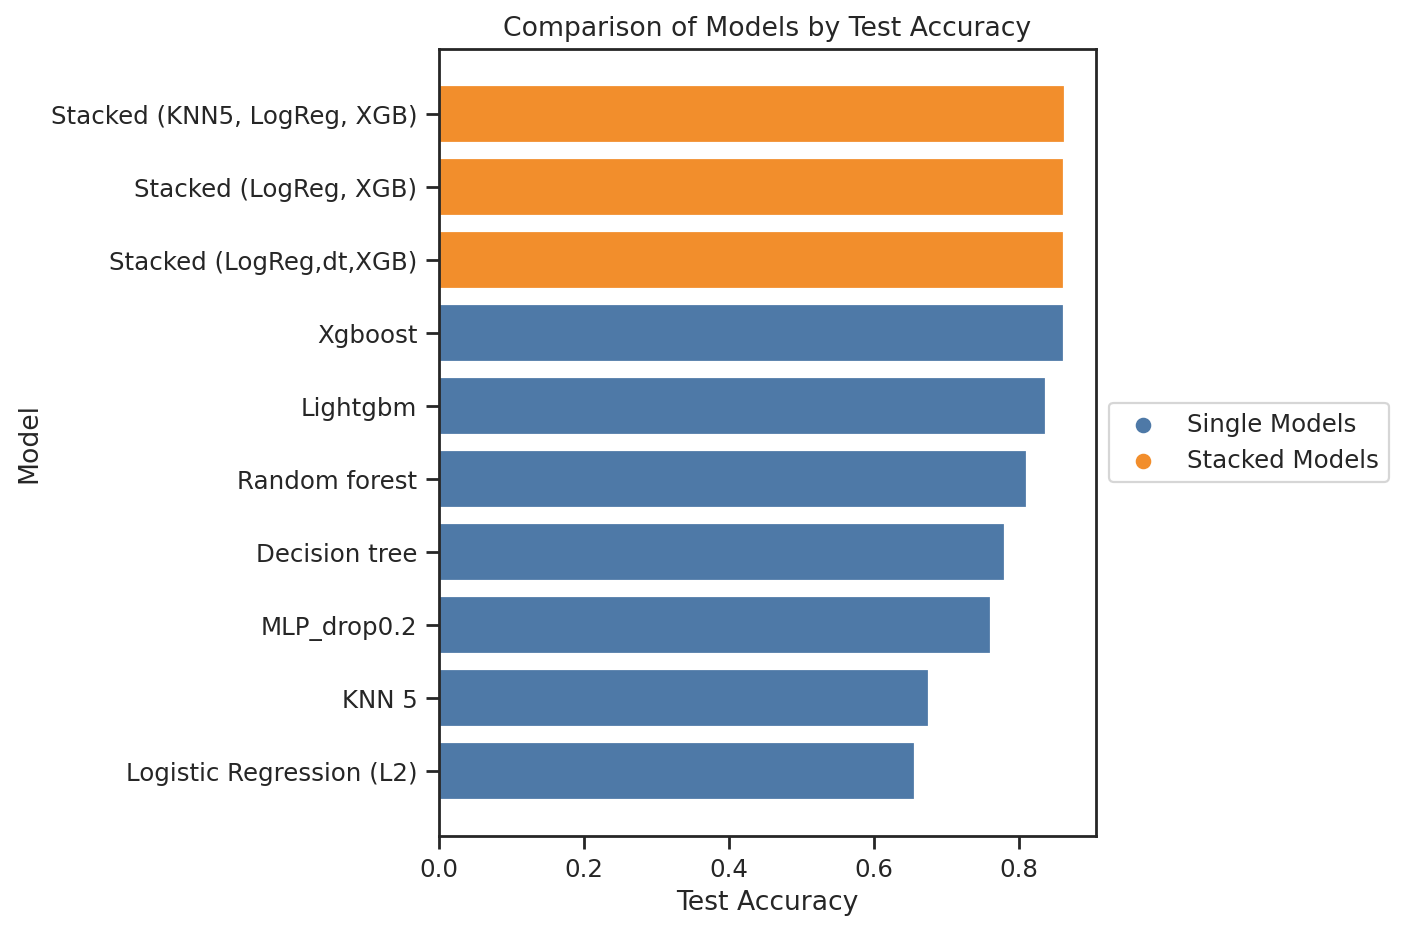

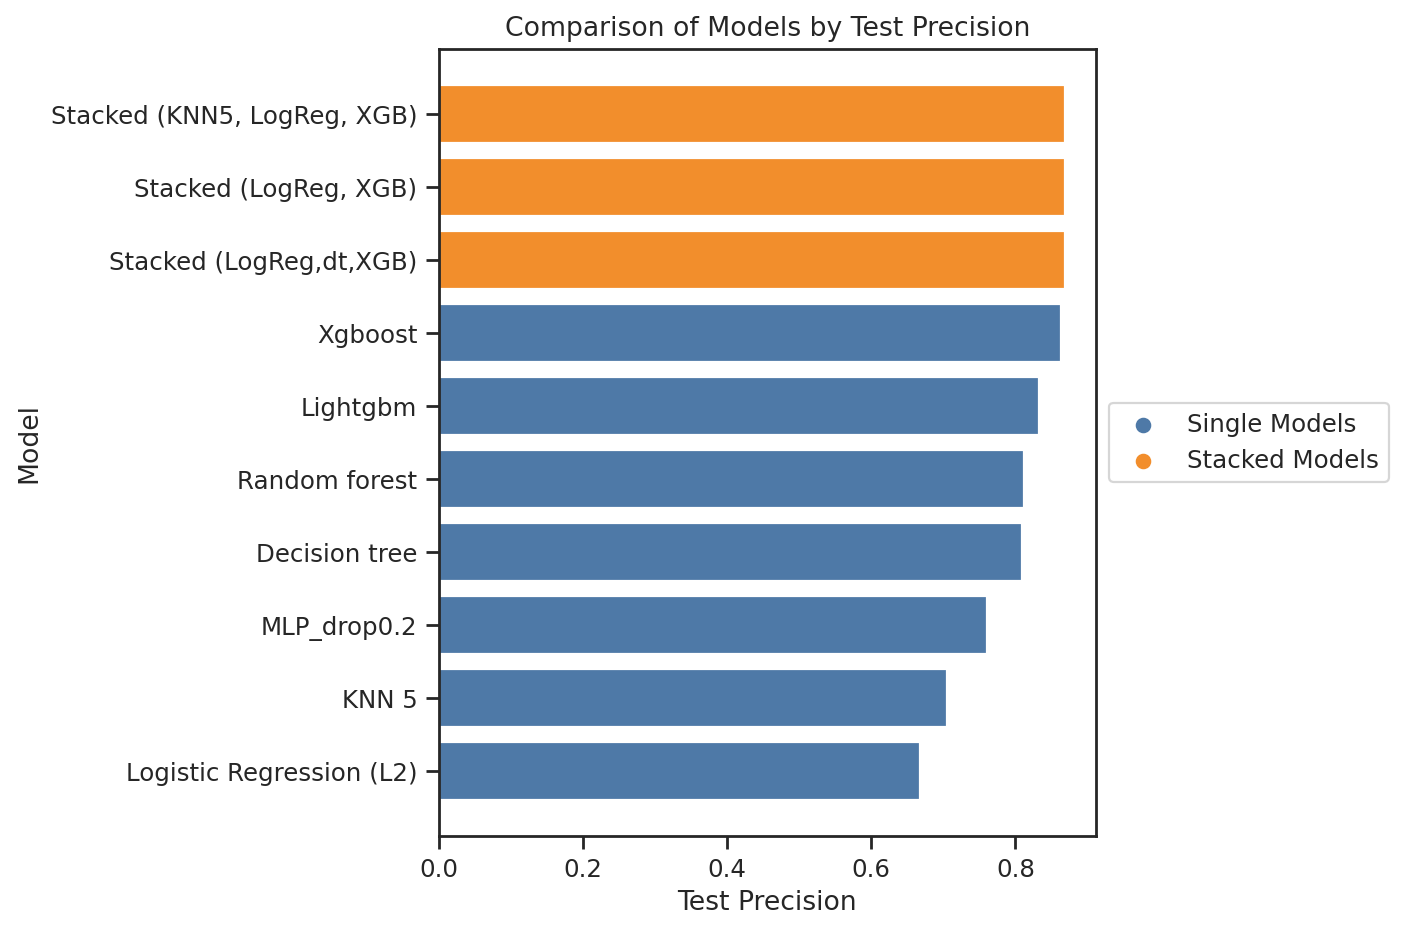

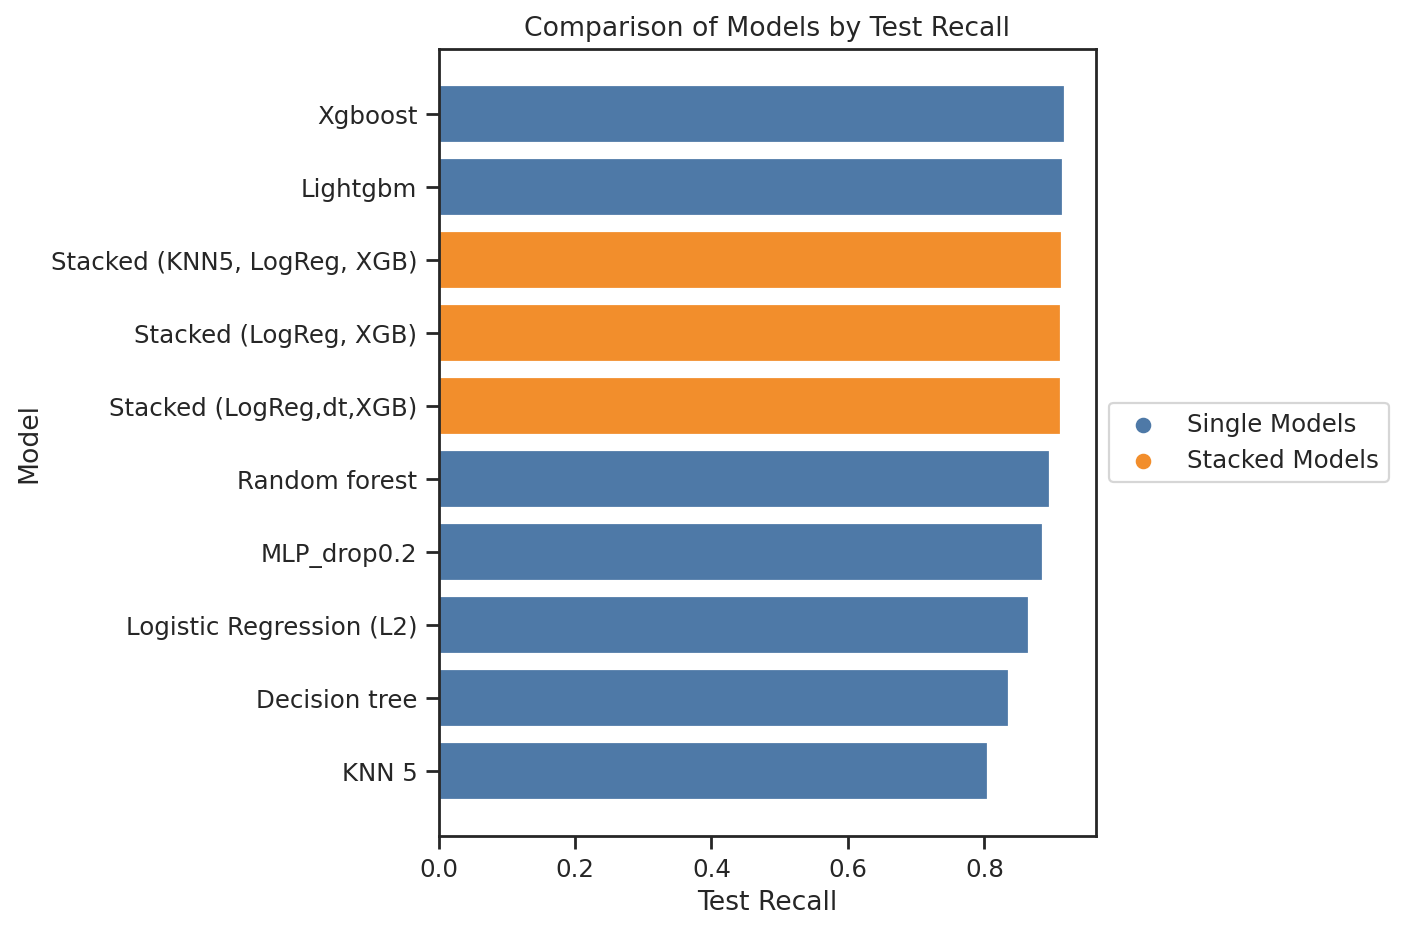

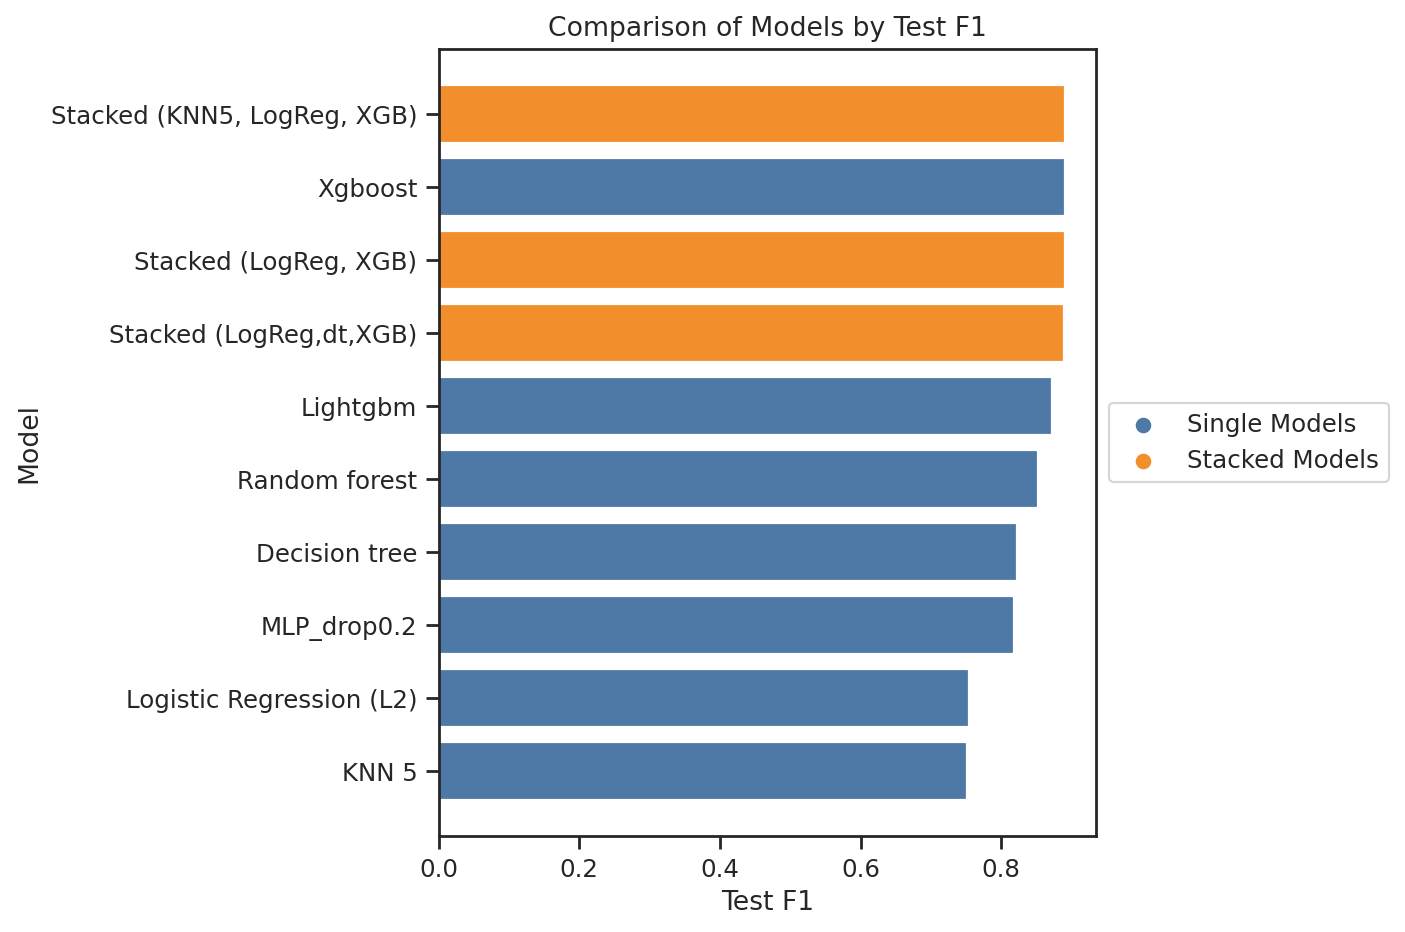

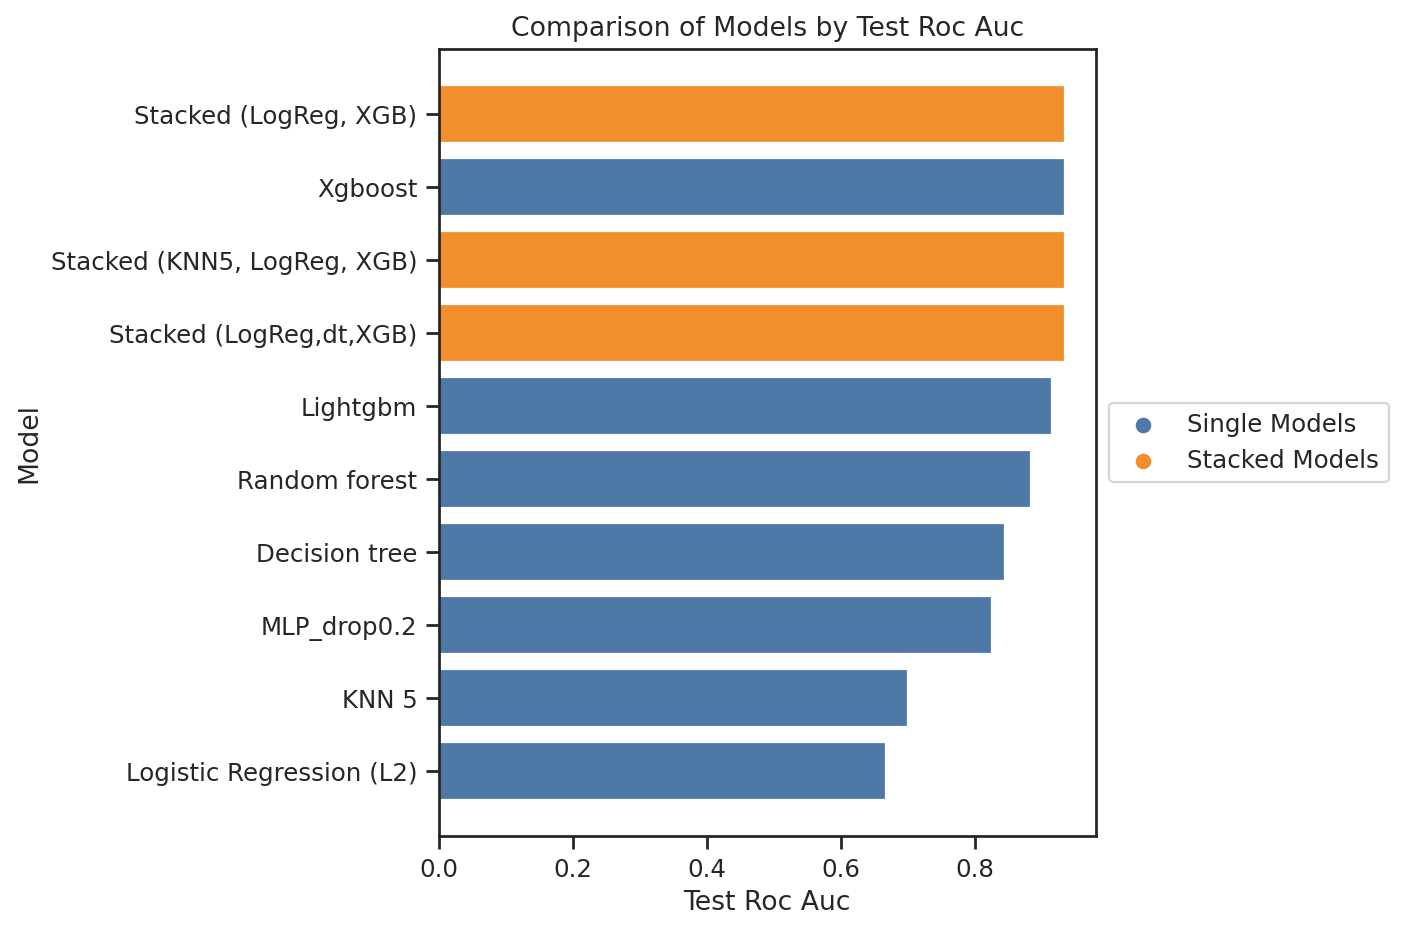

In [ ]:


def model_color(name):
    return 'C1' if 'Stack' in name else 'C0'

metrics_to_plot = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']
for metric in metrics_to_plot:
    series = df_metrics[metric].sort_values(ascending=True)
    colors = [model_color(m) for m in series.index]

    plt.figure()
    plt.barh(series.index, series.values, color=colors)
    plt.xlabel(metric.replace('_',' ').title())
    plt.ylabel('Model')
    plt.title(f'Comparison of Models by {metric.replace("_"," ").title()}')

    plt.scatter([], [], color='C0', label='Single Models')
    plt.scatter([], [], color='C1', label='Stacked Models')
    plt.legend(
        loc='center left',
        bbox_to_anchor=(1.02, 0.5),
        borderaxespad=0
    )
    plt.tight_layout()
    plt.show()


We selected the **Stacked (KNN5, LogReg, XGB)** model as the final classifier due to its excellent balance between generalization performance and predictive power. It achieved the **highest test F1 score (0.8902)** and a **strong ROC AUC of 0.9344**, outperforming both individual and other ensemble models. While slightly more complex, its ability to combine strengths from different algorithms makes it highly suitable for identifying customers at risk of churn.


# Test for Robustness and generalisation analysis

### Subset cross validation - generalisation

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_validate

#  Set up 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']


models = {
    'Logistic L2': logistic_l2_model,
    'XGBoost':     xgboost_model,
    'Stack KNN':   stack_knn_model
}

#  Run cross-validation
all_results = []
for name, model in models.items():
    res = cross_validate(
        model, X_encoded, y,
        cv=cv,
        scoring=scoring,
        return_train_score=False
    )
    df = pd.DataFrame({metric: res[f'test_{metric}'] for metric in scoring})
    df['Model'] = name
    all_results.append(df)


cv_df = pd.concat(all_results).set_index('Model')
print("=== 5-Fold CV Test Metrics (per fold) ===")
print(cv_df)


summary = cv_df.groupby('Model').agg(['mean','std'])
print("\n=== Mean ± Std across folds ===")
print(summary)


=== 5-Fold CV Test Metrics (per fold) ===
             accuracy  precision    recall        f1   roc_auc
Model                                                         
Logistic L2  0.661672   0.670913  0.868684  0.757096  0.674144
Logistic L2  0.662734   0.671562  0.869615  0.757863  0.673736
Logistic L2  0.659418   0.670559  0.862681  0.754583  0.675984
Logistic L2  0.662097   0.672078  0.865623  0.756670  0.668661
Logistic L2  0.658334   0.670157  0.860685  0.753565  0.664448
XGBoost      0.843971   0.846463  0.907553  0.875944  0.920331
XGBoost      0.847915   0.850447  0.909330  0.878903  0.922960
XGBoost      0.846703   0.849961  0.907649  0.877858  0.923524
XGBoost      0.849828   0.851231  0.911956  0.880548  0.925036
XGBoost      0.842048   0.842895  0.909225  0.874804  0.919741
Stack KNN    0.857617   0.865103  0.906818  0.885470  0.931298
Stack KNN    0.859712   0.865170  0.910801  0.887399  0.934324
Stack KNN    0.859584   0.865946  0.909435  0.887158  0.934425
Stack KNN    

### Add noise - robustness

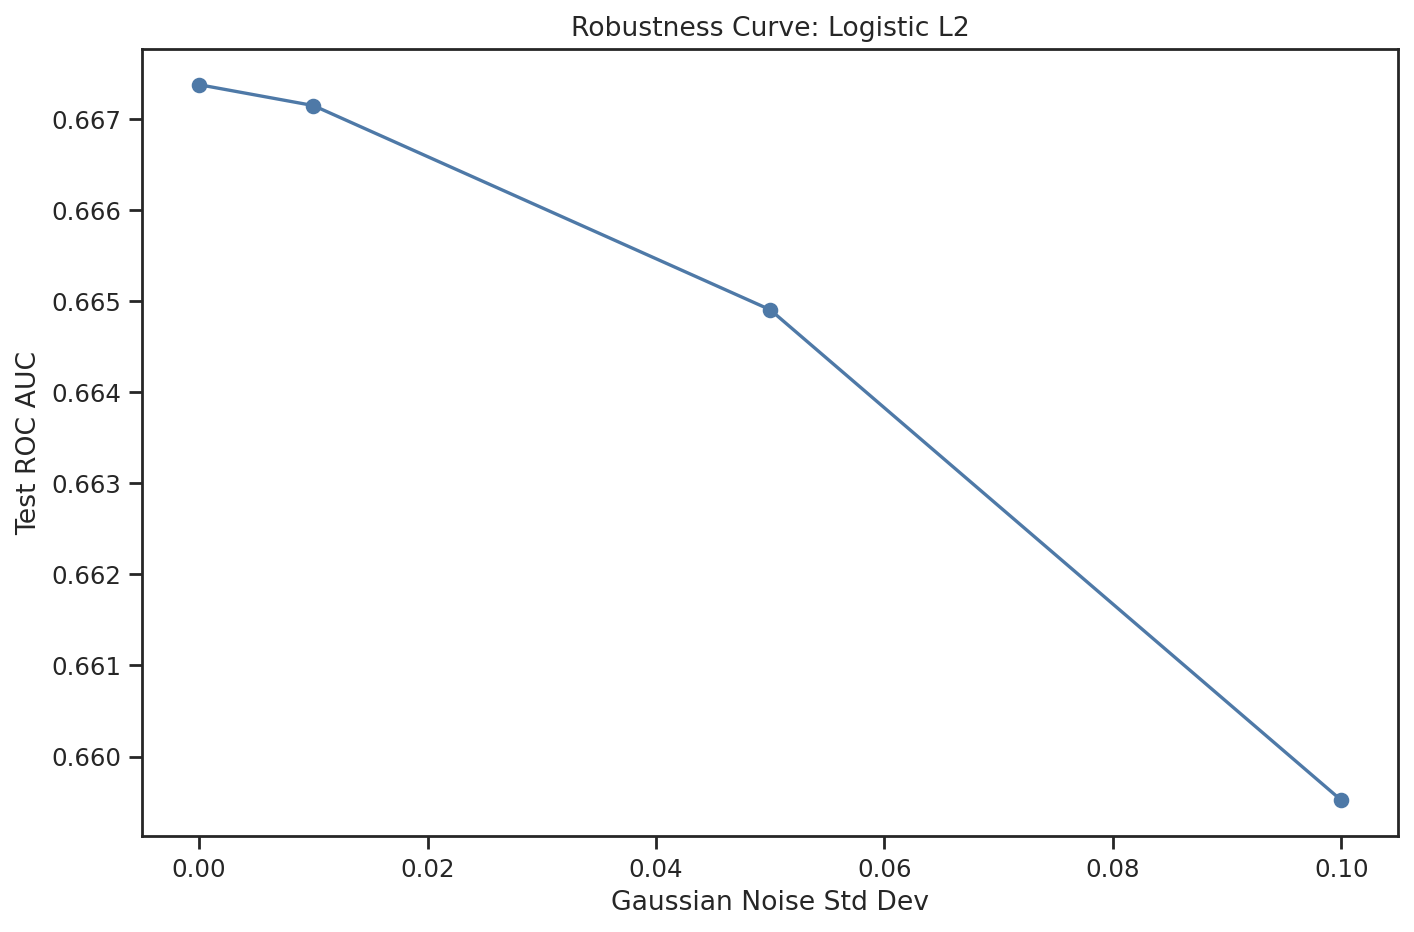

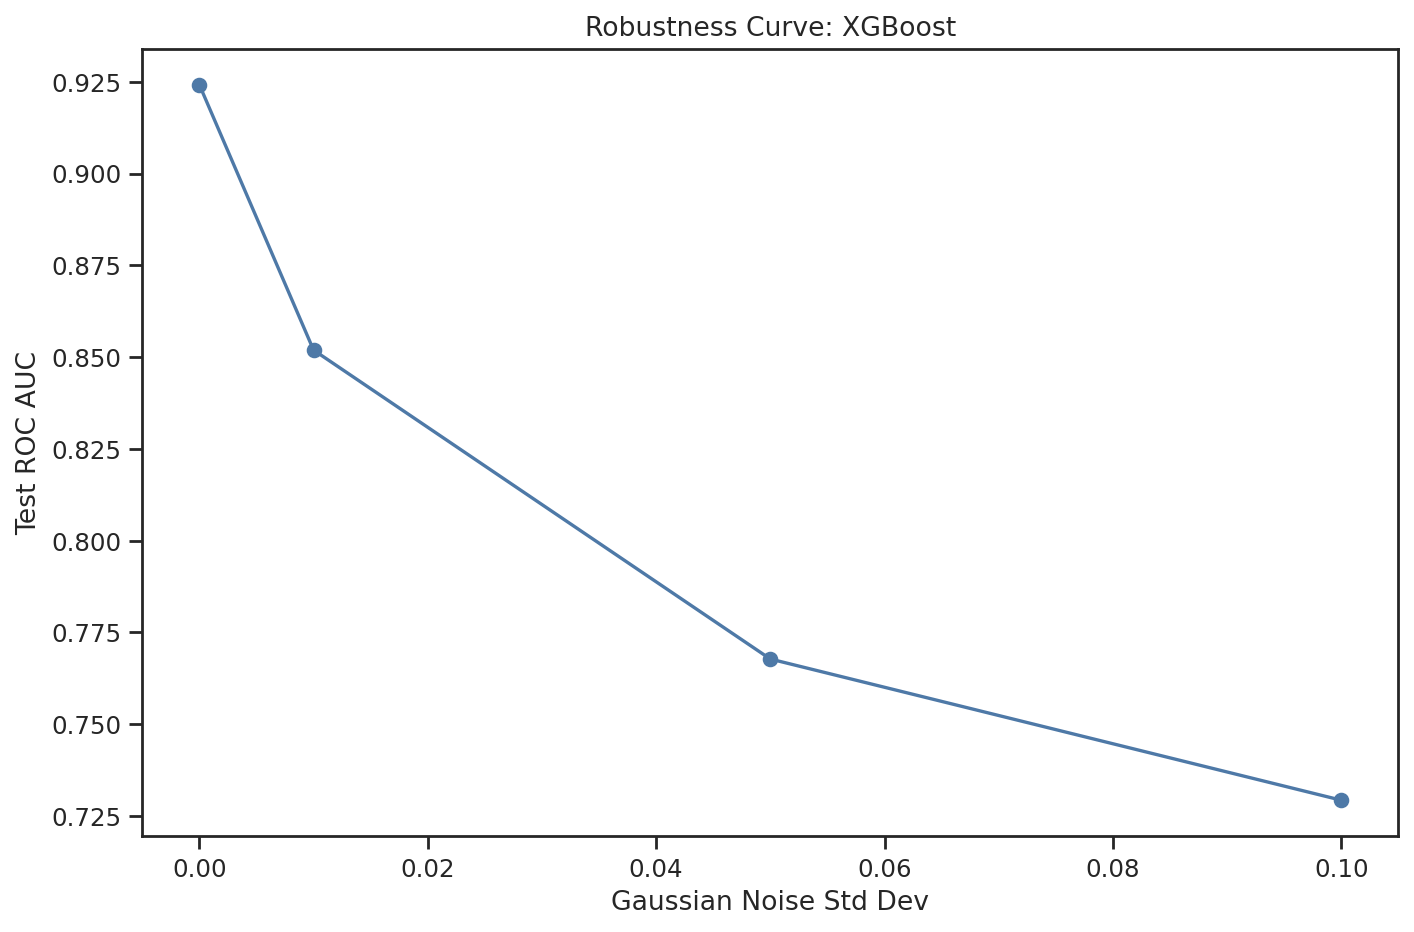

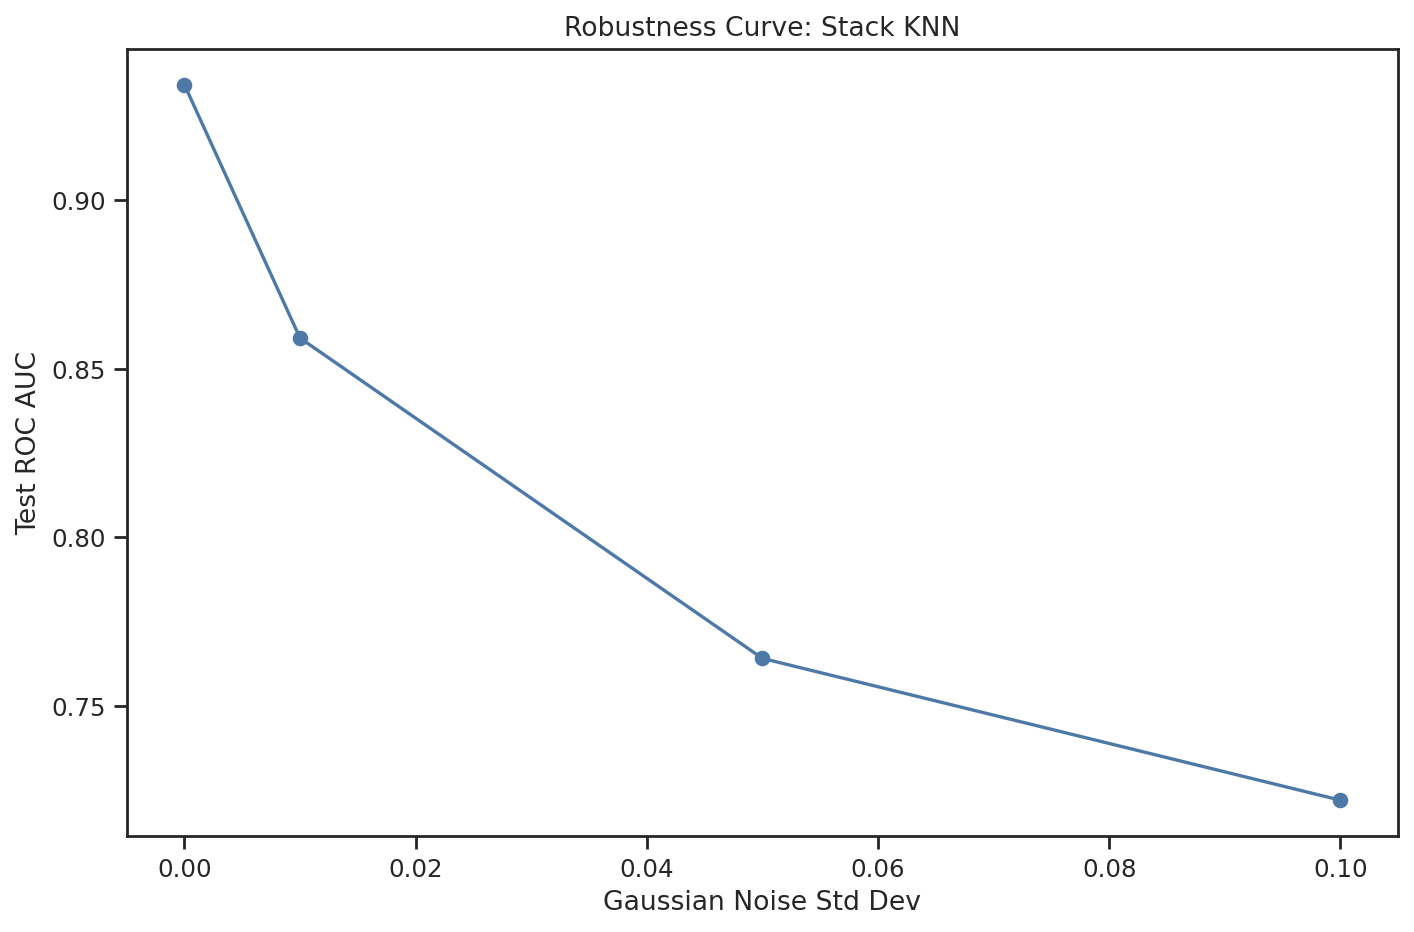

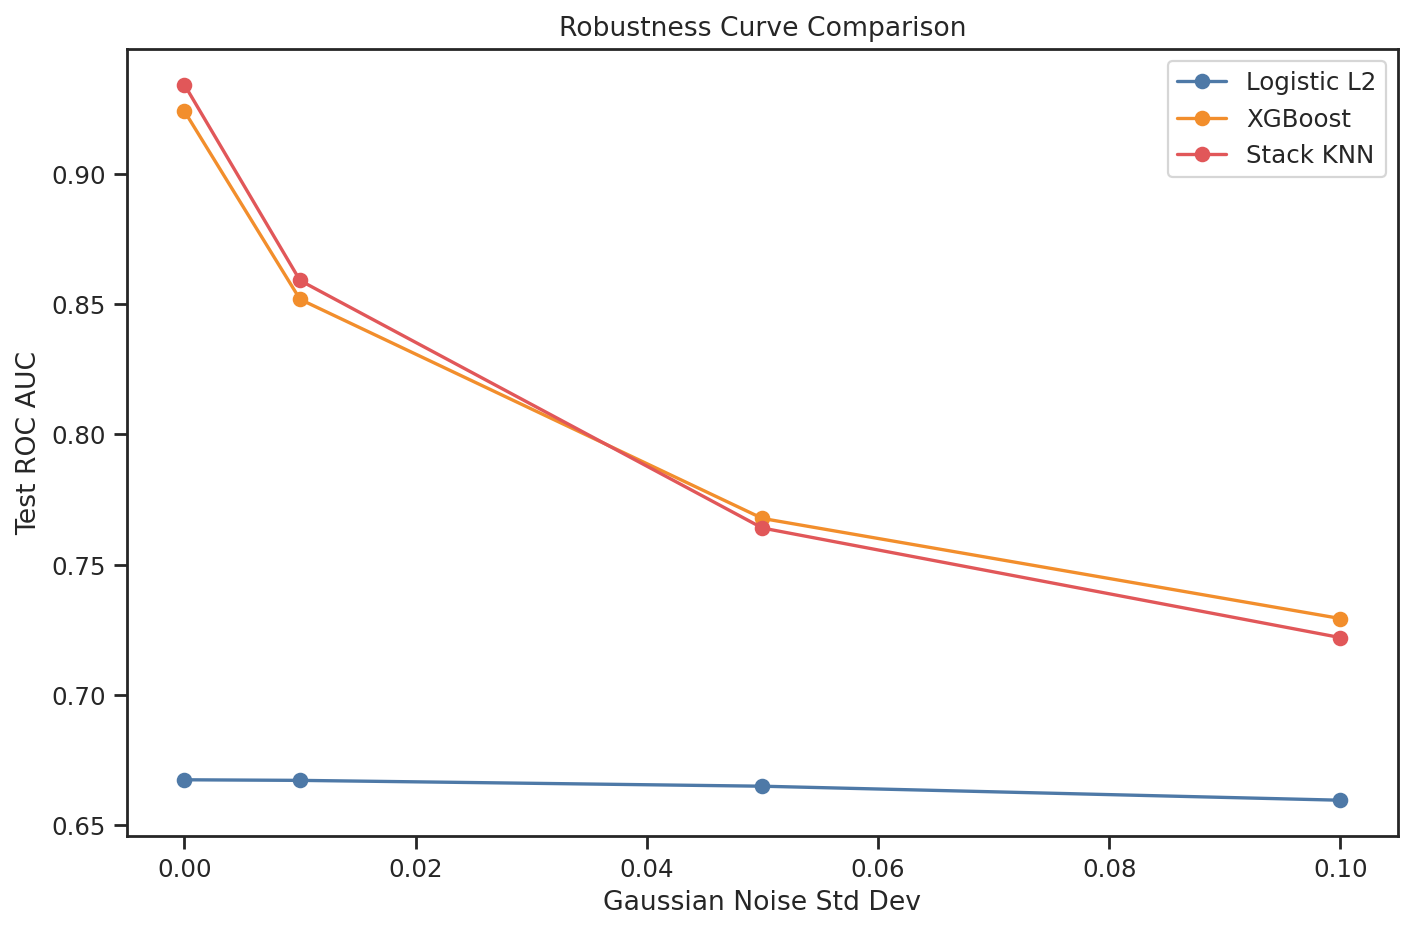

In [ ]:


# Define noise levels
noise_levels = [0.00, 0.01, 0.05, 0.10]
models = {
    'Logistic L2': logistic_l2_model,
    'XGBoost':     xgboost_model,
    'Stack KNN':   stack_knn_model
}

# Compute robustness (AUC at each noise level) for each model
robustness = {name: [] for name in models}
for sigma in noise_levels:
    X_noisy = X_test + np.random.normal(0, sigma, X_test.shape)
    for name, model in models.items():
        y_proba = model.predict_proba(X_noisy)[:, 1]
        robustness[name].append(roc_auc_score(y_test, y_proba))

# Plot each model
for name, aucs in robustness.items():
    plt.figure()
    plt.plot(noise_levels, aucs, marker='o')
    plt.xlabel("Gaussian Noise Std Dev")
    plt.ylabel("Test ROC AUC")
    plt.title(f"Robustness Curve: {name}")
    plt.tight_layout()
    plt.show()

plt.figure()
for name, aucs in robustness.items():
    plt.plot(noise_levels, aucs, marker='o', label=name)
plt.xlabel("Gaussian Noise Std Dev")
plt.ylabel("Test ROC AUC")
plt.title("Robustness Curve Comparison")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


### error analysis

In [ ]:



models = {
    "Logistic L2":  logistic_l2_model,
    "XGBoost":      xgboost_model,
    "Stack KNN":    stack_knn_model
}

# error analysis
for name, model in models.items():
    print(f"\n\n===== ERROR ANALYSIS: {name} =====")

    # Predictions on test set
    y_pred  = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    # error‐table
    df_err = X_test.copy()
    df_err['actual']     = y_test
    df_err['pred']       = y_pred
    df_err['proba']      = y_proba
    df_err['error_type'] = np.select(
        [
            (df_err.actual == 1) & (df_err.pred == 1),
            (df_err.actual == 0) & (df_err.pred == 0),
            (df_err.actual == 0) & (df_err.pred == 1),
            (df_err.actual == 1) & (df_err.pred == 0),
        ],
        ['TP','TN','FP','FN'],
        default='Unknown'
    )

    # Confusion matrix & report
    print("Confusion Matrix:")
    print(confusion_matrix(df_err.actual, df_err.pred))
    print("\nClassification Report:")
    print(classification_report(df_err.actual, df_err.pred, digits=4))

    # Error‐type
    print("\nError‐type distribution:")
    print(df_err['error_type'].value_counts(), "\n")


    num_cols = X_test.select_dtypes(include=[np.number]).columns
    print("\nMean of numeric features by error type:")
    display(df_err.groupby('error_type')[num_cols].mean().T)





===== ERROR ANALYSIS: Logistic L2 =====
Confusion Matrix:
[[2057 4107]
 [1277 8242]]

Classification Report:
              precision    recall  f1-score   support

           0     0.6170    0.3337    0.4331      6164
           1     0.6674    0.8658    0.7538      9519

    accuracy                         0.6567     15683
   macro avg     0.6422    0.5998    0.5935     15683
weighted avg     0.6476    0.6567    0.6278     15683


Error‐type distribution:
error_type
TP    8242
FP    4107
TN    2057
FN    1277
Name: count, dtype: int64 


Mean of numeric features by error type:


error_type                      FN        FP        TN        TP
total_spent               0.188632  0.038250  0.057951 -0.059888
avg_freight_value         0.061528  0.012917 -0.010562 -0.035811
avg_product_weight       -0.075245  0.034201 -0.208479  0.028820
avg_payment               0.207338  0.037151  0.074337 -0.070354
avg_approval_seconds      0.340450 -0.008917  0.161986 -0.111784
avg_delivery_days        -0.859282  0.154746 -0.929663  0.298957
avg_delivery_performance -0.004505 -0.085505  0.259372 -0.030139
avg_review_score          0.101432 -0.039425  0.176656 -0.041245
avg_payment_installments -0.033637  0.038396 -0.149609  0.025174
is_top5_state             0.845732  0.767714  0.838114  0.750910
is_repeat_buyer           0.027408  0.030436  0.030627  0.028512



===== ERROR ANALYSIS: XGBoost =====
Confusion Matrix:
[[4621 1543]
 [ 841 8678]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8460    0.7497    0.7949      6164
           1     0.8490    0.9117    0.8792      9519

    accuracy                         0.8480     15683
   macro avg     0.8475    0.8307    0.8371     15683
weighted avg     0.8479    0.8480    0.8461     15683


Error‐type distribution:
error_type
TP    8678
TN    4621
FP    1543
FN     841
Name: count, dtype: int64 


Mean of numeric features by error type:


error_type                      FN        FP        TN        TP
total_spent               0.570566  0.564340 -0.128647 -0.084415
avg_freight_value         0.539278  0.400465 -0.126941 -0.077220
avg_product_weight        0.382389  0.493221 -0.227098 -0.020758
avg_payment               0.530515  0.531572 -0.111388 -0.087721
avg_approval_seconds      0.114867  0.097471  0.031635 -0.067201
avg_delivery_days        -0.124788  0.207109 -0.345455  0.169583
avg_delivery_performance -0.035633 -0.009457  0.042621 -0.025834
avg_review_score          0.006775 -0.112668  0.081218 -0.024903
avg_payment_installments  0.172282  0.185178 -0.094305  0.002263
is_top5_state             0.746730  0.747246  0.805886  0.765268
is_repeat_buyer           0.065398  0.055736  0.022073  0.024775



===== ERROR ANALYSIS: Stack KNN =====
Confusion Matrix:
[[4849 1315]
 [ 828 8691]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8541    0.7867    0.8190      6164
           1     0.8686    0.9130    0.8902      9519

    accuracy                         0.8634     15683
   macro avg     0.8614    0.8498    0.8546     15683
weighted avg     0.8629    0.8634    0.8622     15683


Error‐type distribution:
error_type
TP    8691
TN    4849
FP    1315
FN     828
Name: count, dtype: int64 


Mean of numeric features by error type:


error_type                      FN        FP        TN        TP
total_spent               0.618183  0.605047 -0.107102 -0.087972
avg_freight_value         0.606389  0.435863 -0.111741 -0.082692
avg_product_weight        0.469733  0.499510 -0.194934 -0.028477
avg_payment               0.574558  0.562478 -0.089538 -0.090993
avg_approval_seconds      0.102517  0.088829  0.037074 -0.065753
avg_delivery_days        -0.088090  0.217897 -0.322399  0.165647
avg_delivery_performance -0.051511 -0.006590  0.039394 -0.024336
avg_review_score         -0.016257 -0.122155  0.074674 -0.022661
avg_payment_installments  0.207987  0.203633 -0.086168 -0.000884
is_top5_state             0.737923  0.739163  0.805321  0.766080
is_repeat_buyer           0.067633  0.058555  0.022891  0.024623

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(df_err.actual, df_err.pred))
print(classification_report(df_err.actual, df_err.pred, digits=4))


[[4849 1315]
 [ 828 8691]]
              precision    recall  f1-score   support

           0     0.8541    0.7867    0.8190      6164
           1     0.8686    0.9130    0.8902      9519

    accuracy                         0.8634     15683
   macro avg     0.8614    0.8498    0.8546     15683
weighted avg     0.8629    0.8634    0.8622     15683



In [ ]:
# a few FPs
print(df_err[df_err.error_type=='FP']
      .sample(5)
      .drop(columns=['proba','actual','pred','error_type']))
# a few FNs
print(df_err[df_err.error_type=='FN']
      .sample(5)
      .drop(columns=['proba','actual','pred','error_type']))


       total_spent  avg_freight_value  avg_product_weight  avg_payment  \
41752     0.484992          -0.330898            0.276195     0.538114   
62545     0.889418          -0.450663           -0.898599     0.951076   
24858     0.394125          -0.312044           -0.416551    -0.501538   
15131    -0.479776          -0.676609            0.409833    -0.425873   
66051     0.402392           1.811767           -0.026335     0.454416   

       avg_approval_seconds  avg_delivery_days  avg_delivery_performance  \
41752             -0.537047          -0.303973                 -2.535384   
62545             -0.139972          -0.905570                 -1.001407   
24858             -0.695003           0.017503                  0.242714   
15131             -0.234944          -1.448249                  0.364576   
66051              1.529838           0.773904                 -0.374304   

       avg_review_score  avg_payment_installments  is_top5_state  \
41752         -0.702256       